In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym, rec_gym
import numpy as np
import tensorflow as tf

from rec_gym.runner import run_experiment
import gin
from rec_gym.envs import prim_env_v1, prim_env_v2

import pickle

/home/anton/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
gin.parse_config("""
PrimEnv1.n_items = 100
PrimEnv1.n_users = 10
PrimEnv1.n_rec   = 4
PrimEnv1.embedding_dimension = 2
PrimEnv1.cluster_var = 16
PrimEnv1.in_cluster_var = 4
PrimEnv1.user_change_prob = 0.05
PrimEnv1.reward_noise = 0
PrimEnv1.user_init_sigma = 4
PrimEnv1.user_ar_coef = 1
PrimEnv1.user_drift_sigma = 0
PrimEnv1.seed = 53
PrimEnv1.user_type = 'drifting'

PrimEnv2.n_items = 1000
PrimEnv2.n_users = 10
PrimEnv2.n_rec   = 4
PrimEnv2.embedding_dimension = 2
PrimEnv2.cluster_var = 16
PrimEnv2.in_cluster_var = 4
PrimEnv2.user_change_prob = 0.05
PrimEnv2.reward_noise = 0
PrimEnv2.user_init_sigma = 4
PrimEnv2.user_ar_coef = 1
PrimEnv2.user_drift_sigma = 0
PrimEnv2.seed = 53
PrimEnv2.user_type = 'none'
PrimEnv2.new_items_interval = 1000
PrimEnv2.new_items_size = 0.
PrimEnv2.return_items_objects = False

""")

tf.reset_default_graph()
sess = tf.InteractiveSession()

def make_env():
    env = gym.make('prim-gym-v2')
    return env

In [4]:
from agents.ddpg import DDPGAgent 

Using TensorFlow backend.


In [5]:
env = make_env()

state_dim = env.embedding_dimension
action_dim = env.embedding_dimension
action_size = env.n_rec

agent = DDPGAgent(action_size = action_size,
                 state_dim = state_dim*10,
                 action_dim = action_dim,
                 gamma = .9,
                 sess = sess,
                 optimizer = tf.train.AdamOptimizer(
                     learning_rate=0.001
                 ),
                 max_tf_checkpoints_to_keep = 3,
                 experience_size = 300,
                 per = True,
                 batch_size = 64)

In [6]:
sess.run(tf.global_variables_initializer())
run_experiment(env, agent, t_train=1000, t_test=200)

  6%|▌         | 55/1000 [00:00<00:10, 88.64it/s]/media/anton/0b9d5a44-bb63-4de1-9cfe-0da47b81e88a/TPT/3A/PRIM Vente Privee/rec_gym/agents/utils.py:275: RuntimeWarning: divide by zero encountered in double_scalars
  max_weight = (p_min * n) ** (-self.PER_b)
  6%|▋         | 64/1000 [00:00<00:12, 77.44it/s]

[[  7.8279815]
 [  6.7837644]
 [  5.8096023]
 [  9.119664 ]
 [ 20.618048 ]
 [ 11.043112 ]
 [ 23.185259 ]
 [ 27.46207  ]
 [117.31102  ]
 [138.8566   ]
 [100.90716  ]
 [115.67128  ]
 [158.09135  ]
 [ 97.23855  ]
 [141.62384  ]
 [126.75181  ]
 [ 96.9621   ]
 [119.92896  ]
 [ 95.02898  ]
 [ 77.70212  ]
 [  8.838605 ]
 [ 32.88718  ]
 [ 40.409985 ]
 [ 15.281227 ]
 [ 62.509914 ]
 [ 25.88961  ]
 [ 96.712685 ]
 [ 65.06083  ]
 [ 47.903046 ]
 [ 36.208538 ]
 [ 49.15769  ]
 [ 26.927677 ]
 [ 23.110676 ]
 [ 42.931484 ]
 [ 56.568554 ]
 [ 38.745876 ]
 [  3.4921734]
 [ 21.661032 ]
 [  4.2173195]
 [  5.4045787]
 [  9.668714 ]
 [ 19.528076 ]
 [ 50.58504  ]
 [ 28.403654 ]
 [ 18.110464 ]
 [ 38.79043  ]
 [ 46.127853 ]
 [ 92.012886 ]
 [ 62.762955 ]
 [ 85.39663  ]
 [ 92.035706 ]
 [  8.188168 ]
 [  9.240242 ]
 [  8.19833  ]
 [  7.8074255]
 [  5.667968 ]
 [  9.128748 ]
 [  7.7629557]
 [  7.237592 ]
 [ 57.943798 ]
 [ 59.611435 ]
 [ 42.252945 ]
 [ 48.904682 ]
 [ 39.99069  ]]
[[ 15.355836 ]
 [ 13.561933 ]
 [ 11.848

  7%|▋         | 71/1000 [00:01<00:17, 53.46it/s]

[[41.28731 ]
 [35.818855]
 [31.107798]
 [45.5217  ]
 [12.343444]
 [22.04905 ]
 [22.04905 ]
 [24.844831]
 [32.287163]
 [32.287163]
 [22.701035]
 [36.536354]
 [30.988419]
 [30.988419]
 [29.56472 ]
 [13.705063]
 [12.099344]
 [12.099344]
 [18.35943 ]
 [62.365158]
 [71.72535 ]
 [36.26915 ]
 [50.335747]
 [74.83188 ]
 [74.83188 ]
 [73.7037  ]
 [49.149563]
 [49.149563]
 [37.76123 ]
 [34.92528 ]
 [40.60005 ]
 [40.60005 ]
 [46.935   ]
 [22.94574 ]
 [50.8423  ]
 [22.648325]
 [25.221914]
 [37.461876]
 [ 5.63214 ]
 [ 5.63214 ]
 [ 3.021254]
 [ 3.021254]
 [45.552303]
 [40.1753  ]
 [22.035728]
 [29.602861]
 [27.638596]
 [39.2567  ]
 [39.2034  ]
 [42.29086 ]
 [26.9236  ]
 [38.944374]
 [40.953457]
 [41.366405]
 [60.088554]
 [50.79913 ]
 [63.437286]
 [63.437286]
 [45.25139 ]
 [57.848263]
 [56.19444 ]
 [56.19444 ]
 [18.143953]
 [71.538414]]
[[42.128563 ]
 [36.158516 ]
 [46.702885 ]
 [46.702885 ]
 [ 7.4293776]
 [ 7.4293776]
 [14.945803 ]
 [13.861751 ]
 [19.324455 ]
 [ 5.3475637]
 [22.090706 ]
 [ 6.6061826]

  8%|▊         | 77/1000 [00:01<00:20, 44.22it/s]

[[3.75039673e+01]
 [3.08933105e+01]
 [2.27301464e+01]
 [4.39351158e+01]
 [1.70055523e+01]
 [5.19475527e-03]
 [4.38084650e+00]
 [3.79573137e-01]
 [7.89050531e+00]
 [1.03809977e+00]
 [6.91850853e+00]
 [6.91850853e+00]
 [6.88471842e+00]
 [5.90927076e+00]
 [2.87682325e-01]
 [4.40190849e+01]
 [4.92274971e+01]
 [5.59863930e+01]
 [2.79063606e+01]
 [1.66606941e+01]
 [1.66606941e+01]
 [4.82160873e+01]
 [2.48008327e+01]
 [3.65923653e+01]
 [4.01088104e+01]
 [2.84003296e+01]
 [2.78941193e+01]
 [2.40639629e+01]
 [3.47532730e+01]
 [2.43532543e+01]
 [2.87867317e+01]
 [1.05769634e+01]
 [1.13637009e+01]
 [2.50807419e+01]
 [1.71808071e+01]
 [1.59715068e+00]
 [1.29762535e+01]
 [3.64207001e+01]
 [3.15628719e+01]
 [2.38574371e+01]
 [8.99961376e+00]
 [1.23647709e+01]
 [1.65895462e+01]
 [3.26845016e+01]
 [3.10969372e+01]
 [3.90212479e+01]
 [3.03518906e+01]
 [3.76367722e+01]
 [3.36685791e+01]
 [3.61261444e+01]
 [3.61261444e+01]
 [3.54310722e+01]
 [5.12291946e+01]
 [2.71809063e+01]
 [4.20435257e+01]
 [4.204352

  8%|▊         | 82/1000 [00:02<00:23, 38.50it/s]

[[3.82334824e+01]
 [3.00612640e+01]
 [1.77483025e+01]
 [4.66875458e+01]
 [8.79576206e+00]
 [3.42371798e+00]
 [1.05278954e-01]
 [3.27156925e+00]
 [9.55831539e-03]
 [1.71592627e-02]
 [2.94093680e+00]
 [3.78501028e-01]
 [3.62377090e+01]
 [3.62377090e+01]
 [3.80457611e+01]
 [2.94255161e+01]
 [1.28216200e+01]
 [1.21946011e+01]
 [1.21946011e+01]
 [1.06548414e+01]
 [1.06548414e+01]
 [3.45021439e+00]
 [3.16228485e+00]
 [3.16228485e+00]
 [1.33064756e+01]
 [1.33064756e+01]
 [1.20656662e+01]
 [1.20656662e+01]
 [1.95791399e+00]
 [1.48622313e+01]
 [7.39106464e+00]
 [3.05493116e+00]
 [1.28449230e+01]
 [1.28541574e+01]
 [1.10330038e+01]
 [1.03433692e+00]
 [2.58622313e+00]
 [3.28085938e+01]
 [3.28085938e+01]
 [3.09697609e+01]
 [3.95650597e+01]
 [1.05839548e+01]
 [2.66651325e+01]
 [3.89047432e+01]
 [1.75292225e+01]
 [1.75292225e+01]
 [4.03817329e+01]
 [4.03817329e+01]
 [1.40267296e+01]
 [2.71200428e+01]
 [1.41509600e+01]
 [1.41509600e+01]
 [3.33746490e+01]
 [3.47745209e+01]
 [2.92996769e+01]
 [3.230872

  9%|▊         | 86/1000 [00:02<00:25, 35.65it/s]

[[3.47952271e+01]
 [2.63091812e+01]
 [4.33351326e+01]
 [3.69975519e+00]
 [3.69975519e+00]
 [2.17439270e+00]
 [7.02787828e+00]
 [1.36224747e+00]
 [5.87152100e+00]
 [3.48725367e+00]
 [5.71864843e+00]
 [4.36751595e+01]
 [2.71220436e+01]
 [8.10955334e+00]
 [2.47747421e+01]
 [1.07596655e+01]
 [2.41090260e+01]
 [7.78081274e+00]
 [7.44546890e+00]
 [6.14135228e-02]
 [1.42569232e+00]
 [1.71583188e+00]
 [1.32095206e+00]
 [8.75897694e+00]
 [5.01896191e+00]
 [9.28013897e+00]
 [1.26933670e+00]
 [1.48562517e+01]
 [5.26001167e+00]
 [2.07098916e-01]
 [3.25279474e-01]
 [5.18653345e+00]
 [8.91196823e+00]
 [6.34737349e+00]
 [3.63050461e-01]
 [4.60916376e+00]
 [2.90365105e+01]
 [2.68657494e+01]
 [3.59653206e+01]
 [6.97241163e+00]
 [2.21961212e+01]
 [3.57913132e+01]
 [1.06390896e+01]
 [1.06390896e+01]
 [1.70951786e+01]
 [1.88113632e+01]
 [9.19013882e+00]
 [2.60594387e+01]
 [2.11070862e+01]
 [2.85892067e+01]
 [4.27170868e+01]
 [2.74149284e+01]
 [2.33759251e+01]
 [3.85719833e+01]
 [2.40888710e+01]
 [2.408887

  9%|▉         | 89/1000 [00:02<00:26, 33.88it/s]

[[3.7200481e+01]
 [1.1678257e+01]
 [4.6734982e+01]
 [2.4566245e+00]
 [8.0862608e+00]
 [3.7242312e+00]
 [1.1066101e+01]
 [1.0918062e+01]
 [5.5869884e+00]
 [1.0811169e+01]
 [2.8157008e+00]
 [5.6228056e+00]
 [8.4201937e+00]
 [4.7894775e+01]
 [4.7894775e+01]
 [2.4912182e+01]
 [2.0350306e+01]
 [2.0350306e+01]
 [6.9210157e+00]
 [1.6196270e+01]
 [4.6643996e+00]
 [2.4404161e-01]
 [2.7497309e-01]
 [3.1470022e+00]
 [2.3810248e+00]
 [2.3810248e+00]
 [3.8296688e-02]
 [3.8296688e-02]
 [1.0838613e+01]
 [7.9016322e-01]
 [9.3700635e-01]
 [8.7458878e+00]
 [3.8503492e+00]
 [2.5240352e-02]
 [3.1283964e+01]
 [2.8311834e+01]
 [2.4665073e+01]
 [6.6228147e+00]
 [2.2667503e+01]
 [3.8721283e+01]
 [3.1596867e+01]
 [1.5613988e+01]
 [1.5613988e+01]
 [3.9122189e+01]
 [3.9122189e+01]
 [2.6309113e+01]
 [2.1032393e+01]
 [6.2910013e+00]
 [3.0301636e+01]
 [1.8842712e+01]
 [1.5881366e+01]
 [1.4761400e+01]
 [2.8231472e+01]
 [1.4603861e+01]
 [6.4815164e+00]
 [6.9500909e+00]
 [2.0143137e+01]
 [1.6355522e+01]
 [1.6299839e+0

  9%|▉         | 92/1000 [00:02<00:28, 32.25it/s]

[[3.3521450e+01]
 [7.6392317e+00]
 [4.3287312e+01]
 [3.4466013e-01]
 [1.0377927e+01]
 [5.2841616e+00]
 [1.4658541e+01]
 [5.2230039e+00]
 [1.4368085e+01]
 [1.5606094e+01]
 [1.5606094e+01]
 [5.2411442e+00]
 [7.2062178e+00]
 [1.0192814e+01]
 [1.0192814e+01]
 [2.2962696e+01]
 [1.9119728e+01]
 [3.8853588e+00]
 [5.9001875e+00]
 [6.5958076e+00]
 [7.9193425e-01]
 [2.3973629e+00]
 [3.3639465e-04]
 [1.0882529e+00]
 [2.4801812e+00]
 [3.2930603e+00]
 [1.1773713e+01]
 [8.1422037e-01]
 [1.2171613e-01]
 [1.3158591e+00]
 [1.3158591e+00]
 [1.1694103e+00]
 [2.4352747e+01]
 [2.0880156e+01]
 [3.5165169e+01]
 [4.1719251e+00]
 [1.9070162e+01]
 [3.5930641e+01]
 [2.9209013e+01]
 [1.0452158e+01]
 [1.6100033e+01]
 [3.5586109e+01]
 [5.2832317e+00]
 [2.0648214e+01]
 [2.9138238e+00]
 [2.9138238e+00]
 [2.6128414e+01]
 [2.6855785e-01]
 [1.9285208e-02]
 [2.0980048e+00]
 [4.9691174e-02]
 [3.1953111e+00]
 [3.1953111e+00]
 [2.2114611e+00]
 [1.5193294e-01]
 [1.5193294e-01]
 [1.9623623e+01]
 [1.2597127e+01]
 [1.6431494e+0

 10%|▉         | 95/1000 [00:03<00:29, 30.96it/s]

[[32.498695  ]
 [24.689638  ]
 [42.70828   ]
 [12.0864105 ]
 [12.0864105 ]
 [16.912931  ]
 [ 5.983909  ]
 [15.883181  ]
 [13.532642  ]
 [18.615881  ]
 [ 2.872981  ]
 [ 7.5675483 ]
 [ 7.5675483 ]
 [ 2.177724  ]
 [45.173542  ]
 [16.584232  ]
 [ 0.9474892 ]
 [12.561218  ]
 [ 7.3302693 ]
 [ 0.35844404]
 [ 9.29692   ]
 [ 0.9862157 ]
 [ 8.059749  ]
 [ 0.7710636 ]
 [ 1.0238122 ]
 [ 2.1831625 ]
 [ 5.7927656 ]
 [ 0.14028439]
 [ 1.1842811 ]
 [ 1.4439573 ]
 [ 4.022146  ]
 [27.674309  ]
 [27.674309  ]
 [19.35628   ]
 [34.716335  ]
 [18.04617   ]
 [18.04617   ]
 [35.593727  ]
 [ 0.3288592 ]
 [ 3.3091002 ]
 [ 8.052863  ]
 [24.598639  ]
 [ 1.1178572 ]
 [ 7.2569203 ]
 [ 7.2569203 ]
 [14.444507  ]
 [ 4.382671  ]
 [ 0.94987833]
 [ 0.7658837 ]
 [ 7.0073905 ]
 [ 4.730049  ]
 [ 4.730049  ]
 [17.864347  ]
 [11.347343  ]
 [20.363726  ]
 [ 3.951973  ]
 [ 3.951973  ]
 [ 2.1037567 ]
 [10.341482  ]
 [11.495087  ]
 [ 6.778495  ]
 [ 6.778495  ]
 [10.160465  ]
 [ 9.06133   ]]
[[2.7894190e+01]
 [3.9910500e+00]
 [3.7

 10%|▉         | 99/1000 [00:03<00:30, 29.37it/s]

[[2.0523066e+01]
 [3.8247211e+00]
 [3.7729580e+01]
 [3.6978555e-01]
 [1.2729513e+01]
 [1.7586031e+01]
 [5.4905057e+00]
 [1.5194137e+01]
 [1.4471135e+01]
 [6.4969707e+00]
 [6.4969707e+00]
 [2.5915837e+00]
 [9.3900652e+00]
 [3.9999115e+01]
 [3.9999115e+01]
 [1.0569881e+01]
 [6.3316594e-03]
 [2.1156565e+01]
 [9.9002495e+00]
 [4.1192303e+00]
 [7.9242978e+00]
 [1.4479803e+00]
 [7.7994734e-01]
 [1.0958204e+00]
 [1.9574179e-01]
 [3.5073400e+00]
 [4.5688219e+00]
 [1.4339618e-01]
 [2.7493181e+00]
 [1.9936489e+00]
 [1.9936489e+00]
 [7.4479465e+00]
 [2.3679340e+01]
 [1.8894859e+01]
 [1.5402406e+01]
 [3.0886452e+01]
 [1.5653886e+00]
 [3.1487057e+01]
 [2.5177095e+01]
 [1.9552513e+00]
 [4.1287346e+00]
 [3.9653141e+00]
 [1.5893602e-01]
 [6.3105881e-01]
 [3.4054258e+00]
 [2.4850123e+00]
 [1.7171307e+00]
 [1.7171307e+00]
 [7.0602093e+00]
 [5.7421833e-01]
 [1.3891045e+01]
 [7.8392987e+00]
 [7.2330594e+00]
 [2.2760979e+01]
 [3.1068141e+00]
 [4.9296957e-01]
 [4.9296957e-01]
 [1.0841012e+01]
 [5.3950605e+0

 10%|█         | 101/1000 [00:03<00:31, 28.76it/s]

[[2.8901320e+01]
 [2.0338751e+01]
 [3.9223471e+00]
 [4.0078607e-01]
 [3.5619023e+00]
 [3.5619023e+00]
 [2.3953176e+00]
 [9.5154362e+00]
 [9.9572344e+00]
 [1.3666262e+01]
 [3.1115057e+00]
 [7.4953848e-01]
 [4.9920630e+00]
 [2.6772034e+00]
 [4.1924381e+01]
 [9.8383617e+00]
 [6.5602345e+00]
 [6.5602345e+00]
 [8.4098816e+00]
 [2.9705784e-01]
 [5.6653857e+00]
 [2.0969036e-01]
 [3.8554958e-01]
 [3.4338087e-01]
 [5.4200549e+00]
 [5.4200549e+00]
 [3.2252512e+00]
 [2.6664962e-03]
 [3.2169225e+00]
 [1.1206580e+00]
 [1.0639960e+01]
 [3.7839513e-02]
 [1.9352968e+01]
 [3.2418076e+01]
 [1.6155232e+00]
 [1.6155232e+00]
 [3.2691166e+01]
 [2.6469603e+01]
 [3.2637281e+00]
 [5.0984969e+00]
 [5.0984969e+00]
 [5.4020274e-01]
 [3.1148973e+00]
 [3.1148973e+00]
 [2.4061961e+00]
 [1.1806980e+01]
 [1.4442313e+00]
 [8.6976833e+00]
 [1.0852698e+00]
 [1.3705476e+01]
 [4.3245711e+00]
 [9.7754440e+00]
 [5.7397141e+00]
 [3.6282229e+00]
 [7.4972062e+00]
 [8.6635456e+00]
 [3.2810938e+00]
 [1.3196028e+01]
 [1.1391027e+0

 10%|█         | 105/1000 [00:03<00:32, 27.44it/s]

[[26.688978  ]
 [ 3.0746686 ]
 [34.972645  ]
 [ 6.822119  ]
 [ 3.33565   ]
 [ 8.333828  ]
 [ 1.3889357 ]
 [ 8.223157  ]
 [ 8.223157  ]
 [ 1.8275733 ]
 [ 0.3077052 ]
 [ 3.4388123 ]
 [ 3.5318675 ]
 [ 2.1965356 ]
 [38.64627   ]
 [ 8.288447  ]
 [16.600075  ]
 [16.600075  ]
 [ 0.78375214]
 [ 2.8776197 ]
 [ 6.3343225 ]
 [ 1.7738729 ]
 [ 0.04397314]
 [ 2.5930786 ]
 [15.071749  ]
 [ 1.5334302 ]
 [ 4.150609  ]
 [ 3.778666  ]
 [ 0.24940622]
 [13.559594  ]
 [21.950592  ]
 [17.321852  ]
 [13.087089  ]
 [ 1.1651065 ]
 [30.64098   ]
 [22.96329   ]
 [ 0.33503506]
 [ 0.33503506]
 [ 0.05814086]
 [ 2.9099295 ]
 [ 2.5813782 ]
 [15.868233  ]
 [ 3.090655  ]
 [26.913105  ]
 [23.204357  ]
 [ 8.09491   ]
 [ 9.174711  ]
 [11.707091  ]
 [ 5.180252  ]
 [ 9.211424  ]
 [ 4.867239  ]
 [ 3.3649664 ]
 [ 8.841176  ]
 [ 8.841176  ]
 [ 2.6888974 ]
 [12.814057  ]
 [12.122828  ]
 [ 1.8456932 ]
 [ 1.8456932 ]
 [29.734846  ]
 [28.69639   ]
 [10.801676  ]
 [16.295156  ]
 [ 0.9038546 ]]
[[1.6649193e+01]
 [1.6649193e+01]
 [2.9

 11%|█         | 107/1000 [00:03<00:33, 26.95it/s]

[[2.0614725e+01]
 [1.1600021e+01]
 [2.7061337e+01]
 [2.2485740e+00]
 [3.1809094e+00]
 [7.2562447e+00]
 [2.6939588e+00]
 [4.0106235e+00]
 [2.1584537e+00]
 [5.0190687e+00]
 [8.0693889e-01]
 [3.1395920e+01]
 [3.1395920e+01]
 [3.6459208e-01]
 [2.4431276e+00]
 [1.3838008e+01]
 [9.0454561e-01]
 [4.9409385e+00]
 [1.8963020e+00]
 [5.0465947e-01]
 [5.4588472e-03]
 [8.5293055e+00]
 [8.5293055e+00]
 [1.0863192e+00]
 [8.4729176e+00]
 [1.7310828e-01]
 [2.7615708e-01]
 [1.3138980e+01]
 [1.6185436e+01]
 [8.4271011e+00]
 [2.4645118e-01]
 [2.4645118e-01]
 [1.0412524e+01]
 [2.4480381e+01]
 [1.1177545e+00]
 [6.4185071e+00]
 [6.2202680e-01]
 [4.9328780e+00]
 [1.6601080e+01]
 [2.2100655e+01]
 [1.4361190e+01]
 [2.5394645e+00]
 [2.2631226e+01]
 [2.0581554e+01]
 [6.0376940e+00]
 [6.4350624e+00]
 [7.4427161e+00]
 [3.2200518e+00]
 [8.1182652e+00]
 [2.3620296e+00]
 [4.3543616e-01]
 [8.2882051e+00]
 [9.1615505e+00]
 [1.4410973e+00]
 [1.2840978e+01]
 [1.2992347e+01]
 [6.2252078e+00]
 [3.0856850e+00]
 [2.9257698e+0

 11%|█         | 111/1000 [00:04<00:34, 25.86it/s]

[[22.664839  ]
 [12.177373  ]
 [28.386986  ]
 [ 0.40498278]
 [10.415491  ]
 [ 7.2045035 ]
 [ 1.3839645 ]
 [ 3.8908837 ]
 [ 2.655943  ]
 [ 5.909943  ]
 [ 1.1867504 ]
 [ 1.0985986 ]
 [32.81508   ]
 [ 0.30669087]
 [ 1.3876109 ]
 [ 5.232523  ]
 [ 1.2226357 ]
 [ 2.4238575 ]
 [ 3.1462493 ]
 [ 0.39613268]
 [ 3.062288  ]
 [14.328675  ]
 [ 0.71656775]
 [ 3.9215162 ]
 [ 8.068261  ]
 [ 2.695244  ]
 [ 0.28093055]
 [12.51147   ]
 [17.712395  ]
 [ 9.307019  ]
 [ 9.307019  ]
 [27.201952  ]
 [12.254483  ]
 [18.669596  ]
 [18.669596  ]
 [ 5.6697664 ]
 [ 5.6697664 ]
 [ 1.2296478 ]
 [ 4.4041095 ]
 [24.371693  ]
 [ 2.1678374 ]
 [ 2.1678374 ]
 [ 4.98233   ]
 [ 4.2225175 ]
 [ 4.64891   ]
 [ 0.280292  ]
 [ 3.5372965 ]
 [ 2.8585505 ]
 [ 7.314053  ]
 [ 1.9276177 ]
 [ 0.46898717]
 [ 3.6311681 ]
 [ 3.6311681 ]
 [ 5.790537  ]
 [ 5.790537  ]
 [ 7.8379426 ]
 [ 3.9563043 ]
 [20.490702  ]
 [ 1.4514502 ]
 [ 0.5298239 ]
 [ 0.28909892]
 [ 2.9858346 ]
 [ 0.34027183]
 [ 2.0654125 ]]
[[2.2247362e+01]
 [2.0341468e+00]
 [2.7

 11%|█▏        | 113/1000 [00:04<00:35, 25.34it/s]

[[1.0592316e+01]
 [1.9682561e+00]
 [2.6005363e+01]
 [3.7698820e-01]
 [6.4241004e+00]
 [1.2548364e+01]
 [1.7691001e-02]
 [4.5545130e+00]
 [2.4796021e-01]
 [8.5197628e-01]
 [2.5611701e+00]
 [3.6435105e-02]
 [7.4744111e-01]
 [3.7384214e+00]
 [2.4129760e+00]
 [5.1512617e-01]
 [2.7156377e+00]
 [8.9629162e-03]
 [1.0719711e+00]
 [7.4305162e+00]
 [5.4451579e-01]
 [5.4451579e-01]
 [6.4019361e+00]
 [6.4019361e+00]
 [1.0551091e+01]
 [1.0551091e+01]
 [1.1736073e+00]
 [1.6469145e+01]
 [8.2798586e+00]
 [8.2798586e+00]
 [4.9960193e-01]
 [2.6676491e+01]
 [1.6469072e+01]
 [2.7077463e+00]
 [7.2934221e-05]
 [3.0308757e+00]
 [3.2425308e-01]
 [8.1504829e-02]
 [2.3426756e+01]
 [2.0708435e+00]
 [4.0103903e+00]
 [4.4867949e+00]
 [4.4867949e+00]
 [7.3550549e+00]
 [7.3550549e+00]
 [5.8989830e+00]
 [1.7204922e+01]
 [4.2575932e+00]
 [5.4698586e-01]
 [1.1042184e+00]
 [2.3966668e+00]
 [2.3966668e+00]
 [4.0105777e+00]
 [1.5148925e+00]
 [1.6092225e+00]
 [1.9241846e+01]
 [1.8813144e+00]
 [1.8813144e+00]
 [2.8520095e+0

 12%|█▏        | 117/1000 [00:04<00:36, 24.38it/s]

[[20.645874  ]
 [ 9.158878  ]
 [23.847576  ]
 [ 4.810176  ]
 [ 3.8134933 ]
 [ 9.545471  ]
 [ 0.43472534]
 [ 1.4504876 ]
 [ 0.03915075]
 [ 0.86222416]
 [ 0.04109063]
 [ 5.8450327 ]
 [ 3.7347383 ]
 [ 1.7281293 ]
 [ 1.7281293 ]
 [ 0.7298978 ]
 [ 1.1207186 ]
 [ 1.9521614 ]
 [ 2.4258058 ]
 [11.014433  ]
 [ 1.8426706 ]
 [ 4.4011602 ]
 [ 0.40731055]
 [ 8.953009  ]
 [ 8.635675  ]
 [ 0.8228541 ]
 [15.439927  ]
 [ 7.450492  ]
 [ 0.526549  ]
 [26.176912  ]
 [14.459465  ]
 [ 2.0002809 ]
 [ 2.1520288 ]
 [ 1.8544608 ]
 [ 3.054266  ]
 [ 8.556639  ]
 [ 1.6628047 ]
 [ 0.34939948]
 [ 0.20839535]
 [ 5.060124  ]
 [ 3.9528072 ]
 [ 6.54883   ]
 [ 2.2851553 ]
 [ 2.604118  ]
 [ 4.9670534 ]
 [ 1.3084165 ]
 [15.726082  ]
 [ 0.94943315]
 [ 0.8310417 ]
 [ 1.691651  ]
 [ 3.1563597 ]
 [ 1.8045212 ]
 [16.375916  ]
 [16.375916  ]
 [ 1.5167758 ]
 [ 0.98230064]
 [ 0.26610819]
 [ 0.38083506]
 [ 1.1126534 ]
 [ 0.6252381 ]
 [10.443228  ]
 [ 1.0232159 ]
 [ 1.0232159 ]
 [ 2.6427827 ]]
[[2.1284792e+01]
 [9.3291788e+00]
 [2.1

 12%|█▏        | 119/1000 [00:04<00:36, 24.02it/s]

[[2.0703392e+01]
 [2.0923989e+00]
 [2.2740141e+01]
 [4.5722246e-02]
 [9.0175505e+00]
 [1.7079253e+00]
 [1.7079253e+00]
 [1.3169621e+00]
 [3.3103251e+00]
 [2.6886127e+01]
 [7.6128908e-02]
 [3.7707598e+00]
 [3.7707598e+00]
 [5.9155896e-02]
 [2.6024795e+00]
 [8.7496042e+00]
 [8.7496042e+00]
 [1.6746745e+00]
 [5.5342560e+00]
 [8.5118093e+00]
 [1.1098716e+00]
 [2.8433304e+00]
 [6.7393904e+00]
 [6.3249941e+00]
 [1.5332639e+01]
 [7.1961789e+00]
 [2.6131969e+01]
 [2.6131969e+01]
 [1.2677355e+01]
 [2.6721615e+01]
 [9.7195166e-01]
 [1.4616282e+00]
 [2.3688660e+00]
 [7.9854989e-01]
 [4.3867745e+00]
 [4.3867745e+00]
 [1.3521723e+00]
 [2.0225070e+00]
 [3.8381019e+00]
 [3.8381019e+00]
 [2.6457338e+00]
 [2.6457338e+00]
 [1.1691363e+01]
 [2.7760577e+00]
 [4.3865490e+00]
 [1.8924938e+01]
 [1.2354742e+00]
 [7.5135601e-01]
 [1.6039244e+00]
 [2.3596191e+00]
 [2.3429117e+00]
 [1.0210803e+00]
 [1.5945738e+01]
 [9.0558015e-02]
 [6.0667321e-02]
 [6.0667321e-02]
 [1.4420717e+00]
 [1.8069285e-01]
 [1.8069285e-0

 12%|█▏        | 123/1000 [00:05<00:37, 23.36it/s]

[[ 1.190198  ]
 [ 0.03675967]
 [ 8.672449  ]
 [ 2.6222618 ]
 [ 2.5698817 ]
 [ 1.6602982 ]
 [ 0.6299419 ]
 [ 1.3985698 ]
 [ 3.211412  ]
 [ 0.6345349 ]
 [11.436324  ]
 [ 0.2120956 ]
 [ 1.8934375 ]
 [ 9.799656  ]
 [ 3.0156088 ]
 [ 0.01323482]
 [ 1.763512  ]
 [ 1.5489895 ]
 [ 4.9151525 ]
 [ 7.452033  ]
 [ 4.358935  ]
 [ 2.4071429 ]
 [ 0.4888442 ]
 [ 3.5004065 ]
 [ 2.9241948 ]
 [ 4.889865  ]
 [ 0.9281485 ]
 [11.904861  ]
 [ 3.816752  ]
 [12.47137   ]
 [ 0.44752547]
 [ 1.0524275 ]
 [ 1.4369742 ]
 [ 2.024444  ]
 [ 1.1233269 ]
 [ 4.1284156 ]
 [ 0.7326477 ]
 [ 0.36824802]
 [ 1.0768355 ]
 [ 6.6495795 ]
 [ 0.59565467]
 [ 0.09379964]
 [ 4.6279316 ]
 [ 0.38255137]
 [ 2.9971945 ]
 [ 3.2634575 ]
 [ 6.8867826 ]
 [ 4.6444473 ]
 [ 0.12838963]
 [ 1.3083019 ]
 [ 1.5274663 ]
 [ 0.68230313]
 [ 2.972623  ]
 [ 0.13100567]
 [ 1.7060919 ]
 [ 8.544795  ]
 [ 0.17172427]
 [ 3.4452722 ]
 [ 7.1316047 ]
 [ 5.873769  ]
 [ 0.6841753 ]
 [ 9.143098  ]
 [10.408878  ]
 [ 3.9406135 ]]
[[7.92865944e+00]
 [1.02086735e+00]
 [2

 12%|█▎        | 125/1000 [00:05<00:37, 23.09it/s]

[[7.3755221e+00]
 [7.1185935e-01]
 [7.0599308e+00]
 [2.7871470e+00]
 [7.7257104e+00]
 [6.3573666e+00]
 [9.0955293e-01]
 [9.2626944e+00]
 [9.2626944e+00]
 [1.7723298e-01]
 [3.8506237e-01]
 [4.4985971e-01]
 [8.0986395e+00]
 [2.8856230e-01]
 [1.0129723e+01]
 [2.3298478e+00]
 [1.7112771e+00]
 [1.7095451e-01]
 [3.8426151e-03]
 [7.3293786e+00]
 [2.7795942e+00]
 [6.4385815e+00]
 [3.5501740e+00]
 [2.6365788e+00]
 [1.0572190e+00]
 [4.2394652e+00]
 [6.6371918e-01]
 [1.1149275e+01]
 [3.5353005e+00]
 [1.1833905e+01]
 [3.3678445e-01]
 [1.0155573e+00]
 [8.8638037e-01]
 [1.0384865e+00]
 [1.4994544e+00]
 [1.5486928e+00]
 [4.6777301e+00]
 [8.6917102e-01]
 [8.6917102e-01]
 [3.3791952e+00]
 [9.0730053e-01]
 [3.5015017e-01]
 [8.6684656e+00]
 [5.7280064e-05]
 [5.7280064e-05]
 [5.4402981e+00]
 [2.6645586e+00]
 [4.5919733e+00]
 [6.3269019e-01]
 [1.8927525e+00]
 [6.1959374e-01]
 [5.2164660e+00]
 [6.4831877e-01]
 [2.3270478e+00]
 [5.0088463e+00]
 [1.6121625e+00]
 [1.6121625e+00]
 [8.9712244e-01]
 [4.3544498e-0

 13%|█▎        | 129/1000 [00:05<00:38, 22.52it/s]

[[5.5440760e-01]
 [5.5440760e-01]
 [6.0615665e-01]
 [5.3621025e+00]
 [2.5941000e+00]
 [2.5941000e+00]
 [1.3282344e-01]
 [1.9739868e-02]
 [4.4142542e+00]
 [1.6514010e+00]
 [8.9344710e-02]
 [2.3540218e+00]
 [4.4050941e+00]
 [5.0356120e-01]
 [1.9571828e+00]
 [5.1335418e-01]
 [3.9163356e+00]
 [2.5533771e-02]
 [1.3055113e-01]
 [1.6988256e+00]
 [1.1122832e+00]
 [3.6605456e+00]
 [2.7857270e+00]
 [1.2102453e+01]
 [4.2675877e+00]
 [4.2675877e+00]
 [6.8895054e-01]
 [3.6732957e-01]
 [1.1989632e+01]
 [1.8971255e+00]
 [1.0212662e+00]
 [1.0212662e+00]
 [2.5349939e+00]
 [1.5018599e+00]
 [1.3072178e+00]
 [4.3782201e+00]
 [7.5100131e-02]
 [1.4488176e-01]
 [4.2200694e+00]
 [7.3424447e-01]
 [7.3424447e-01]
 [5.8149137e-02]
 [6.9307599e+00]
 [6.4143085e+00]
 [8.6899853e-01]
 [2.7396336e-01]
 [2.7396336e-01]
 [1.2962685e+00]
 [1.3615247e+00]
 [6.0432857e-01]
 [5.5995770e-02]
 [1.6168027e-01]
 [9.4880043e-03]
 [9.2976236e+00]
 [2.8788134e-01]
 [4.9258664e-01]
 [3.7742348e+00]
 [1.1282305e+00]
 [2.2238238e+0

 13%|█▎        | 131/1000 [00:05<00:39, 22.24it/s]

[[6.6917186e+00]
 [4.9867992e+00]
 [6.7332804e-01]
 [1.1184825e+00]
 [6.3025599e+00]
 [1.6900389e+00]
 [5.5155814e-01]
 [2.1685309e+00]
 [5.8751857e-01]
 [5.8751857e-01]
 [4.1001192e-01]
 [2.4370110e+00]
 [2.1758330e+00]
 [1.0972376e+00]
 [2.7584309e-02]
 [1.5074241e-01]
 [1.3270006e+00]
 [1.2593981e+00]
 [5.4374580e+00]
 [2.6625321e+00]
 [1.0667197e-01]
 [1.5082151e+00]
 [2.8542132e+00]
 [1.6606604e+01]
 [1.3468344e+01]
 [3.7869146e+00]
 [5.4196215e-01]
 [1.0555843e+01]
 [3.4717584e+00]
 [1.1082925e+01]
 [1.3867629e+00]
 [2.7629793e-01]
 [2.2929356e-01]
 [7.0654827e-01]
 [1.4216495e+00]
 [1.1235119e+00]
 [3.7308855e+00]
 [5.9731412e-01]
 [1.0065777e+00]
 [1.0065777e+00]
 [7.5006121e-01]
 [1.8725006e-01]
 [6.8625407e+00]
 [5.4151983e+00]
 [5.9970517e-02]
 [5.9376850e+00]
 [5.9376850e+00]
 [7.5453621e-01]
 [5.1534313e-01]
 [2.5850470e+00]
 [2.5850470e+00]
 [2.2325417e-04]
 [7.7308326e+00]
 [1.1121659e+01]
 [1.4001335e+00]
 [5.5165797e-01]
 [9.4322538e+00]
 [3.8474050e-01]
 [8.6622082e-0

 14%|█▎        | 135/1000 [00:06<00:39, 21.82it/s]

[[5.8580575e+00]
 [3.6414557e+00]
 [3.6414557e+00]
 [6.9003739e+00]
 [6.9003739e+00]
 [2.7656215e-01]
 [1.7054025e+00]
 [2.3341191e+00]
 [2.3418282e-01]
 [1.6705673e-03]
 [2.5771916e+00]
 [2.4816835e+00]
 [8.8526738e-01]
 [1.2963651e+00]
 [1.1129354e+01]
 [2.2972941e+00]
 [5.4855490e-01]
 [1.1668130e+01]
 [6.2881742e+00]
 [4.4393559e+00]
 [6.0462439e-01]
 [6.0462439e-01]
 [1.1062852e+01]
 [2.2167286e+01]
 [2.2167286e+01]
 [3.2384679e+00]
 [1.3975494e+00]
 [9.4706593e+00]
 [3.9157507e-01]
 [9.8940258e+00]
 [9.7433650e-01]
 [2.1800618e-01]
 [2.1469729e+00]
 [8.4062809e-01]
 [9.3037879e-01]
 [2.2779469e+00]
 [3.6560974e-01]
 [8.2786715e-01]
 [5.9355035e+00]
 [4.4728003e+00]
 [5.6681192e-01]
 [6.5071297e+00]
 [2.3686533e+00]
 [1.7507668e+00]
 [6.8604894e+00]
 [4.8010141e-01]
 [2.0498161e+00]
 [1.2694882e+00]
 [1.4869699e+00]
 [1.8553765e+00]
 [8.3467798e+00]
 [2.4374104e+01]
 [5.1940131e+00]
 [1.1321683e+00]
 [1.6822302e+01]
 [3.7267258e+01]
 [9.6511640e-02]
 [9.3594027e+00]
 [1.0205957e+0

 14%|█▎        | 137/1000 [00:06<00:39, 21.64it/s]

[[5.4856118e-02]
 [2.7368212e+00]
 [4.1698450e-01]
 [6.2126031e+00]
 [1.7108904e+00]
 [3.3345850e+00]
 [9.5998043e-01]
 [6.7802215e-01]
 [1.4436560e+00]
 [5.6717548e+00]
 [6.6052046e+00]
 [1.9912152e-02]
 [3.4126127e+00]
 [2.3090017e-01]
 [1.4272300e+00]
 [9.1082942e-01]
 [9.7575979e+00]
 [2.1001045e+01]
 [1.3229806e+01]
 [1.1755810e+01]
 [1.4476793e+01]
 [4.8005424e+00]
 [2.0332869e+01]
 [1.4956119e+01]
 [2.8240499e+00]
 [1.1144387e+00]
 [3.1384137e-01]
 [2.8431890e+00]
 [5.7287931e-01]
 [1.7293215e-01]
 [4.4347439e+00]
 [2.3818858e-02]
 [1.1439589e+01]
 [1.1439589e+01]
 [6.5702951e-01]
 [1.2625862e+00]
 [5.9219885e+00]
 [3.6076018e-01]
 [8.9221799e-01]
 [5.5597944e+00]
 [5.7933898e+00]
 [2.0631106e+00]
 [2.6017806e-01]
 [5.8379722e-01]
 [1.8848008e+00]
 [5.2211809e+00]
 [5.8563290e+00]
 [3.4249288e-01]
 [2.7551928e+00]
 [5.6808262e+00]
 [6.3907832e-04]
 [1.8427259e+01]
 [2.9835601e+00]
 [5.3524315e-01]
 [4.0951128e+00]
 [7.4697986e+00]
 [3.1146975e+01]
 [1.2090454e+01]
 [7.8391562e+0

 14%|█▍        | 141/1000 [00:06<00:40, 21.31it/s]

[[ 5.9359074 ]
 [ 2.8433514 ]
 [ 2.261798  ]
 [10.033315  ]
 [ 3.1300242 ]
 [ 5.687976  ]
 [ 0.54073703]
 [ 2.7605171 ]
 [ 0.7985849 ]
 [ 4.6107593 ]
 [11.355093  ]
 [13.313438  ]
 [ 2.2754445 ]
 [ 5.5269513 ]
 [ 6.6807537 ]
 [ 3.2887266 ]
 [20.85171   ]
 [11.909853  ]
 [13.714533  ]
 [12.321062  ]
 [13.763159  ]
 [ 2.628176  ]
 [14.953644  ]
 [12.134978  ]
 [ 3.229896  ]
 [ 9.25965   ]
 [ 3.461089  ]
 [ 9.365302  ]
 [ 0.91086674]
 [ 0.91086674]
 [ 3.9529173 ]
 [12.182046  ]
 [ 1.643221  ]
 [ 1.977126  ]
 [ 0.08054251]
 [ 7.214818  ]
 [ 7.0500793 ]
 [ 1.445858  ]
 [ 4.9618006 ]
 [ 1.6712565 ]
 [ 5.4232726 ]
 [ 0.85259783]
 [ 6.1045575 ]
 [ 1.6133094 ]
 [ 1.7091557 ]
 [ 0.9062216 ]
 [ 0.6888104 ]
 [ 5.3745756 ]
 [ 0.6821495 ]
 [ 2.0657449 ]
 [26.849552  ]
 [ 4.187991  ]
 [ 1.2346512 ]
 [ 0.41364327]
 [ 9.785188  ]
 [ 5.9008245 ]
 [ 5.8744607 ]
 [ 0.814377  ]
 [ 5.4397388 ]
 [ 2.5016892 ]
 [ 6.4342976 ]
 [ 2.4767118 ]
 [23.605032  ]
 [23.154337  ]]
[[14.542518  ]
 [ 9.251082  ]
 [ 1.9141

 14%|█▍        | 143/1000 [00:06<00:40, 21.13it/s]

[[3.5746558e+00]
 [9.8550425e+00]
 [1.1818668e+00]
 [2.6231816e+00]
 [1.7800614e+00]
 [1.6159742e+00]
 [2.1769316e+00]
 [6.8031751e-02]
 [2.8915706e+00]
 [1.4948496e+01]
 [7.6948137e+00]
 [7.9431267e+00]
 [3.3741289e-01]
 [5.6677022e+00]
 [6.6133752e+00]
 [7.8200469e+00]
 [7.3188238e+00]
 [1.4104150e+01]
 [9.4414873e+00]
 [1.2729260e+01]
 [7.7529325e+00]
 [1.0442181e+00]
 [1.0032091e+01]
 [1.0847026e+01]
 [1.0847026e+01]
 [5.7687492e+00]
 [2.4028153e+00]
 [4.5925722e+00]
 [1.1362056e+00]
 [2.0889325e-05]
 [4.5775037e+00]
 [3.0813510e+00]
 [3.2175572e+00]
 [1.6217102e+01]
 [9.8808712e-01]
 [1.7790372e+00]
 [5.9321976e+00]
 [1.5960351e+00]
 [8.0776411e-01]
 [8.7524170e-01]
 [1.2789667e-01]
 [1.0484210e+00]
 [1.0484210e+00]
 [1.6103727e+00]
 [7.1402305e-01]
 [3.1879559e+00]
 [4.9756813e+00]
 [1.6564100e+00]
 [1.1106048e+00]
 [2.7536680e+01]
 [1.4447161e+00]
 [1.4447161e+00]
 [2.2003789e+00]
 [2.2003789e+00]
 [1.8821785e+00]
 [1.3289579e+01]
 [8.1886572e-01]
 [5.5290108e+00]
 [6.5331228e-0

 15%|█▍        | 147/1000 [00:07<00:40, 20.83it/s]

[[4.34994793e+00]
 [2.29630256e+00]
 [5.29070616e-01]
 [3.62254643e+00]
 [3.62254643e+00]
 [3.51719332e+00]
 [7.91394591e-01]
 [5.00481987e+00]
 [6.37208843e+00]
 [5.86288166e+00]
 [9.04400349e+00]
 [5.18361048e-04]
 [4.18955183e+00]
 [1.66475630e+00]
 [1.40905037e+01]
 [4.82900810e+00]
 [1.05426960e+01]
 [6.95731449e+00]
 [4.56764078e+00]
 [6.82227850e+00]
 [8.46216106e+00]
 [6.81665039e+00]
 [1.01278305e+01]
 [1.20695477e+01]
 [6.98057318e+00]
 [4.03782225e+00]
 [2.10361404e+01]
 [5.06276608e+00]
 [1.57342196e+00]
 [1.43434944e+01]
 [4.09555769e+00]
 [3.70226693e+00]
 [3.70226693e+00]
 [1.34633780e-01]
 [1.13008296e+00]
 [1.13008296e+00]
 [1.39776630e+01]
 [1.23371673e+00]
 [4.09587622e-01]
 [2.49410844e+00]
 [4.52852917e+00]
 [3.83107066e+00]
 [1.23328447e-01]
 [1.04912437e-01]
 [4.58509111e+00]
 [9.10165977e+00]
 [9.10165977e+00]
 [1.89289970e+01]
 [3.04703689e+00]
 [3.04703689e+00]
 [4.21530437e+00]
 [7.06603587e-01]
 [1.16936803e+00]
 [1.37340450e+00]
 [3.25202036e+00]
 [6.065546

 15%|█▍        | 149/1000 [00:07<00:41, 20.69it/s]

[[5.1493654e+00]
 [5.1493654e+00]
 [9.2123067e-01]
 [9.2123067e-01]
 [1.5326066e+00]
 [2.8395872e+00]
 [2.0547132e+00]
 [2.3143249e+00]
 [1.5637351e+01]
 [8.9788113e+00]
 [7.8821626e+00]
 [4.5006380e+00]
 [5.4216948e+00]
 [5.9783325e+00]
 [1.1156063e+00]
 [7.0541000e+00]
 [7.9665709e+00]
 [5.2985907e+00]
 [4.0595422e+00]
 [4.8587132e+00]
 [6.0884066e+00]
 [3.3600137e+00]
 [1.3346142e+01]
 [8.3648596e+00]
 [6.0485721e+00]
 [1.5527257e+01]
 [3.6841209e+00]
 [1.8194498e+00]
 [2.8505168e+00]
 [6.0686536e+00]
 [4.3485298e+00]
 [5.0791779e+00]
 [1.7149073e+01]
 [1.1513346e+01]
 [5.1218748e-01]
 [4.5031519e+00]
 [1.1179299e+01]
 [6.0919023e-01]
 [3.1001778e+00]
 [1.1784174e+00]
 [1.5822348e+01]
 [7.3770061e-04]
 [7.7632535e-01]
 [8.6123238e+00]
 [6.1404067e-01]
 [9.9586210e+00]
 [1.7390767e+00]
 [1.5956395e+01]
 [1.4012513e-01]
 [1.3709557e+00]
 [2.5620112e-01]
 [1.1858728e+01]
 [1.8335449e+00]
 [3.1649806e+00]
 [4.1918368e+00]
 [3.2847474e+00]
 [5.5650587e+00]
 [5.5650587e+00]
 [4.6698421e+0

 15%|█▌        | 153/1000 [00:07<00:41, 20.40it/s]

[[20.835033  ]
 [ 3.8182707 ]
 [12.848277  ]
 [ 1.1248441 ]
 [ 0.88964397]
 [ 0.5933102 ]
 [ 0.07149487]
 [ 5.590615  ]
 [ 2.7066274 ]
 [ 2.4071858 ]
 [ 5.277105  ]
 [11.59364   ]
 [ 6.306523  ]
 [ 6.7451925 ]
 [10.496742  ]
 [ 3.584805  ]
 [ 7.2378373 ]
 [ 5.9026146 ]
 [ 3.2561836 ]
 [ 4.91312   ]
 [ 1.8064876 ]
 [ 6.317657  ]
 [14.537527  ]
 [24.379932  ]
 [ 8.170483  ]
 [22.363514  ]
 [ 0.07671788]
 [16.28792   ]
 [ 5.203323  ]
 [ 5.203323  ]
 [ 3.7032194 ]
 [ 6.3800426 ]
 [12.565151  ]
 [ 3.7258527 ]
 [ 0.14981668]
 [ 8.714637  ]
 [ 8.714637  ]
 [ 1.9021255 ]
 [ 4.956837  ]
 [ 0.31235522]
 [13.2638235 ]
 [ 1.8975163 ]
 [ 0.41421205]
 [ 5.93587   ]
 [ 1.7561367 ]
 [ 8.0852995 ]
 [ 9.266149  ]
 [11.445342  ]
 [ 0.9151318 ]
 [ 1.6284072 ]
 [ 1.6539816 ]
 [ 9.260338  ]
 [ 3.8968227 ]
 [ 0.04248895]
 [ 0.49762362]
 [ 3.0626915 ]
 [ 1.8717294 ]
 [ 9.229732  ]
 [ 0.86843634]
 [ 3.1932087 ]
 [ 8.840298  ]
 [ 7.802503  ]
 [ 6.0179768 ]
 [ 6.551881  ]]
[[21.377003  ]
 [ 4.0737104 ]
 [ 0.8485

 16%|█▌        | 155/1000 [00:07<00:41, 20.26it/s]

[[2.2307535e+01]
 [4.4836864e+00]
 [1.3668641e+01]
 [2.8124884e-01]
 [1.7707764e-01]
 [8.3419487e-02]
 [3.8271353e+00]
 [1.6278913e+00]
 [6.4749651e+00]
 [6.4749651e+00]
 [1.1101031e+01]
 [3.2418709e+00]
 [6.9300461e-01]
 [6.2764134e+00]
 [5.6149421e+00]
 [5.6149421e+00]
 [6.9352021e+00]
 [1.8565959e+00]
 [3.7478435e+00]
 [2.0797915e+00]
 [4.2913880e+00]
 [1.3918402e+01]
 [1.1215603e+01]
 [1.0296522e+01]
 [6.8852010e+00]
 [2.7837999e+00]
 [1.0513066e+01]
 [7.3105793e+00]
 [6.8552923e+00]
 [8.7339659e+00]
 [7.4974947e+00]
 [1.3151330e+01]
 [1.0087601e+01]
 [9.8409262e-03]
 [3.9604123e+00]
 [9.8680305e+00]
 [1.0435024e+00]
 [1.0610356e+01]
 [6.9413996e+00]
 [4.7862558e+00]
 [5.5917865e-01]
 [3.9426670e+00]
 [3.9426670e+00]
 [1.7110944e+00]
 [5.1038176e-01]
 [8.0442686e+00]
 [1.4105806e-01]
 [1.0116625e+00]
 [1.8112409e+00]
 [1.3289311e+01]
 [2.0721438e+00]
 [8.8397282e-01]
 [1.0630049e+00]
 [8.8113904e-01]
 [8.8113904e-01]
 [6.5423422e+00]
 [4.8032665e+00]
 [1.6194979e+00]
 [6.8384781e+0

 16%|█▌        | 159/1000 [00:07<00:41, 20.04it/s]

[[2.3251352e+01]
 [4.8742585e+00]
 [1.4179456e+01]
 [8.6128842e-03]
 [2.8173568e+00]
 [1.6740633e+01]
 [6.1575997e-01]
 [4.6173954e+00]
 [1.7784336e-01]
 [1.0316576e+01]
 [2.9117107e+00]
 [6.9958482e+00]
 [4.3862572e+00]
 [1.8614182e+00]
 [3.5936282e+00]
 [4.9012036e+00]
 [1.4018611e+00]
 [2.8083363e+00]
 [1.0649159e+00]
 [2.9844131e+00]
 [1.5202307e+01]
 [2.6336767e+01]
 [2.0226326e+01]
 [7.3774829e+00]
 [6.3612037e+00]
 [1.1401143e+01]
 [7.6711087e+00]
 [6.5161362e+00]
 [9.6224232e+00]
 [8.3264103e+00]
 [1.3266216e+01]
 [5.3452339e+00]
 [5.1993477e-01]
 [8.7247400e+00]
 [9.6842766e-01]
 [8.3025494e+00]
 [2.4497118e+00]
 [3.7052898e+00]
 [4.2221037e-01]
 [8.8167018e-01]
 [2.5341444e+00]
 [6.7980771e+00]
 [4.3823295e+00]
 [5.8473129e+00]
 [1.4268851e-01]
 [1.3559109e+00]
 [1.3559109e+00]
 [1.3676066e+01]
 [7.3688207e+00]
 [1.5122283e+00]
 [4.5280638e-01]
 [1.4691619e+00]
 [4.8068723e-01]
 [4.1899120e+01]
 [3.3741095e+00]
 [3.2829779e-01]
 [1.0714604e+01]
 [8.3507299e+00]
 [6.1298881e+0

 16%|█▌        | 161/1000 [00:08<00:42, 19.92it/s]

[[23.627323  ]
 [14.245086  ]
 [11.2447815 ]
 [ 0.5501828 ]
 [ 0.17739843]
 [ 0.22353107]
 [ 0.3267107 ]
 [ 4.183845  ]
 [ 4.1769953 ]
 [ 8.615063  ]
 [ 2.1119683 ]
 [ 3.0034118 ]
 [ 3.0034118 ]
 [ 3.8375015 ]
 [ 3.442006  ]
 [ 0.99118704]
 [ 2.4678144 ]
 [ 0.6104713 ]
 [ 2.1884813 ]
 [13.468008  ]
 [26.762617  ]
 [13.327649  ]
 [23.173546  ]
 [ 6.722955  ]
 [11.954882  ]
 [31.220333  ]
 [13.071188  ]
 [14.522542  ]
 [15.727394  ]
 [25.939629  ]
 [12.0945635 ]
 [11.189243  ]
 [ 7.9882436 ]
 [ 1.1532166 ]
 [ 5.621656  ]
 [ 1.182533  ]
 [10.327459  ]
 [ 1.5325906 ]
 [ 0.6764741 ]
 [ 2.6802833 ]
 [ 0.9936092 ]
 [ 3.2457128 ]
 [ 2.8686934 ]
 [ 4.281784  ]
 [ 1.0218514 ]
 [ 1.0097938 ]
 [ 1.1224594 ]
 [ 6.1283603 ]
 [ 0.414195  ]
 [ 0.59094733]
 [ 1.1576633 ]
 [ 0.7174153 ]
 [40.345726  ]
 [ 1.7749805 ]
 [ 8.723134  ]
 [ 0.2934744 ]
 [ 3.811645  ]
 [17.204767  ]
 [24.781431  ]
 [ 7.479592  ]
 [14.597801  ]
 [ 3.567845  ]
 [19.645205  ]
 [25.157867  ]]
[[2.35795956e+01]
 [4.95644236e+00]
 [4

 16%|█▋        | 165/1000 [00:08<00:42, 19.72it/s]

[[23.264824  ]
 [13.809351  ]
 [11.108741  ]
 [ 2.13742   ]
 [ 1.9883295 ]
 [16.70908   ]
 [ 3.0660384 ]
 [ 3.6573367 ]
 [ 3.9805715 ]
 [ 1.8565582 ]
 [ 4.711595  ]
 [ 2.1133282 ]
 [ 1.5192496 ]
 [ 1.7130619 ]
 [ 0.6824792 ]
 [ 2.0338428 ]
 [ 2.0338428 ]
 [ 1.7252986 ]
 [16.703417  ]
 [13.861628  ]
 [21.418907  ]
 [ 7.572398  ]
 [14.149785  ]
 [ 9.02608   ]
 [13.804008  ]
 [14.062854  ]
 [16.855104  ]
 [15.191845  ]
 [19.611507  ]
 [12.792668  ]
 [11.117601  ]
 [ 7.6195455 ]
 [ 1.408989  ]
 [ 3.336229  ]
 [ 0.33279932]
 [ 4.4514184 ]
 [ 0.37122488]
 [ 0.6585467 ]
 [ 4.511899  ]
 [ 0.4995512 ]
 [ 2.5883124 ]
 [ 3.7962325 ]
 [ 0.9964331 ]
 [12.341427  ]
 [ 0.3385195 ]
 [ 0.98993367]
 [ 0.7808625 ]
 [ 5.53479   ]
 [ 0.16237365]
 [ 0.94711214]
 [ 0.24631687]
 [ 1.6185526 ]
 [ 1.6859229 ]
 [ 3.8229156 ]
 [ 3.8229156 ]
 [12.052672  ]
 [16.911686  ]
 [23.574425  ]
 [33.136753  ]
 [14.404237  ]
 [11.336902  ]
 [19.027859  ]
 [24.488035  ]
 [14.064814  ]]
[[7.7953963e+00]
 [1.3576160e+01]
 [1.3

 17%|█▋        | 167/1000 [00:08<00:42, 19.62it/s]

[[7.4996047e+00]
 [3.9982932e+00]
 [2.9498365e+00]
 [2.0072844e+00]
 [9.3990219e-01]
 [2.1448236e+00]
 [1.6104977e+01]
 [3.3202431e-01]
 [3.3832057e+00]
 [3.7715878e+00]
 [1.3591907e+00]
 [4.1597848e+00]
 [4.7976330e-01]
 [1.2688787e+00]
 [1.8345968e+00]
 [1.3944730e-01]
 [9.0282130e-01]
 [2.1963136e-01]
 [1.6462322e+01]
 [2.5933067e+01]
 [1.3584934e+01]
 [7.2379065e+00]
 [7.8694768e+00]
 [7.8694768e+00]
 [2.9028740e+01]
 [1.0987104e+01]
 [1.4520300e+01]
 [1.4520300e+01]
 [2.5935471e+00]
 [9.6343403e+00]
 [1.7057462e+00]
 [4.0275397e+00]
 [1.9332525e+00]
 [4.0801320e+00]
 [8.9200902e-01]
 [1.6504274e+01]
 [1.2122756e+01]
 [2.2823856e+01]
 [1.7333871e+00]
 [2.4103954e+00]
 [3.3764643e-04]
 [1.4506352e+01]
 [1.1570165e+01]
 [3.5564947e-01]
 [9.8574084e-01]
 [5.4783573e+00]
 [9.4120282e-01]
 [4.7991261e-01]
 [9.0378773e-01]
 [3.8824385e-01]
 [2.5569897e+00]
 [7.1654906e+00]
 [3.4571738e+00]
 [3.5019982e+00]
 [1.4711164e+01]
 [2.0789904e+01]
 [5.3791399e+00]
 [1.2493844e+01]
 [1.9105724e+0

 17%|█▋        | 171/1000 [00:08<00:42, 19.42it/s]

[[6.6528816e+00]
 [1.1488116e+01]
 [7.7152648e+00]
 [1.2046022e+00]
 [7.4183524e-01]
 [1.7508147e+00]
 [1.0387536e+01]
 [2.5091062e+00]
 [1.6116781e+00]
 [1.9620502e+00]
 [1.9620502e+00]
 [3.9167259e+00]
 [1.7107573e+00]
 [9.2353308e-01]
 [4.4211969e-01]
 [8.4944189e-01]
 [1.3989841e+00]
 [1.5527219e+01]
 [2.4626303e+01]
 [1.2592063e+01]
 [6.5055799e+00]
 [9.2708063e+00]
 [1.6847178e+01]
 [1.6077326e+01]
 [9.2433195e+00]
 [9.7415628e+00]
 [9.6012888e+00]
 [1.8007896e+01]
 [7.1079369e+00]
 [1.1911694e+01]
 [7.5785432e+00]
 [2.3772187e+00]
 [3.0523379e+00]
 [1.8408068e+00]
 [4.7744539e-01]
 [8.7349272e+00]
 [1.0295956e+01]
 [1.6761000e+00]
 [1.8281303e-01]
 [6.3304062e+00]
 [2.5637956e+00]
 [1.4240543e+01]
 [1.0023776e+01]
 [1.1966197e+00]
 [1.0027938e+00]
 [7.5731409e-01]
 [2.4794132e-02]
 [6.9632769e-01]
 [3.8435876e-01]
 [3.1316717e+01]
 [1.4296556e+00]
 [7.3549190e+00]
 [7.3721709e+00]
 [8.3009253e+00]
 [1.7262814e+01]
 [3.6720295e+00]
 [9.7265720e+00]
 [7.6947198e+00]
 [1.9946903e+0

 17%|█▋        | 173/1000 [00:08<00:42, 19.33it/s]

[[1.9010292e+01]
 [1.7724124e+00]
 [5.1121130e+00]
 [2.8351387e-03]
 [1.1027128e+00]
 [1.5587019e+00]
 [9.1805519e-04]
 [8.4877729e+00]
 [4.7257218e-01]
 [8.8375294e-01]
 [1.1050296e+00]
 [4.4417518e-01]
 [1.3229699e+00]
 [4.1304576e-01]
 [6.8635267e-01]
 [1.3957655e+00]
 [1.4061824e+01]
 [2.2922443e+01]
 [1.9391115e+01]
 [5.6656194e+00]
 [8.5031023e+00]
 [1.4919361e+01]
 [2.1635071e+01]
 [6.0927300e+00]
 [6.8210492e+00]
 [7.4692330e+00]
 [1.0655738e-01]
 [4.3713841e+00]
 [8.2544088e+00]
 [6.5563321e+00]
 [2.9350505e+00]
 [7.5630560e+00]
 [6.0206838e+00]
 [1.0808850e+01]
 [9.1012545e+00]
 [9.4224185e-01]
 [1.8390724e+01]
 [2.3819108e+00]
 [5.8983612e+00]
 [3.1786265e+00]
 [1.4926585e+00]
 [1.2195773e+01]
 [9.0665019e-01]
 [1.3001260e+00]
 [1.3001260e+00]
 [1.3536689e+00]
 [6.0518754e-01]
 [1.2392001e+00]
 [2.3446867e+01]
 [6.0390553e+00]
 [2.2842878e-01]
 [8.7117462e+00]
 [5.5066123e+00]
 [1.3220830e+01]
 [1.3220830e+01]
 [2.1676287e+01]
 [4.2115338e-02]
 [9.4990902e+00]
 [7.9479642e+0

 18%|█▊        | 177/1000 [00:09<00:42, 19.15it/s]

[[ 4.478968  ]
 [ 8.105936  ]
 [ 0.6407192 ]
 [ 0.6185252 ]
 [ 0.81360865]
 [ 0.24091263]
 [ 6.359271  ]
 [ 3.2592509 ]
 [ 0.44350567]
 [ 4.4824595 ]
 [ 1.0529337 ]
 [ 1.5466251 ]
 [ 1.2815723 ]
 [ 1.8854489 ]
 [ 1.8854489 ]
 [13.850465  ]
 [12.567333  ]
 [ 9.141912  ]
 [ 4.7701726 ]
 [ 4.7701726 ]
 [12.351175  ]
 [ 6.321646  ]
 [ 6.321646  ]
 [ 3.3843372 ]
 [ 0.53819996]
 [ 4.0537434 ]
 [10.073732  ]
 [ 6.6807413 ]
 [ 0.6769    ]
 [ 2.1017888 ]
 [ 3.1555362 ]
 [ 2.6569018 ]
 [ 7.6826534 ]
 [ 7.718338  ]
 [ 6.876563  ]
 [15.85343   ]
 [ 1.6888515 ]
 [ 5.2261786 ]
 [17.40382   ]
 [ 1.8968194 ]
 [10.818672  ]
 [10.818672  ]
 [ 0.95027846]
 [ 1.1215919 ]
 [ 1.776042  ]
 [ 1.0003407 ]
 [ 0.16874419]
 [27.371912  ]
 [ 7.59822   ]
 [ 0.7161416 ]
 [ 7.5531178 ]
 [ 6.2512183 ]
 [ 4.822988  ]
 [ 0.7776035 ]
 [16.898726  ]
 [ 2.6042352 ]
 [ 5.844486  ]
 [ 4.4076266 ]
 [ 3.1645145 ]
 [ 9.020528  ]
 [ 5.072135  ]
 [11.167673  ]
 [10.436341  ]
 [18.679325  ]]
[[16.205639  ]
 [ 7.6411114 ]
 [ 1.5560

 18%|█▊        | 179/1000 [00:09<00:43, 19.07it/s]

[[1.39712036e-01]
 [1.39712036e-01]
 [7.56734312e-01]
 [4.65452746e-02]
 [1.06734562e+00]
 [4.32372808e+00]
 [3.96593976e+00]
 [5.10170174e+00]
 [6.55252397e-01]
 [9.38831806e-01]
 [1.36888456e+00]
 [5.97281873e-01]
 [9.09050941e-01]
 [1.02825820e+00]
 [1.64011276e+00]
 [1.05717850e+01]
 [1.16230812e+01]
 [1.64013348e+01]
 [3.86511135e+00]
 [5.46772814e+00]
 [2.74351478e+00]
 [8.25118160e+00]
 [1.56356583e+01]
 [1.86430764e+00]
 [4.69438382e-04]
 [6.30659199e+00]
 [1.17339551e+00]
 [3.28553021e-01]
 [2.88751459e+00]
 [1.14919856e-01]
 [2.95847797e+00]
 [5.30186081e+00]
 [1.39324751e+01]
 [7.61992693e+00]
 [1.30887680e+01]
 [9.84963179e-01]
 [4.40586901e+00]
 [1.44125414e+01]
 [1.95270252e+00]
 [7.50524473e+00]
 [2.82868832e-01]
 [1.29895186e+00]
 [2.01131034e+00]
 [1.04818830e+01]
 [1.64855814e+00]
 [1.45907009e+00]
 [2.79116211e+01]
 [2.79116211e+01]
 [1.16063452e+00]
 [4.09953451e+00]
 [6.19946003e+00]
 [2.77513790e+00]
 [6.60058558e-02]
 [6.31957650e-01]
 [9.90675807e-01]
 [8.229644

 18%|█▊        | 183/1000 [00:09<00:43, 18.91it/s]

[[2.6998866e+00]
 [5.7877399e-02]
 [2.5510290e-01]
 [6.1912912e-01]
 [1.0556052e+00]
 [6.9010353e+00]
 [5.9070196e+00]
 [4.9157162e+00]
 [1.0096917e+00]
 [1.3812737e+00]
 [1.3812737e+00]
 [2.7412333e+00]
 [1.5847672e+00]
 [2.1733999e+00]
 [1.8161867e+00]
 [1.0555320e+01]
 [5.6115894e+00]
 [1.2245711e+01]
 [2.9305012e+00]
 [3.9537780e+00]
 [2.5410590e+00]
 [3.7844744e+00]
 [3.7844744e+00]
 [4.9476102e-01]
 [3.3006241e+00]
 [8.2027055e-02]
 [3.5863152e+00]
 [8.0751877e+00]
 [3.7084405e+00]
 [1.3039837e+00]
 [1.1554972e+01]
 [3.2301943e+00]
 [8.9793406e+00]
 [1.0393625e+01]
 [1.8297328e+00]
 [3.8892670e+00]
 [6.9156213e+00]
 [2.4350681e+00]
 [2.4350681e+00]
 [3.0788555e+00]
 [3.0208559e+00]
 [2.4002624e+00]
 [1.1938906e+01]
 [3.1889560e+00]
 [1.9881672e+00]
 [7.1986592e-01]
 [2.8772223e+00]
 [4.3059783e+00]
 [1.6880472e+00]
 [1.2391869e+01]
 [8.2249851e+00]
 [5.4283237e-01]
 [8.4581499e+00]
 [4.6049319e-03]
 [1.1050253e+00]
 [1.8690275e-01]
 [3.4789195e+00]
 [7.8335404e+00]
 [3.8346031e+0

 18%|█▊        | 185/1000 [00:09<00:43, 18.83it/s]

[[2.11809897e+00]
 [5.50305188e-01]
 [4.53508459e-02]
 [1.09219931e-01]
 [5.47504711e+00]
 [1.89475656e+00]
 [3.07077199e-01]
 [6.65067911e+00]
 [5.73197685e-05]
 [8.97045672e-01]
 [8.97045672e-01]
 [8.81140828e-01]
 [1.89287257e+00]
 [1.88697147e+00]
 [4.93222773e-02]
 [9.90827847e+00]
 [1.49916401e+01]
 [4.19515896e+00]
 [2.29102206e+00]
 [1.67039239e+00]
 [1.38130343e+00]
 [4.26598406e+00]
 [1.09838009e+01]
 [1.06459029e-01]
 [4.64207590e-01]
 [5.45458794e+00]
 [8.30003071e+00]
 [5.40281296e-01]
 [7.64724016e-01]
 [8.97019577e+00]
 [3.09820676e+00]
 [1.24222002e+01]
 [2.29146957e+00]
 [1.55046523e+00]
 [3.82490849e+00]
 [9.63849926e+00]
 [2.54134297e+00]
 [3.45499897e+00]
 [3.45499897e+00]
 [1.11877632e+00]
 [2.40078592e+00]
 [1.26950312e+01]
 [1.28644171e+01]
 [3.64355206e+00]
 [1.11857700e+00]
 [3.32266521e+00]
 [2.97169170e+01]
 [1.13941145e+01]
 [2.26993155e+00]
 [2.23053932e+00]
 [9.14564952e-02]
 [2.00718856e+00]
 [2.14960486e-01]
 [3.22402835e+00]
 [1.99504280e+00]
 [5.070644

 19%|█▉        | 189/1000 [00:10<00:43, 18.69it/s]

[[1.00113878e+01]
 [4.50008750e-01]
 [1.29539573e+00]
 [8.49384499e+00]
 [3.40717268e+00]
 [9.98024940e-01]
 [5.64266157e+00]
 [3.88673663e+00]
 [7.20565379e-01]
 [5.96869409e-01]
 [5.22375047e-01]
 [9.51021194e-01]
 [2.92030406e+00]
 [2.74115849e+00]
 [2.01274848e+00]
 [5.72164679e+00]
 [3.07584596e+00]
 [1.17420578e+01]
 [1.75512922e+00]
 [1.74053657e+00]
 [6.36742115e-01]
 [2.28347588e+00]
 [1.95144999e+00]
 [2.06324077e+00]
 [1.96761394e+00]
 [8.28597486e-01]
 [9.70239162e+00]
 [2.35114604e-01]
 [1.47877097e+00]
 [1.47877097e+00]
 [1.31735396e+00]
 [1.02155905e+01]
 [5.22256231e+00]
 [2.54884243e+00]
 [1.73402977e+00]
 [1.42586410e-01]
 [3.59864450e+00]
 [4.19052505e+00]
 [1.26609814e+00]
 [1.34303677e+00]
 [1.04543533e+01]
 [2.09713721e+00]
 [3.04513907e+00]
 [2.96579814e+00]
 [1.51710320e+00]
 [5.01099825e+00]
 [2.84854164e+01]
 [2.87994099e+00]
 [1.46814137e+01]
 [1.26906738e+01]
 [1.29665673e-01]
 [7.66862988e-01]
 [1.34780204e+00]
 [1.49291140e-04]
 [1.70031488e-01]
 [6.210009

 19%|█▉        | 191/1000 [00:10<00:43, 18.62it/s]

[[1.85116363e+00]
 [2.27045393e+00]
 [2.14769816e+00]
 [2.67806792e+00]
 [1.24374583e-01]
 [2.00200367e+00]
 [6.37681007e+00]
 [3.05624294e+00]
 [5.07641411e+00]
 [5.57193220e-01]
 [2.18266368e+00]
 [9.61500585e-01]
 [2.31051373e+00]
 [3.00568438e+00]
 [4.45807314e+00]
 [8.79814053e+00]
 [2.78923321e+00]
 [8.31174850e+00]
 [1.70080876e+00]
 [1.15560508e+00]
 [2.60476351e-01]
 [8.92366648e-01]
 [9.08001900e-01]
 [3.97692013e+00]
 [3.97692013e+00]
 [1.94457226e+01]
 [7.67732954e+00]
 [1.04601145e-01]
 [1.08609653e+00]
 [2.80069184e+00]
 [7.40435362e-01]
 [8.21578884e+00]
 [1.31843674e+00]
 [2.76857090e+00]
 [5.43119764e+00]
 [2.68194604e+00]
 [2.68194604e+00]
 [1.09145916e+00]
 [3.09928799e+00]
 [1.43120074e+00]
 [1.60337007e+00]
 [2.05630708e+00]
 [4.04456615e-01]
 [1.81360877e+00]
 [4.38983917e+00]
 [1.36332798e+00]
 [1.17781591e+01]
 [3.36387563e+00]
 [1.12992325e+01]
 [2.56118774e+00]
 [8.27051699e-05]
 [3.03156972e+00]
 [3.69534850e+00]
 [3.44740915e+00]
 [5.98076463e-01]
 [7.041642

 20%|█▉        | 195/1000 [00:10<00:43, 18.47it/s]

[[1.01079416e+01]
 [1.87171245e+00]
 [2.03272581e+00]
 [3.05321455e+00]
 [7.00013386e-03]
 [1.18104219e+00]
 [9.72930670e-01]
 [8.12599754e+00]
 [5.02484560e+00]
 [7.21147120e-01]
 [5.74554801e-01]
 [2.30304337e+00]
 [3.47160292e+00]
 [3.47160292e+00]
 [8.18301296e+00]
 [4.54122639e+00]
 [2.44821048e+00]
 [7.49488640e+00]
 [1.82078145e-02]
 [1.52626261e-01]
 [3.63546520e-01]
 [1.39010930e+00]
 [5.11253357e+00]
 [3.00898290e+00]
 [8.76932383e-01]
 [1.33937800e+00]
 [3.53352284e+00]
 [2.11422846e-01]
 [9.20112014e-01]
 [6.82015657e-01]
 [3.27828884e+00]
 [1.18855774e+00]
 [2.40307426e+00]
 [1.12331435e-01]
 [1.12331435e-01]
 [8.83220387e+00]
 [1.06109297e+00]
 [5.35681427e-01]
 [1.00872028e+00]
 [8.25131321e+00]
 [1.18782721e+01]
 [6.25040293e+00]
 [4.62433666e-01]
 [1.89313006e+00]
 [4.50142813e+00]
 [2.53263092e+01]
 [2.26292208e-01]
 [1.02988968e+01]
 [1.12623930e+01]
 [1.12623930e+01]
 [4.16020298e+00]
 [4.64220715e+00]
 [2.01234087e-01]
 [3.33493161e+00]
 [1.65335512e+00]
 [1.137135

 20%|█▉        | 197/1000 [00:10<00:43, 18.43it/s]

[[1.5227753e+00]
 [1.4017690e+00]
 [3.5750344e+00]
 [4.2615337e+00]
 [3.1601584e-03]
 [6.4035001e+00]
 [1.3116518e+00]
 [6.8973601e-01]
 [9.4697595e-01]
 [3.2098380e-01]
 [1.9031305e+00]
 [1.0553211e+00]
 [2.0462627e+00]
 [2.7022657e+00]
 [9.2711568e-01]
 [7.1975045e+00]
 [1.2687661e+01]
 [2.0503514e+00]
 [9.7744358e-01]
 [9.1574454e-01]
 [1.7679042e-01]
 [2.2455304e+00]
 [2.9395542e+00]
 [3.2665939e+00]
 [5.8392882e+00]
 [1.9227436e+00]
 [6.5969915e+00]
 [2.9964657e+00]
 [1.1087918e+00]
 [3.8828290e+00]
 [5.7098408e+00]
 [1.4513733e+00]
 [2.4939075e+00]
 [3.1539128e+00]
 [1.3355885e-01]
 [1.7453700e+00]
 [1.6299118e+00]
 [1.0249997e+00]
 [1.0886891e+00]
 [7.3127947e+00]
 [1.0157916e+01]
 [1.2043672e-01]
 [3.3678439e+00]
 [3.0372629e+00]
 [3.8555077e-01]
 [1.0496458e+01]
 [1.3069071e-01]
 [1.8426757e+00]
 [9.7090855e+00]
 [4.6209197e+00]
 [4.5686688e+00]
 [1.3130132e+01]
 [1.3130132e+01]
 [4.0239882e+00]
 [1.3955444e+00]
 [1.0243991e+01]
 [5.8082730e-01]
 [8.2904682e+00]
 [1.1671170e-0

 20%|██        | 201/1000 [00:10<00:43, 18.32it/s]

[[1.06187334e+01]
 [8.40363145e-01]
 [1.66486025e+00]
 [3.45640135e+00]
 [2.30432525e-01]
 [6.18188429e+00]
 [4.61530864e-01]
 [9.30299222e-01]
 [9.59299386e-01]
 [9.59299386e-01]
 [1.29429126e+00]
 [2.09221810e-01]
 [1.04115641e+00]
 [2.73071900e-02]
 [3.71937037e+00]
 [7.32199669e+00]
 [1.35514727e+01]
 [2.40569448e+00]
 [6.32532263e+00]
 [1.63674690e-02]
 [1.19663678e-01]
 [1.90662515e+00]
 [2.13417959e+00]
 [2.72118974e+00]
 [4.99947453e+00]
 [4.17913079e-01]
 [1.10622311e+01]
 [2.13250113e+00]
 [1.58795023e+00]
 [4.09262085e+00]
 [2.54032522e-01]
 [1.58945882e+00]
 [1.18174911e+00]
 [5.83040094e+00]
 [5.83040094e+00]
 [6.09268999e+00]
 [2.14122966e-01]
 [2.39993954e+00]
 [7.09858000e-01]
 [1.31969059e+00]
 [4.38700438e+00]
 [1.46987319e+00]
 [8.30855668e-01]
 [2.86155033e+00]
 [7.28268814e+00]
 [1.06001176e-01]
 [6.20390368e+00]
 [7.64692259e+00]
 [2.54259929e-02]
 [8.33388090e-01]
 [2.59635997e+00]
 [2.68885994e+00]
 [3.85088062e+00]
 [7.82762945e-01]
 [1.24363147e-01]
 [5.242015

 20%|██        | 203/1000 [00:11<00:43, 18.25it/s]

[[2.1618304e+00]
 [1.9725522e-01]
 [6.5016532e-01]
 [7.9005724e-01]
 [6.0372839e+00]
 [6.0372839e+00]
 [2.7130358e+00]
 [6.3275847e+00]
 [7.4354095e+00]
 [4.2795014e+00]
 [1.0087703e+00]
 [6.1785805e-01]
 [8.1766188e-01]
 [1.6899521e+00]
 [7.5508966e+00]
 [7.1165690e+00]
 [1.4774649e+01]
 [1.0103640e+01]
 [1.0972306e+00]
 [2.3544072e-01]
 [1.8557218e-01]
 [3.6006913e-01]
 [1.7221906e+00]
 [1.8025463e+00]
 [4.4401518e-01]
 [8.9660530e+00]
 [2.9608464e+00]
 [2.0190962e+01]
 [2.4652224e+00]
 [2.7074823e-01]
 [4.5323472e+00]
 [1.1528695e+00]
 [3.0966589e+00]
 [6.0797901e+00]
 [6.8581629e-01]
 [3.9117792e+00]
 [2.4864225e+00]
 [3.2594473e+00]
 [1.1126484e+00]
 [4.2087555e+00]
 [4.6564721e-02]
 [1.7589297e+00]
 [1.5423949e-02]
 [2.0671505e+01]
 [1.6677699e+00]
 [1.9969567e+00]
 [2.5146248e+00]
 [8.8799548e-01]
 [3.7432117e+00]
 [1.2949452e+00]
 [7.5112157e-02]
 [2.9513485e+00]
 [4.2043738e-02]
 [2.8148310e+00]
 [5.7297242e-01]
 [7.4609780e-01]
 [2.0807447e+00]
 [4.5837045e+00]
 [6.0770087e+0

 21%|██        | 207/1000 [00:11<00:43, 18.14it/s]

[[2.5144627e+00]
 [1.0219083e+00]
 [3.5766223e-01]
 [1.6891439e+00]
 [5.9868875e+00]
 [4.0893054e-01]
 [4.9824056e-01]
 [4.5779884e-01]
 [3.2535124e+00]
 [3.1932186e-02]
 [1.0205214e+00]
 [4.2910603e-01]
 [2.2646509e-01]
 [2.9923341e+00]
 [7.8372617e+00]
 [1.6182625e+01]
 [1.0447873e+01]
 [6.7651801e+00]
 [7.6656157e-01]
 [1.4298813e+00]
 [1.5419662e+00]
 [7.4482977e-01]
 [1.2126396e+00]
 [1.2126396e+00]
 [4.8442677e-01]
 [3.7098970e+00]
 [3.7098970e+00]
 [8.5832924e-02]
 [3.5146112e+00]
 [2.4052474e-01]
 [4.1981344e+00]
 [3.0986114e+00]
 [2.5209033e+00]
 [8.6712193e-01]
 [5.9711514e+00]
 [2.7338495e+00]
 [2.9274769e-04]
 [7.6897204e-02]
 [7.6565990e+00]
 [1.7519354e+00]
 [2.3898423e-01]
 [9.7572339e-01]
 [4.5299459e-01]
 [1.2174958e+00]
 [4.3710837e+00]
 [1.8755016e+00]
 [3.4569526e+00]
 [3.4417381e+00]
 [1.2587818e+00]
 [5.7309085e-01]
 [2.2648933e+00]
 [1.8156996e-01]
 [1.1969864e-01]
 [5.1528770e-01]
 [2.8243945e+00]
 [4.5733056e+00]
 [1.7106584e+00]
 [2.1597067e-01]
 [1.6875282e+0

 21%|██        | 209/1000 [00:11<00:43, 18.08it/s]

[[ 2.7237153 ]
 [ 0.64703166]
 [ 1.5078843 ]
 [ 1.163421  ]
 [ 0.7170797 ]
 [ 0.5088081 ]
 [ 5.1732264 ]
 [ 0.74995714]
 [14.5279875 ]
 [ 3.723382  ]
 [ 0.22575256]
 [ 0.8221527 ]
 [ 2.2870066 ]
 [ 0.6852776 ]
 [ 7.0423965 ]
 [ 4.687677  ]
 [ 6.953835  ]
 [ 1.4314669 ]
 [ 2.1738162 ]
 [ 3.9803994 ]
 [ 3.9803994 ]
 [ 0.10088688]
 [ 2.2337787 ]
 [ 3.4773686 ]
 [ 2.2499478 ]
 [ 2.978111  ]
 [ 0.62880474]
 [ 2.4232712 ]
 [ 4.9243584 ]
 [ 5.8401546 ]
 [ 3.8680649 ]
 [ 3.9420638 ]
 [ 1.2634102 ]
 [ 1.1366391 ]
 [ 2.8834739 ]
 [ 5.732686  ]
 [ 3.1054409 ]
 [ 1.7137254 ]
 [ 0.29398197]
 [ 2.3174872 ]
 [ 0.21969035]
 [ 0.07866377]
 [ 0.83071136]
 [ 3.1475275 ]
 [ 2.8822849 ]
 [ 2.135994  ]
 [ 1.7720823 ]
 [ 0.59983677]
 [ 0.0276918 ]
 [ 1.3292614 ]
 [ 0.03827411]
 [ 1.0536097 ]
 [ 0.52790624]
 [ 0.02291549]
 [ 3.4985352 ]
 [ 5.913428  ]
 [ 0.84785986]
 [ 7.8859787 ]
 [ 4.2824273 ]
 [ 4.5067897 ]
 [ 4.8270564 ]
 [ 7.194268  ]
 [ 7.909915  ]
 [ 1.4483774 ]]
[[1.4350509e+01]
 [8.1653124e-01]
 [1.2

 21%|██▏       | 213/1000 [00:11<00:43, 17.97it/s]

[[2.8125532e+00]
 [2.6084599e+00]
 [1.9230530e+00]
 [3.3543591e+00]
 [5.6198926e+00]
 [5.6428814e-01]
 [7.2078114e+00]
 [6.4245588e-01]
 [6.8805513e+00]
 [3.2862921e+00]
 [6.8832928e-01]
 [4.8405573e-06]
 [5.6940627e-01]
 [3.5184991e+00]
 [6.8777986e+00]
 [5.2202678e+00]
 [1.5980936e+00]
 [3.7726229e-01]
 [7.5596750e-01]
 [4.6481476e+00]
 [5.2229853e+00]
 [4.3529019e-01]
 [6.1782485e-01]
 [4.7560996e-01]
 [6.0160327e+00]
 [1.9815274e+00]
 [2.0291908e+00]
 [2.1641445e+00]
 [6.0625048e+00]
 [3.0718330e-01]
 [1.0435784e+00]
 [1.0465766e+00]
 [1.5773909e+00]
 [2.0651455e+00]
 [1.7787931e+00]
 [6.7919366e-02]
 [8.5621828e-01]
 [1.5698819e-01]
 [1.7357217e+00]
 [2.7976599e+00]
 [1.5498584e+01]
 [2.0409997e+00]
 [2.4388149e+00]
 [4.1596923e+00]
 [2.1755009e+00]
 [2.4262419e-01]
 [1.4755731e+00]
 [1.0890692e+00]
 [2.7987626e+00]
 [2.0021629e+00]
 [2.0021629e+00]
 [8.4640276e-01]
 [2.1038826e+00]
 [5.3714719e+00]
 [5.3714719e+00]
 [2.7508364e+00]
 [6.5809550e+00]
 [4.5690727e+00]
 [1.9625933e+0

 22%|██▏       | 215/1000 [00:11<00:43, 17.93it/s]

[[2.6320465e+00]
 [1.4597126e+00]
 [1.9872828e+00]
 [1.9872828e+00]
 [5.7142001e-01]
 [5.2851963e-01]
 [8.0812712e+00]
 [2.9502804e+00]
 [7.1043344e+00]
 [1.3813778e+01]
 [1.1642940e-03]
 [2.1878891e-01]
 [5.5236620e-01]
 [1.3360921e+00]
 [3.4710121e+00]
 [5.3821111e+00]
 [1.0217212e+01]
 [2.4109042e+00]
 [2.3770914e+00]
 [4.7428179e+00]
 [4.9188385e+00]
 [8.0951530e-01]
 [5.2078992e-01]
 [3.8819811e-01]
 [2.1016159e+00]
 [1.4789920e+01]
 [9.6720181e+00]
 [1.9444474e+00]
 [2.2025214e-01]
 [2.9658296e+00]
 [4.0850325e+00]
 [9.1752064e-01]
 [1.4830697e-02]
 [1.5899900e+00]
 [1.5375545e+00]
 [1.0406133e+00]
 [6.1336118e-01]
 [6.4319450e-01]
 [2.6531639e+00]
 [1.4500998e+01]
 [1.4500998e+01]
 [1.8482990e+00]
 [2.1214375e+00]
 [7.2702610e-01]
 [1.7251322e-01]
 [1.7300693e+00]
 [6.8259299e-02]
 [1.3603777e+00]
 [1.6748326e+00]
 [1.0517917e+00]
 [3.4388456e-01]
 [2.8506681e-01]
 [3.8876486e+00]
 [1.7511467e-02]
 [4.5355520e+00]
 [1.5923347e+01]
 [4.5204453e+00]
 [4.4349614e-01]
 [6.8931037e-0

 22%|██▏       | 219/1000 [00:12<00:43, 17.81it/s]

[[1.7950298e-01]
 [1.4714892e+01]
 [1.5507883e+00]
 [1.3312006e+00]
 [1.3471988e-01]
 [2.1651366e+00]
 [5.1386414e+00]
 [2.4774802e+00]
 [6.5815610e-01]
 [5.1863283e-01]
 [2.3223035e-01]
 [3.4029938e-03]
 [6.5331709e-01]
 [5.3078729e-01]
 [7.1405497e+00]
 [3.3172259e+00]
 [5.0415726e+00]
 [9.6040020e+00]
 [2.1687810e+00]
 [2.5191864e-01]
 [4.7425437e+00]
 [2.8838456e-01]
 [4.5414010e-01]
 [1.3903949e-01]
 [4.5043807e+00]
 [1.8832339e+00]
 [2.0380699e+01]
 [3.6253207e+00]
 [1.0253432e-02]
 [1.3815330e-01]
 [7.6494045e+00]
 [3.3492539e+00]
 [1.1216665e+01]
 [9.7978306e+00]
 [3.5350819e+00]
 [1.2015698e+00]
 [3.4968814e-01]
 [5.2544063e-01]
 [7.1456409e-01]
 [1.2268193e+01]
 [8.6533098e+00]
 [7.2490253e-02]
 [2.4554057e+00]
 [1.9413648e+00]
 [7.3384249e-01]
 [2.1277699e+00]
 [3.1973605e+00]
 [1.5687575e+00]
 [1.3005522e+00]
 [1.4905609e+00]
 [9.0772206e-01]
 [8.3633229e-02]
 [7.4067587e-01]
 [3.3245807e+00]
 [1.3091049e+00]
 [2.1525214e+00]
 [1.4639767e+01]
 [3.3651936e+00]
 [8.5906386e-0

 22%|██▏       | 221/1000 [00:12<00:43, 17.74it/s]

[[1.89129114e+00]
 [4.74736728e-02]
 [1.88732195e+00]
 [1.97009361e+00]
 [1.03729630e+00]
 [5.52446961e-01]
 [1.02232957e+00]
 [4.89890671e+00]
 [1.84160650e+00]
 [1.79278493e+00]
 [9.24987912e-01]
 [1.54963529e+00]
 [6.13422811e-01]
 [5.22993386e-01]
 [1.71109378e+00]
 [6.48596001e+00]
 [1.78633461e+01]
 [1.78633461e+01]
 [1.74458396e+00]
 [7.48824418e-01]
 [4.32268524e+00]
 [4.24372149e+00]
 [1.65076387e+00]
 [4.09536958e-01]
 [2.78319031e-01]
 [4.44227219e+00]
 [1.32001505e+01]
 [1.25764465e+00]
 [9.16185379e+00]
 [4.88456154e+00]
 [3.51637602e+00]
 [6.55894518e+00]
 [3.35111946e-01]
 [1.01255503e+01]
 [8.89688110e+00]
 [2.48763666e-01]
 [6.19669557e-01]
 [6.73612952e-01]
 [5.41992307e-01]
 [3.06129432e+00]
 [6.89635134e+00]
 [1.40447206e+01]
 [1.25801277e+01]
 [1.71749246e+00]
 [1.83578789e+00]
 [4.23709780e-01]
 [1.72121584e+00]
 [3.80615616e+00]
 [1.08102274e+00]
 [1.00205243e+00]
 [1.00205243e+00]
 [6.28723085e-01]
 [9.55556519e-03]
 [5.98998010e-01]
 [2.51242924e+00]
 [2.604884

 22%|██▎       | 225/1000 [00:12<00:43, 17.65it/s]

[[2.2227516e+00]
 [1.5598920e-01]
 [1.0481682e+00]
 [2.7501056e+00]
 [1.4226127e+00]
 [6.3018787e-01]
 [1.8599291e+00]
 [1.1218002e+00]
 [1.3529874e+00]
 [1.3529874e+00]
 [5.0651717e-01]
 [1.1575885e+01]
 [3.3115137e+00]
 [4.6495023e+00]
 [2.0882951e-01]
 [5.5292875e-01]
 [1.2222140e+00]
 [5.8584037e+00]
 [1.6908838e+01]
 [5.0469809e+00]
 [4.2202482e-01]
 [1.0217637e+00]
 [3.9705801e+00]
 [2.6700053e+00]
 [7.5267260e-03]
 [3.3232000e-01]
 [1.7685390e+00]
 [2.4976163e+00]
 [8.7256594e+00]
 [8.4825420e+00]
 [4.0367184e+00]
 [1.0075588e+01]
 [7.3460001e-01]
 [5.1962453e-01]
 [8.6230955e+00]
 [7.8522663e+00]
 [5.9532428e-01]
 [1.1874279e+00]
 [1.1874279e+00]
 [2.2134087e+00]
 [1.7031765e+01]
 [1.0789108e+01]
 [1.9218481e+01]
 [6.0895224e+00]
 [2.5570540e+00]
 [1.1231298e+00]
 [1.2568837e-01]
 [2.4602926e+00]
 [1.0003281e+00]
 [1.3561319e+00]
 [4.3281716e-01]
 [6.8015665e-01]
 [2.0446308e+00]
 [3.7299368e-01]
 [1.5281842e+00]
 [3.0386941e+00]
 [1.7088727e+00]
 [1.1174307e+01]
 [8.6104500e-0

 23%|██▎       | 227/1000 [00:12<00:43, 17.60it/s]

[[2.3657070e-01]
 [2.8064704e-01]
 [2.4254079e+00]
 [3.0619144e+01]
 [1.1746663e+01]
 [9.1324753e-01]
 [8.4460026e-01]
 [3.0705394e-02]
 [2.9247481e-01]
 [1.1057572e-02]
 [4.5075262e-01]
 [5.4676905e+00]
 [2.8613046e-01]
 [8.1409389e-01]
 [4.7454071e+00]
 [4.0804416e-01]
 [5.9296221e-01]
 [1.2485746e+00]
 [4.6889100e+00]
 [2.7533724e+00]
 [4.4184513e+00]
 [8.8364494e-01]
 [2.8715112e+00]
 [2.8715112e+00]
 [1.1806639e-01]
 [1.4186945e+00]
 [1.6438506e+00]
 [2.5498662e+00]
 [1.9127154e+00]
 [7.1125281e-01]
 [5.8023410e+00]
 [4.1565625e-04]
 [4.2967734e+00]
 [5.7350582e-01]
 [2.8186259e+00]
 [6.7790880e+00]
 [1.8946109e+00]
 [1.0685956e-01]
 [7.8588372e-01]
 [1.3229290e+00]
 [7.6896775e-01]
 [2.4483790e+00]
 [9.1748905e+00]
 [1.0060928e+01]
 [1.1886607e+01]
 [1.4346310e+00]
 [7.8558785e-01]
 [2.0437613e-03]
 [1.6573209e+00]
 [3.9291298e-01]
 [2.1334190e+00]
 [4.4768435e-01]
 [1.3513429e-01]
 [2.3398545e+00]
 [1.8374377e+00]
 [1.0454819e+00]
 [5.6313819e-01]
 [9.7504082e+00]
 [2.4187879e-0

 23%|██▎       | 231/1000 [00:13<00:43, 17.53it/s]

[[4.6281749e-01]
 [7.5538883e-05]
 [1.7117051e+00]
 [2.9044415e+01]
 [2.9228529e+01]
 [1.5445987e+00]
 [9.3422234e-01]
 [1.1854924e-01]
 [1.0800031e+00]
 [7.9155451e-01]
 [1.3236181e+00]
 [7.4603438e-01]
 [5.6341400e+00]
 [2.1301913e+00]
 [6.5136366e-02]
 [4.0918373e-02]
 [1.0025986e-02]
 [2.7291465e+00]
 [4.6697159e+00]
 [4.2491002e+00]
 [2.1532826e+00]
 [3.8718452e+00]
 [2.6667374e-01]
 [2.2873197e+00]
 [7.1792378e+00]
 [7.1792378e+00]
 [1.0763675e+00]
 [4.2159975e-02]
 [2.5457392e+00]
 [2.1343179e+00]
 [4.9544406e+00]
 [2.6027610e+00]
 [7.9079113e+00]
 [2.4995801e+00]
 [6.9319415e-01]
 [1.3044912e+00]
 [5.8256119e-04]
 [3.0233460e-02]
 [1.9287287e+00]
 [6.7707306e-01]
 [3.1387609e-01]
 [8.3785896e+00]
 [1.5634800e+01]
 [1.7290819e+01]
 [7.2854729e+00]
 [2.6915948e+00]
 [1.7543744e+00]
 [9.0947288e-01]
 [2.4657495e+00]
 [1.9177860e-01]
 [2.5026479e+00]
 [1.4058923e-04]
 [7.3028404e-01]
 [2.7286990e+00]
 [2.3450565e+00]
 [4.3972936e+00]
 [1.5523860e+00]
 [3.0072314e-01]
 [8.5148563e+0

 23%|██▎       | 233/1000 [00:13<00:43, 17.49it/s]

[[1.19440806e+00]
 [9.32314336e-01]
 [1.12203360e+00]
 [1.36641192e+00]
 [2.94772301e+01]
 [1.37809408e+00]
 [2.10242748e+00]
 [1.01140881e+01]
 [8.94659013e-02]
 [1.78386843e+00]
 [3.77409607e-01]
 [3.72327232e+00]
 [8.17031145e-01]
 [2.08553815e+00]
 [1.14738548e+00]
 [2.15583034e-02]
 [1.40151560e+00]
 [9.30380642e-01]
 [4.29931211e+00]
 [4.29931211e+00]
 [1.87469101e+00]
 [6.04757738e+00]
 [1.71977484e+00]
 [5.34494758e-01]
 [1.53785610e+00]
 [1.53785610e+00]
 [1.17105162e+00]
 [1.49437296e+00]
 [3.93470740e+00]
 [2.19181490e+00]
 [1.74009120e+00]
 [3.76259947e+00]
 [4.99370754e-01]
 [4.99370754e-01]
 [1.03055096e+00]
 [7.23826826e-01]
 [7.20422491e-02]
 [9.14608240e-01]
 [5.69495380e-01]
 [1.93699288e+00]
 [9.24745321e-01]
 [6.75538349e+00]
 [4.20280981e+00]
 [2.16201649e+01]
 [4.69309235e+00]
 [1.58671927e+00]
 [2.61132479e+00]
 [1.79513085e+00]
 [3.04270029e+00]
 [6.92322791e-01]
 [8.21992233e-02]
 [1.45769119e+00]
 [3.91163778e+00]
 [2.65343499e+00]
 [2.25806379e+00]
 [3.382197

 24%|██▎       | 237/1000 [00:13<00:43, 17.41it/s]

[[3.8375446e-01]
 [9.2422587e-01]
 [1.2005517e+00]
 [2.4606236e+01]
 [2.2875849e+01]
 [1.0319430e+01]
 [1.4613043e+00]
 [1.9398806e+01]
 [1.9398806e+01]
 [4.5724664e+00]
 [1.6763676e+00]
 [9.1870153e-01]
 [3.6252027e+00]
 [3.6069015e-01]
 [6.0901642e-01]
 [6.8966522e+00]
 [8.5329628e-01]
 [4.1629616e-02]
 [1.1409485e+00]
 [1.1409485e+00]
 [2.6062362e+00]
 [1.7759947e+00]
 [1.8011177e+00]
 [8.6246413e-01]
 [4.6632695e-01]
 [4.2912498e-02]
 [2.8868906e+00]
 [4.8139414e-01]
 [7.1382397e-01]
 [5.7822256e+00]
 [2.0449884e+00]
 [2.1894985e-01]
 [4.7878895e+00]
 [9.0883322e+00]
 [4.9193293e-01]
 [3.5716677e-01]
 [6.3170972e+00]
 [2.6200016e+00]
 [2.6200016e+00]
 [6.7193389e-01]
 [4.2899075e-01]
 [8.2423586e-01]
 [2.0206413e+01]
 [3.7227757e+00]
 [1.5112195e+01]
 [3.5969243e+00]
 [1.1488702e-02]
 [1.5636595e+00]
 [1.7702370e+00]
 [2.7112091e+00]
 [1.6841439e+00]
 [2.5809926e-01]
 [9.0248513e-01]
 [3.6911004e+00]
 [2.2606182e+00]
 [1.6977034e+00]
 [8.1820309e-01]
 [2.8169146e+00]
 [1.0598408e+0

 24%|██▍       | 239/1000 [00:13<00:43, 17.38it/s]

[[1.87263238e+00]
 [2.48651290e+00]
 [1.35604084e+00]
 [1.40284319e+01]
 [5.50927216e-05]
 [5.16059446e+00]
 [1.34151735e+01]
 [1.32135315e+01]
 [2.34155502e+01]
 [3.95934612e-01]
 [4.31014204e+00]
 [1.14506209e+00]
 [5.24528503e-01]
 [4.65240049e+00]
 [1.24093235e-01]
 [6.47632122e-01]
 [2.74210739e+00]
 [7.88698137e-01]
 [9.72800888e-03]
 [4.14541721e-01]
 [5.63851774e-01]
 [1.53499613e+01]
 [6.65058422e+00]
 [5.75474873e-02]
 [1.54848516e+00]
 [5.03322697e+00]
 [1.99906576e+00]
 [1.07712054e+00]
 [2.28485525e-01]
 [3.50081706e+00]
 [4.94243717e+00]
 [1.62247479e+00]
 [5.76991677e-01]
 [1.02801714e+01]
 [2.84473610e+00]
 [7.58097458e+00]
 [1.14244962e+00]
 [6.36776209e-01]
 [4.70899433e-01]
 [1.30164254e+00]
 [1.46742761e+00]
 [7.02432692e-01]
 [4.94932175e+00]
 [8.91658974e+00]
 [9.13857651e+00]
 [1.27165632e+01]
 [2.51818627e-01]
 [2.65088391e+00]
 [7.46831119e-01]
 [1.61293745e+00]
 [8.19894731e-01]
 [7.35510826e-01]
 [1.37194800e+00]
 [4.80261981e-01]
 [2.55246902e+00]
 [1.380984

 24%|██▍       | 243/1000 [00:14<00:43, 17.32it/s]

[[1.19915199e+00]
 [7.80055165e-01]
 [2.37296295e+00]
 [2.59401588e+01]
 [7.82624435e+00]
 [6.42056370e+00]
 [6.31774569e+00]
 [1.36116495e+01]
 [1.03402491e+01]
 [1.04152699e+01]
 [1.58313131e+00]
 [7.91886330e-01]
 [1.30991626e+00]
 [1.87133282e-01]
 [9.75811630e-02]
 [6.97947502e-01]
 [2.92263579e+00]
 [2.41433191e+00]
 [1.62947500e+00]
 [5.50766528e-01]
 [1.00848746e+00]
 [3.95500135e+00]
 [2.23709679e+00]
 [2.23709679e+00]
 [2.39763093e+00]
 [8.00978988e-02]
 [5.70952845e+00]
 [2.60938573e+00]
 [1.48135602e+00]
 [3.20578413e-03]
 [4.04286194e+00]
 [1.28635716e+00]
 [6.65282756e-02]
 [8.68363023e-01]
 [3.17573667e+00]
 [8.41994405e-01]
 [1.30283499e+00]
 [6.60410643e-01]
 [3.90726924e-01]
 [5.63646078e-01]
 [9.94566083e-01]
 [2.31371388e-01]
 [4.41202283e-01]
 [1.35026760e+01]
 [7.60837030e+00]
 [7.60837030e+00]
 [1.79086447e-01]
 [2.82400274e+00]
 [2.55744189e-01]
 [2.28816599e-01]
 [3.74672979e-01]
 [1.92430365e+00]
 [7.05547392e-01]
 [4.17700298e-02]
 [3.29979122e-01]
 [2.770122

 24%|██▍       | 245/1000 [00:14<00:43, 17.29it/s]

[[ 1.421422  ]
 [ 0.11304695]
 [ 2.5995755 ]
 [ 2.2460048 ]
 [ 4.6939497 ]
 [ 1.2312038 ]
 [ 1.188747  ]
 [ 4.970963  ]
 [ 3.1116185 ]
 [ 3.279952  ]
 [11.533032  ]
 [ 2.06916   ]
 [ 3.545553  ]
 [ 0.2364965 ]
 [ 0.59225154]
 [ 3.1949837 ]
 [ 0.7792695 ]
 [ 2.2237926 ]
 [ 0.4912001 ]
 [ 5.825679  ]
 [ 0.34253028]
 [ 1.0626899 ]
 [ 5.133906  ]
 [ 5.133906  ]
 [ 8.290188  ]
 [ 0.940463  ]
 [ 1.142789  ]
 [ 4.0100484 ]
 [ 6.324577  ]
 [ 0.602219  ]
 [ 0.1396967 ]
 [ 2.905008  ]
 [ 0.92706907]
 [ 5.0223556 ]
 [ 0.71290094]
 [ 4.0956097 ]
 [ 0.99435365]
 [ 4.906323  ]
 [ 1.4933939 ]
 [ 0.56760687]
 [ 1.8629042 ]
 [ 5.1450076 ]
 [ 0.15711328]
 [ 0.25980216]
 [11.042909  ]
 [11.466382  ]
 [ 5.8027406 ]
 [ 0.01205999]
 [ 3.1168835 ]
 [ 1.8499681 ]
 [ 3.8546994 ]
 [ 0.09817132]
 [ 0.69703555]
 [ 4.444825  ]
 [ 0.8937672 ]
 [ 0.53844273]
 [ 1.8142166 ]
 [ 0.23733018]
 [ 0.15878284]
 [ 1.3599049 ]
 [ 0.11271372]
 [ 0.9644877 ]
 [ 1.1562049 ]
 [ 4.6202636 ]]
[[1.4336882e+00]
 [5.7360137e-01]
 [2.4

 25%|██▍       | 249/1000 [00:14<00:43, 17.23it/s]

[[4.2042729e-01]
 [5.2168018e-01]
 [2.3499632e+01]
 [2.5298963e+00]
 [1.7383747e+01]
 [5.4958469e-04]
 [1.2361803e+00]
 [1.2459184e+00]
 [2.9030325e+00]
 [6.4524474e+00]
 [1.1362634e+01]
 [2.5347495e+00]
 [3.4859378e+00]
 [5.6028473e-01]
 [7.8784192e-01]
 [4.9660993e+00]
 [8.7260079e-01]
 [9.8080873e-01]
 [6.4385116e-02]
 [6.0816584e+00]
 [7.1514682e-03]
 [2.0424852e-01]
 [7.3259038e-01]
 [5.2654867e+00]
 [2.7582963e+00]
 [3.0796974e+00]
 [8.8982707e-01]
 [1.1683308e+00]
 [3.9018452e+00]
 [1.3900273e+00]
 [3.9087996e+00]
 [1.6519134e+00]
 [1.8375954e-01]
 [6.2858939e-01]
 [6.2662566e-01]
 [4.9124742e+00]
 [3.3425536e+00]
 [1.2231199e+00]
 [5.5314183e+00]
 [6.6817528e-01]
 [2.2794087e-01]
 [2.8194442e-02]
 [4.7889328e+00]
 [8.0226523e-01]
 [2.5961992e-01]
 [2.5961992e-01]
 [5.9894043e-01]
 [5.6825161e+00]
 [1.1997316e+00]
 [2.0264175e+00]
 [1.4854111e-01]
 [6.6945142e-01]
 [2.7073131e+00]
 [2.6069883e-01]
 [5.3787198e+00]
 [4.0976524e-01]
 [1.3419172e+00]
 [1.3150443e+00]
 [2.0660059e+0

 25%|██▌       | 251/1000 [00:14<00:43, 17.20it/s]

[[6.86882913e-01]
 [3.62224042e-01]
 [1.94069214e+01]
 [3.18017378e-02]
 [1.74964294e+01]
 [5.71331882e+00]
 [7.35092163e-01]
 [4.03856373e+00]
 [4.03856373e+00]
 [8.57965183e+00]
 [1.12181358e+01]
 [2.41261911e+00]
 [3.98158044e-01]
 [6.03574276e-01]
 [6.25411561e-03]
 [5.02229548e+00]
 [2.69912668e-02]
 [1.29556501e+00]
 [2.70792395e-01]
 [1.01933968e+00]
 [5.97996473e-01]
 [1.14804961e-01]
 [5.58729839e+00]
 [1.79244881e+01]
 [8.07132721e+00]
 [3.02138472e+00]
 [1.44805717e+00]
 [4.37133026e+00]
 [4.53845644e+00]
 [4.99610037e-01]
 [3.22249085e-01]
 [1.00885057e+00]
 [6.86015546e-01]
 [6.60335422e-01]
 [5.69967699e+00]
 [1.31914854e+00]
 [4.04728460e+00]
 [8.23124027e+00]
 [5.19455528e+00]
 [1.01124120e+00]
 [8.91754806e-01]
 [1.32788688e-01]
 [6.46035746e-02]
 [1.72421619e-01]
 [1.06234884e+00]
 [1.23565011e-01]
 [2.34879541e+00]
 [2.34879541e+00]
 [1.33256745e+00]
 [2.28897500e+00]
 [4.28844780e-01]
 [4.34742011e-02]
 [2.75995779e+00]
 [3.47306132e-01]
 [5.99740803e-01]
 [1.164688

 26%|██▌       | 255/1000 [00:14<00:43, 17.13it/s]

[[4.2646801e-01]
 [1.8372232e+00]
 [1.2934611e+00]
 [1.5519855e+01]
 [5.9725589e-01]
 [8.1825656e-01]
 [6.1298144e-01]
 [9.2434686e-01]
 [3.4793648e+01]
 [6.1591187e+00]
 [1.0014729e+01]
 [1.5525994e+01]
 [5.3819075e+00]
 [5.5010074e-01]
 [9.5177907e-01]
 [7.5524576e-02]
 [3.6031399e+00]
 [9.6177235e+00]
 [1.6924698e+00]
 [1.3850877e+00]
 [1.2999079e+00]
 [2.1832709e+00]
 [9.5669979e-01]
 [8.7283106e+00]
 [8.7283106e+00]
 [4.4495335e+00]
 [5.4255134e-01]
 [2.3826923e+00]
 [2.2110604e-01]
 [1.9111446e+00]
 [6.9569063e-01]
 [1.7173377e-01]
 [8.3917677e-01]
 [7.4787551e-01]
 [8.3997351e-01]
 [5.0266051e+00]
 [1.5620001e+01]
 [8.1001562e-01]
 [6.9039822e+00]
 [4.4312159e-04]
 [1.5613058e+00]
 [1.7212328e+00]
 [1.1104487e+00]
 [1.2806836e-01]
 [3.5505757e-02]
 [1.2572682e+00]
 [1.1937572e+01]
 [2.9289708e+00]
 [4.4544983e-01]
 [1.1903478e+00]
 [3.8352158e+00]
 [2.4200060e+00]
 [5.4942236e+00]
 [2.9340075e-04]
 [9.4408542e-01]
 [6.1992103e-01]
 [3.6687654e-01]
 [3.0660007e+00]
 [8.3585900e-0

 26%|██▌       | 257/1000 [00:15<00:43, 17.09it/s]

[[2.45248705e-01]
 [1.18453538e+00]
 [1.19591770e+01]
 [2.59791517e+00]
 [2.59791517e+00]
 [7.00307190e-02]
 [4.31316435e-01]
 [1.40820003e+00]
 [3.12512360e+01]
 [6.84876800e-01]
 [1.13425217e+01]
 [2.30627346e+00]
 [1.44632807e+01]
 [2.73689699e+00]
 [1.76895484e-01]
 [3.49696338e-01]
 [3.67445871e-02]
 [7.45718861e+00]
 [3.36095428e+00]
 [2.67634451e-01]
 [3.32753092e-01]
 [2.73577124e-01]
 [2.38388777e+00]
 [1.34290171e+00]
 [8.42542362e+00]
 [7.91945267e+00]
 [1.08836384e+01]
 [5.04743290e+00]
 [2.04772100e-01]
 [6.87805367e+00]
 [4.18647528e+00]
 [5.74999809e-01]
 [2.47055292e+00]
 [3.95464993e+00]
 [2.40778318e-03]
 [6.45784140e+00]
 [3.89117694e+00]
 [1.44417515e+01]
 [8.95673275e-01]
 [4.31500912e+00]
 [1.80303180e+00]
 [9.52942431e-01]
 [1.68235791e+00]
 [9.49011445e-02]
 [5.96092343e-01]
 [2.67665088e-02]
 [5.26645184e-01]
 [1.64306140e+00]
 [5.55971444e-01]
 [1.08730638e+00]
 [3.86832929e+00]
 [2.35989451e+00]
 [4.04523230e+00]
 [2.62802219e+00]
 [1.34626353e+00]
 [2.274812

 26%|██▌       | 261/1000 [00:15<00:43, 17.00it/s]

[[5.3529415e-02]
 [2.0146775e-01]
 [8.6026268e+00]
 [1.2109577e+01]
 [5.3973532e-01]
 [2.6290860e+00]
 [2.3775663e+00]
 [2.8182144e+00]
 [8.2418928e+00]
 [8.8193541e+00]
 [2.8681484e+01]
 [2.3038654e+00]
 [1.4315762e+01]
 [1.3495037e+01]
 [2.4897969e+00]
 [9.2650741e-01]
 [2.0166534e-01]
 [6.0314071e-01]
 [2.5454271e+00]
 [2.5014758e+00]
 [2.5324650e+00]
 [3.8511653e+00]
 [5.5060844e+00]
 [2.3753302e-01]
 [1.0133461e-02]
 [1.4053266e+00]
 [8.2164307e+00]
 [3.1670141e+00]
 [7.6880970e+00]
 [1.9768631e+00]
 [6.1581268e+00]
 [1.2327133e+00]
 [7.1432042e-01]
 [1.2943742e-01]
 [1.8267509e+00]
 [1.5828340e+00]
 [6.6098700e+00]
 [5.6818342e+00]
 [2.4984584e+00]
 [8.0486023e-01]
 [1.4806620e+00]
 [2.6328644e-01]
 [6.4082074e-01]
 [2.1306785e-02]
 [1.4508292e-05]
 [6.5069681e-01]
 [1.2721877e+00]
 [6.3917235e-02]
 [3.3363764e+00]
 [2.2262664e+00]
 [4.8860814e-03]
 [9.2616689e-01]
 [5.5041220e-02]
 [4.6317997e+00]
 [1.9547980e+00]
 [1.2876757e-02]
 [4.7522134e-01]
 [1.4014925e+00]
 [2.9306692e-0

 26%|██▋       | 263/1000 [00:15<00:43, 16.96it/s]

[[3.63808796e-02]
 [2.45352697e+00]
 [2.03058962e-03]
 [4.54760492e-01]
 [4.94017124e+00]
 [9.96558309e-01]
 [1.49338222e+00]
 [2.64936638e+00]
 [6.11668682e+00]
 [1.26202135e+01]
 [1.52746849e+01]
 [1.11891568e+00]
 [2.77408622e-02]
 [1.89049187e+01]
 [1.68588567e+00]
 [4.00628710e+00]
 [3.09806049e-01]
 [1.96918476e+00]
 [6.23878288e+00]
 [1.98922253e+00]
 [1.65143070e+01]
 [7.41315031e+00]
 [7.41315031e+00]
 [7.58096695e-01]
 [1.28139108e-01]
 [2.75388050e+00]
 [1.44428086e+00]
 [6.91987038e+00]
 [7.84524393e+00]
 [9.84104156e+00]
 [1.96329141e+00]
 [1.59293187e+00]
 [4.42881918e+00]
 [1.56709051e+00]
 [1.45283854e+00]
 [1.27923012e+00]
 [1.92819929e+00]
 [7.67578506e+00]
 [4.01871777e+00]
 [1.39299381e+00]
 [1.39299381e+00]
 [3.55046868e+00]
 [1.62789619e+00]
 [1.32618809e+00]
 [1.70018122e-01]
 [5.15790209e-02]
 [6.98475170e+00]
 [8.62606335e+00]
 [9.96609688e-01]
 [6.95579052e-01]
 [7.06026506e+00]
 [3.01796579e+00]
 [1.21463358e+00]
 [1.14963090e+00]
 [3.02800918e+00]
 [2.037701

 27%|██▋       | 267/1000 [00:15<00:43, 16.86it/s]

[[ 0.47208995]
 [ 9.340808  ]
 [10.9157505 ]
 [ 0.4421907 ]
 [ 1.1643285 ]
 [ 3.8768628 ]
 [ 1.5535626 ]
 [ 2.1808734 ]
 [21.051777  ]
 [ 1.219974  ]
 [13.171712  ]
 [ 1.2128906 ]
 [10.736748  ]
 [ 2.5232081 ]
 [ 0.34507623]
 [ 0.34507623]
 [ 0.6820148 ]
 [ 1.3386983 ]
 [ 0.9593543 ]
 [ 2.2494092 ]
 [ 7.9356656 ]
 [11.314528  ]
 [ 3.626065  ]
 [ 1.5205419 ]
 [ 2.7774482 ]
 [ 2.2774525 ]
 [ 2.1935148 ]
 [ 4.620809  ]
 [ 1.3601118 ]
 [ 1.5664543 ]
 [ 2.1072412 ]
 [ 4.7842445 ]
 [ 0.70346457]
 [ 2.0754216 ]
 [ 0.270912  ]
 [ 0.23708586]
 [ 5.2277484 ]
 [ 7.734312  ]
 [ 2.6853924 ]
 [ 3.1897526 ]
 [ 1.1892409 ]
 [ 3.7147756 ]
 [ 0.69351834]
 [ 0.4545888 ]
 [ 1.9334189 ]
 [ 0.9551051 ]
 [ 0.5478283 ]
 [ 1.8524977 ]
 [ 7.1784687 ]
 [ 0.97557294]
 [ 0.6427508 ]
 [ 1.135372  ]
 [ 0.54347336]
 [ 1.2232739 ]
 [ 2.9373686 ]
 [ 2.1384783 ]
 [ 2.1384783 ]
 [ 0.8318496 ]
 [ 1.6440217 ]
 [ 4.168118  ]
 [ 0.02623811]
 [ 2.3310962 ]
 [ 2.478486  ]
 [ 0.41156325]]
[[ 2.447433  ]
 [ 0.0298714 ]
 [10.9098

 27%|██▋       | 269/1000 [00:15<00:43, 16.83it/s]

[[3.2440844e-01]
 [5.3053882e-02]
 [1.0781192e+01]
 [8.4565252e-02]
 [4.7786328e-01]
 [3.3410368e+00]
 [1.1639745e+00]
 [1.0937459e+00]
 [6.1570764e+00]
 [1.0360792e+00]
 [1.2705986e+01]
 [1.0467656e+00]
 [4.3246207e+00]
 [2.0828004e+00]
 [8.5505667e+00]
 [2.7736217e-01]
 [8.6738575e-01]
 [3.0478433e-01]
 [9.0860111e-01]
 [3.2899096e+00]
 [9.8816000e-02]
 [1.5344194e+00]
 [2.6425097e+00]
 [8.8228238e-01]
 [1.6748112e+00]
 [1.6622847e-01]
 [3.3197597e-01]
 [3.3197597e-01]
 [4.6992159e+00]
 [1.8271028e+00]
 [3.5102644e+00]
 [2.5439634e+00]
 [1.7336410e+00]
 [7.1278816e-01]
 [2.9311392e-01]
 [1.4118345e-01]
 [1.1092730e+00]
 [1.0627755e-02]
 [4.4914927e+00]
 [9.7872286e+00]
 [1.5906818e+00]
 [3.7237620e+00]
 [4.2707795e-01]
 [8.1110007e-01]
 [2.8318924e-01]
 [3.9435080e-01]
 [5.1458967e-01]
 [5.3688288e+00]
 [6.6553798e+00]
 [8.4734231e-02]
 [1.7434927e+00]
 [1.1151757e+00]
 [3.3353984e+00]
 [1.0593519e+00]
 [1.7526515e-01]
 [6.5517225e+00]
 [3.5138261e-01]
 [1.7773446e+00]
 [6.0026675e-0

 27%|██▋       | 273/1000 [00:16<00:43, 16.76it/s]

[[2.0748861e-01]
 [7.8220348e+00]
 [1.0488007e+01]
 [3.5961145e-01]
 [1.3169764e-03]
 [1.2106807e+00]
 [8.1635463e-01]
 [1.3044738e+00]
 [4.9916558e+00]
 [2.6759468e+01]
 [9.9217606e+00]
 [8.2216606e+00]
 [9.1143675e+00]
 [1.5091944e+00]
 [4.7288712e-02]
 [8.7039566e+00]
 [1.9903458e+00]
 [2.9729933e-01]
 [7.9380356e-02]
 [2.8317077e+00]
 [2.8469579e-02]
 [4.8224897e+00]
 [6.5963334e-01]
 [1.4283742e+00]
 [3.8766620e-01]
 [2.1501687e+00]
 [2.7002471e-02]
 [4.7939429e+00]
 [2.4176507e+00]
 [7.7516088e+00]
 [1.4583384e+00]
 [1.9650972e+00]
 [8.0610555e-01]
 [7.4921483e-01]
 [3.0336839e-01]
 [2.0743258e-01]
 [1.6844230e+00]
 [7.7141628e+00]
 [9.3060179e+00]
 [1.9271239e+00]
 [3.9704716e+00]
 [1.8527076e-01]
 [1.2976289e+00]
 [2.5763419e+00]
 [9.5255518e-01]
 [7.4006760e-01]
 [4.4348965e+00]
 [2.3120441e+00]
 [2.4609387e-01]
 [4.2962337e+00]
 [3.0947506e+00]
 [1.8200055e+00]
 [3.6363511e+00]
 [1.5140475e+00]
 [2.1562097e+00]
 [6.1111336e+00]
 [1.5821403e+00]
 [9.9965101e-01]
 [4.1113630e-0

 28%|██▊       | 275/1000 [00:16<00:43, 16.74it/s]

[[6.2104378e-02]
 [1.3758806e+00]
 [4.0489964e+00]
 [4.0265745e-01]
 [5.3363752e-01]
 [2.0009431e-01]
 [8.4537214e-01]
 [1.3800518e+01]
 [1.1578934e+00]
 [1.0814971e+01]
 [1.1296405e+01]
 [2.7560158e+00]
 [6.1573696e+00]
 [1.7152239e-01]
 [3.7352746e+00]
 [9.9066181e+00]
 [2.3159218e+00]
 [8.2230836e-01]
 [1.7146934e+00]
 [3.6774296e-01]
 [3.1764946e+00]
 [6.2411056e+00]
 [8.3830819e-02]
 [8.5982710e-01]
 [6.7285472e-01]
 [2.0067637e+00]
 [2.5098684e-01]
 [4.3051376e+00]
 [1.0565153e+01]
 [2.1374981e+00]
 [6.7862958e-02]
 [5.2333889e+00]
 [2.2108495e-01]
 [3.0090740e+00]
 [2.2771394e+00]
 [8.2857621e-01]
 [3.2359576e+00]
 [2.0660827e+00]
 [5.6000667e+00]
 [5.6000667e+00]
 [4.2645307e+00]
 [5.7413167e-01]
 [2.8616827e+00]
 [3.4331465e-01]
 [2.1090453e-02]
 [5.9785515e-02]
 [2.7586299e-03]
 [3.4244194e+00]
 [6.0750327e+00]
 [9.4205767e-01]
 [3.0400431e-01]
 [1.6028750e+00]
 [3.9666719e+00]
 [1.8999861e+00]
 [1.7789190e+00]
 [1.7789190e+00]
 [2.1540020e-01]
 [5.6306946e-01]
 [6.3840675e-0

 28%|██▊       | 279/1000 [00:16<00:43, 16.69it/s]

[[4.0056634e-01]
 [5.4247499e+00]
 [4.6709032e+00]
 [2.1605952e+00]
 [6.3833117e-02]
 [4.2268526e-04]
 [1.1942267e+00]
 [5.8218282e-01]
 [6.5859795e-01]
 [9.9720306e+00]
 [6.6249919e+00]
 [1.4725672e-01]
 [2.3029383e-01]
 [2.3702092e+00]
 [8.6828785e+00]
 [1.1408202e+01]
 [1.0372593e+00]
 [2.6845846e+00]
 [7.0937318e-01]
 [1.5920122e+00]
 [1.2476275e+00]
 [5.6432347e+00]
 [3.3405837e-02]
 [1.4549041e-01]
 [1.9111561e+00]
 [1.0104580e+00]
 [3.4318587e-01]
 [6.7883382e+00]
 [5.0000377e+00]
 [4.8952179e+00]
 [4.2286134e+00]
 [1.5330137e-01]
 [5.4134541e+00]
 [9.3992211e-02]
 [5.5833225e+00]
 [4.5910068e+00]
 [4.3221835e-02]
 [2.3700962e+00]
 [2.6323605e-01]
 [1.7535288e+00]
 [2.6915956e+00]
 [4.5182052e+00]
 [7.6013827e-01]
 [3.3971465e-01]
 [2.6935983e-01]
 [4.0045348e-01]
 [5.4162031e-01]
 [4.3325850e-01]
 [2.1211660e+00]
 [5.7114725e+00]
 [1.1957765e+00]
 [1.4182817e+00]
 [1.9612181e+00]
 [6.7235475e+00]
 [4.1040077e+00]
 [4.5473862e-05]
 [8.3152431e-01]
 [1.3016738e-02]
 [3.7544034e+0

 28%|██▊       | 281/1000 [00:16<00:43, 16.67it/s]

[[3.40228458e-03]
 [1.99271178e+00]
 [1.04067545e+01]
 [1.04044819e+01]
 [2.37631083e+00]
 [2.08858386e-01]
 [1.24241865e+00]
 [3.94181907e-01]
 [3.78136456e-01]
 [5.14065552e+00]
 [2.17554897e-01]
 [5.42753696e-01]
 [1.07352674e+00]
 [3.60607237e-01]
 [7.15137911e+00]
 [6.57281578e-01]
 [1.16880980e+01]
 [1.25921082e+00]
 [2.60597301e+00]
 [5.40584147e-01]
 [1.39778757e+00]
 [9.77645397e-01]
 [2.63381982e+00]
 [5.16528368e+00]
 [6.42196983e-02]
 [1.12646127e+00]
 [8.28627467e-01]
 [2.27172947e+00]
 [5.60328531e+00]
 [2.05065269e+01]
 [1.17074404e+01]
 [7.05268049e+00]
 [4.60369873e+00]
 [9.74532509e+00]
 [9.18058082e-02]
 [5.24778032e+00]
 [1.86658382e+00]
 [6.09657347e-01]
 [9.00344476e-02]
 [3.56148422e-01]
 [5.21977949e+00]
 [5.01448250e+00]
 [5.01448250e+00]
 [8.48244727e-02]
 [5.43402481e+00]
 [3.07480227e-02]
 [6.33665144e-01]
 [1.24006569e+00]
 [1.85774672e+00]
 [4.21809226e-01]
 [2.71584201e+00]
 [2.41212153e+00]
 [3.66161108e+00]
 [1.31848574e-01]
 [9.40939933e-02]
 [4.992878

 28%|██▊       | 285/1000 [00:17<00:43, 16.62it/s]

[[ 0.9963241 ]
 [ 0.56643647]
 [ 0.10770921]
 [ 0.6518343 ]
 [ 1.2302686 ]
 [ 0.08373144]
 [ 0.47729912]
 [ 0.30531502]
 [ 8.956609  ]
 [ 4.637529  ]
 [ 8.029279  ]
 [ 2.474644  ]
 [ 2.1063206 ]
 [ 0.5010719 ]
 [ 1.23455   ]
 [ 7.9177623 ]
 [17.603212  ]
 [ 1.3078613 ]
 [ 2.227563  ]
 [ 2.227563  ]
 [ 0.38834786]
 [ 0.03524939]
 [ 3.2514882 ]
 [ 7.192283  ]
 [ 0.14978927]
 [ 0.9214868 ]
 [ 0.14039719]
 [ 1.3924756 ]
 [ 8.412806  ]
 [ 6.630096  ]
 [ 5.3395944 ]
 [ 2.1721826 ]
 [ 3.5034976 ]
 [ 9.084742  ]
 [ 1.9896301 ]
 [ 0.37714866]
 [ 0.8789161 ]
 [ 4.274403  ]
 [ 0.3158947 ]
 [ 0.7284466 ]
 [ 2.8119948 ]
 [ 7.482983  ]
 [ 2.2750432 ]
 [ 0.45325685]
 [ 4.868291  ]
 [ 1.6571579 ]
 [ 2.220446  ]
 [ 0.29772404]
 [ 0.8144841 ]
 [ 0.30778086]
 [ 1.1128687 ]
 [ 2.1035707 ]
 [ 1.0883125 ]
 [ 0.29448685]
 [ 3.9014647 ]
 [ 3.9014647 ]
 [ 5.5906644 ]
 [ 2.4642134 ]
 [ 0.07023984]
 [ 6.9509354 ]
 [ 1.8207196 ]
 [ 1.7869976 ]
 [ 3.363775  ]
 [ 2.782772  ]]
[[ 0.70416063]
 [ 0.87353307]
 [ 4.2566

 29%|██▊       | 287/1000 [00:17<00:42, 16.59it/s]

[[2.5125086e-01]
 [8.4555453e-01]
 [6.4008731e-01]
 [2.6435086e-01]
 [7.9797649e-01]
 [1.8109888e-02]
 [7.0598903e+00]
 [9.4222593e+00]
 [4.5439997e+00]
 [3.1011636e+00]
 [9.1260600e-01]
 [6.2176027e+00]
 [9.2468613e-01]
 [1.3514656e+01]
 [3.7865062e+00]
 [4.6665588e-01]
 [1.3314370e+01]
 [1.1267589e+01]
 [1.7014280e+01]
 [4.1562982e+00]
 [4.6955651e-01]
 [1.1017092e+00]
 [1.1017092e+00]
 [2.6814759e+00]
 [5.0118413e+00]
 [1.0314593e+00]
 [5.4009732e-02]
 [1.0232947e-01]
 [1.2915133e+00]
 [9.3028355e+00]
 [9.4078045e+00]
 [1.7301096e+01]
 [4.5422429e-01]
 [3.8243577e-01]
 [8.1269083e+00]
 [5.0746266e-02]
 [1.1630024e+00]
 [2.6508894e+00]
 [2.0124331e+00]
 [1.1169530e+00]
 [2.3755727e+00]
 [4.1042585e+00]
 [7.1709228e+00]
 [1.9177745e-01]
 [1.0461695e+00]
 [1.6541435e+00]
 [8.7397236e-01]
 [8.3708578e-01]
 [1.4472562e+00]
 [4.1127023e-01]
 [9.9089193e+00]
 [1.0230910e+00]
 [3.6822224e-01]
 [2.4619758e+00]
 [1.4446098e-01]
 [1.0364398e-02]
 [4.2049236e+00]
 [2.5918210e+00]
 [7.1189958e-0

 29%|██▉       | 291/1000 [00:17<00:42, 16.55it/s]

[[8.6318649e-02]
 [7.2906697e-01]
 [1.8954244e-01]
 [1.0582627e+00]
 [2.6234725e-01]
 [2.7747183e+00]
 [6.8969703e+00]
 [1.4789929e+01]
 [8.7554407e+00]
 [5.1918669e+00]
 [3.4754336e-01]
 [3.7653279e-03]
 [3.3926742e+00]
 [7.8442581e-02]
 [1.8831265e+00]
 [1.3549683e-02]
 [5.7837105e-01]
 [9.9251442e+00]
 [1.6659008e+01]
 [1.6659008e+01]
 [3.6325057e+00]
 [1.2815378e+00]
 [4.9424127e-01]
 [5.5460894e-01]
 [5.8714461e+00]
 [5.8441047e-02]
 [8.8543588e-01]
 [7.8631985e-01]
 [1.2673588e+00]
 [1.3410682e+01]
 [2.8132814e+01]
 [6.9537091e+00]
 [3.9828143e+00]
 [1.6477767e+00]
 [2.7203450e+00]
 [8.1080866e+00]
 [1.4649868e-01]
 [6.1401975e-01]
 [2.6281104e+00]
 [7.6869048e-02]
 [2.5829728e+00]
 [5.8778372e+00]
 [6.0116501e+00]
 [2.2307172e-01]
 [1.7412544e+00]
 [4.0533381e+00]
 [1.4870176e+00]
 [9.9596763e-01]
 [4.5190363e+00]
 [2.1210785e+00]
 [3.6861622e+00]
 [1.0348729e+00]
 [3.1221027e-03]
 [2.5591421e+00]
 [4.7813755e-01]
 [1.4662428e-01]
 [4.0181022e+00]
 [1.9768981e+00]
 [4.2407379e+0

 29%|██▉       | 293/1000 [00:17<00:42, 16.48it/s]

[[3.2460183e-01]
 [1.4528306e+00]
 [3.8601455e-01]
 [1.1023602e+00]
 [7.5883257e-01]
 [5.5603701e-01]
 [5.8937879e+00]
 [9.5537376e+00]
 [3.8451908e+00]
 [1.0105898e+00]
 [8.1952780e-02]
 [9.7775494e-04]
 [4.0559268e+00]
 [2.6926048e+00]
 [2.8876781e+00]
 [1.3468865e+00]
 [9.5697594e-01]
 [2.7156981e+01]
 [2.1899342e+01]
 [3.5736172e+00]
 [3.5480387e+00]
 [5.2497447e-01]
 [9.8437762e-01]
 [1.8165938e+00]
 [5.6635222e+00]
 [2.0181072e+00]
 [3.7466249e-01]
 [1.6465194e+00]
 [8.8262123e-01]
 [1.3093337e+01]
 [9.6623573e+00]
 [6.4855742e+00]
 [5.2279840e+00]
 [2.5347662e+00]
 [6.7715616e+00]
 [1.9597097e-03]
 [8.7733698e-01]
 [2.0303497e+00]
 [4.0627460e+00]
 [1.9577112e+00]
 [6.2209635e+00]
 [5.1966658e+00]
 [9.0391260e-01]
 [5.2967119e-01]
 [8.2187109e+00]
 [9.2771792e-01]
 [1.2913464e+00]
 [1.5491006e-01]
 [3.1962013e-01]
 [1.0417891e+00]
 [1.2967137e+00]
 [1.5906566e+00]
 [2.1949444e+00]
 [7.3703456e-01]
 [4.9677750e-01]
 [2.3430226e+00]
 [4.2688366e-02]
 [1.0973974e+00]
 [3.0893567e+0

 30%|██▉       | 297/1000 [00:18<00:42, 16.42it/s]

[[4.3933269e-01]
 [6.3557833e-01]
 [2.8629526e-01]
 [6.6771922e+00]
 [1.2269980e+00]
 [1.9056508e-02]
 [4.7785244e+00]
 [4.9058666e+00]
 [7.3317465e-06]
 [7.6703615e-02]
 [6.9449401e-01]
 [9.6407187e-01]
 [1.3617283e+00]
 [2.5460601e+00]
 [8.1245940e-05]
 [1.2761424e+01]
 [1.2761424e+01]
 [2.5942335e+00]
 [1.5622866e+01]
 [2.3602328e+00]
 [2.4762352e+00]
 [4.8893088e-01]
 [1.1274366e-01]
 [1.5416907e-01]
 [4.8485422e+00]
 [1.9793764e+00]
 [1.4942983e+00]
 [1.1769695e+00]
 [1.3104244e-01]
 [8.4289923e+00]
 [1.6661936e+01]
 [3.2442317e+00]
 [8.3486879e-01]
 [2.3617759e+00]
 [1.6930476e-01]
 [8.3996892e-01]
 [1.6763275e+00]
 [3.8886445e+00]
 [1.7479842e+00]
 [2.2264884e+00]
 [1.9053243e+00]
 [1.8046713e-03]
 [4.4832650e-01]
 [5.1943638e-04]
 [2.6167207e+00]
 [2.9521468e-01]
 [1.0130658e+00]
 [4.0599380e+00]
 [4.0599380e+00]
 [3.5999436e+00]
 [6.6917434e-02]
 [1.7968153e+00]
 [2.2192895e+00]
 [6.2065411e-01]
 [7.4616534e-01]
 [3.2552037e-02]
 [5.7272143e+00]
 [3.8044262e-01]
 [2.5118300e-0

 30%|██▉       | 299/1000 [00:18<00:42, 16.40it/s]

[[2.69859905e+01]
 [2.91851848e-01]
 [5.42388380e-01]
 [8.25584888e-01]
 [2.57235742e+00]
 [3.89491773e+00]
 [3.52932477e+00]
 [1.18996744e+01]
 [3.36120081e+00]
 [1.24504566e+00]
 [7.21408725e-01]
 [4.63368177e+00]
 [4.63368177e+00]
 [6.46697283e+00]
 [5.20844603e+00]
 [2.02010078e+01]
 [8.81547546e+00]
 [4.17265558e+00]
 [2.61689186e+00]
 [1.71581876e+00]
 [1.95454264e+00]
 [3.04859523e-02]
 [1.08547723e+00]
 [1.19114590e+00]
 [2.63529205e+00]
 [1.22556351e-01]
 [1.24124634e+00]
 [1.23187155e-01]
 [1.15680113e+01]
 [9.34347725e+00]
 [1.62197361e+01]
 [7.36005723e-01]
 [2.09314942e+00]
 [5.51357651e+00]
 [1.86208677e+00]
 [2.80351073e-01]
 [3.27345920e+00]
 [2.84126103e-01]
 [7.11524105e+00]
 [2.91313195e+00]
 [2.92391419e+00]
 [5.28563321e-01]
 [4.54947519e+00]
 [2.16360748e-01]
 [1.86886918e-02]
 [8.86736214e-01]
 [2.11030126e-01]
 [3.93722939e+00]
 [8.07895470e+00]
 [4.09053707e+00]
 [1.28404486e+00]
 [6.07373476e-01]
 [1.04465616e+00]
 [3.47695172e-01]
 [1.98938799e+00]
 [6.862665

 30%|███       | 303/1000 [00:18<00:42, 16.36it/s]

[[1.47905130e+01]
 [7.29423642e-01]
 [7.07893252e-01]
 [7.28225231e-01]
 [7.67929411e+00]
 [1.61377460e-01]
 [4.30698586e+00]
 [4.20551395e+00]
 [3.50732040e+00]
 [9.59117234e-01]
 [1.13359189e+00]
 [5.83955320e-03]
 [3.11814737e+00]
 [3.76245332e+00]
 [1.04920435e+01]
 [2.93354917e+00]
 [2.26544309e+00]
 [7.93303061e+00]
 [9.77327347e+00]
 [3.92454219e+00]
 [2.12891507e+00]
 [2.19403815e+00]
 [9.35580611e-01]
 [1.21868646e+00]
 [2.41861623e-02]
 [3.75702024e+00]
 [1.47889686e+00]
 [1.54009390e+00]
 [1.51945770e-01]
 [1.94689846e+00]
 [7.75001860e+00]
 [9.87883949e+00]
 [4.88849545e+00]
 [4.40678978e+00]
 [1.67421556e+00]
 [5.42517853e+00]
 [1.38251156e-01]
 [2.87680125e+00]
 [1.02461278e+00]
 [2.30694103e+00]
 [2.88275695e+00]
 [4.46969509e+00]
 [5.97903907e-01]
 [1.94352627e+00]
 [6.67899132e+00]
 [9.22281563e-01]
 [9.54484284e-01]
 [1.50571334e+00]
 [6.25499582e+00]
 [1.34588170e+00]
 [1.70432973e+00]
 [3.78737509e-01]
 [2.14318347e+00]
 [1.78862318e-01]
 [8.24368715e-01]
 [8.035611

 30%|███       | 305/1000 [00:18<00:42, 16.35it/s]

[[2.1172606e+01]
 [4.1283742e-01]
 [3.9496908e+00]
 [3.7197897e+00]
 [2.7337897e+00]
 [7.2802341e-01]
 [1.7902046e-01]
 [6.0513916e+00]
 [3.4304398e-01]
 [1.4520295e+00]
 [1.2786908e+00]
 [2.2987874e-02]
 [5.0227828e+00]
 [6.8536797e+00]
 [4.2726679e+00]
 [1.5138087e+01]
 [2.0655892e+00]
 [6.8446145e+00]
 [4.5492187e+00]
 [3.1245476e-01]
 [6.5317297e-01]
 [2.5615082e+00]
 [1.2331268e+00]
 [1.3201737e+00]
 [3.2303107e+00]
 [2.4464648e+00]
 [6.9962561e-01]
 [2.9933176e+00]
 [1.7472907e+00]
 [1.1111394e+00]
 [8.3598156e+00]
 [1.4713659e+01]
 [3.3899021e-01]
 [3.7693102e-02]
 [4.6768575e+00]
 [1.4097999e-01]
 [7.8093815e-01]
 [2.7468369e+00]
 [2.0640805e+00]
 [3.3094347e-01]
 [9.3427855e-01]
 [1.0118730e+00]
 [1.0614436e-01]
 [1.7356369e+00]
 [3.3918538e+00]
 [1.8943201e-03]
 [7.6276982e-01]
 [1.7021461e+00]
 [5.9601653e-01]
 [1.3834653e+00]
 [1.7268088e+00]
 [1.1863919e+00]
 [2.7033381e+00]
 [5.6655310e-02]
 [2.0260863e+00]
 [2.7372131e-01]
 [4.3060398e-01]
 [4.9230823e-01]
 [1.4882052e+0

 31%|███       | 309/1000 [00:18<00:42, 16.31it/s]

[[11.60319   ]
 [ 2.911498  ]
 [ 0.9627183 ]
 [ 2.685955  ]
 [ 0.48160985]
 [ 1.3410059 ]
 [ 0.2226716 ]
 [ 5.698557  ]
 [ 2.099591  ]
 [ 1.053158  ]
 [ 0.42619464]
 [ 2.774727  ]
 [ 2.629451  ]
 [ 5.2615376 ]
 [ 0.79731977]
 [ 2.57552   ]
 [ 6.2556996 ]
 [ 2.4065216 ]
 [12.357856  ]
 [ 0.62479985]
 [ 1.968593  ]
 [ 0.93902326]
 [ 0.8428715 ]
 [ 2.995661  ]
 [ 0.43201572]
 [ 6.935933  ]
 [ 1.9127065 ]
 [ 1.2660273 ]
 [ 1.7311921 ]
 [ 0.8243415 ]
 [ 0.4895769 ]
 [ 7.78208   ]
 [13.696799  ]
 [ 3.3897395 ]
 [ 3.889373  ]
 [ 2.282806  ]
 [ 2.8533568 ]
 [ 2.8533568 ]
 [ 9.692488  ]
 [ 1.7964721 ]
 [ 1.2509916 ]
 [ 0.11051724]
 [ 0.13574147]
 [ 0.11678514]
 [ 0.32175228]
 [ 0.78263724]
 [ 1.4665059 ]
 [ 4.0513763 ]
 [ 0.18255755]
 [ 2.5839944 ]
 [ 2.9391978 ]
 [ 0.8785862 ]
 [ 1.7358694 ]
 [ 1.290062  ]
 [ 0.7111386 ]
 [ 1.4106455 ]
 [ 1.9632527 ]
 [ 1.0480705 ]
 [ 1.7200336 ]
 [ 1.6042433 ]
 [ 7.282818  ]
 [ 6.3026195 ]
 [ 1.2908051 ]
 [11.413175  ]]
[[16.800488  ]
 [ 0.16083467]
 [ 1.0288

 31%|███       | 311/1000 [00:19<00:42, 16.29it/s]

[[3.93342912e-01]
 [2.96429253e+00]
 [8.83226335e-01]
 [5.46795428e-01]
 [3.27429618e-04]
 [2.88755822e+00]
 [4.62624121e+00]
 [1.13446417e+01]
 [3.68959427e+00]
 [9.32313859e-01]
 [1.45737457e+00]
 [3.04985428e+00]
 [5.41848421e-01]
 [1.01037487e-01]
 [8.53329673e-02]
 [1.31789675e+01]
 [1.65496502e+01]
 [1.27204251e+00]
 [1.39686365e+01]
 [4.35087740e-01]
 [9.51091290e-01]
 [4.83904511e-01]
 [3.43836755e-01]
 [3.01682615e+00]
 [2.83389235e+00]
 [2.19981027e+00]
 [8.67091775e-01]
 [1.10622203e+00]
 [3.86951756e+00]
 [5.18162131e-01]
 [6.78899193e+00]
 [1.27531996e+01]
 [4.47166109e+00]
 [2.42856309e-01]
 [9.74001408e-01]
 [2.74239635e+00]
 [8.69714797e-01]
 [6.55286980e+00]
 [4.48636627e+00]
 [8.51308331e-02]
 [3.30764127e+00]
 [2.19340897e+00]
 [1.19359684e+00]
 [1.29234850e+00]
 [3.92138911e-03]
 [7.47912824e-01]
 [1.26711035e+00]
 [1.17968597e-01]
 [6.95682383e+00]
 [1.98342752e+00]
 [4.31466788e-01]
 [2.72030258e+00]
 [6.17124748e+00]
 [2.86483741e+00]
 [2.06763482e+00]
 [3.198339

 32%|███▏      | 315/1000 [00:19<00:42, 16.25it/s]

[[6.5268593e+00]
 [2.3385448e+00]
 [9.1395485e-01]
 [4.0038407e-01]
 [1.0213742e+00]
 [5.2881894e+00]
 [6.3404713e+00]
 [3.2335992e+00]
 [2.2932096e+00]
 [5.4649033e-02]
 [3.3445570e-01]
 [1.6592526e+00]
 [1.0146521e-02]
 [5.0118726e-01]
 [1.2624775e+01]
 [6.2265759e+00]
 [4.1427112e+00]
 [6.1447015e+00]
 [1.3137333e+00]
 [1.2885513e+00]
 [1.4989547e+00]
 [4.8598504e+00]
 [2.2581249e-01]
 [5.8498502e+00]
 [2.5045824e+00]
 [1.7481909e+00]
 [2.4136229e+00]
 [1.4726037e+00]
 [4.3625984e+00]
 [5.1883441e-01]
 [2.4046543e+01]
 [1.2279040e+01]
 [2.1501629e+00]
 [9.3065572e-01]
 [2.1430871e+00]
 [3.0613762e-01]
 [8.1452328e-01]
 [9.3031225e+00]
 [1.0587043e+00]
 [9.7732764e-01]
 [1.0239646e+00]
 [7.6680207e-01]
 [2.0658827e+00]
 [1.7225161e-02]
 [3.3957377e-01]
 [1.5466795e+00]
 [9.7092520e-03]
 [2.2270045e+00]
 [6.0641283e-01]
 [3.4614997e+00]
 [3.5468611e-01]
 [4.8608427e+00]
 [5.2646093e+00]
 [5.2646093e+00]
 [1.7486789e+00]
 [7.1174111e+00]
 [1.3444117e+00]
 [4.2794876e+00]
 [3.7852624e-0

 32%|███▏      | 317/1000 [00:19<00:42, 16.23it/s]

[[4.4114237e+00]
 [9.9975970e-03]
 [4.3698549e+00]
 [5.6857163e-01]
 [8.9100325e-01]
 [5.8613682e+00]
 [6.7569251e+00]
 [9.2570238e+00]
 [1.9887457e+00]
 [4.1049936e-01]
 [7.7477372e-01]
 [2.3163810e-01]
 [1.6884214e+00]
 [1.6836359e+01]
 [5.8631158e+00]
 [2.5874257e+00]
 [1.6050402e+01]
 [4.1247369e-04]
 [3.2547668e-01]
 [1.8966146e+00]
 [8.7759409e+00]
 [4.0867078e-01]
 [6.5289550e+00]
 [2.9151115e+00]
 [6.8103385e-01]
 [1.0072888e+00]
 [4.5347291e-01]
 [4.6036088e-01]
 [4.8598319e-01]
 [6.8666110e+00]
 [5.9979134e+00]
 [2.0874977e+00]
 [1.4085791e-01]
 [4.3174839e+00]
 [1.7254988e+00]
 [2.7115099e+00]
 [8.3496723e+00]
 [6.6962142e+00]
 [6.0251331e+00]
 [6.8918169e-01]
 [3.6447978e+00]
 [4.6834570e-01]
 [2.4857354e+00]
 [8.0422387e-02]
 [2.7316883e+00]
 [1.1509994e+00]
 [5.0664876e-02]
 [3.0030437e+00]
 [7.3584938e+00]
 [3.4232309e+00]
 [4.7495866e+00]
 [4.6686239e+00]
 [1.6023523e+00]
 [5.0837140e+00]
 [2.3237073e+00]
 [6.4242129e+00]
 [1.0813183e+00]
 [1.2869183e+00]
 [1.2638553e+0

 32%|███▏      | 321/1000 [00:19<00:41, 16.20it/s]

[[5.64776087e+00]
 [3.23036051e+00]
 [3.87222242e+00]
 [2.15782046e+00]
 [4.56206083e-01]
 [9.50928867e-01]
 [1.79879144e-02]
 [5.32509744e-01]
 [1.20491624e+00]
 [3.50873327e+00]
 [4.52311002e-02]
 [3.89273667e+00]
 [5.97357631e-01]
 [8.93114758e+00]
 [1.11456051e+01]
 [1.44778168e+00]
 [4.98856688e+00]
 [2.43039384e-01]
 [1.79980981e+00]
 [1.64166331e+00]
 [2.87213826e+00]
 [8.49725437e+00]
 [3.89771700e+00]
 [3.15338349e+00]
 [2.12949395e+00]
 [1.21415205e-01]
 [3.03971440e-01]
 [4.65366215e-01]
 [2.41224003e+00]
 [3.19722071e-02]
 [6.52495193e+00]
 [1.18329315e+01]
 [1.51622736e+00]
 [3.01617026e+00]
 [7.81860411e-01]
 [4.49792862e-01]
 [3.39259565e-01]
 [1.21702271e+01]
 [1.09626083e+01]
 [1.03282249e+00]
 [5.12761325e-02]
 [1.43440655e-02]
 [2.67295122e+00]
 [3.28708023e-01]
 [2.78520489e+00]
 [6.22862518e-01]
 [3.45134830e+00]
 [3.51929522e+00]
 [1.42322278e+00]
 [2.90068746e+00]
 [7.87656260e+00]
 [2.94323754e+00]
 [1.34824491e+00]
 [1.75311840e+00]
 [8.71519184e+00]
 [1.133660

 32%|███▏      | 323/1000 [00:19<00:41, 16.18it/s]

[[6.1429653e+00]
 [1.5127644e-01]
 [8.7656174e+00]
 [7.2676837e-01]
 [1.4690710e+01]
 [2.7838869e+01]
 [2.7838869e+01]
 [5.3258330e-01]
 [8.4601897e-01]
 [3.2815481e-06]
 [1.4987141e+00]
 [1.9657630e+00]
 [6.7053914e+00]
 [9.1564684e+00]
 [1.4380593e+00]
 [2.9754246e+01]
 [1.2493271e+01]
 [9.4061840e-01]
 [1.5634001e+00]
 [8.4964905e+00]
 [2.1381073e+00]
 [6.5991294e-01]
 [6.4910278e+00]
 [4.9918542e+00]
 [1.6869630e-01]
 [1.8948643e-02]
 [4.4131219e-01]
 [1.6074265e+00]
 [6.4311643e+00]
 [2.0954256e+01]
 [4.6636095e+00]
 [2.7738099e+00]
 [2.7253933e+00]
 [7.4345021e+00]
 [7.4345021e+00]
 [1.0157965e+00]
 [7.2243237e+00]
 [5.1550965e+00]
 [6.5626985e-01]
 [1.3861060e-01]
 [2.8093788e-01]
 [3.9958730e-01]
 [3.8571125e-01]
 [1.6273402e-01]
 [5.0715119e-02]
 [3.2996018e+00]
 [1.0416569e+00]
 [1.7190377e+00]
 [2.3916142e+00]
 [1.2483713e+01]
 [8.7916050e+00]
 [1.1909356e+01]
 [1.1177195e+01]
 [9.4359627e+00]
 [6.5580120e+00]
 [6.0058031e+00]
 [9.8429537e+00]
 [1.0834054e+01]
 [1.4455231e+0

 33%|███▎      | 327/1000 [00:20<00:41, 16.11it/s]

[[1.9721643e+00]
 [8.5389543e-01]
 [5.3606515e+00]
 [7.9627949e-01]
 [9.4435539e+00]
 [1.0991976e+01]
 [4.1133790e+00]
 [2.2492065e+00]
 [1.7952743e-01]
 [2.4929097e+00]
 [4.3904986e+00]
 [3.6229464e-01]
 [2.3332705e+00]
 [3.6466656e+00]
 [8.7856961e-04]
 [2.0107031e+00]
 [1.5960051e+01]
 [1.5960051e+01]
 [6.2148232e+00]
 [2.0294725e+01]
 [2.6476795e+01]
 [2.6405754e-02]
 [2.5982242e+00]
 [1.8688027e+00]
 [9.3901342e-01]
 [2.1926926e-01]
 [1.9652821e-01]
 [8.9113104e-01]
 [8.4026680e+00]
 [6.2592301e+00]
 [8.2294836e+00]
 [7.3272282e-01]
 [3.7874103e-01]
 [8.6106339e+00]
 [7.2795329e+00]
 [1.3726876e-02]
 [5.7343578e+00]
 [4.0752178e-01]
 [7.9877663e-01]
 [4.3813634e+00]
 [1.8700897e+00]
 [9.4894907e-03]
 [1.4128846e-01]
 [3.5071418e+00]
 [4.2656362e-01]
 [5.6205716e+00]
 [5.6205716e+00]
 [2.1277916e+00]
 [2.5437186e+00]
 [1.2036600e+01]
 [2.7257349e+00]
 [1.1034180e+01]
 [1.0417094e+01]
 [6.0151486e+00]
 [1.8555614e+01]
 [7.0291991e+00]
 [9.7762556e+00]
 [1.0212046e+01]
 [7.2919741e+0

 33%|███▎      | 329/1000 [00:20<00:41, 16.09it/s]

[[1.0989494e+00]
 [6.1830106e+00]
 [2.0640132e+00]
 [1.8710288e+00]
 [2.5308928e+00]
 [3.4249666e+00]
 [3.5879135e+00]
 [5.2057180e+00]
 [7.8582339e-02]
 [1.9639091e+00]
 [1.1188025e-01]
 [8.1724152e-03]
 [5.2809542e-01]
 [8.4496766e-02]
 [6.6084700e+00]
 [2.8980398e+00]
 [5.1563483e-01]
 [2.0198633e+01]
 [9.8384151e+00]
 [7.5422149e+00]
 [2.2120142e+00]
 [4.3068738e+00]
 [7.2323222e+00]
 [1.9101230e+00]
 [2.6515538e-01]
 [1.8532505e-02]
 [4.6026411e+00]
 [9.0645546e-01]
 [6.5094747e-02]
 [6.5962005e+00]
 [2.9865205e-01]
 [3.1743544e-01]
 [3.9518246e-01]
 [4.5120993e+00]
 [7.5109565e-01]
 [3.1023426e+00]
 [6.1760931e+00]
 [1.4669294e-03]
 [1.3640497e+00]
 [1.2075295e+00]
 [9.8124666e+00]
 [3.8889021e-01]
 [7.4103851e+00]
 [3.0165885e-02]
 [1.4742446e-02]
 [7.1997372e-03]
 [3.9112048e+00]
 [6.0815340e-01]
 [3.1364255e+00]
 [6.1028967e+00]
 [4.5085449e+00]
 [5.6362815e+00]
 [4.0918527e+00]
 [4.6250701e+00]
 [3.3494320e+00]
 [2.1888139e+00]
 [1.0121132e+01]
 [5.6271544e+00]
 [3.4840267e+0

 33%|███▎      | 333/1000 [00:20<00:41, 16.02it/s]

[[3.8084973e-02]
 [1.7817578e+00]
 [1.3259622e-01]
 [5.9200440e-02]
 [1.7459506e-01]
 [1.5222043e-01]
 [7.0117879e-01]
 [2.5888560e+00]
 [5.0514884e-02]
 [1.4964352e+00]
 [1.1292695e+00]
 [3.8945761e-01]
 [5.6642318e-01]
 [3.5210800e-01]
 [1.1577362e+00]
 [2.0423045e+00]
 [1.2704752e+01]
 [5.2323766e+00]
 [1.0545592e+00]
 [7.2995359e-01]
 [1.3134991e+01]
 [9.7043142e+00]
 [1.8909227e+00]
 [1.1819884e+01]
 [6.5930142e+00]
 [6.5930142e+00]
 [5.5288515e+00]
 [1.8486919e+00]
 [6.6260356e-01]
 [4.5124689e-01]
 [4.6955318e+00]
 [1.0949841e-01]
 [1.3311416e-01]
 [9.7622395e-01]
 [1.6083189e+00]
 [4.1825596e-02]
 [5.2666106e+00]
 [8.1886448e-02]
 [1.6340590e+00]
 [1.5456456e-01]
 [1.0130764e+01]
 [1.0130764e+01]
 [8.2385254e-01]
 [5.6675315e-01]
 [9.0041119e-01]
 [8.3973736e-02]
 [3.2858081e-02]
 [4.9140897e-01]
 [5.3059220e+00]
 [2.0942149e+00]
 [1.2143614e+00]
 [2.0141366e+00]
 [2.0851657e+00]
 [2.0679379e+00]
 [1.1488231e+00]
 [2.6081082e-01]
 [1.0088630e+00]
 [1.4063253e+00]
 [1.0259700e+0

 34%|███▎      | 335/1000 [00:20<00:41, 16.00it/s]

[[4.94111347e+00]
 [1.06713331e+00]
 [5.90342104e-01]
 [7.66503930e-01]
 [1.16486676e-01]
 [4.24929285e+00]
 [2.26559114e+00]
 [4.70856714e+00]
 [1.56063163e+00]
 [8.21617067e-01]
 [3.37255329e-01]
 [1.21109807e+00]
 [4.52899128e-01]
 [3.07229114e+00]
 [6.33189440e-01]
 [2.29300880e+00]
 [2.45045209e+00]
 [2.99642730e+00]
 [2.88821054e+00]
 [7.69415092e+00]
 [2.60324001e-01]
 [6.51928246e-01]
 [1.43873825e+01]
 [4.66026354e+00]
 [8.25194454e+00]
 [1.13803804e+00]
 [6.88776791e-01]
 [3.41615295e+00]
 [2.64624774e-01]
 [1.53551564e-01]
 [9.59173441e-02]
 [5.74289417e+00]
 [9.58394468e-01]
 [6.84848381e-03]
 [5.06154478e-01]
 [4.83265191e-01]
 [3.89436364e+00]
 [2.72742939e+00]
 [2.65595698e+00]
 [3.86254862e-02]
 [8.96102935e-02]
 [1.21039659e-01]
 [1.75339028e-01]
 [1.91321149e-01]
 [3.59749937e+00]
 [6.34153008e-01]
 [1.69967469e-02]
 [7.97873378e-01]
 [7.94767123e-03]
 [4.11168724e-01]
 [4.70015705e-01]
 [1.02814041e-01]
 [1.38920024e-01]
 [3.56169492e-01]
 [2.16841316e+00]
 [3.370141

 34%|███▍      | 339/1000 [00:21<00:41, 15.94it/s]

[[3.8689127e+00]
 [1.8476009e+00]
 [3.0066299e-01]
 [6.6181707e-01]
 [1.2500306e+00]
 [2.3783619e+00]
 [1.1432465e+00]
 [2.4352294e-01]
 [2.5459523e+00]
 [2.5027070e+00]
 [1.8044719e+00]
 [2.6824361e-01]
 [5.1806945e-01]
 [1.8524516e+00]
 [1.4584236e+00]
 [5.3320909e+00]
 [1.5102022e+00]
 [7.4478531e-01]
 [4.3254447e+00]
 [3.3899779e+00]
 [1.6279911e+00]
 [4.3401871e+00]
 [2.5903227e+00]
 [1.8653223e+01]
 [8.0972557e+00]
 [5.9213142e+00]
 [9.5419140e+00]
 [1.2428619e+01]
 [1.1640388e+00]
 [8.5868806e-01]
 [6.4712672e+00]
 [5.4567065e+00]
 [7.5162544e+00]
 [1.2400227e+00]
 [1.4655724e+00]
 [2.3241646e+00]
 [1.2510977e+00]
 [5.5916362e-02]
 [2.9282887e+00]
 [1.4635345e+00]
 [1.2302417e+00]
 [1.4770297e+00]
 [1.7320920e-02]
 [9.4713297e+00]
 [4.6523418e+00]
 [9.6339124e-01]
 [3.4683671e+00]
 [4.2057037e+00]
 [6.9762170e-03]
 [1.0862948e+01]
 [3.3178806e-01]
 [7.2983629e-01]
 [1.1245625e+00]
 [1.2206299e+00]
 [4.3741443e-07]
 [5.1907074e-01]
 [1.9266341e+00]
 [2.0737742e-01]
 [7.2461957e-0

 34%|███▍      | 341/1000 [00:21<00:41, 15.91it/s]

[[3.4214196e+00]
 [1.9419800e+00]
 [2.2489030e+00]
 [4.7430153e+00]
 [1.6181995e+00]
 [3.2673576e+00]
 [9.7510177e-01]
 [9.7510177e-01]
 [6.8554473e+00]
 [2.6673849e+00]
 [4.0021995e-01]
 [7.9758558e+00]
 [3.0385628e-02]
 [1.0253779e-03]
 [1.8395720e+00]
 [3.0738909e+00]
 [2.2805450e+00]
 [2.7182219e+00]
 [4.1975532e+00]
 [2.9500141e+00]
 [9.1768670e-01]
 [5.1256289e+00]
 [7.9066472e+00]
 [1.7673242e+00]
 [9.7049942e+00]
 [6.1199942e+00]
 [2.4796534e+00]
 [7.4793377e+00]
 [3.0687399e+00]
 [3.5969334e+00]
 [1.5038113e+01]
 [1.1362301e+00]
 [8.2718334e+00]
 [2.7298396e+00]
 [7.2724214e+00]
 [4.7450557e+00]
 [1.2882021e-03]
 [1.6230637e+00]
 [2.5490040e-01]
 [2.9487171e+00]
 [1.5211129e+00]
 [1.2747318e+01]
 [1.8799654e+00]
 [2.3208763e-02]
 [4.3730391e-04]
 [2.3107724e+00]
 [1.2141596e+00]
 [3.0949359e+00]
 [1.7404865e-01]
 [1.2967696e+00]
 [3.8716140e-01]
 [8.5472184e-01]
 [1.7430066e+00]
 [1.7430066e+00]
 [5.5378574e-01]
 [9.0271547e-02]
 [4.7390807e-01]
 [6.8550122e-01]
 [1.9907717e+0

 34%|███▍      | 345/1000 [00:21<00:41, 15.88it/s]

[[3.4867666e+00]
 [1.3518722e+00]
 [1.2646371e-02]
 [4.2457328e+00]
 [1.2464410e+00]
 [1.2289467e+00]
 [9.7359091e-01]
 [1.0374796e+00]
 [6.9307804e+00]
 [3.5895324e-01]
 [3.7288451e+00]
 [5.9601479e+00]
 [2.3931814e-03]
 [9.6737546e-01]
 [4.5310693e+00]
 [3.0631475e+00]
 [2.2466838e+00]
 [3.5220017e+00]
 [2.6078784e+00]
 [1.4864638e+00]
 [4.2904577e+00]
 [4.7083168e+00]
 [5.8034081e+00]
 [7.5386429e+00]
 [6.5667067e+00]
 [6.4476266e+00]
 [1.1109840e+01]
 [9.3718934e-01]
 [1.5050037e+00]
 [1.4478906e+01]
 [1.4460611e+01]
 [5.1470804e-01]
 [1.6486981e+00]
 [1.1164451e+00]
 [4.3283486e+00]
 [1.6842566e+00]
 [1.8637750e+00]
 [2.1835353e+00]
 [2.5066996e+00]
 [1.6410182e+00]
 [1.8424231e+01]
 [7.0677757e-01]
 [3.1475723e-01]
 [6.9815474e+00]
 [3.4954400e+00]
 [3.1007373e+00]
 [3.0842671e+00]
 [9.1226675e-02]
 [1.0486847e+00]
 [6.8184394e-01]
 [1.1306343e+00]
 [2.0915673e+00]
 [1.9923531e+00]
 [9.3377167e-01]
 [1.4647825e-01]
 [1.0004468e+00]
 [1.0602654e+00]
 [3.5696021e-01]
 [3.2760802e-0

 35%|███▍      | 347/1000 [00:21<00:41, 15.87it/s]

[[8.46660328e+00]
 [1.11947167e+00]
 [1.11947167e+00]
 [1.74210727e-01]
 [6.77091897e-01]
 [1.41027176e+00]
 [4.24096584e+00]
 [5.57228804e-01]
 [8.58947456e-01]
 [2.87655830e+00]
 [4.27409315e+00]
 [6.77367523e-02]
 [5.07635403e+00]
 [4.12281811e-01]
 [1.94388425e+00]
 [2.85713983e+00]
 [1.45139053e-01]
 [1.50860512e+00]
 [3.27514195e+00]
 [2.17631412e+00]
 [8.24100792e-01]
 [5.03309608e-01]
 [2.39239073e+00]
 [2.39239073e+00]
 [3.87363744e+00]
 [1.93509471e+00]
 [6.83190203e+00]
 [1.20161429e-01]
 [8.72079015e-01]
 [1.07456770e+01]
 [1.05830650e+01]
 [7.92184162e+00]
 [2.57368520e-04]
 [1.31348574e+00]
 [1.25175011e+00]
 [6.23751938e-01]
 [1.58696137e-02]
 [6.47794068e-01]
 [7.52931833e-01]
 [5.79197668e-02]
 [1.62935314e+01]
 [9.66471004e+00]
 [2.80343503e-01]
 [4.56268311e+00]
 [3.16675687e+00]
 [4.86090243e-01]
 [2.97229552e+00]
 [7.90017188e-01]
 [3.71285588e-01]
 [7.52920881e-02]
 [3.64098161e-01]
 [7.33697638e-02]
 [1.54968813e-01]
 [8.13077092e-01]
 [3.08022618e+00]
 [2.929929

 35%|███▌      | 351/1000 [00:22<00:40, 15.84it/s]

[[3.6659284e+00]
 [9.9826223e-01]
 [1.5157460e+00]
 [1.2360759e-01]
 [5.9982661e-02]
 [1.0842516e+00]
 [2.5707929e+00]
 [2.2011878e+00]
 [4.4776234e-01]
 [3.6146332e-02]
 [4.0824771e+00]
 [3.5754974e+00]
 [1.8528252e+00]
 [3.5885589e+00]
 [4.3901229e+00]
 [2.7888405e+00]
 [1.3532780e+00]
 [9.7944629e-01]
 [9.0275061e-01]
 [6.9307625e-01]
 [3.2531074e-01]
 [5.9837785e+00]
 [4.7263269e+00]
 [1.0148419e+01]
 [6.0803285e+00]
 [1.4011763e+00]
 [9.0381460e+00]
 [2.9827249e-01]
 [1.2935594e+01]
 [9.5378428e+00]
 [1.3056666e+01]
 [1.5974418e+01]
 [9.5178728e+00]
 [2.4677162e+00]
 [6.5208893e+00]
 [2.9817147e+00]
 [2.0590272e+00]
 [9.8191311e-05]
 [7.1700346e-01]
 [1.4294136e+01]
 [7.4261093e+00]
 [6.1405975e-01]
 [4.6583853e+00]
 [5.7275577e+00]
 [4.2974323e-01]
 [1.3386779e+00]
 [1.5621797e+00]
 [4.0753409e-02]
 [1.6398321e+00]
 [2.7757293e-01]
 [6.7343414e-01]
 [6.1833960e-01]
 [9.3669266e-02]
 [1.0377951e+00]
 [1.4874676e+00]
 [1.2438381e+00]
 [2.8884287e+00]
 [1.3763113e+00]
 [4.4977111e-0

 35%|███▌      | 353/1000 [00:22<00:40, 15.84it/s]

[[1.3875443e-01]
 [3.3523772e+00]
 [1.4821337e+00]
 [1.1260213e+00]
 [3.5582468e-01]
 [1.5078907e-01]
 [6.5252991e+00]
 [1.1136506e+00]
 [4.0406597e-01]
 [2.9239614e+00]
 [3.2860072e+00]
 [9.6648991e-01]
 [3.7801118e+00]
 [3.7801118e+00]
 [6.6623859e+00]
 [4.6347985e+00]
 [6.5328425e-04]
 [1.4335701e-01]
 [9.8625767e-01]
 [2.4885709e+00]
 [9.2780584e-01]
 [1.1799759e+01]
 [2.8923004e+00]
 [8.2659159e+00]
 [2.8226781e+00]
 [1.4509213e+00]
 [8.2688150e+00]
 [1.5219977e-01]
 [2.0848868e+00]
 [1.3860286e+01]
 [1.5222161e+01]
 [2.8880999e+01]
 [9.3842020e+00]
 [3.3155708e+00]
 [6.8322062e+00]
 [3.7451937e+00]
 [5.4999389e-02]
 [6.5423155e-01]
 [2.8652766e+00]
 [6.5288625e+00]
 [4.8826585e+00]
 [3.5461542e-01]
 [4.5539827e+00]
 [1.5516328e+00]
 [5.8088059e+00]
 [4.3447728e+00]
 [2.5979564e+00]
 [1.7175450e+00]
 [1.3044053e-01]
 [1.0188520e+00]
 [5.5363898e+00]
 [5.6158519e-01]
 [3.0738866e-01]
 [2.8158743e+00]
 [1.4071047e+00]
 [5.9725733e+00]
 [6.1586434e-01]
 [1.0858699e+00]
 [4.8044276e-0

 36%|███▌      | 357/1000 [00:22<00:40, 15.81it/s]

[[5.0749617e+00]
 [1.2712145e+00]
 [1.4465312e+00]
 [8.4811187e-01]
 [1.4826493e+00]
 [9.2308563e-01]
 [3.3634830e+00]
 [1.7283700e+00]
 [4.7968478e+00]
 [9.3626892e-03]
 [3.0376983e+00]
 [6.0798699e-01]
 [4.2653108e-01]
 [4.2653108e-01]
 [4.3804759e-01]
 [5.0325489e+00]
 [6.3459378e-01]
 [2.6688457e-01]
 [3.1580853e-01]
 [1.9270772e+00]
 [2.4684658e+00]
 [3.6304457e+00]
 [9.7582445e+00]
 [6.5051680e-03]
 [6.8868790e+00]
 [6.8868790e+00]
 [8.8182011e+00]
 [1.0826586e+00]
 [7.0659857e+00]
 [7.5005870e+00]
 [1.9760256e+01]
 [5.2291050e+00]
 [1.2851870e+00]
 [9.8147230e+00]
 [8.2199836e-01]
 [6.9665760e-02]
 [5.2145255e-01]
 [7.1542972e-01]
 [1.2029107e+01]
 [1.3778887e+00]
 [2.0469778e+00]
 [2.6036122e-01]
 [1.2037258e+00]
 [1.8980681e+00]
 [3.6380360e-01]
 [2.1225045e+00]
 [2.3342115e-03]
 [8.7876856e-01]
 [8.5760489e+00]
 [5.0229473e+00]
 [1.7768850e+00]
 [3.4690413e-01]
 [1.2951775e+00]
 [1.2323829e+00]
 [2.1223481e+00]
 [8.2482338e-01]
 [1.6669602e+00]
 [1.1230768e+00]
 [3.3348906e+0

 36%|███▌      | 359/1000 [00:22<00:40, 15.80it/s]

[[2.4768746 ]
 [1.2786613 ]
 [1.97652   ]
 [2.2576382 ]
 [4.0150423 ]
 [1.0785621 ]
 [0.58367187]
 [2.004305  ]
 [1.2427429 ]
 [0.21229154]
 [0.03434987]
 [1.2845198 ]
 [0.15743741]
 [0.1811623 ]
 [0.3580516 ]
 [3.4085252 ]
 [0.12855491]
 [1.4440147 ]
 [0.18739118]
 [0.61772615]
 [1.4227728 ]
 [2.4891348 ]
 [3.4787292 ]
 [0.42582178]
 [1.7180206 ]
 [2.2270036 ]
 [9.613874  ]
 [0.47030425]
 [4.9252524 ]
 [6.3041544 ]
 [2.335317  ]
 [3.6879966 ]
 [2.1819432 ]
 [8.808709  ]
 [7.9960876 ]
 [0.07836394]
 [0.02631278]
 [0.36467528]
 [2.136983  ]
 [1.5532916 ]
 [0.7959434 ]
 [1.9072876 ]
 [1.4920102 ]
 [3.539581  ]
 [1.9809312 ]
 [0.29671073]
 [1.1950865 ]
 [0.15987135]
 [1.7472202 ]
 [2.7690008 ]
 [4.2298236 ]
 [1.386294  ]
 [0.11215491]
 [0.6648762 ]
 [0.99835175]
 [3.9895432 ]
 [1.089755  ]
 [0.19380173]
 [0.15149851]
 [0.02236762]
 [1.8385907 ]
 [9.241081  ]
 [0.15307648]
 [0.18875074]]
[[2.1977835e+00]
 [6.0284340e-01]
 [2.1899457e+00]
 [2.3881245e+00]
 [2.3068440e+00]
 [1.0453659e+00]
 

 36%|███▋      | 363/1000 [00:23<00:40, 15.78it/s]

[[2.6720865e+00]
 [1.4789734e+00]
 [2.2693398e+00]
 [2.2693398e+00]
 [2.7410882e+00]
 [2.7410882e+00]
 [1.1811510e+00]
 [2.6262894e+00]
 [3.0984988e+00]
 [5.8776677e-01]
 [7.0703059e-01]
 [3.4438759e-01]
 [4.9192029e-01]
 [5.9646912e-02]
 [2.3975658e+00]
 [2.1065748e+00]
 [5.4752202e+00]
 [2.9800854e+00]
 [2.4591522e+00]
 [3.5087430e-01]
 [5.9780574e+00]
 [1.7332839e+00]
 [6.6851544e+00]
 [2.8796048e+00]
 [3.3340973e-03]
 [1.2057754e+01]
 [6.9091588e-02]
 [1.4878262e+00]
 [3.1509249e+00]
 [3.4814589e+00]
 [1.4594834e+00]
 [2.2474205e+00]
 [1.5261362e+00]
 [4.6230111e-01]
 [1.0609190e+01]
 [1.0613458e+01]
 [7.4452446e-03]
 [1.9285029e-01]
 [2.0070407e-01]
 [4.7792645e+00]
 [3.9877132e-01]
 [2.3834664e-01]
 [4.6103965e-02]
 [2.8228464e+00]
 [9.6574354e-01]
 [2.5512521e+00]
 [8.4844917e-01]
 [3.5366735e-01]
 [1.5090187e+00]
 [2.4921982e+00]
 [9.3519324e-01]
 [1.1194782e-04]
 [2.6666685e-03]
 [7.9835093e-01]
 [8.6290616e-01]
 [2.6539648e+00]
 [7.1926582e-01]
 [1.6162772e-02]
 [1.0264318e-0

 36%|███▋      | 365/1000 [00:23<00:40, 15.76it/s]

[[1.9235722e+00]
 [1.7244855e+00]
 [9.7082090e-01]
 [2.9522431e+00]
 [4.0511958e-02]
 [5.8772695e-01]
 [9.3922412e-01]
 [2.0070534e+00]
 [5.8401471e-01]
 [3.6223259e+00]
 [4.1062921e-01]
 [1.6008545e+00]
 [7.4099392e-02]
 [1.6286324e+00]
 [9.2789147e-04]
 [3.1244295e+00]
 [1.7228419e+00]
 [3.3505807e+00]
 [3.1597493e+00]
 [8.2625523e-02]
 [7.1561408e-01]
 [9.3482715e-01]
 [1.2117717e+00]
 [3.5687532e+00]
 [2.8388053e-02]
 [8.6627464e+00]
 [3.3856106e+00]
 [1.5275718e+00]
 [1.2549934e+00]
 [2.6598809e+00]
 [2.7753820e+00]
 [6.4021349e-01]
 [1.5757821e+00]
 [2.0004191e+00]
 [8.8428478e+00]
 [8.2471733e+00]
 [3.9829712e+00]
 [8.8925168e-02]
 [2.8807676e+00]
 [1.5179694e+00]
 [8.8099012e+00]
 [9.4079322e-01]
 [2.2582481e+00]
 [1.3048257e+00]
 [6.2744462e-01]
 [2.6425083e+00]
 [5.0467714e-03]
 [2.7869475e-01]
 [1.2647960e-01]
 [6.4548936e+00]
 [4.8317108e-01]
 [9.0965015e-01]
 [1.8489063e-01]
 [1.2831122e-01]
 [2.0656641e+00]
 [1.8237636e+00]
 [4.1836138e+00]
 [1.4475999e+00]
 [7.7299720e-0

 37%|███▋      | 369/1000 [00:23<00:40, 15.74it/s]

[[1.2969103e+00]
 [1.4102304e+00]
 [5.8299575e+00]
 [2.8753021e+00]
 [4.5887027e-03]
 [1.4765185e-01]
 [1.6642340e+00]
 [2.0581014e+00]
 [2.9972622e+00]
 [1.2561337e+00]
 [1.2423992e+00]
 [3.0330122e-01]
 [1.2136337e-01]
 [1.8085207e+00]
 [2.4523339e+00]
 [1.6818510e+00]
 [3.5556418e-01]
 [1.3424613e+00]
 [3.7905984e+00]
 [8.7519132e-02]
 [9.8425768e-02]
 [6.6512694e+00]
 [1.0433661e+00]
 [4.2387821e-02]
 [4.8120804e+00]
 [1.1044887e+00]
 [1.1430516e+00]
 [1.0695271e+00]
 [2.3486280e+00]
 [2.9696331e+00]
 [4.7847953e+00]
 [6.5929360e+00]
 [1.9113632e-01]
 [7.7774081e+00]
 [4.4481635e+00]
 [3.2363051e-01]
 [3.7691526e-02]
 [2.5902989e+00]
 [4.9068055e-01]
 [2.7093596e+00]
 [3.9963577e+00]
 [1.6522088e+00]
 [1.6522088e+00]
 [3.6228030e+00]
 [1.7319473e+00]
 [6.8652414e-02]
 [1.1323269e-01]
 [1.8637848e+00]
 [5.5273034e-02]
 [2.0150759e+00]
 [9.3593693e-01]
 [7.9824698e-01]
 [3.6690688e-01]
 [1.9680722e+00]
 [1.9680722e+00]
 [2.3152084e+00]
 [1.6319165e+00]
 [2.5948387e-01]
 [2.1413167e+0

 37%|███▋      | 371/1000 [00:23<00:39, 15.73it/s]

[[5.9891897e-01]
 [3.1494507e-01]
 [2.1526628e+00]
 [5.3251677e+00]
 [1.1356719e+00]
 [5.6428277e-01]
 [3.3578482e-01]
 [9.2932127e-02]
 [2.4734175e+00]
 [7.6488167e-01]
 [9.7300094e-01]
 [2.0092516e+00]
 [2.0679166e-03]
 [6.0572779e-01]
 [1.2917436e+00]
 [1.9852244e+00]
 [1.5014590e-02]
 [3.1137076e-01]
 [2.0119671e-02]
 [4.6928468e+00]
 [1.9310168e+00]
 [8.1361079e-01]
 [3.2388717e-01]
 [1.4282272e+00]
 [3.3331306e+00]
 [1.6917887e+00]
 [9.4222337e-01]
 [9.2462057e-01]
 [2.0233614e+00]
 [3.3865614e+00]
 [3.5610953e-01]
 [1.5339914e-02]
 [4.9644556e+00]
 [3.3071809e+00]
 [5.7074552e+00]
 [9.2257716e-02]
 [1.5980258e+00]
 [3.6849053e+00]
 [4.0420737e-02]
 [2.5600843e+00]
 [2.9979722e+00]
 [5.7023978e-01]
 [2.2156772e-03]
 [3.0059774e+00]
 [6.4555335e-01]
 [3.8948200e+00]
 [9.7806597e-01]
 [3.0083427e+00]
 [1.5199134e+00]
 [1.8014030e+00]
 [9.7529337e-02]
 [6.2291425e-01]
 [2.5264242e-01]
 [5.6446260e-01]
 [3.7503889e+00]
 [3.7503889e+00]
 [6.3230568e-01]
 [2.1377580e-01]
 [1.7761948e+0

 38%|███▊      | 375/1000 [00:23<00:39, 15.70it/s]

[[7.7585989e-01]
 [5.8946538e-01]
 [4.5549779e+00]
 [1.8237578e+00]
 [1.4802619e+00]
 [1.1292289e+00]
 [3.3803445e-01]
 [3.3433741e-01]
 [1.5669364e-01]
 [9.2578250e-01]
 [4.0574884e+00]
 [5.3114182e-01]
 [6.6401358e+00]
 [7.6736462e-01]
 [3.8447082e-01]
 [8.4204044e+00]
 [4.7050196e-01]
 [6.9257282e-03]
 [4.5025835e+00]
 [2.5402911e+00]
 [8.5285634e-01]
 [2.2396622e+00]
 [1.0337511e+00]
 [3.4431832e+00]
 [3.4431832e+00]
 [1.3436575e+00]
 [8.1853920e-01]
 [1.8144077e+00]
 [8.9364648e-01]
 [3.3914785e+00]
 [4.2694268e+00]
 [2.2437563e+00]
 [2.6523778e+00]
 [3.7612777e+00]
 [1.0345425e-02]
 [9.0656579e-01]
 [4.4651708e-01]
 [2.3830684e-03]
 [5.1234955e-01]
 [1.1057484e+00]
 [4.6921128e-01]
 [1.4414521e+00]
 [3.0537011e-02]
 [4.4134369e-01]
 [5.4373896e-01]
 [4.0555639e+00]
 [3.4124663e-01]
 [2.1897929e+00]
 [4.5001068e+00]
 [1.6171509e+00]
 [5.2033311e-01]
 [1.5303117e+00]
 [2.9727593e-01]
 [1.3277813e+00]
 [1.1869047e+00]
 [1.8164376e+00]
 [1.3778249e+00]
 [6.7063838e-01]
 [9.1096002e-0

 38%|███▊      | 377/1000 [00:24<00:39, 15.69it/s]

[[5.8606738e-01]
 [5.0329971e-01]
 [3.7818274e+00]
 [1.5270138e+00]
 [1.2503612e+00]
 [9.9045229e-01]
 [2.6485012e+00]
 [3.2066509e-01]
 [6.1944735e-01]
 [4.2167228e-01]
 [8.9547110e-01]
 [3.7715408e-01]
 [3.5991836e-02]
 [1.1140315e-01]
 [1.8957110e-01]
 [6.0339475e+00]
 [1.6877786e+00]
 [5.6220539e-02]
 [1.2674177e+00]
 [6.1054903e-01]
 [5.6783524e+00]
 [6.7950934e-02]
 [4.3827839e+00]
 [1.3023844e+00]
 [2.1308243e+00]
 [1.2060376e+00]
 [7.3939520e-01]
 [6.5740055e-01]
 [1.0329931e+00]
 [5.9738550e+00]
 [6.7140574e+00]
 [8.3786458e-01]
 [4.5041194e+00]
 [3.7725606e+00]
 [4.4497940e-01]
 [9.9802613e-01]
 [5.6200695e-01]
 [5.6200695e-01]
 [1.4843272e-02]
 [2.0171072e+00]
 [6.1777654e+00]
 [2.6850667e+00]
 [5.0504202e-01]
 [1.9590521e+00]
 [2.9451805e-01]
 [1.0371766e+00]
 [2.4561533e-01]
 [1.1106944e-01]
 [1.0662060e+00]
 [1.2124356e+00]
 [7.9053960e+00]
 [7.9286683e-01]
 [1.8574147e-03]
 [1.3436925e+00]
 [4.7307067e-02]
 [1.1240230e+00]
 [6.8605524e-01]
 [4.9692202e-01]
 [1.6825181e-0

 38%|███▊      | 381/1000 [00:24<00:39, 15.67it/s]

[[6.0040981e-01]
 [3.4556887e-01]
 [2.9756305e+00]
 [3.4304109e+00]
 [2.5231776e-01]
 [3.5226023e-01]
 [1.1140506e+00]
 [2.6574844e-01]
 [2.6485369e-01]
 [1.5491943e+00]
 [3.5119057e-01]
 [7.8925079e-01]
 [4.4312768e+00]
 [2.4274088e-01]
 [7.7582421e-03]
 [7.6964788e-02]
 [8.1494641e-01]
 [1.7433145e+00]
 [4.3543725e+00]
 [1.7506834e+00]
 [1.3813168e-01]
 [7.9732662e-01]
 [1.6168489e+00]
 [3.4756191e+00]
 [2.0329163e+00]
 [6.8814456e-01]
 [6.7802256e-01]
 [1.3418040e+00]
 [2.5025668e+00]
 [1.0217458e+00]
 [6.6057758e+00]
 [1.7768822e+00]
 [3.1974833e+00]
 [1.3715520e+00]
 [1.3321962e-03]
 [1.5283684e-01]
 [3.0006123e+00]
 [1.4378810e-01]
 [2.5899558e+00]
 [1.1071812e+00]
 [2.1555698e-01]
 [2.5384274e+00]
 [4.3818617e-01]
 [2.1546378e+00]
 [1.8557166e-01]
 [3.8893290e+00]
 [3.1773336e+00]
 [1.1250434e+00]
 [2.2140816e-01]
 [7.7096338e-04]
 [7.2284036e+00]
 [1.0746431e-01]
 [1.1060731e+00]
 [1.3135903e-01]
 [1.1254193e+00]
 [1.2078062e+00]
 [1.5388242e+00]
 [3.6741829e-01]
 [4.9566567e-0

 38%|███▊      | 383/1000 [00:24<00:39, 15.66it/s]

[[5.2161127e-01]
 [8.0521405e-02]
 [1.3743222e+00]
 [1.1646423e+00]
 [1.7324110e+00]
 [7.4286193e-01]
 [2.4153728e+00]
 [4.1296518e-01]
 [1.3522354e+00]
 [2.6414084e-01]
 [1.1872211e+00]
 [4.0748951e-01]
 [8.6602801e-01]
 [5.1128465e-01]
 [3.5187094e+00]
 [9.1066197e-02]
 [8.4519806e+00]
 [8.7770951e-01]
 [1.6698058e+00]
 [2.4383671e-03]
 [1.7568612e-01]
 [1.4425948e+00]
 [1.4071805e+00]
 [4.2336373e+00]
 [3.4842367e+00]
 [2.5012031e+00]
 [1.5660789e+00]
 [9.3051970e-01]
 [1.2175124e+00]
 [6.5777445e-01]
 [6.4032115e-03]
 [2.7129419e+00]
 [5.4147923e-03]
 [1.6004044e+00]
 [2.5413654e+00]
 [1.3401402e+00]
 [3.2036245e+00]
 [1.9671358e+00]
 [6.8846583e-02]
 [1.0766119e+00]
 [1.7133856e+00]
 [5.4306974e+00]
 [2.3978894e+00]
 [1.8391461e+00]
 [4.1291203e-02]
 [3.7142563e+00]
 [1.0246809e+00]
 [1.3878031e+00]
 [1.3878031e+00]
 [3.1540859e-01]
 [1.0011269e+00]
 [6.5482202e+00]
 [4.1161188e-01]
 [2.3062827e-01]
 [5.3783268e-01]
 [1.8589096e+00]
 [9.7562665e-01]
 [3.7128735e-01]
 [9.0792924e-0

 39%|███▊      | 387/1000 [00:24<00:39, 15.64it/s]

[[4.10095572e-01]
 [4.86289740e-01]
 [1.06924884e-01]
 [1.60984565e-02]
 [6.39025807e-01]
 [4.11718339e-01]
 [5.80910817e-02]
 [5.55890612e-02]
 [7.27602243e-02]
 [1.51942158e-02]
 [3.89801264e-01]
 [2.81580925e+00]
 [4.09837902e-01]
 [8.57416168e-02]
 [1.75221598e+00]
 [5.58082014e-03]
 [4.45315987e-01]
 [1.35973144e+00]
 [1.19527794e-01]
 [6.94967747e-01]
 [2.75330134e-02]
 [9.34051335e-01]
 [2.67288476e-01]
 [1.83652747e+00]
 [2.65639758e+00]
 [2.33219695e+00]
 [1.37379622e+00]
 [1.98703074e+00]
 [8.33916426e-01]
 [3.77940249e+00]
 [1.76343036e+00]
 [7.94930518e-01]
 [1.30337441e+00]
 [1.80373371e+00]
 [2.02864766e-01]
 [2.29880977e+00]
 [2.18371153e+00]
 [1.41646838e+00]
 [4.48418140e-01]
 [5.74259937e-01]
 [1.60016704e+00]
 [4.72561979e+00]
 [4.74770457e-01]
 [1.56672549e+00]
 [9.39786851e-01]
 [4.61314619e-02]
 [1.02359295e+00]
 [1.23216718e-01]
 [1.59359396e+00]
 [4.91367191e-01]
 [3.25568544e-06]
 [3.13398153e-01]
 [8.70700479e-01]
 [1.08166181e-01]
 [2.79903620e-01]
 [3.643191

 39%|███▉      | 389/1000 [00:24<00:39, 15.63it/s]

[[4.4057768e-02]
 [2.0416816e-01]
 [5.3040332e-01]
 [7.2251886e-01]
 [2.1575998e-01]
 [2.7055150e-01]
 [2.5653690e-02]
 [6.3068740e-02]
 [2.5841520e+00]
 [2.6902921e+00]
 [4.5851126e+00]
 [4.3394268e-01]
 [6.6277072e-02]
 [9.4888115e-01]
 [7.7624857e-02]
 [2.1625133e+00]
 [5.4381579e-01]
 [1.2213275e+00]
 [2.1745701e-01]
 [5.2652097e-01]
 [9.6701843e-01]
 [3.5605521e+00]
 [4.9763694e-02]
 [1.4720616e+01]
 [1.7671134e+00]
 [2.1915886e+00]
 [1.1639565e+00]
 [4.7741574e-01]
 [8.3943385e-01]
 [3.0816374e+00]
 [3.7872310e+00]
 [1.3116357e+00]
 [7.0528054e-01]
 [9.9625391e-01]
 [2.1282177e+00]
 [4.5275232e-01]
 [8.4422386e-01]
 [9.3085122e-01]
 [1.0899945e+00]
 [7.6942587e-01]
 [8.6618289e-02]
 [3.8040242e+00]
 [2.0962808e-01]
 [4.0515333e-01]
 [1.3307189e+00]
 [2.6085015e-02]
 [1.0307417e+00]
 [3.4886029e+00]
 [2.4373026e+00]
 [1.3697851e-01]
 [3.4887223e+00]
 [7.5657606e-01]
 [2.2017427e-01]
 [5.1637608e-01]
 [1.8119588e-01]
 [2.2995438e-01]
 [6.0711819e-01]
 [3.2528518e-03]
 [8.0259927e-0

 39%|███▉      | 393/1000 [00:25<00:38, 15.61it/s]

[[1.4281067e-03]
 [3.4943074e-01]
 [7.0308828e-01]
 [5.2103323e-01]
 [4.9390846e-01]
 [1.9171685e+00]
 [6.8845205e-02]
 [1.3109578e-01]
 [1.1064599e+00]
 [3.3074930e+00]
 [4.6483645e+00]
 [1.7110075e-01]
 [1.5437961e+00]
 [4.1330724e+00]
 [2.0220249e+00]
 [3.0972567e+00]
 [5.0961757e-01]
 [1.0867287e+00]
 [1.0867287e+00]
 [3.1386330e+00]
 [3.0205977e-01]
 [3.2479160e+00]
 [1.0529021e+00]
 [1.3365154e+00]
 [1.9237719e+00]
 [1.6766526e+00]
 [2.0378020e+00]
 [9.6195114e-01]
 [6.6994154e-01]
 [2.8878908e+00]
 [1.1875790e+00]
 [1.6656436e+00]
 [7.2893584e-01]
 [7.2893584e-01]
 [1.1552248e+00]
 [2.4694135e+00]
 [2.5980121e-01]
 [3.4474595e+00]
 [2.8461686e-01]
 [1.8464603e+00]
 [6.3597603e+00]
 [3.0586398e+00]
 [2.2697003e+00]
 [5.5424042e+00]
 [4.9384672e-02]
 [1.1139799e+00]
 [5.1163223e-02]
 [7.5405496e-01]
 [1.9618366e+00]
 [1.9618366e+00]
 [3.6723485e+00]
 [4.7936277e+00]
 [1.0584302e+00]
 [3.9348677e-01]
 [1.2448526e-01]
 [3.2718948e-01]
 [8.1750274e-01]
 [4.5185441e-01]
 [1.5956588e-0

 40%|███▉      | 395/1000 [00:25<00:38, 15.60it/s]

[[ 0.0850791 ]
 [ 4.400178  ]
 [ 3.6776156 ]
 [ 3.3750367 ]
 [ 0.12439922]
 [ 0.04587307]
 [ 0.04587307]
 [ 2.6616242 ]
 [ 1.0574698 ]
 [ 2.980725  ]
 [ 4.5597014 ]
 [ 0.6969694 ]
 [ 1.5479953 ]
 [ 1.1396527 ]
 [ 2.1352456 ]
 [ 2.1680367 ]
 [ 2.1680367 ]
 [ 0.74211943]
 [ 0.6976201 ]
 [ 0.39122114]
 [ 0.7838465 ]
 [ 2.9435334 ]
 [ 1.3579834 ]
 [ 2.220987  ]
 [12.895184  ]
 [ 2.1282952 ]
 [ 2.8278077 ]
 [ 0.78008497]
 [ 0.54153293]
 [ 1.8302965 ]
 [ 2.4457273 ]
 [ 0.69212383]
 [ 0.8409806 ]
 [ 2.6647255 ]
 [ 0.53334934]
 [ 0.84282136]
 [ 2.4016142 ]
 [ 5.2452464 ]
 [ 3.0356884 ]
 [ 3.0356884 ]
 [ 0.7143353 ]
 [ 3.2182014 ]
 [ 5.404939  ]
 [ 0.12327252]
 [ 5.1630125 ]
 [ 0.10139292]
 [ 0.0872897 ]
 [ 0.04444526]
 [ 1.3326919 ]
 [ 2.1085153 ]
 [ 0.46359718]
 [ 0.88083893]
 [ 4.513062  ]
 [ 0.45582893]
 [ 0.19448772]
 [ 0.8191795 ]
 [ 0.06989475]
 [ 0.7690472 ]
 [ 0.6727581 ]
 [ 1.4303592 ]
 [ 1.0936697 ]
 [ 0.11210398]
 [ 0.13856843]
 [ 1.9074455 ]]
[[7.9018531e+00]
 [4.1577682e+00]
 [5.8

 40%|███▉      | 399/1000 [00:25<00:38, 15.58it/s]

[[1.1172628e+01]
 [6.7618818e+00]
 [7.5770979e+00]
 [4.9404383e+00]
 [1.9793764e-01]
 [1.5336242e-01]
 [7.7450281e-01]
 [4.4811781e-02]
 [4.8295972e-01]
 [1.8093368e+00]
 [4.1486268e+00]
 [6.0299951e-01]
 [1.6700056e-01]
 [3.4714928e+00]
 [1.8255796e+00]
 [1.7072848e+00]
 [8.2168019e-01]
 [1.6416312e+00]
 [4.5181561e-01]
 [1.9250461e-01]
 [4.1910362e-01]
 [8.3676875e-01]
 [8.3676875e-01]
 [1.9090680e+00]
 [4.2112336e+00]
 [9.8984013e+00]
 [2.0566006e+00]
 [1.7893683e+00]
 [6.3512146e-01]
 [1.3592914e+00]
 [1.3470719e+00]
 [1.6587315e+00]
 [7.6603448e-01]
 [8.5951197e-01]
 [2.6261163e-01]
 [4.2047590e-01]
 [2.4340301e+00]
 [1.2324121e+00]
 [2.6586673e+00]
 [3.0141842e+00]
 [7.2647268e-01]
 [4.8022169e-01]
 [3.2953496e+00]
 [2.7647994e+00]
 [1.7444704e-01]
 [1.0955302e+01]
 [1.2688862e-01]
 [6.5845482e-02]
 [1.2881433e+00]
 [1.1576248e+00]
 [2.9493043e-01]
 [3.5996082e-01]
 [7.4118930e-03]
 [2.0124853e-01]
 [1.3147429e+00]
 [1.3147429e+00]
 [1.8673375e-02]
 [5.5333763e-01]
 [5.0572610e-0

 40%|████      | 401/1000 [00:25<00:38, 15.57it/s]

[[9.2419147e+00]
 [8.6180992e+00]
 [6.2946768e+00]
 [1.4899118e+01]
 [2.3060455e+00]
 [3.4950054e+00]
 [2.0327697e+00]
 [4.0811472e+00]
 [6.9435394e-01]
 [1.4502361e+00]
 [3.5859700e-02]
 [5.4085057e-02]
 [3.5429433e-01]
 [2.8349688e+00]
 [5.0983804e-01]
 [8.5320163e-01]
 [2.2371249e+00]
 [1.7938462e+00]
 [2.2218651e-01]
 [2.6647537e+00]
 [3.4799510e-01]
 [8.9620721e-01]
 [1.2727675e+00]
 [9.2396641e-01]
 [9.7967920e+00]
 [3.8586857e+00]
 [3.0313427e+00]
 [6.9809693e-01]
 [8.3409399e-02]
 [1.2229625e+00]
 [1.2887757e+00]
 [1.1703477e+00]
 [8.5412538e-01]
 [2.2136559e-01]
 [1.8654048e+00]
 [1.8558311e+00]
 [4.7387147e+00]
 [7.2853166e-01]
 [2.3468115e+00]
 [5.7698590e-01]
 [7.7325761e-01]
 [5.5492430e+00]
 [5.6874504e+00]
 [9.0989742e+00]
 [2.8412347e+00]
 [1.6710585e-01]
 [1.6896707e-01]
 [5.7187891e-01]
 [1.1123464e+00]
 [1.7400019e-01]
 [2.4608736e-01]
 [2.4120688e+00]
 [8.9602035e-01]
 [1.8703890e+00]
 [8.4993529e-01]
 [7.8885144e-01]
 [6.2397903e-01]
 [3.2344259e-02]
 [1.5502575e-0

 40%|████      | 405/1000 [00:26<00:38, 15.55it/s]

[[0.02745426]
 [2.9059231 ]
 [4.1501303 ]
 [2.3146336 ]
 [0.14588481]
 [1.3731301 ]
 [1.8202512 ]
 [1.4311862 ]
 [2.8802836 ]
 [2.654406  ]
 [0.23373447]
 [1.6331424 ]
 [1.4679803 ]
 [0.43642402]
 [0.3321907 ]
 [0.8654186 ]
 [0.546641  ]
 [2.3291411 ]
 [2.3585925 ]
 [1.9956928 ]
 [0.48114395]
 [0.2983203 ]
 [0.8187518 ]
 [0.79063016]
 [2.2028143 ]
 [1.4443126 ]
 [6.8542423 ]
 [4.0969234 ]
 [0.81240445]
 [1.1077335 ]
 [1.081737  ]
 [0.91755676]
 [0.81545454]
 [0.14627537]
 [0.12480188]
 [1.156397  ]
 [0.748567  ]
 [0.6685926 ]
 [1.3704541 ]
 [0.26536486]
 [1.7819383 ]
 [3.4516783 ]
 [3.262638  ]
 [7.0951953 ]
 [0.6928431 ]
 [1.9168192 ]
 [0.22309099]
 [0.38737884]
 [0.5183198 ]
 [1.068533  ]
 [0.05546091]
 [0.7792063 ]
 [0.13051356]
 [0.8257154 ]
 [0.9413219 ]
 [1.0619385 ]
 [0.9588338 ]
 [0.75729644]
 [0.32881424]
 [0.3336577 ]
 [2.521221  ]
 [0.18281375]
 [0.60978156]
 [0.11499083]]
[[1.05440588e+01]
 [2.42412663e+00]
 [3.70707655e+00]
 [9.91080952e+00]
 [3.51785779e+00]
 [2.59002852e

 41%|████      | 407/1000 [00:26<00:38, 15.54it/s]

[[4.327017  ]
 [1.1160189 ]
 [2.2138615 ]
 [0.59439445]
 [0.15838996]
 [1.6718512 ]
 [2.4426122 ]
 [0.5107076 ]
 [1.7476261 ]
 [0.5656508 ]
 [0.5656508 ]
 [0.9340954 ]
 [0.45835796]
 [0.21964794]
 [1.0636543 ]
 [1.6484048 ]
 [0.5546423 ]
 [4.1093926 ]
 [1.1986847 ]
 [2.22953   ]
 [1.8881426 ]
 [0.03158226]
 [0.24508609]
 [0.950861  ]
 [0.0825319 ]
 [0.54416084]
 [2.6191113 ]
 [4.339882  ]
 [0.4434024 ]
 [1.0034503 ]
 [0.90463924]
 [2.2938175 ]
 [1.712598  ]
 [0.06167519]
 [2.057875  ]
 [0.44059247]
 [0.10649341]
 [0.74115896]
 [0.01833492]
 [0.09909725]
 [2.2916875 ]
 [5.255729  ]
 [0.41875842]
 [2.945157  ]
 [1.5876856 ]
 [0.544835  ]
 [0.5156513 ]
 [0.9328692 ]
 [1.7878836 ]
 [0.81048733]
 [0.3517609 ]
 [1.6913961 ]
 [1.2694522 ]
 [0.15586455]
 [1.2893395 ]
 [0.62415534]
 [1.0012788 ]
 [0.02069738]
 [0.2089278 ]
 [2.1455493 ]
 [1.9854884 ]
 [0.8640622 ]
 [3.215733  ]
 [0.60958153]]
[[2.4069101e-03]
 [8.4821862e-01]
 [2.2336562e+00]
 [1.0854200e+00]
 [1.0669912e+00]
 [1.4076576e+00]
 

 41%|████      | 411/1000 [00:26<00:37, 15.52it/s]

[[2.9398689e+00]
 [3.9803965e+00]
 [3.8417072e+00]
 [6.9548321e-01]
 [1.5909442e-01]
 [1.1086063e+00]
 [1.7439432e+00]
 [6.0956520e-01]
 [5.6431826e-02]
 [2.3913391e+00]
 [2.7718081e+00]
 [4.1239327e-01]
 [2.8356516e+00]
 [1.7330729e+00]
 [8.9650756e-01]
 [5.2557528e-01]
 [9.2306757e-01]
 [9.2905509e-01]
 [2.6719882e+00]
 [2.8354139e+00]
 [2.2622597e+00]
 [2.1655207e+00]
 [2.5621498e-01]
 [1.6307039e+00]
 [3.1837887e-01]
 [2.9194465e+00]
 [4.5824757e+00]
 [2.9426184e+00]
 [2.4337679e-01]
 [1.3985733e+00]
 [6.6495466e-01]
 [1.0177108e-01]
 [1.5033901e+00]
 [4.7446955e-03]
 [5.3424031e-01]
 [9.0252888e-01]
 [5.8102423e-01]
 [9.7941513e+00]
 [2.4647126e+00]
 [6.0914516e-01]
 [3.9144421e+00]
 [4.7986412e+00]
 [1.0936103e+00]
 [2.0179055e+00]
 [5.3766785e+00]
 [5.8651137e-01]
 [9.6922183e-01]
 [1.4898729e-01]
 [1.4268759e-01]
 [1.1038426e+00]
 [1.4647017e+00]
 [1.9763296e+00]
 [5.7891625e-01]
 [1.4592676e+00]
 [1.5221447e+00]
 [1.6967084e+00]
 [1.1778342e+00]
 [5.6704384e-01]
 [3.5260814e-0

 41%|████▏     | 413/1000 [00:26<00:37, 15.52it/s]

[[4.9036942e+00]
 [1.1545981e+00]
 [4.5376655e-02]
 [3.0848691e-01]
 [1.2902052e+00]
 [5.3495103e-01]
 [2.4041028e-01]
 [5.2813459e-02]
 [4.7067350e-01]
 [3.2792333e-01]
 [3.9253408e-01]
 [2.6151886e+00]
 [4.3896946e-01]
 [7.4733227e-01]
 [4.6500373e-01]
 [1.1216784e-01]
 [1.4154102e+00]
 [1.2552509e+00]
 [2.5858247e+00]
 [7.0167559e-01]
 [4.7473916e-01]
 [2.0988105e-01]
 [1.4611640e-03]
 [1.5456203e-01]
 [2.1070514e+00]
 [3.8629770e+00]
 [3.2403448e-01]
 [1.3441602e+00]
 [4.8449281e-01]
 [2.2980928e+00]
 [1.3202677e+00]
 [2.1665116e-01]
 [2.2970195e+00]
 [1.8316932e+00]
 [3.9223719e-01]
 [2.0620683e-02]
 [3.7696881e+00]
 [6.4905686e+00]
 [1.8781836e+00]
 [5.1502171e+00]
 [2.5609133e+00]
 [1.7654293e+00]
 [4.2171726e+00]
 [1.4876840e+00]
 [1.0975106e-02]
 [9.3831027e-01]
 [3.3496187e+00]
 [8.3540328e-02]
 [1.0174152e+00]
 [9.7277123e-01]
 [1.5204680e-01]
 [3.0460313e-01]
 [2.9913478e+00]
 [1.6908948e+00]
 [9.8256814e-01]
 [1.1026036e+00]
 [6.6660893e-01]
 [2.2979416e-02]
 [6.9450474e-0

 42%|████▏     | 417/1000 [00:26<00:37, 15.50it/s]

[[3.5094777e-03]
 [1.7936674e+00]
 [3.4612300e+00]
 [4.7129333e-01]
 [2.6247486e-01]
 [8.7759358e-01]
 [8.6803911e-03]
 [1.4248607e+00]
 [2.5040093e-01]
 [2.3014622e+00]
 [2.3014622e+00]
 [9.4048180e-02]
 [9.3209726e-01]
 [8.0143154e-01]
 [1.4224076e+00]
 [2.9068065e+00]
 [2.0864723e+00]
 [2.5119021e+00]
 [1.9318845e+00]
 [4.2809513e-01]
 [1.5552375e+00]
 [1.4728462e+00]
 [2.8062994e+00]
 [3.2180276e+00]
 [3.9249258e+00]
 [3.1969967e-01]
 [1.0903351e+00]
 [2.1921322e+00]
 [6.4690399e-01]
 [1.2011302e+00]
 [2.2444735e+00]
 [1.3064582e+00]
 [2.3072560e-01]
 [2.5326020e-01]
 [3.8185096e-01]
 [6.4259086e+00]
 [8.0163366e-01]
 [2.6578939e+00]
 [3.8041550e-01]
 [1.6710349e+00]
 [4.9815273e+00]
 [1.3701496e+00]
 [2.9695714e+00]
 [2.4159696e+00]
 [1.6752806e+00]
 [2.3238804e+00]
 [1.3067104e+00]
 [9.8679000e-01]
 [1.1869829e+00]
 [8.9062572e-01]
 [1.9048709e+00]
 [1.2894860e-01]
 [2.1402376e+00]
 [1.8300898e+00]
 [1.8300898e+00]
 [1.1940771e+00]
 [4.0013081e-01]
 [3.8904870e-01]
 [6.1594874e-0

 42%|████▏     | 419/1000 [00:27<00:37, 15.49it/s]

[[2.1258202 ]
 [1.8556324 ]
 [0.5836564 ]
 [1.1688128 ]
 [0.20069136]
 [0.16293201]
 [1.3710135 ]
 [0.27858558]
 [0.15292698]
 [1.9767821 ]
 [1.6320754 ]
 [0.60486376]
 [0.52104133]
 [0.9984573 ]
 [1.3615516 ]
 [2.6380613 ]
 [1.3450081 ]
 [2.0210872 ]
 [0.31675738]
 [1.6256086 ]
 [0.62989306]
 [0.14854404]
 [2.6440673 ]
 [1.5720267 ]
 [0.10680357]
 [1.1870966 ]
 [0.67094654]
 [0.36074308]
 [1.2147317 ]
 [1.8971143 ]
 [1.8971143 ]
 [0.06098214]
 [0.5556243 ]
 [0.4282311 ]
 [3.5321848 ]
 [1.6569414 ]
 [2.607304  ]
 [4.3153815 ]
 [1.4609187 ]
 [5.1374135 ]
 [4.0345945 ]
 [1.9992858 ]
 [2.472335  ]
 [6.6023817 ]
 [0.6274031 ]
 [2.228224  ]
 [1.278031  ]
 [0.8694221 ]
 [0.38758767]
 [1.911306  ]
 [0.16842285]
 [1.5176833 ]
 [1.9379387 ]
 [1.6826204 ]
 [1.1756575 ]
 [0.32760108]
 [0.32760108]
 [0.3816434 ]
 [0.2587779 ]
 [0.57653666]
 [0.4913216 ]
 [0.42105114]
 [0.73993015]
 [0.23880352]]
[[2.1020598 ]
 [1.8078504 ]
 [0.9729476 ]
 [0.07594094]
 [0.16867445]
 [0.18609913]
 [1.3643659 ]
 [0.5

 42%|████▏     | 423/1000 [00:27<00:37, 15.47it/s]

[[4.2108021e+00]
 [1.6563950e+00]
 [3.8624523e+00]
 [5.3750038e-01]
 [7.0907794e-02]
 [3.4192649e-01]
 [2.9665771e+00]
 [2.1650012e-01]
 [3.8305911e-01]
 [1.7031474e+00]
 [1.3435992e+00]
 [2.6653069e-01]
 [5.9950899e-04]
 [9.8186197e+00]
 [9.8049021e-01]
 [2.3185675e+00]
 [1.8731058e+00]
 [5.6190276e-01]
 [2.1542203e+00]
 [1.5205090e+00]
 [8.4518977e-02]
 [1.2310399e+00]
 [2.7031696e+00]
 [3.6081696e+00]
 [3.8634133e-01]
 [9.8217630e-01]
 [4.4738361e-01]
 [7.3370236e-01]
 [1.2594955e+00]
 [1.6108125e+00]
 [1.9843241e-02]
 [1.3973391e+00]
 [9.7120482e-01]
 [2.6917747e-01]
 [3.5732346e+00]
 [4.8834687e-01]
 [4.4389029e+00]
 [2.1768346e-01]
 [1.1432886e+00]
 [3.5733078e+00]
 [4.3921633e+00]
 [1.6796649e+00]
 [1.6344186e+00]
 [3.6461625e+00]
 [5.1862860e+00]
 [4.0095958e-01]
 [2.4080118e-02]
 [8.6442125e-01]
 [7.0031559e-01]
 [2.6216534e-01]
 [6.1181384e-01]
 [1.2777760e+00]
 [1.5081004e+00]
 [7.6143503e-01]
 [7.4499971e-01]
 [2.6476780e-01]
 [3.5193991e-02]
 [3.5497797e-01]
 [2.9759917e-0

 42%|████▎     | 425/1000 [00:27<00:37, 15.46it/s]

[[1.7497741e+00]
 [3.8626707e+00]
 [6.4222336e-01]
 [8.5886258e-01]
 [2.8070074e-01]
 [1.1802384e+00]
 [4.6180284e-01]
 [1.4529219e-01]
 [3.8196769e-02]
 [2.6631594e-01]
 [3.6977437e-01]
 [2.8808197e-01]
 [1.2939565e+00]
 [1.0495519e+01]
 [1.2149580e+00]
 [7.6829469e-01]
 [1.7427124e+00]
 [1.7972989e+00]
 [3.3531215e-02]
 [7.0277834e-01]
 [8.8356292e-01]
 [2.0629037e-02]
 [2.2344415e+00]
 [3.3243756e+00]
 [6.4962226e-01]
 [1.0616808e+00]
 [5.5168986e-01]
 [3.4129170e-01]
 [1.2931271e+00]
 [2.8774562e-01]
 [3.1721264e-02]
 [1.8884721e-03]
 [1.1218593e+00]
 [1.7583411e-02]
 [1.7177155e+01]
 [2.1964211e+00]
 [1.1609535e+00]
 [1.3195482e-01]
 [2.9223139e+00]
 [1.1238303e+00]
 [3.0773191e+00]
 [1.3576955e+00]
 [2.0354378e+00]
 [1.2433224e+00]
 [1.8514822e+00]
 [5.8187860e-01]
 [6.5743342e-02]
 [3.8058036e-03]
 [1.2562549e-01]
 [3.3584731e+00]
 [3.1110853e-02]
 [2.2015858e+00]
 [1.5111141e+00]
 [7.0774317e-01]
 [9.0818596e-01]
 [6.2508994e-01]
 [2.4501313e-02]
 [1.3855255e-01]
 [1.4291909e+0

 43%|████▎     | 429/1000 [00:27<00:36, 15.44it/s]

[[4.75306809e-01]
 [3.52947736e+00]
 [3.66240311e+00]
 [9.53913927e-01]
 [2.56412745e+00]
 [7.96353757e-01]
 [5.67934155e-01]
 [1.47381067e+00]
 [8.08648348e-01]
 [2.11473688e-01]
 [1.42115080e+00]
 [3.49419624e-01]
 [1.39965147e-01]
 [6.90708160e-01]
 [6.90708160e-01]
 [6.08099103e-01]
 [8.69577408e-01]
 [4.14381474e-01]
 [2.72321273e-02]
 [1.06763564e-01]
 [6.45103455e-01]
 [1.03901553e+00]
 [3.87642670e+00]
 [2.06994033e+00]
 [1.90813184e+00]
 [1.00035397e-02]
 [1.11869764e+00]
 [2.30142641e+00]
 [1.25722921e+00]
 [8.56783330e-01]
 [3.14374655e-01]
 [2.55120476e-03]
 [7.73160756e-01]
 [8.45468640e-01]
 [3.94712575e-03]
 [2.71385217e+00]
 [1.92389891e-01]
 [3.33293343e+00]
 [1.85021564e-01]
 [2.31096888e+00]
 [2.31096888e+00]
 [3.35134745e+00]
 [1.09478951e+00]
 [9.37511802e-01]
 [1.52142584e+00]
 [2.84258509e+00]
 [1.72667408e+00]
 [2.35361671e+00]
 [2.35361671e+00]
 [2.87463903e+00]
 [6.83068275e-01]
 [2.29905322e-01]
 [1.32160711e+00]
 [8.43570352e-01]
 [1.25231028e+00]
 [7.159184

 43%|████▎     | 431/1000 [00:27<00:36, 15.43it/s]

[[5.4886770e-01]
 [1.3675950e+00]
 [3.1370492e+00]
 [3.1150942e+00]
 [3.1620580e-01]
 [9.5971209e-01]
 [1.4468533e+00]
 [2.2709103e+00]
 [5.2572541e-02]
 [4.0043041e-02]
 [9.6542633e-01]
 [2.7801651e-01]
 [4.9982779e-03]
 [6.2621069e-01]
 [6.1380345e-01]
 [1.1007267e+00]
 [1.4738585e+00]
 [1.1849465e+00]
 [2.5931138e-01]
 [1.2230792e-03]
 [2.1222429e+00]
 [4.6675214e-01]
 [1.3921807e+00]
 [1.8250984e+00]
 [6.9346476e-01]
 [1.6014214e-01]
 [1.1656586e+00]
 [7.5021893e-01]
 [9.7733444e-01]
 [9.1644406e-01]
 [1.7580546e+00]
 [1.0839294e+00]
 [1.3814267e-03]
 [6.7756438e-01]
 [6.5851465e-02]
 [2.3592019e+00]
 [2.3592019e+00]
 [1.6441325e+00]
 [3.0694804e+00]
 [7.5392288e-01]
 [2.3246019e+00]
 [8.9587998e-01]
 [1.4921483e+00]
 [1.7419573e+00]
 [2.6227560e+00]
 [3.6164730e+00]
 [7.5571662e-01]
 [8.0127871e-01]
 [4.1998589e-01]
 [3.1949428e-01]
 [1.6009703e-02]
 [1.0538814e+00]
 [7.5973171e-01]
 [1.0825677e+00]
 [6.4315474e-01]
 [2.6925713e-01]
 [3.6076963e-01]
 [6.7032754e-02]
 [5.3119913e-0

 44%|████▎     | 435/1000 [00:28<00:36, 15.43it/s]

[[1.0997787 ]
 [2.769519  ]
 [2.685998  ]
 [0.15771101]
 [0.72273594]
 [0.5001884 ]
 [0.38634005]
 [2.1303346 ]
 [0.9586305 ]
 [0.19005789]
 [0.90153843]
 [0.34874347]
 [0.5469515 ]
 [0.3800223 ]
 [6.634652  ]
 [1.6931045 ]
 [1.2068707 ]
 [0.5227253 ]
 [1.4135985 ]
 [0.00751248]
 [0.01345543]
 [1.5069298 ]
 [1.737511  ]
 [3.5429304 ]
 [1.6012129 ]
 [0.49437422]
 [1.173003  ]
 [0.8057999 ]
 [2.3368561 ]
 [1.1303035 ]
 [0.9213766 ]
 [0.43755493]
 [0.03073498]
 [0.00757379]
 [0.07396951]
 [2.4720101 ]
 [2.0270488 ]
 [0.11912549]
 [4.767661  ]
 [2.9990568 ]
 [0.60804445]
 [2.4818068 ]
 [1.6555644 ]
 [0.80578196]
 [2.8898513 ]
 [5.995597  ]
 [0.81873554]
 [0.629251  ]
 [0.05391049]
 [1.917492  ]
 [0.03420085]
 [0.7118472 ]
 [1.0836073 ]
 [1.3956892 ]
 [1.7359353 ]
 [0.43528986]
 [0.01657081]
 [0.08618715]
 [0.01478219]
 [0.6509307 ]
 [0.33217847]
 [0.12838314]
 [2.1009927 ]
 [0.45354083]]
[[0.40790877]
 [2.609675  ]
 [2.2433646 ]
 [0.16617075]
 [0.10799828]
 [0.02142098]
 [1.5122963 ]
 [0.8

 44%|████▎     | 437/1000 [00:28<00:36, 15.42it/s]

[[ 0.2151376 ]
 [ 2.2755089 ]
 [ 2.2112973 ]
 [ 0.18070623]
 [ 2.2308848 ]
 [ 0.12662615]
 [ 1.5002139 ]
 [ 0.6022954 ]
 [ 2.0007193 ]
 [ 1.6537703 ]
 [ 1.4860548 ]
 [ 0.5298868 ]
 [ 0.67306125]
 [ 0.11429361]
 [ 0.11429361]
 [ 1.5753632 ]
 [ 1.4145418 ]
 [ 0.8430593 ]
 [ 0.11218414]
 [ 2.0474262 ]
 [ 2.594187  ]
 [ 1.583634  ]
 [ 0.13879502]
 [ 1.5865    ]
 [ 3.409089  ]
 [ 1.6556644 ]
 [ 1.1231127 ]
 [ 1.1723658 ]
 [ 2.2261357 ]
 [ 0.5281398 ]
 [ 1.0880091 ]
 [ 0.71854246]
 [ 0.08438342]
 [ 0.02601375]
 [ 0.08436985]
 [10.300471  ]
 [ 1.7466841 ]
 [ 0.03475863]
 [ 0.78925216]
 [ 2.4602332 ]
 [ 2.0792153 ]
 [ 2.1688132 ]
 [ 0.16329387]
 [ 1.9037555 ]
 [ 4.4041276 ]
 [ 1.1240807 ]
 [ 5.4899135 ]
 [ 2.1210532 ]
 [ 1.973219  ]
 [ 1.9475845 ]
 [ 1.1892706 ]
 [ 1.1463397 ]
 [ 2.536728  ]
 [ 1.0874277 ]
 [ 0.9589062 ]
 [ 0.24812669]
 [ 0.08702533]
 [ 0.08702533]
 [ 0.1272801 ]
 [ 0.11831918]
 [ 0.44515088]
 [ 0.5389341 ]
 [ 0.51819885]
 [ 0.45757034]]
[[1.9075800e-01]
 [1.3836865e+00]
 [2.0

 44%|████▍     | 441/1000 [00:28<00:36, 15.40it/s]

[[1.3682070e-01]
 [1.8466885e+00]
 [1.2349824e+00]
 [1.5711489e-01]
 [2.2820401e+00]
 [2.5755849e-01]
 [1.5580790e+00]
 [4.6240959e-02]
 [1.6227627e+00]
 [1.6283637e+00]
 [1.5345086e+00]
 [1.5345086e+00]
 [2.5742475e-02]
 [7.8015518e-01]
 [1.0132906e+00]
 [4.4107666e+00]
 [1.5190135e+00]
 [1.6703899e-01]
 [1.1456337e+00]
 [1.9767482e+00]
 [2.7768767e-01]
 [2.7565343e+00]
 [1.3172644e+00]
 [5.5940294e-01]
 [2.3375219e-01]
 [2.5526254e+00]
 [1.8035192e-02]
 [1.0659136e+00]
 [5.4978126e-01]
 [9.2519587e-01]
 [4.3756559e-01]
 [8.3229160e-01]
 [8.5375774e-01]
 [1.1504176e+00]
 [2.8916302e-03]
 [8.4387922e+00]
 [2.1936824e+00]
 [4.8523397e+00]
 [6.1381203e-01]
 [5.0659049e-01]
 [3.0777311e+00]
 [1.9772873e+00]
 [8.4122241e-02]
 [1.1959120e+00]
 [1.7671062e+00]
 [2.4500387e+00]
 [2.9480116e+00]
 [2.2071381e+00]
 [1.6583136e+00]
 [9.8998882e-02]
 [1.2228524e-01]
 [9.2187315e-01]
 [1.0490115e+00]
 [1.0490115e+00]
 [6.7493874e-01]
 [1.5337077e+00]
 [3.5423726e-02]
 [7.6747781e-01]
 [8.0546564e-0

 44%|████▍     | 443/1000 [00:28<00:36, 15.40it/s]

[[8.9534372e-02]
 [1.2995785e+00]
 [7.8927416e-01]
 [1.2778997e+00]
 [4.0036323e-03]
 [1.3500358e+00]
 [4.3621984e-01]
 [5.7184452e-01]
 [1.1034769e-03]
 [5.8643850e-03]
 [1.5374126e+00]
 [2.9411502e-02]
 [4.9186888e-01]
 [1.2732475e-02]
 [1.2453032e+00]
 [1.5254809e+00]
 [1.3095294e+00]
 [6.7286327e-02]
 [1.1242449e+00]
 [8.7665446e-02]
 [2.8038669e+00]
 [2.8038669e+00]
 [4.8600015e-01]
 [1.6122518e+00]
 [1.1904554e+00]
 [4.8175779e-01]
 [1.0448041e+00]
 [1.0448041e+00]
 [7.9953903e-01]
 [3.1200314e-01]
 [7.0633227e-01]
 [7.3023564e-01]
 [1.3331598e+00]
 [1.0931963e+00]
 [1.5410657e+00]
 [6.8892684e+00]
 [2.0636065e+00]
 [1.6243536e+00]
 [6.2206817e-01]
 [3.3237141e-01]
 [3.3280628e+00]
 [1.7873204e+00]
 [5.6489223e-01]
 [1.6698081e+00]
 [2.3521032e+00]
 [2.6594570e+00]
 [7.7474695e-01]
 [3.1262338e-01]
 [1.4294173e+00]
 [2.4921494e+00]
 [6.2568623e-01]
 [2.3875851e-02]
 [2.2127776e-01]
 [9.1223538e-01]
 [6.2815416e-01]
 [1.5264806e+00]
 [6.1995559e-03]
 [8.6869011e-03]
 [7.1864836e-0

 45%|████▍     | 447/1000 [00:29<00:35, 15.39it/s]

[[1.10341108e+00]
 [4.24644858e-01]
 [4.71811652e-01]
 [1.26751530e+00]
 [4.35476046e-04]
 [1.49335015e+00]
 [3.73094440e-01]
 [5.12198389e-01]
 [1.56941342e+00]
 [8.56276322e-03]
 [1.50369942e+00]
 [8.32414806e-01]
 [7.20199108e-01]
 [5.60155332e-01]
 [3.40335464e+00]
 [3.34473908e-01]
 [1.27615631e+00]
 [7.24894762e-01]
 [6.97582841e-01]
 [1.81484938e+00]
 [1.85863554e+00]
 [7.24649191e-01]
 [1.09720135e+00]
 [1.24311447e+00]
 [1.10487485e+00]
 [1.51768064e+00]
 [1.00727475e+00]
 [1.06460559e+00]
 [2.71655470e-01]
 [5.39289322e-03]
 [5.79837322e-01]
 [6.93802536e-01]
 [1.74742591e+00]
 [2.98884273e-01]
 [1.71658397e+00]
 [1.83375084e+00]
 [1.94296229e+00]
 [1.94296229e+00]
 [6.51406288e-01]
 [2.26638496e-01]
 [1.88017499e+00]
 [2.85072148e-01]
 [1.47725332e+00]
 [8.04032683e-01]
 [1.56854141e+00]
 [2.29118443e+00]
 [6.91139877e-01]
 [2.61707872e-01]
 [2.61707872e-01]
 [3.98407817e-01]
 [1.39438653e+00]
 [5.70462286e-01]
 [4.10915822e-01]
 [8.37775230e-01]
 [1.26567328e+00]
 [1.550695

 45%|████▍     | 449/1000 [00:29<00:35, 15.38it/s]

[[1.1247558e-03]
 [1.1216618e+00]
 [1.0506448e+00]
 [1.2066334e+00]
 [1.1715667e-02]
 [1.5014584e+00]
 [1.2095225e+00]
 [5.0928986e-01]
 [1.3137896e+00]
 [2.1329446e+00]
 [1.4185042e+00]
 [1.3579811e-02]
 [8.4844136e-01]
 [6.9298754e-03]
 [1.2371747e+00]
 [1.6070399e+00]
 [1.2100960e+00]
 [3.2449223e-02]
 [7.5958103e-01]
 [3.8774568e-01]
 [1.8789515e+00]
 [1.4367564e+00]
 [2.7985820e-01]
 [4.2628431e-01]
 [3.0483518e+00]
 [2.6334147e+00]
 [6.4758199e-01]
 [1.0739697e+00]
 [7.0557725e-01]
 [3.2137442e-02]
 [5.0825649e-01]
 [6.7879820e-01]
 [9.0532649e-01]
 [1.4734099e+00]
 [1.4734099e+00]
 [1.2944117e+00]
 [4.3717542e-01]
 [1.8210417e+00]
 [1.1234636e+00]
 [6.7369574e-01]
 [1.7400440e+00]
 [1.4644740e+00]
 [1.2896347e+00]
 [6.2298840e-01]
 [1.4402514e+00]
 [2.0962198e+00]
 [2.0962198e+00]
 [1.0184954e+00]
 [1.1476102e+00]
 [4.4070640e-01]
 [3.1084156e-01]
 [1.2403744e+00]
 [1.4446501e-01]
 [5.2619305e+00]
 [1.2881844e+00]
 [1.5384581e+00]
 [6.4209819e-01]
 [1.5675513e-01]
 [3.5346944e-0

 45%|████▌     | 453/1000 [00:29<00:35, 15.37it/s]

[[4.1107392e-01]
 [9.4923687e-01]
 [3.9625430e+00]
 [1.6296555e+00]
 [3.5496533e-01]
 [6.2496102e-01]
 [1.2150514e+00]
 [1.5647342e+00]
 [1.6598983e-01]
 [1.3790709e+00]
 [4.3343318e-01]
 [3.2578087e-01]
 [5.3181320e-01]
 [4.9333742e-01]
 [8.6852962e-01]
 [3.3377573e-01]
 [3.0935502e-01]
 [7.5382519e-01]
 [1.1493323e+00]
 [3.8407496e-01]
 [6.0022664e-01]
 [1.3850328e+00]
 [3.2032037e-01]
 [1.6040071e+00]
 [1.0734084e+00]
 [2.5996833e+00]
 [4.3809840e-01]
 [6.2186293e-02]
 [6.7400855e-01]
 [6.8414515e-01]
 [4.3368218e-03]
 [6.6347009e-01]
 [5.8979601e-01]
 [6.8414414e-01]
 [9.5248842e-01]
 [1.0284035e+00]
 [7.9656994e-01]
 [6.1056533e+00]
 [1.0272909e+00]
 [1.0468085e+00]
 [2.6235168e+00]
 [3.9143448e+00]
 [4.9461145e+00]
 [2.9734327e-03]
 [4.6318349e-01]
 [2.0707302e+00]
 [1.8050003e+00]
 [3.3661525e+00]
 [9.8429692e-01]
 [4.5484474e-01]
 [8.7186497e-01]
 [1.8320906e-01]
 [1.6100425e-01]
 [4.0563145e-01]
 [6.5963411e+00]
 [2.0539898e-01]
 [1.6397864e-01]
 [1.6162735e-01]
 [1.8236528e-0

 46%|████▌     | 455/1000 [00:29<00:35, 15.36it/s]

[[3.1662235e-01]
 [8.1235301e-01]
 [9.0603602e-01]
 [2.2769096e+00]
 [2.5248653e-01]
 [4.6587884e-01]
 [1.7498988e-01]
 [1.4206847e+00]
 [8.9267796e-01]
 [2.5687289e-01]
 [1.6606214e+00]
 [4.2353892e-01]
 [3.8045320e-01]
 [2.8148204e-01]
 [6.0024056e+00]
 [8.5700715e-01]
 [3.2553843e-01]
 [6.3725591e-01]
 [7.9799438e-01]
 [6.6554081e-01]
 [1.8928014e+00]
 [5.5974394e-01]
 [9.9800104e-01]
 [1.5635736e-01]
 [2.9005198e+00]
 [9.6629965e-01]
 [4.8881784e-01]
 [9.3862349e-01]
 [1.3611046e+00]
 [6.9363797e-01]
 [5.6251091e-01]
 [1.6520083e-01]
 [4.5227087e-01]
 [2.7697232e-01]
 [5.1349461e-01]
 [3.6603686e-01]
 [7.2790980e-02]
 [1.3861918e+00]
 [7.0566154e-01]
 [1.0374935e+00]
 [1.5002775e+00]
 [2.0628358e-01]
 [4.0675030e+00]
 [3.6603799e-01]
 [1.5149647e-03]
 [1.9744591e+00]
 [5.5781889e-01]
 [9.5619273e-01]
 [9.8265088e-01]
 [1.8855877e+00]
 [1.4549791e-02]
 [3.0200443e-01]
 [4.0712419e-01]
 [5.1251516e+00]
 [8.4051600e+00]
 [1.2596138e-01]
 [1.4250218e-02]
 [9.5995146e-01]
 [7.4228460e-0

 46%|████▌     | 459/1000 [00:29<00:35, 15.34it/s]

[[0.34981462]
 [0.74461514]
 [0.29266694]
 [0.17718841]
 [0.42898265]
 [0.7556307 ]
 [0.35987273]
 [1.5087909 ]
 [0.31643108]
 [0.405837  ]
 [1.4869792 ]
 [0.32641432]
 [0.7903069 ]
 [7.1717463 ]
 [1.5927866 ]
 [1.5927866 ]
 [0.3525855 ]
 [0.36207268]
 [1.8978066 ]
 [1.8108428 ]
 [1.2435621 ]
 [0.42079714]
 [0.39794993]
 [0.18686606]
 [1.0440919 ]
 [1.6592757 ]
 [0.8896905 ]
 [1.1336894 ]
 [0.65052015]
 [0.6723655 ]
 [0.14525907]
 [0.09768289]
 [0.2660821 ]
 [0.18146636]
 [0.07281762]
 [6.7535233 ]
 [1.7328306 ]
 [0.7631618 ]
 [0.91041684]
 [0.00871797]
 [2.2310472 ]
 [3.6047158 ]
 [0.15893641]
 [0.75977534]
 [0.08161773]
 [0.5317561 ]
 [2.0333319 ]
 [1.0290625 ]
 [0.5593348 ]
 [0.08289032]
 [1.9906472 ]
 [1.268002  ]
 [0.4832231 ]
 [8.088151  ]
 [6.3420057 ]
 [2.1165807 ]
 [0.0984919 ]
 [0.6921272 ]
 [0.1397837 ]
 [0.5890375 ]
 [0.84879684]
 [0.01081691]
 [0.7836746 ]
 [0.01218554]]
[[3.5207009e-01]
 [2.4234618e-03]
 [1.6654757e-01]
 [2.0768731e+00]
 [4.5069531e-01]
 [2.8367245e-01]
 

 46%|████▌     | 461/1000 [00:30<00:35, 15.34it/s]

[[3.70923787e-01]
 [7.94736981e-01]
 [1.27903238e-01]
 [9.06897709e-03]
 [3.10455978e-01]
 [1.01788461e-01]
 [1.89011264e+00]
 [6.73376024e-01]
 [2.80458784e+00]
 [1.40984178e+00]
 [2.73481011e-01]
 [3.26197565e-01]
 [4.79091257e-01]
 [1.17460452e-01]
 [8.82565439e-01]
 [1.03978992e+00]
 [8.58896375e-01]
 [1.48453224e+00]
 [4.72970098e-01]
 [2.11717844e-01]
 [1.87435412e+00]
 [1.10437298e+00]
 [7.00274035e-02]
 [1.37221467e+00]
 [3.02886748e+00]
 [1.51362741e+00]
 [2.74903341e-05]
 [8.08989406e-01]
 [9.11134779e-01]
 [5.49792945e-01]
 [5.18643320e-01]
 [5.72792709e-01]
 [1.35495633e-01]
 [1.82828024e-01]
 [1.13885075e-01]
 [1.46102354e-01]
 [1.41062820e+00]
 [5.73276138e+00]
 [2.96826839e+00]
 [7.96971247e-02]
 [1.94493580e+00]
 [1.67596579e+00]
 [7.51735091e-01]
 [1.54898417e+00]
 [4.86902773e-01]
 [1.30145288e+00]
 [1.14109981e+00]
 [1.35985225e-01]
 [4.87055331e-01]
 [7.70714581e-01]
 [6.10819387e+00]
 [2.16299009e+00]
 [7.30998535e-03]
 [7.46094179e+00]
 [4.96046877e+00]
 [5.560978

 46%|████▋     | 465/1000 [00:30<00:34, 15.32it/s]

[[3.83433282e-01]
 [8.36677670e-01]
 [8.16860572e-02]
 [1.20697832e-02]
 [3.84447306e-01]
 [4.65421349e-01]
 [1.73889816e+00]
 [3.53182852e-02]
 [3.07853937e-01]
 [1.32678807e+00]
 [2.96450257e-01]
 [4.17912930e-01]
 [6.33480489e-01]
 [9.19626355e-02]
 [3.84140342e-01]
 [1.08170283e+00]
 [7.95867264e-01]
 [1.02589977e+00]
 [4.82185423e-01]
 [1.71258450e+00]
 [1.36312950e+00]
 [8.85164559e-01]
 [2.54824609e-02]
 [3.86765063e-01]
 [3.11484075e+00]
 [3.10323930e+00]
 [3.12258154e-01]
 [8.92758369e-01]
 [4.36624855e-01]
 [1.11722566e-01]
 [1.38976729e+00]
 [5.45182765e-01]
 [1.39240474e-01]
 [7.02928752e-03]
 [3.31395939e-02]
 [5.88130236e+00]
 [6.06507397e+00]
 [4.76833731e-01]
 [2.40262103e+00]
 [2.57867837e+00]
 [2.54733872e+00]
 [1.74162698e+00]
 [1.81678152e+00]
 [1.61974609e+00]
 [4.75998104e-01]
 [3.05063581e+00]
 [1.42056251e+00]
 [1.42056251e+00]
 [8.56959820e-02]
 [1.56384432e+00]
 [1.56384432e+00]
 [1.40870142e+00]
 [2.44768500e-01]
 [5.74953365e+00]
 [4.12810755e+00]
 [1.473306

 47%|████▋     | 467/1000 [00:30<00:34, 15.32it/s]

[[2.8160450e-01]
 [8.5549831e-01]
 [7.4764127e-01]
 [4.9312031e-01]
 [3.9369943e+00]
 [4.4094210e+00]
 [1.6423739e+00]
 [1.6005884e+00]
 [5.1086862e-02]
 [5.6340569e-01]
 [4.5686495e-01]
 [4.3991247e-01]
 [3.0498168e-01]
 [4.6093371e-02]
 [2.1944055e-01]
 [6.8347424e-01]
 [6.8347424e-01]
 [8.4106052e-01]
 [1.8144900e+00]
 [1.6572564e+00]
 [1.0350480e+00]
 [1.1387999e+00]
 [6.7147565e-01]
 [1.7517665e-02]
 [8.8085037e-01]
 [2.5614529e+00]
 [4.5708811e-01]
 [4.5708811e-01]
 [3.2484707e-01]
 [5.6437284e-01]
 [4.3491760e-01]
 [6.9014305e-01]
 [2.5551587e-01]
 [6.4759529e-01]
 [1.3659468e-01]
 [1.1160529e+00]
 [1.1160529e+00]
 [1.0209097e+00]
 [2.2417400e+00]
 [2.0435755e+00]
 [1.4550108e+00]
 [7.9579580e-01]
 [1.8115330e+00]
 [9.1266826e-02]
 [1.2405235e+00]
 [3.9449903e-01]
 [1.5247854e+00]
 [1.1016123e+00]
 [5.4047529e-02]
 [1.3941196e+00]
 [5.4879327e+00]
 [2.3677349e+00]
 [5.5435662e+00]
 [4.8848758e+00]
 [3.5532084e+00]
 [1.2586071e-01]
 [1.6717620e+00]
 [1.7570980e-01]
 [6.6233033e-0

 47%|████▋     | 471/1000 [00:30<00:34, 15.30it/s]

[[9.45265666e-02]
 [7.84886241e-01]
 [4.79885519e-01]
 [5.78821468e+00]
 [3.53389025e+00]
 [4.71749878e+00]
 [4.18751812e+00]
 [2.02913642e+00]
 [3.38723278e+00]
 [2.65904486e-01]
 [1.02155614e+00]
 [7.20817549e-03]
 [1.52351245e-01]
 [3.96386325e-01]
 [7.20614493e-02]
 [6.73712373e-01]
 [7.44419098e-01]
 [7.89600432e-01]
 [1.76312792e+00]
 [4.52320576e-01]
 [9.20650005e-01]
 [1.45899564e-01]
 [7.64884591e-01]
 [1.15253675e+00]
 [1.15253675e+00]
 [2.54947162e+00]
 [1.35921025e+00]
 [5.52687287e-01]
 [3.52625549e-01]
 [8.27698112e-02]
 [3.12503994e-01]
 [2.94055969e-01]
 [1.18179634e-01]
 [5.83328724e-01]
 [1.02271363e-01]
 [4.87697697e+00]
 [1.36948323e+00]
 [1.09735322e+00]
 [2.04254031e+00]
 [1.68171287e+00]
 [2.25162172e+00]
 [5.79470545e-02]
 [7.70522356e-01]
 [1.66333175e+00]
 [7.97484457e-01]
 [2.59605169e+00]
 [9.95999038e-01]
 [1.13104653e+00]
 [1.25607252e-01]
 [5.65022767e-01]
 [9.72113252e-01]
 [2.45573878e+00]
 [4.89563036e+00]
 [2.96640539e+00]
 [9.73931789e-01]
 [1.333631

 47%|████▋     | 473/1000 [00:30<00:34, 15.30it/s]

[[1.57970730e-02]
 [4.79047358e-01]
 [1.56092085e-02]
 [5.11272764e+00]
 [3.27837014e+00]
 [3.97916842e+00]
 [3.20283771e+00]
 [9.72662258e+00]
 [3.78866494e-02]
 [4.88101006e-01]
 [8.59425664e-01]
 [5.12845099e-01]
 [5.12845099e-01]
 [1.45790085e-01]
 [2.47291313e-03]
 [7.55381775e+00]
 [2.04975057e+00]
 [7.28305817e-01]
 [6.89417243e-01]
 [1.54755783e+00]
 [5.61486423e-01]
 [9.68905315e-02]
 [6.99691832e-01]
 [1.86094075e-01]
 [1.25535274e+00]
 [2.51254058e+00]
 [2.91694665e+00]
 [1.74153849e-01]
 [9.21296328e-02]
 [3.80415559e-01]
 [1.04380846e-01]
 [3.42022270e-01]
 [1.80892363e-01]
 [3.98444831e-01]
 [1.32275373e-01]
 [1.53736889e+00]
 [1.42453229e+00]
 [1.11542225e+00]
 [6.86890781e-01]
 [3.32693547e-01]
 [1.34013808e+00]
 [1.82415581e+00]
 [1.45689279e-01]
 [1.72425437e+00]
 [1.18215346e+00]
 [2.49911880e+00]
 [1.76678598e+00]
 [1.07403374e+00]
 [8.19618925e-02]
 [3.17629904e-01]
 [5.58725178e-01]
 [1.32867647e-02]
 [2.47330165e+00]
 [1.31845582e+00]
 [7.19956696e-01]
 [5.579754

 48%|████▊     | 477/1000 [00:31<00:34, 15.28it/s]

[[1.5881149e-02]
 [2.9305041e-01]
 [8.1059637e+00]
 [2.2159152e+00]
 [2.2159152e+00]
 [1.9998108e+00]
 [6.4724803e+00]
 [1.0371433e+00]
 [4.1653654e-01]
 [3.4009308e-01]
 [1.0472970e+00]
 [2.4307701e-01]
 [3.7463248e-01]
 [3.2183492e-01]
 [4.4744095e-01]
 [1.7078481e+00]
 [6.5612268e-01]
 [1.7995378e-01]
 [8.7874162e-01]
 [1.7376000e+00]
 [3.4426817e-01]
 [6.3221887e-02]
 [3.0818111e-01]
 [1.5587392e+00]
 [1.1610879e+00]
 [1.4043610e+00]
 [6.1302447e-01]
 [9.6612644e-01]
 [9.0695149e-01]
 [3.7551916e-01]
 [4.0418798e-01]
 [1.0341262e-01]
 [1.4989735e-01]
 [2.5547779e-01]
 [2.9316995e-01]
 [1.0038174e+00]
 [5.2098870e+00]
 [2.9325101e-01]
 [8.1251782e-01]
 [3.7407517e-01]
 [2.1136529e+00]
 [1.7123222e-01]
 [1.5880879e+00]
 [1.3868623e+00]
 [1.4541772e-01]
 [1.6439619e+00]
 [8.6389333e-01]
 [1.1184762e+00]
 [1.1635456e-01]
 [3.8191181e-01]
 [5.6938310e+00]
 [2.2232337e+00]
 [1.7097262e+00]
 [5.5718821e-01]
 [4.2455918e-01]
 [3.3745081e+00]
 [3.3745081e+00]
 [8.1115170e+00]
 [1.7761852e-0

 48%|████▊     | 479/1000 [00:31<00:34, 15.28it/s]

[[0.280434  ]
 [0.280434  ]
 [1.5404549 ]
 [1.2408347 ]
 [1.2393203 ]
 [0.87883115]
 [0.58610827]
 [2.0111604 ]
 [0.46663356]
 [0.6750727 ]
 [0.59947693]
 [0.11070874]
 [0.16466865]
 [0.10994161]
 [6.859512  ]
 [0.379981  ]
 [0.61273026]
 [0.70641136]
 [0.35271907]
 [0.6209397 ]
 [0.7939351 ]
 [0.25444263]
 [1.3850833 ]
 [2.2352636 ]
 [2.2836094 ]
 [0.4072462 ]
 [0.51747674]
 [1.1435474 ]
 [0.535531  ]
 [0.4092854 ]
 [0.9522562 ]
 [0.27856815]
 [0.5092704 ]
 [0.25058854]
 [0.29287928]
 [1.0889145 ]
 [4.7511353 ]
 [1.8294293 ]
 [0.03593812]
 [0.3186208 ]
 [2.1889179 ]
 [0.52197087]
 [1.0043921 ]
 [1.1892729 ]
 [3.212258  ]
 [0.93275684]
 [0.92675483]
 [1.0908097 ]
 [0.68712014]
 [0.2809997 ]
 [5.518327  ]
 [4.150962  ]
 [1.4238508 ]
 [1.4238508 ]
 [0.6245654 ]
 [0.93446016]
 [0.5851533 ]
 [6.388522  ]
 [0.04182228]
 [0.76847273]
 [0.04028175]
 [1.1898078 ]
 [0.06369404]
 [0.01730674]]
[[0.07707145]
 [0.10312527]
 [0.01106219]
 [0.96020985]
 [0.95861906]
 [1.2548286 ]
 [0.35682917]
 [2.8

 48%|████▊     | 483/1000 [00:31<00:33, 15.27it/s]

[[0.04553666]
 [4.05153   ]
 [0.41794142]
 [0.5094035 ]
 [0.21566609]
 [0.09125155]
 [0.90863955]
 [2.0595613 ]
 [0.02073428]
 [0.2273489 ]
 [0.45709512]
 [0.23171315]
 [0.43000966]
 [0.2294733 ]
 [0.5929602 ]
 [0.4366339 ]
 [0.01268866]
 [0.23224385]
 [0.12979133]
 [0.3869224 ]
 [1.8639495 ]
 [0.890757  ]
 [0.7936353 ]
 [0.02255514]
 [1.9426137 ]
 [0.06297518]
 [0.00563793]
 [0.8968401 ]
 [0.45724005]
 [0.8703678 ]
 [0.24729466]
 [0.13302684]
 [0.09825231]
 [0.0763144 ]
 [0.01632022]
 [0.88031185]
 [4.3715553 ]
 [0.8895203 ]
 [1.1654347 ]
 [2.1359534 ]
 [2.3004715 ]
 [1.298008  ]
 [1.0568686 ]
 [0.58790386]
 [3.1928449 ]
 [0.10195519]
 [0.32431692]
 [0.27474624]
 [0.04421908]
 [0.33043522]
 [5.361047  ]
 [2.1515853 ]
 [0.6417452 ]
 [1.1161876 ]
 [0.6228502 ]
 [0.83942384]
 [3.1176825 ]
 [0.67145145]
 [0.14166924]
 [0.478951  ]
 [0.20460188]
 [0.93521446]
 [0.07730246]
 [0.22014807]]
[[1.02863126e-01]
 [1.36733520e+00]
 [3.88607919e-01]
 [9.09840316e-03]
 [8.00442100e-01]
 [6.89323843e

 48%|████▊     | 485/1000 [00:31<00:33, 15.26it/s]

[[5.5385757e-02]
 [4.9395639e-01]
 [1.2402857e-01]
 [4.3997675e-01]
 [3.3797097e-01]
 [5.9144980e-01]
 [2.0803967e+00]
 [3.2778081e-01]
 [4.0987223e-01]
 [4.9179576e-02]
 [6.9304430e-01]
 [1.7502987e-01]
 [6.7692375e+00]
 [1.8871400e-01]
 [2.8424302e-01]
 [4.6809381e-01]
 [4.4071456e-04]
 [8.0325145e-01]
 [3.3038205e-01]
 [2.2269061e+00]
 [1.0344366e+00]
 [7.3327726e-01]
 [1.6533996e+00]
 [7.0841044e-01]
 [1.3920820e+00]
 [1.0278845e+00]
 [1.7905098e-01]
 [4.7559386e-01]
 [3.1629843e-01]
 [7.8265351e-01]
 [1.9215195e-01]
 [6.2119311e-01]
 [1.2969092e-01]
 [9.9676824e-01]
 [4.0365534e+00]
 [7.2757125e-01]
 [1.9183458e+00]
 [4.4087118e-01]
 [2.4783044e+00]
 [1.1580602e+00]
 [1.1580602e+00]
 [8.9216578e-01]
 [7.6332611e-01]
 [3.0795250e+00]
 [9.7709805e-01]
 [3.2529891e-01]
 [2.7843541e-01]
 [3.2542172e-01]
 [1.4422243e+00]
 [1.9794613e+00]
 [1.7923490e+00]
 [1.0425589e+00]
 [3.3386692e-01]
 [4.3038577e-01]
 [2.9700406e+00]
 [2.9700406e+00]
 [4.8054719e+00]
 [4.8085465e+00]
 [9.5077515e+0

 49%|████▉     | 489/1000 [00:32<00:33, 15.25it/s]

[[0.21990788]
 [2.4162383 ]
 [0.7637986 ]
 [0.0195698 ]
 [0.13397795]
 [2.0044532 ]
 [0.01800128]
 [0.2907422 ]
 [0.13966231]
 [0.20955391]
 [0.04612465]
 [0.5727629 ]
 [0.25835127]
 [0.26695058]
 [0.13167126]
 [0.84569246]
 [0.26172757]
 [2.3633935 ]
 [1.295587  ]
 [1.1571908 ]
 [2.021278  ]
 [1.5009487 ]
 [1.7453688 ]
 [0.09154537]
 [0.6164295 ]
 [0.90998876]
 [0.4483019 ]
 [0.5228911 ]
 [0.76426065]
 [0.10611811]
 [0.65020144]
 [0.63941205]
 [3.8347793 ]
 [0.67504627]
 [0.6952633 ]
 [1.9989293 ]
 [0.77851623]
 [2.6022918 ]
 [1.0908809 ]
 [0.38336256]
 [0.8058624 ]
 [1.1634678 ]
 [2.7191556 ]
 [0.8889785 ]
 [0.30926877]
 [0.56205696]
 [1.4519955 ]
 [1.4366553 ]
 [1.8412267 ]
 [1.404169  ]
 [0.80835766]
 [0.80835766]
 [8.789064  ]
 [0.7649778 ]
 [2.7265337 ]
 [0.89004344]
 [0.06438753]
 [8.833459  ]
 [5.8822055 ]
 [0.85605466]
 [0.66064256]
 [0.32341218]
 [1.1331171 ]
 [1.1500036 ]]
[[0.14303005]
 [0.23393713]
 [0.7315384 ]
 [0.13676798]
 [0.15500355]
 [0.56187576]
 [0.04204618]
 [0.5

 49%|████▉     | 491/1000 [00:32<00:33, 15.24it/s]

[[9.5598447e-01]
 [1.9925906e-01]
 [1.1954437e+00]
 [4.8280586e-03]
 [2.5296801e-01]
 [3.5319594e-01]
 [9.6367719e-03]
 [5.4211873e-01]
 [2.0892832e-02]
 [1.4328326e-01]
 [6.1053097e-01]
 [5.4290729e+00]
 [2.4732831e-01]
 [4.7375208e-01]
 [1.9169397e+00]
 [8.1347777e-03]
 [1.7237421e-02]
 [2.2497003e+00]
 [1.0436459e+00]
 [7.3912501e-01]
 [6.3096166e-01]
 [1.6407824e+00]
 [3.6101082e-01]
 [8.7746179e-01]
 [1.9355116e+00]
 [7.9604828e-01]
 [6.7116547e-01]
 [2.3041618e-01]
 [5.5730246e-02]
 [9.7761476e-01]
 [4.1226357e-02]
 [1.3796463e-02]
 [1.0369092e+00]
 [7.0958889e-01]
 [3.9730203e-01]
 [1.7975862e+00]
 [9.2684215e-01]
 [2.1293879e+00]
 [1.9679227e+00]
 [1.1209474e+00]
 [7.9208577e-01]
 [1.0440035e+00]
 [2.2585061e+00]
 [9.0770388e-01]
 [2.4954441e-01]
 [4.9070343e-01]
 [1.3420169e+00]
 [5.5749617e+00]
 [2.2363982e+00]
 [1.4080755e+00]
 [1.1624811e-01]
 [7.8759160e+00]
 [5.8868045e-01]
 [9.0538698e-01]
 [1.4139529e+00]
 [3.9501495e+00]
 [2.2581462e-02]
 [7.9806156e+00]
 [5.0753012e+0

 50%|████▉     | 495/1000 [00:32<00:33, 15.23it/s]

[[7.42088616e-01]
 [8.69845971e-03]
 [2.12672901e+00]
 [8.18027079e-01]
 [1.27782106e-01]
 [1.18450426e-01]
 [2.58630753e+00]
 [4.82429892e-01]
 [2.71113385e-02]
 [3.28042388e-01]
 [4.41984951e-01]
 [4.33333635e+00]
 [7.41363406e-01]
 [5.81652105e-01]
 [2.86292076e-01]
 [2.02113457e-04]
 [3.97880236e-03]
 [1.73585427e+00]
 [6.49615884e-01]
 [2.57684755e+00]
 [2.40774727e+00]
 [1.43028390e+00]
 [6.30436718e-01]
 [8.69362414e-01]
 [5.92712104e-01]
 [2.49034151e-01]
 [7.14021444e-01]
 [2.98672885e-01]
 [5.94557762e-01]
 [5.40116549e-01]
 [5.75763732e-03]
 [1.20239186e+00]
 [2.67930555e+00]
 [7.21465647e-01]
 [4.40185213e+00]
 [1.49693823e+00]
 [1.41258848e+00]
 [1.92710006e+00]
 [1.80651379e+00]
 [1.01903594e+00]
 [3.91482294e-01]
 [2.61706662e+00]
 [3.14863825e+00]
 [7.79627323e-01]
 [3.16950709e-01]
 [2.32339248e-01]
 [1.86443257e+00]
 [1.64408970e+00]
 [1.19125211e+00]
 [2.44691992e+00]
 [2.59761548e+00]
 [6.74439335e+00]
 [1.82234848e+00]
 [2.22228885e-01]
 [2.10543871e+00]
 [3.512721

 50%|████▉     | 497/1000 [00:32<00:33, 15.22it/s]

[[5.6238178e-02]
 [3.6481221e+00]
 [6.4322990e-01]
 [9.4102401e-01]
 [1.8726718e-01]
 [3.3631060e-01]
 [3.3631060e-01]
 [3.4522444e-01]
 [5.7510704e-01]
 [4.4992989e-01]
 [3.0816388e-01]
 [4.5999277e-01]
 [6.9505477e-01]
 [3.4157959e-01]
 [1.4632463e+00]
 [1.5562825e+00]
 [1.4583262e+00]
 [1.3341367e+00]
 [3.1523609e-01]
 [2.1126187e+00]
 [1.7724819e+00]
 [1.1798921e+00]
 [1.4271300e-01]
 [3.2654610e-01]
 [9.7517711e-01]
 [7.5770378e-01]
 [1.8574609e-01]
 [1.1972839e+00]
 [1.1812391e+00]
 [1.1950322e+00]
 [9.9811095e-01]
 [2.1949551e+00]
 [1.5307170e+00]
 [4.8517828e+00]
 [1.8617471e+00]
 [1.0194736e+00]
 [1.3870560e+00]
 [1.4166245e+00]
 [1.2000127e+00]
 [4.6356943e-01]
 [1.0870240e-01]
 [7.7004778e-01]
 [1.0276926e+00]
 [4.2105624e-01]
 [5.1237091e-02]
 [6.0057575e-01]
 [6.2175980e+00]
 [1.8646550e+00]
 [4.9906778e-01]
 [3.0870306e-01]
 [1.0457705e-01]
 [2.1212590e+00]
 [2.0989110e+00]
 [5.8591354e-01]
 [1.4886363e+00]
 [4.1644149e-03]
 [5.8458939e+00]
 [2.8556583e+00]
 [1.6739302e+0

 50%|█████     | 501/1000 [00:32<00:32, 15.22it/s]

[[5.4361433e-01]
 [1.4898274e+00]
 [1.0030488e+00]
 [2.1145264e-02]
 [3.2374960e-01]
 [2.2168085e-01]
 [7.4683833e-01]
 [2.9381523e-01]
 [4.8756462e-01]
 [1.0753419e+00]
 [3.9724600e-01]
 [7.3369664e-01]
 [2.1158271e-01]
 [8.1542653e-01]
 [1.3356305e+00]
 [1.7362988e+00]
 [3.6109250e+00]
 [1.0650896e+00]
 [1.7386093e+00]
 [3.0161326e+00]
 [9.9487996e-01]
 [5.2695042e-01]
 [5.4834370e-02]
 [1.4168870e-01]
 [1.3583522e-01]
 [1.1110346e+00]
 [1.1110346e+00]
 [1.0877284e+00]
 [1.9485075e+00]
 [1.3796227e+00]
 [1.3796227e+00]
 [1.7356014e+00]
 [1.0693370e+00]
 [5.1428642e+00]
 [2.8950286e-01]
 [3.8385180e-01]
 [9.8095983e-01]
 [8.0382705e-01]
 [1.8731692e-01]
 [6.5232664e-02]
 [1.4302851e+00]
 [1.6076714e+00]
 [1.6076714e+00]
 [1.8104739e-01]
 [5.3285223e-01]
 [1.9274045e+00]
 [1.4993283e+00]
 [1.9761871e+00]
 [3.4586465e-01]
 [1.1557646e+00]
 [9.8474616e-01]
 [9.8474616e-01]
 [1.8422599e+00]
 [1.6595523e+00]
 [1.7389970e+00]
 [2.7653173e-02]
 [2.0636969e+00]
 [6.8989525e+00]
 [1.3554051e+0

 50%|█████     | 505/1000 [00:33<00:32, 15.21it/s]

[[5.9262222e-01]
 [1.3258407e+00]
 [7.9599273e-01]
 [3.2824206e-01]
 [2.9728112e-01]
 [7.3203522e-01]
 [3.1487677e+00]
 [7.4223959e-01]
 [1.0054973e+00]
 [3.1162584e-01]
 [3.8571339e-02]
 [5.7323799e+00]
 [9.1278231e-01]
 [7.8669387e-01]
 [4.0524107e-01]
 [1.7867534e+00]
 [2.0156639e+00]
 [1.0352571e+00]
 [1.5964630e+00]
 [1.9366950e-01]
 [1.1307588e+00]
 [4.9766350e-01]
 [1.6399505e-02]
 [6.9615585e-01]
 [1.5665711e-01]
 [2.7970105e-01]
 [2.6908073e-01]
 [4.8198289e-01]
 [2.9352969e-01]
 [6.2168461e-01]
 [3.4658592e+00]
 [1.8523993e+00]
 [5.0647469e+00]
 [2.0042101e-01]
 [1.5182143e+00]
 [1.0296489e+00]
 [1.6259025e+00]
 [2.5374012e-04]
 [1.1587341e+00]
 [1.3308272e+00]
 [2.5132391e-01]
 [1.7184862e+00]
 [7.9617697e-01]
 [2.3467481e-01]
 [1.3674325e+00]
 [1.3129314e+00]
 [1.3129314e+00]
 [2.2060261e+00]
 [1.2882531e+00]
 [4.1815767e+00]
 [2.3670504e+00]
 [1.2420416e+00]
 [7.4807924e-01]
 [1.6585426e+00]
 [1.1666913e+00]
 [1.4127772e-01]
 [2.9854491e+00]
 [1.1077728e+00]
 [7.3869723e-0

 51%|█████     | 507/1000 [00:33<00:32, 15.20it/s]

[[2.49440029e-01]
 [1.35044556e-03]
 [8.78317595e-01]
 [3.83206695e-01]
 [3.82555813e-01]
 [2.46757656e-01]
 [2.69800514e-01]
 [6.24556005e-01]
 [8.12969387e-01]
 [4.66444343e-01]
 [4.61552560e-01]
 [6.83540642e-01]
 [5.92021286e-01]
 [5.22542670e-02]
 [2.73143768e-01]
 [1.69140947e+00]
 [6.21701814e-02]
 [3.29396558e+00]
 [1.08479664e-01]
 [3.23383403e+00]
 [1.08508778e+00]
 [4.93703306e-01]
 [4.11164500e-02]
 [6.41760826e-01]
 [2.45517731e-01]
 [1.69925187e-02]
 [2.18124866e-01]
 [6.47006370e-03]
 [8.03802013e-02]
 [1.04312909e+00]
 [1.07363844e+00]
 [1.92448035e-01]
 [1.87669909e+00]
 [1.44772720e+00]
 [5.76626182e-01]
 [3.50437760e-01]
 [1.10527837e+00]
 [1.37912655e+00]
 [1.92322302e+00]
 [1.64486873e+00]
 [1.64486873e+00]
 [2.14966223e-01]
 [3.88026685e-01]
 [1.66032028e+00]
 [2.04089856e+00]
 [1.43975747e+00]
 [1.90618649e-01]
 [5.44129114e-04]
 [1.02462876e+00]
 [1.02462876e+00]
 [1.79608667e+00]
 [7.52184033e-01]
 [1.54613543e+00]
 [2.70506114e-01]
 [6.77726746e-01]
 [1.304025

 51%|█████     | 511/1000 [00:33<00:32, 15.19it/s]

[[3.2922956e-01]
 [7.8714055e-01]
 [3.3488176e+00]
 [1.7606917e-01]
 [3.1562620e-01]
 [1.0849226e+00]
 [2.2811654e-01]
 [2.9073864e-01]
 [6.4990234e-01]
 [2.6039153e-01]
 [3.3154860e-01]
 [6.3056499e-01]
 [3.9017451e-01]
 [3.4620306e-01]
 [2.0133934e-03]
 [4.8467627e-01]
 [2.8114257e+00]
 [1.2393818e+01]
 [1.3385614e+00]
 [1.1457485e+00]
 [1.5474478e+00]
 [4.9376512e-01]
 [3.1914420e-02]
 [7.5540625e-02]
 [3.3977816e-01]
 [3.9478149e-03]
 [2.1401132e-04]
 [8.8061029e-03]
 [5.8006620e+00]
 [9.9970531e-01]
 [4.6474166e-02]
 [1.6462266e+00]
 [2.8164005e-01]
 [4.5281908e-01]
 [5.3441226e-01]
 [5.5232257e-01]
 [1.0395247e+00]
 [2.9233143e-01]
 [9.4510108e-01]
 [1.4942663e+00]
 [4.0156347e-01]
 [3.0082807e-01]
 [3.5697334e+00]
 [1.6369104e+00]
 [1.4637952e+00]
 [3.2177177e-01]
 [5.3125632e-01]
 [9.2200226e-01]
 [9.9072850e-01]
 [4.5826562e-02]
 [5.3955877e-01]
 [1.3767658e+00]
 [2.1694314e+00]
 [3.6324331e-04]
 [3.0638037e+00]
 [1.1700999e+00]
 [1.4226213e+00]
 [1.6965376e+00]
 [4.5466661e+0

 51%|█████▏    | 513/1000 [00:33<00:32, 15.18it/s]

[[ 0.11434899]
 [ 3.052074  ]
 [ 0.50138867]
 [ 0.15450682]
 [ 0.19450265]
 [ 0.6307308 ]
 [ 0.06432121]
 [ 0.28989798]
 [ 0.2891511 ]
 [ 0.11596801]
 [ 7.849419  ]
 [ 0.593591  ]
 [ 0.39386705]
 [ 0.6687094 ]
 [ 0.24040829]
 [ 1.3496752 ]
 [12.048273  ]
 [12.048273  ]
 [ 1.2014666 ]
 [ 3.3628044 ]
 [ 1.4712136 ]
 [ 0.09304345]
 [ 0.03692915]
 [ 0.08681241]
 [ 0.13859448]
 [ 0.04077921]
 [ 0.20120372]
 [ 5.104419  ]
 [ 1.8459039 ]
 [ 0.9483307 ]
 [ 1.3844835 ]
 [ 1.0274756 ]
 [ 0.02483401]
 [ 0.5455025 ]
 [ 1.4832886 ]
 [ 1.0389447 ]
 [ 0.30556247]
 [ 0.9000716 ]
 [ 0.9155171 ]
 [ 1.4134576 ]
 [ 0.03224877]
 [ 0.12156404]
 [ 1.2944355 ]
 [ 2.1219625 ]
 [ 1.4590957 ]
 [ 0.38607833]
 [ 1.7366749 ]
 [ 4.072997  ]
 [ 1.8512849 ]
 [ 0.4360572 ]
 [ 1.08755   ]
 [ 1.2303342 ]
 [ 0.746292  ]
 [ 2.6821623 ]
 [ 2.1585455 ]
 [ 0.31599307]
 [ 1.4364258 ]
 [ 1.631399  ]
 [ 0.13135877]
 [ 1.0391272 ]
 [ 2.0587661 ]
 [ 2.6731946 ]
 [ 0.60918725]
 [ 0.66237384]]
[[2.6186827e-01]
 [9.3633659e-02]
 [4.5

 52%|█████▏    | 517/1000 [00:34<00:31, 15.17it/s]

[[0.16738822]
 [0.5430781 ]
 [0.7098395 ]
 [7.0260706 ]
 [0.24815851]
 [0.29379973]
 [0.9923641 ]
 [0.18332466]
 [0.23956951]
 [0.36371386]
 [0.31914425]
 [0.01397737]
 [0.5482389 ]
 [0.1026939 ]
 [0.35505113]
 [1.3153675 ]
 [0.325991  ]
 [2.128158  ]
 [0.8461069 ]
 [1.2320331 ]
 [0.1087796 ]
 [1.4647207 ]
 [0.46366593]
 [0.0998235 ]
 [6.0207376 ]
 [7.578132  ]
 [0.33417323]
 [0.35371074]
 [0.26079792]
 [3.6557748 ]
 [1.9291254 ]
 [0.9936367 ]
 [0.24088524]
 [0.23468116]
 [0.41541654]
 [0.23265798]
 [0.41761473]
 [1.0864856 ]
 [0.58092684]
 [0.20957203]
 [1.144149  ]
 [0.84734315]
 [0.06532793]
 [1.4217881 ]
 [1.4217881 ]
 [1.001588  ]
 [0.40473384]
 [0.3636465 ]
 [3.9962626 ]
 [1.2279716 ]
 [1.5928476 ]
 [0.3929475 ]
 [0.7798429 ]
 [0.62905544]
 [2.2599807 ]
 [0.9407182 ]
 [4.270653  ]
 [0.7184417 ]
 [1.5358151 ]
 [0.75188786]
 [0.8876192 ]
 [3.0815287 ]
 [2.5535462 ]
 [0.4374928 ]]
[[7.0112926e-01]
 [1.1769361e-01]
 [6.9752610e-01]
 [2.4919093e+00]
 [3.6043146e-01]
 [3.6298609e-01]
 

 52%|█████▏    | 519/1000 [00:34<00:31, 15.16it/s]

[[1.5631999e-01]
 [6.1837590e-01]
 [8.1523567e-01]
 [2.4471319e-01]
 [3.0781895e-01]
 [2.5799947e-03]
 [5.4106313e-01]
 [4.6623912e-01]
 [9.6305065e-02]
 [8.2729280e-02]
 [1.5109651e-01]
 [2.1867661e-01]
 [5.3901201e-01]
 [1.0140947e-01]
 [8.0979484e-01]
 [4.2179415e-01]
 [1.1858270e+00]
 [3.1722149e-01]
 [1.8375328e+00]
 [1.1571038e-01]
 [3.5251515e+00]
 [1.1571070e+00]
 [1.4423102e+00]
 [1.4826813e-01]
 [5.7708784e-03]
 [7.3943257e-02]
 [4.8674858e-01]
 [3.1171489e-01]
 [9.5060390e-01]
 [6.4069593e-01]
 [1.9488314e+00]
 [1.0285612e+00]
 [1.2519819e+00]
 [2.5838229e-01]
 [9.4484854e-01]
 [2.0801298e-02]
 [3.6852062e-01]
 [5.5799723e-01]
 [6.1412549e-01]
 [3.7919976e-02]
 [1.3337375e+00]
 [1.0908321e+00]
 [3.6762273e-01]
 [2.9955578e+00]
 [1.3347278e+00]
 [9.1942424e-01]
 [2.4702723e+00]
 [5.1173455e-01]
 [1.9581008e+00]
 [9.6183509e-01]
 [2.0016036e+00]
 [7.2134984e-01]
 [2.4901128e+00]
 [2.4901128e+00]
 [1.9236872e+00]
 [8.9199495e-01]
 [1.7001522e+00]
 [7.4227881e-01]
 [1.4327248e+0

 52%|█████▏    | 523/1000 [00:34<00:31, 15.15it/s]

[[1.44998372e-01]
 [5.81229091e-01]
 [8.69485557e-01]
 [2.08500218e+00]
 [8.27747345e+00]
 [3.68994331e+00]
 [2.93438721e+00]
 [1.78786683e+00]
 [2.80260777e+00]
 [2.66988516e-01]
 [7.09985375e-01]
 [1.67820424e-01]
 [7.66229689e-01]
 [3.91705799e+00]
 [3.89005423e-01]
 [7.15874657e-02]
 [3.33099633e-01]
 [7.99042463e-01]
 [1.23702526e+00]
 [7.62127113e+00]
 [6.37764752e-01]
 [1.21507323e+00]
 [1.15538979e+00]
 [6.55660450e-01]
 [1.59959450e-01]
 [4.49056834e-01]
 [1.17559977e-01]
 [7.75484042e-03]
 [4.88082349e-01]
 [2.30721775e-02]
 [6.76329195e-01]
 [2.14882708e+00]
 [1.03135026e+00]
 [1.27929401e+00]
 [9.04491186e-01]
 [3.64713877e-01]
 [1.43625423e-01]
 [5.58412932e-02]
 [1.06100798e+00]
 [3.88125032e-01]
 [8.09293270e-01]
 [1.26631117e+00]
 [5.64406335e-01]
 [4.26899306e-02]
 [1.98375463e+00]
 [4.82841301e+00]
 [1.31275332e+00]
 [4.03841019e-01]
 [5.06231666e-01]
 [3.85404420e+00]
 [9.03564274e-01]
 [6.79512441e-01]
 [9.00718749e-01]
 [2.31153512e+00]
 [1.70269263e+00]
 [5.845450

 52%|█████▎    | 525/1000 [00:34<00:31, 15.14it/s]

[[0.7227844 ]
 [0.5309989 ]
 [0.83765256]
 [0.2666166 ]
 [1.7038931 ]
 [1.8807377 ]
 [3.0562563 ]
 [5.7194343 ]
 [2.4264736 ]
 [1.7082512 ]
 [0.08731985]
 [0.21063471]
 [0.02260318]
 [0.13064763]
 [3.402194  ]
 [0.11716697]
 [0.60113746]
 [0.50834817]
 [1.003108  ]
 [0.73986024]
 [1.8860899 ]
 [6.1407804 ]
 [0.64787465]
 [1.3884654 ]
 [0.32558024]
 [0.1179477 ]
 [0.39967066]
 [0.26227766]
 [1.1585644 ]
 [1.4219698 ]
 [2.0134447 ]
 [1.2916366 ]
 [0.86435235]
 [1.9146715 ]
 [1.2453896 ]
 [0.2708306 ]
 [0.83998704]
 [0.6451777 ]
 [0.6451777 ]
 [0.67825145]
 [0.60744894]
 [0.05569685]
 [0.9723179 ]
 [0.43994308]
 [0.846552  ]
 [1.141053  ]
 [1.9219258 ]
 [1.2039907 ]
 [0.756752  ]
 [2.372162  ]
 [0.96005917]
 [0.7793428 ]
 [0.6344103 ]
 [0.74297214]
 [2.1384063 ]
 [0.09099109]
 [1.5705516 ]
 [0.1727139 ]
 [0.7664225 ]
 [3.5876567 ]
 [0.31653112]
 [0.45841542]
 [0.28224492]
 [0.4262877 ]]
[[7.1555597e-01]
 [5.0934380e-01]
 [8.1554854e-01]
 [1.8385959e+00]
 [6.8080211e-01]
 [1.7730714e+00]
 

 53%|█████▎    | 529/1000 [00:34<00:31, 15.13it/s]

[[0.72465646]
 [0.16165243]
 [1.8033543 ]
 [4.5340877 ]
 [1.2575195 ]
 [9.044466  ]
 [3.2177505 ]
 [2.314219  ]
 [1.9617777 ]
 [0.9513944 ]
 [0.9421896 ]
 [2.747191  ]
 [0.06700964]
 [0.7428428 ]
 [0.41345376]
 [0.34929097]
 [0.52043724]
 [0.9439233 ]
 [0.55878896]
 [0.42207685]
 [0.9365265 ]
 [4.7781763 ]
 [4.7781763 ]
 [3.5109282 ]
 [1.4075216 ]
 [0.06487552]
 [0.38825053]
 [0.36629912]
 [0.17796326]
 [0.6150616 ]
 [1.3878752 ]
 [1.0379331 ]
 [1.2267148 ]
 [1.800655  ]
 [1.0466129 ]
 [3.8506675 ]
 [0.7721226 ]
 [0.11795713]
 [0.6252453 ]
 [0.36230525]
 [0.69301057]
 [0.4283949 ]
 [0.8150788 ]
 [0.6031414 ]
 [0.3391677 ]
 [2.483668  ]
 [1.0998704 ]
 [0.6446893 ]
 [0.3093318 ]
 [2.3970432 ]
 [3.8666809 ]
 [0.84090114]
 [0.58650863]
 [0.7352282 ]
 [0.9491997 ]
 [0.0999621 ]
 [1.2356658 ]
 [1.3226398 ]
 [0.41110694]
 [1.0886332 ]
 [0.6176313 ]
 [0.43296164]
 [0.34993804]
 [0.0319272 ]]
[[7.0857322e-01]
 [1.7938935e+00]
 [7.1158159e-01]
 [1.7829381e+00]
 [3.0804970e+00]
 [8.7931633e+00]
 

 53%|█████▎    | 531/1000 [00:35<00:31, 15.12it/s]

[[1.21554896e-01]
 [1.81615365e+00]
 [1.72562122e+00]
 [3.06749582e+00]
 [2.85144711e+00]
 [8.10571480e+00]
 [3.88008380e+00]
 [3.41260815e+00]
 [2.46837163e+00]
 [5.69071341e+00]
 [1.18152988e+00]
 [9.24679488e-02]
 [1.63317040e-01]
 [5.02939999e-01]
 [1.78190202e-01]
 [5.35895705e-01]
 [4.05954409e+00]
 [7.15993881e-01]
 [1.03713803e-01]
 [4.06233370e-01]
 [9.22657251e-01]
 [8.56855869e-01]
 [3.07799888e+00]
 [1.26432848e+00]
 [1.32819867e+00]
 [2.89287508e-01]
 [4.79610190e-02]
 [2.62662411e-01]
 [3.22760820e-01]
 [1.18029583e+00]
 [5.23757279e-01]
 [3.83575469e-01]
 [7.63324678e-01]
 [1.71502090e+00]
 [4.56456691e-01]
 [1.15982425e+00]
 [3.87152529e+00]
 [7.15605676e-01]
 [1.27075449e-01]
 [8.00293863e-01]
 [9.89239216e-01]
 [7.11289763e-01]
 [2.34665975e-01]
 [9.55848336e-01]
 [5.83273411e-01]
 [3.26153450e-02]
 [1.05082190e+00]
 [1.74819350e+00]
 [9.01289046e-01]
 [2.66584486e-01]
 [2.37241435e+00]
 [1.75249719e-04]
 [1.44072342e+00]
 [5.43825805e-01]
 [9.13552523e-01]
 [2.632055

 54%|█████▎    | 535/1000 [00:35<00:30, 15.12it/s]

[[4.0862834e-01]
 [5.3775036e-01]
 [6.2493855e-01]
 [3.0410385e+00]
 [2.8439231e+00]
 [5.1849824e-01]
 [3.4522040e+00]
 [2.7465136e+00]
 [2.4070556e+00]
 [2.6645229e+00]
 [1.4058057e+00]
 [5.0717805e-02]
 [2.6682088e+00]
 [6.5435779e-01]
 [5.6082066e-02]
 [5.9543723e-01]
 [4.6564698e+00]
 [5.5024081e-01]
 [2.1105843e+00]
 [9.8913527e-01]
 [8.7381411e-01]
 [1.9416411e-01]
 [2.1936293e+00]
 [2.1936293e+00]
 [3.5039756e+00]
 [1.5236484e+00]
 [1.3301168e-01]
 [2.6922780e-01]
 [4.1256875e-01]
 [1.9059463e-01]
 [3.6674458e-01]
 [1.0219487e+00]
 [8.4419322e-01]
 [7.4629986e-01]
 [2.6041062e+00]
 [1.0960132e+00]
 [3.9254353e+00]
 [1.4707397e-01]
 [6.7386961e-01]
 [5.9561092e-01]
 [5.3379393e-01]
 [7.3667639e-01]
 [2.3359978e-01]
 [9.8368061e-01]
 [1.0876032e-01]
 [5.6639129e-01]
 [9.7397721e-01]
 [3.8802102e+00]
 [4.6125913e-01]
 [7.4860001e-01]
 [7.3681933e-01]
 [2.5617648e-05]
 [2.1286431e-01]
 [1.3547076e+00]
 [3.1551102e-01]
 [1.8781953e+00]
 [1.1306122e-01]
 [8.9557534e-01]
 [3.0175657e+0

 54%|█████▎    | 537/1000 [00:35<00:30, 15.11it/s]

[[2.1816874e-01]
 [1.4823985e+00]
 [5.7215518e-01]
 [4.5810680e+00]
 [1.0868187e+00]
 [3.4078473e-01]
 [1.8264480e-02]
 [3.6004186e+00]
 [3.2817721e+00]
 [3.6122172e+00]
 [1.9267843e+00]
 [1.4954046e+00]
 [7.0681743e-02]
 [4.6860191e-01]
 [2.1995132e-01]
 [5.4240066e-01]
 [6.2952167e-01]
 [8.4549338e-01]
 [5.7248384e-01]
 [7.3938292e-01]
 [5.6220144e-01]
 [1.8304482e-01]
 [8.1461892e-02]
 [7.8095764e-02]
 [3.6144257e+00]
 [1.6019810e+00]
 [1.0394456e+00]
 [5.1054525e-01]
 [3.5656559e-01]
 [7.7545397e-02]
 [1.2536073e+00]
 [8.7634462e-01]
 [6.4288115e-04]
 [8.5476220e-01]
 [7.5637907e-01]
 [2.5808277e+00]
 [3.9881060e+00]
 [1.3091210e+00]
 [9.5738363e-01]
 [6.7859805e-01]
 [1.5595801e+00]
 [9.9938548e-01]
 [5.7338434e-01]
 [2.3126216e-01]
 [1.0726889e+00]
 [2.8517812e-01]
 [1.8402191e+00]
 [8.8283068e-01]
 [3.5123186e+00]
 [5.9605581e-01]
 [1.9396728e-01]
 [4.9812680e-01]
 [2.1581441e-01]
 [4.8313561e-01]
 [1.0992934e+00]
 [1.2324136e+00]
 [1.1056583e-01]
 [8.1952214e-01]
 [3.9666557e-0

 54%|█████▍    | 541/1000 [00:35<00:30, 15.10it/s]

[[6.8027639e-01]
 [5.2956760e-01]
 [1.4912715e+00]
 [2.3270431e+00]
 [3.3932145e+00]
 [2.3635013e-01]
 [9.9022193e-03]
 [1.2221343e+01]
 [4.8896079e+00]
 [2.3111515e+00]
 [6.3793707e-01]
 [4.3287849e-01]
 [2.4229853e-01]
 [1.0677486e-01]
 [7.0655786e-02]
 [1.4655691e-01]
 [8.6045974e-01]
 [2.4584107e-01]
 [4.3525219e-02]
 [7.9322416e-01]
 [7.2238547e-01]
 [1.4017092e-01]
 [7.5228840e-02]
 [1.9829037e+00]
 [4.9821734e-01]
 [5.1524740e-01]
 [5.1524740e-01]
 [3.9904419e-01]
 [2.8568757e-01]
 [7.7179231e-02]
 [3.1614694e-01]
 [8.8793576e-01]
 [8.1373423e-01]
 [8.1373423e-01]
 [3.5331440e-01]
 [2.8075953e+00]
 [1.4913672e+00]
 [4.2285749e-01]
 [6.1635280e-01]
 [6.2330902e-01]
 [1.5709299e+00]
 [7.5038874e-01]
 [2.3798408e-01]
 [1.8244096e+00]
 [1.1924473e+00]
 [2.7058277e-01]
 [6.5423185e-01]
 [1.3611889e+00]
 [3.1079252e+00]
 [1.4633735e-01]
 [1.4633735e-01]
 [4.7187078e-01]
 [4.5515874e-01]
 [4.8125884e-01]
 [7.5829560e-01]
 [1.0875601e+00]
 [2.4178864e-01]
 [7.2125447e-01]
 [1.6583686e+0

 54%|█████▍    | 543/1000 [00:35<00:30, 15.09it/s]

[[5.8496147e-01]
 [1.4872595e+00]
 [1.1666096e-01]
 [5.3568325e+00]
 [3.2801013e+00]
 [1.7866862e+00]
 [4.8867118e-02]
 [1.7567091e+01]
 [1.5825784e+00]
 [3.3400922e+00]
 [2.6331320e+00]
 [1.7554525e-01]
 [2.6422732e-03]
 [4.6795601e-01]
 [3.0000591e-01]
 [4.7807953e-01]
 [9.7980285e-01]
 [7.6789433e-01]
 [1.1098843e+00]
 [2.9792709e+00]
 [7.3159063e-01]
 [1.6956954e-01]
 [3.8375223e-01]
 [1.8810673e+00]
 [6.1817425e-01]
 [2.4995666e+00]
 [2.7382946e-01]
 [6.9934867e-02]
 [4.1900277e-01]
 [2.5302094e-01]
 [1.3991497e+00]
 [1.4445989e-01]
 [9.1730940e-01]
 [4.0934107e-01]
 [1.3705727e+00]
 [1.7137492e+00]
 [1.7137492e+00]
 [4.2148861e-01]
 [8.9671195e-01]
 [2.8575482e-02]
 [7.4210751e-01]
 [5.3616172e-01]
 [7.2668546e-01]
 [1.1785266e+00]
 [1.2804288e+00]
 [3.9145973e-02]
 [4.8354909e-01]
 [6.9058800e-01]
 [2.7745707e+00]
 [1.1079583e+00]
 [1.1848625e-01]
 [7.8623486e-01]
 [4.3900910e-01]
 [5.2347779e-01]
 [7.6828456e-01]
 [8.0951560e-01]
 [9.6586084e-01]
 [6.3396490e-01]
 [3.9221239e-0

 55%|█████▍    | 547/1000 [00:36<00:30, 15.08it/s]

[[0.4758162 ]
 [1.4813257 ]
 [1.3801739 ]
 [2.0646458 ]
 [1.7670244 ]
 [1.4602239 ]
 [0.06566678]
 [7.7432775 ]
 [0.02143463]
 [2.1291478 ]
 [2.507313  ]
 [0.12105086]
 [0.06595325]
 [0.46056715]
 [0.02333257]
 [0.28998116]
 [0.06435402]
 [1.1971017 ]
 [0.86266834]
 [3.1717446 ]
 [0.7433994 ]
 [0.33245403]
 [0.8801692 ]
 [0.9801123 ]
 [0.17640448]
 [2.9158227 ]
 [0.60108864]
 [0.13212438]
 [0.19879696]
 [0.01039848]
 [0.1759608 ]
 [0.18688543]
 [0.42279184]
 [0.31889027]
 [2.9566379 ]
 [2.9566379 ]
 [3.0840297 ]
 [0.818125  ]
 [2.5189435 ]
 [0.56091845]
 [0.774644  ]
 [1.063811  ]
 [0.25047898]
 [1.2789158 ]
 [1.3534967 ]
 [0.03500658]
 [0.2423887 ]
 [1.274538  ]
 [0.13308977]
 [0.9383335 ]
 [0.6816887 ]
 [0.55092245]
 [0.41903365]
 [1.159522  ]
 [1.126732  ]
 [0.8494195 ]
 [0.25302556]
 [0.17288674]
 [0.37334293]
 [0.64009243]
 [0.1551871 ]
 [0.16986126]
 [0.26016358]
 [0.32621172]]
[[9.0770438e-02]
 [2.6096147e-01]
 [3.4478226e+00]
 [2.0507910e+00]
 [6.0082340e-01]
 [4.3357542e-01]
 

 55%|█████▍    | 549/1000 [00:36<00:29, 15.08it/s]

[[2.9711702e-01]
 [1.4972125e+00]
 [3.3946626e+00]
 [1.9780732e+00]
 [1.6601734e+00]
 [8.8629794e-01]
 [1.3443182e-01]
 [7.5357742e+00]
 [1.7946539e+00]
 [2.9227614e-01]
 [4.4799507e-01]
 [2.8961122e-01]
 [1.0595669e+00]
 [2.5501609e-01]
 [1.2193956e-01]
 [5.1282268e+00]
 [7.6687092e-01]
 [1.2045394e+00]
 [1.1865483e-01]
 [8.1445199e-01]
 [6.9639415e-01]
 [1.4670481e-01]
 [1.7695716e-01]
 [2.1710852e-01]
 [2.8888435e+00]
 [9.6597600e-01]
 [2.2054568e-04]
 [4.5483398e-01]
 [4.8075086e-01]
 [1.5664059e+00]
 [7.0137948e-01]
 [6.6363454e-01]
 [1.0328079e+00]
 [2.4887855e-01]
 [1.7747471e+00]
 [1.2731456e+00]
 [6.9240814e-01]
 [5.4582006e-01]
 [6.2050293e-03]
 [1.7684816e-01]
 [4.7459438e-01]
 [5.4017365e-01]
 [1.7523047e-01]
 [2.3112307e+00]
 [3.8840417e-02]
 [4.9337107e-03]
 [1.1625376e+00]
 [2.2518032e+00]
 [1.8172564e-01]
 [1.2431792e-01]
 [2.9023147e-01]
 [3.1810861e+00]
 [1.0652993e+00]
 [1.0690880e+00]
 [7.2492981e-01]
 [2.4128023e-01]
 [6.2332350e-01]
 [6.9408298e-01]
 [3.6729574e-0

 55%|█████▌    | 553/1000 [00:36<00:29, 15.06it/s]

[[3.0100468e-01]
 [3.2667908e-01]
 [1.2437267e+00]
 [1.8755640e+00]
 [1.1322711e+00]
 [5.5590464e-04]
 [7.8728919e+00]
 [2.1008224e+00]
 [3.3942845e-01]
 [2.9451954e+00]
 [1.3975585e+00]
 [2.5754365e-01]
 [1.9448598e-01]
 [3.8003045e-01]
 [5.3291428e-01]
 [5.3345404e+00]
 [7.2442800e-01]
 [1.2308605e+00]
 [2.9650940e-02]
 [1.0123496e+00]
 [6.5983474e-01]
 [3.3273540e-02]
 [1.9103286e-01]
 [1.6029483e-02]
 [5.5815983e-01]
 [7.5346297e-01]
 [7.5346297e-01]
 [5.3132528e-01]
 [2.5059611e-01]
 [5.2843049e-02]
 [1.6320721e+00]
 [1.9398545e-01]
 [4.4166386e-01]
 [2.0807853e-01]
 [2.5644913e+00]
 [1.3261276e+00]
 [2.9001507e-01]
 [2.6565506e+00]
 [5.7100141e-01]
 [1.3753107e+00]
 [7.2341658e-02]
 [9.8746771e-01]
 [3.1683829e-01]
 [1.3584148e+00]
 [1.3237524e+00]
 [6.7191923e-01]
 [1.0696462e+00]
 [3.1122455e-01]
 [1.4655048e-01]
 [6.6292745e-01]
 [7.2515607e-01]
 [7.2515607e-01]
 [4.2690688e-01]
 [1.0425472e+00]
 [8.3536553e-01]
 [2.6064953e-01]
 [1.2823592e+00]
 [4.1008964e-01]
 [4.1008964e-0

 56%|█████▌    | 555/1000 [00:36<00:29, 15.06it/s]

[[3.0490017e-01]
 [2.4845295e-01]
 [1.1793884e+00]
 [6.6629905e-01]
 [1.0968480e+00]
 [6.2499976e-01]
 [7.7109661e+00]
 [8.4063339e+00]
 [2.8805361e+00]
 [2.9480498e+00]
 [1.5999593e+00]
 [1.3358549e+00]
 [1.5498235e+00]
 [4.2207520e-02]
 [4.8143697e-01]
 [4.2120755e-01]
 [3.6245537e-01]
 [2.2941163e+00]
 [1.9484432e-01]
 [1.7850234e-01]
 [3.5810104e-01]
 [7.4026185e-01]
 [5.7113355e-01]
 [6.2194312e-01]
 [1.1471556e+00]
 [2.4395216e+00]
 [6.3728923e-01]
 [3.5129932e-01]
 [5.6608814e-01]
 [5.8587289e-01]
 [1.5275136e-01]
 [1.8284902e-01]
 [6.0122138e-01]
 [4.5920917e-01]
 [9.1944939e-01]
 [5.0275099e-01]
 [1.4598556e+00]
 [5.8153611e-01]
 [4.6498603e-01]
 [5.8390301e-01]
 [1.7200618e-03]
 [6.7578055e-02]
 [1.5967316e-04]
 [1.1356914e+00]
 [6.9467479e-01]
 [1.1126474e-02]
 [8.5603131e-04]
 [1.0222093e+00]
 [5.3927869e-02]
 [3.6602501e-02]
 [5.9186262e-01]
 [6.6955423e-01]
 [4.0786400e-01]
 [1.0036497e+00]
 [6.5228307e-01]
 [7.0167422e-01]
 [8.7342538e-02]
 [1.3584119e-01]
 [1.4816055e+0

 56%|█████▌    | 559/1000 [00:37<00:29, 15.05it/s]

[[1.33255318e-01]
 [2.72595972e-01]
 [4.75459874e-01]
 [8.68975878e-01]
 [5.27673542e-01]
 [1.73166707e-01]
 [9.15909290e+00]
 [1.95297408e+00]
 [1.32246735e-02]
 [2.00799060e+00]
 [2.26445198e+00]
 [7.35292554e-01]
 [1.39833167e-01]
 [3.19118798e-01]
 [5.62704563e-01]
 [5.51936391e-05]
 [2.21878409e+00]
 [2.45750070e+00]
 [4.37842488e-01]
 [1.01365280e+00]
 [3.37748671e+00]
 [3.05240929e-01]
 [7.45642543e-01]
 [5.69339037e-01]
 [1.05802619e+00]
 [8.73606384e-01]
 [1.22018814e-01]
 [2.97683775e-01]
 [4.04486716e-01]
 [8.10118616e-02]
 [6.10304654e-01]
 [1.58955604e-01]
 [2.40339801e-01]
 [4.82308030e-01]
 [3.99231106e-01]
 [3.02027440e+00]
 [7.52988517e-01]
 [1.27815851e-03]
 [2.58389902e+00]
 [5.48067272e-01]
 [2.47867823e+00]
 [3.92122817e+00]
 [2.36959052e+00]
 [5.59034765e-01]
 [2.39481282e+00]
 [1.46244466e-01]
 [7.48429835e-01]
 [4.43045497e-01]
 [1.87897766e+00]
 [4.49769354e+00]
 [1.40183771e+00]
 [1.36575186e+00]
 [3.34435016e-01]
 [8.46754432e-01]
 [9.46974337e-01]
 [6.249772

 56%|█████▌    | 561/1000 [00:37<00:29, 15.04it/s]

[[5.4974928e-02]
 [8.3588362e-03]
 [1.1283721e+00]
 [5.7305795e-01]
 [3.8710874e-01]
 [1.0301350e+01]
 [6.6051803e+00]
 [1.0762062e+00]
 [4.7995538e-01]
 [2.2848327e+00]
 [4.6958842e+00]
 [3.5214677e-01]
 [2.2193630e-01]
 [1.0429925e+00]
 [6.5948093e-01]
 [1.1329985e-01]
 [2.1197841e+00]
 [7.7383047e-01]
 [1.3874222e+00]
 [4.3873113e-01]
 [8.8902390e-01]
 [7.0214093e-01]
 [3.9737236e-01]
 [7.3567444e-01]
 [4.1644090e-01]
 [7.8275788e-01]
 [2.8972483e-01]
 [4.6782437e-01]
 [3.0132523e-01]
 [2.1306279e-01]
 [2.1147397e+00]
 [6.2708430e-02]
 [1.8102501e-01]
 [2.0937997e-01]
 [6.2834710e-02]
 [1.1600999e+00]
 [1.3425475e+00]
 [2.3526928e+00]
 [1.3974420e+00]
 [1.4551920e+00]
 [3.0923623e-01]
 [1.1378977e+00]
 [5.9547031e-01]
 [6.5093684e-01]
 [2.6652546e+00]
 [7.9589021e-01]
 [1.5160078e-02]
 [8.5957754e-01]
 [9.8873514e-01]
 [5.2896607e-01]
 [3.9799761e-02]
 [4.3914822e-01]
 [2.7370350e+00]
 [9.9167965e-02]
 [8.5177237e-01]
 [8.6001390e-01]
 [2.5380835e-01]
 [3.4165084e-01]
 [1.3513166e-0

 56%|█████▋    | 565/1000 [00:37<00:28, 15.03it/s]

[[1.5531252e-01]
 [2.4447080e-02]
 [2.9928002e-01]
 [1.3224663e-02]
 [2.3973233e-01]
 [7.2790637e+00]
 [1.5330048e+00]
 [8.0939454e-01]
 [5.1127405e+00]
 [2.3130817e+00]
 [3.3310280e+00]
 [6.2134800e+00]
 [9.1448307e-01]
 [2.8150380e-01]
 [1.0222626e+00]
 [6.4111125e-01]
 [6.0384196e-01]
 [2.0061884e+00]
 [2.3725913e+00]
 [1.1757159e+00]
 [5.8671623e-01]
 [3.8404903e-01]
 [5.7431978e-01]
 [1.4200222e-01]
 [7.8362000e-01]
 [3.6223266e-01]
 [1.6604689e+00]
 [2.3054698e-01]
 [1.7365824e-01]
 [3.0937303e-02]
 [6.6035964e-02]
 [2.0050032e-02]
 [7.9767257e-01]
 [8.4209180e-01]
 [4.7129413e-01]
 [3.2079795e-01]
 [1.0388595e+00]
 [4.6194351e-01]
 [2.1680725e+00]
 [1.4574131e+00]
 [1.6273565e+00]
 [6.9592249e-01]
 [1.3574760e+00]
 [7.3795384e-01]
 [7.8228062e-01]
 [2.9811723e+00]
 [9.2841911e-01]
 [6.6161591e-01]
 [8.4734315e-01]
 [1.5766259e+00]
 [5.2252278e-02]
 [2.7104083e-01]
 [9.7404474e-01]
 [5.3100646e-01]
 [7.4045527e-01]
 [8.2525194e-01]
 [1.2442460e+00]
 [1.1431540e+00]
 [2.8623199e+0

 57%|█████▋    | 567/1000 [00:37<00:28, 15.03it/s]

[[0.03652157]
 [1.1480626 ]
 [0.21540682]
 [0.2623752 ]
 [0.16165376]
 [3.44848   ]
 [1.3301804 ]
 [0.6329172 ]
 [5.3401847 ]
 [1.4423288 ]
 [3.227625  ]
 [0.18290949]
 [0.79378396]
 [0.91187036]
 [0.6259811 ]
 [0.6200061 ]
 [0.6533146 ]
 [2.37301   ]
 [1.2090094 ]
 [1.2298703 ]
 [2.0258207 ]
 [0.40707755]
 [0.54645133]
 [0.5486798 ]
 [0.01933432]
 [0.14740317]
 [0.64920175]
 [0.29609254]
 [0.15617634]
 [0.25041014]
 [0.16404554]
 [2.6177497 ]
 [0.327441  ]
 [0.74942595]
 [0.54140556]
 [0.27771035]
 [2.4372492 ]
 [1.2646532 ]
 [1.6438103 ]
 [0.45152608]
 [0.9741676 ]
 [0.13116658]
 [1.4751822 ]
 [0.8272933 ]
 [0.79414535]
 [1.54652   ]
 [1.5218563 ]
 [0.6287391 ]
 [0.72367007]
 [0.9259396 ]
 [1.4930055 ]
 [1.1557528 ]
 [0.18639846]
 [2.0766222 ]
 [0.56233907]
 [0.57345116]
 [0.66320515]
 [0.31233618]
 [0.1879318 ]
 [2.876006  ]
 [0.57047004]
 [1.074071  ]
 [0.21177521]
 [0.23459466]]
[[1.7471820e-01]
 [1.1421683e+00]
 [5.5096507e-01]
 [1.3448721e+00]
 [3.1607974e+00]
 [3.3260677e+00]
 

 57%|█████▋    | 571/1000 [00:38<00:28, 15.02it/s]

[[0.8410556 ]
 [0.01449405]
 [0.54477865]
 [0.00947167]
 [2.7503812 ]
 [2.7503812 ]
 [1.305937  ]
 [0.5368879 ]
 [0.44109806]
 [0.01950263]
 [3.2481773 ]
 [0.70368433]
 [0.23856965]
 [1.9318322 ]
 [0.6718018 ]
 [0.00928177]
 [0.6527411 ]
 [1.8675321 ]
 [0.8885793 ]
 [0.89894396]
 [1.9871752 ]
 [0.8614549 ]
 [0.5025516 ]
 [0.60098505]
 [0.26003167]
 [0.01284431]
 [0.09841345]
 [0.21456288]
 [0.04278736]
 [0.5490736 ]
 [0.48420525]
 [2.692695  ]
 [0.322636  ]
 [0.256635  ]
 [0.5899289 ]
 [0.1043667 ]
 [0.2524209 ]
 [0.3297136 ]
 [1.4413308 ]
 [1.3888093 ]
 [1.2829806 ]
 [0.22577511]
 [0.8515494 ]
 [0.8376111 ]
 [0.31790233]
 [0.88769156]
 [1.4613054 ]
 [1.0421774 ]
 [0.8140597 ]
 [0.70743674]
 [1.4609042 ]
 [0.17616357]
 [0.16847768]
 [0.10029682]
 [0.98284656]
 [0.09886169]
 [1.0947368 ]
 [0.22320193]
 [1.0208865 ]
 [2.7969248 ]
 [0.8997303 ]
 [0.03709527]
 [0.24502306]
 [1.9665459 ]]
[[8.4114063e-01]
 [1.0987664e+00]
 [1.5158908e-01]
 [1.3421382e+00]
 [2.5542812e+00]
 [2.5542812e+00]
 

 57%|█████▋    | 573/1000 [00:38<00:28, 15.02it/s]

[[4.6710119e-01]
 [3.9699239e-01]
 [1.9058384e-02]
 [1.3239655e+00]
 [2.3300533e+00]
 [2.7366500e+00]
 [1.0766176e+00]
 [5.4951876e-01]
 [2.3827012e+00]
 [1.4018373e+00]
 [3.1502810e+00]
 [6.2282425e-01]
 [9.0129429e-01]
 [5.4209018e-01]
 [1.8258677e+00]
 [5.1860726e-01]
 [7.1808142e-03]
 [2.4086642e+00]
 [2.5219911e-01]
 [4.9747816e-01]
 [1.7749806e-01]
 [4.4134054e-01]
 [4.7873354e-01]
 [3.4570032e-01]
 [2.7977440e+00]
 [2.0348411e-03]
 [2.4807121e-01]
 [7.4368328e-01]
 [3.8751341e-02]
 [2.9987061e-01]
 [6.7579977e-02]
 [2.7474000e+00]
 [5.8078095e-02]
 [2.1840332e-01]
 [5.2051640e-01]
 [8.1844836e-02]
 [2.1615465e+00]
 [1.2940216e+00]
 [1.2629801e+00]
 [8.6465979e-01]
 [1.3840178e+00]
 [1.6994901e+00]
 [9.5711583e-01]
 [6.2813562e-01]
 [8.5690540e-01]
 [3.0708842e+00]
 [6.0688341e-01]
 [1.0370492e+00]
 [4.2278501e-01]
 [3.3246902e-01]
 [1.4453801e+00]
 [1.7457896e-01]
 [1.6196714e-01]
 [1.9978268e+00]
 [7.2095484e-01]
 [9.3953091e-01]
 [3.1541783e-01]
 [2.2414909e-01]
 [1.3156070e-0

 58%|█████▊    | 577/1000 [00:38<00:28, 15.00it/s]

[[9.0145659e-01]
 [3.7223834e-01]
 [6.7790788e-01]
 [1.3075504e+00]
 [1.9978733e+00]
 [2.3685195e+00]
 [1.0543783e+00]
 [3.4950130e+00]
 [3.4950130e+00]
 [3.0054083e+00]
 [5.6353366e-01]
 [4.4067666e-01]
 [1.8711843e+00]
 [5.2685708e-01]
 [7.5681987e+00]
 [4.7311229e-01]
 [4.9552941e+00]
 [1.7463322e+00]
 [8.7200242e-01]
 [8.7200242e-01]
 [1.8024755e+00]
 [7.7960861e-01]
 [5.7598263e-01]
 [3.4423378e-01]
 [7.5019777e-01]
 [2.5862784e+00]
 [1.1506547e+00]
 [3.3477575e-01]
 [4.8871100e-01]
 [2.1417482e-01]
 [1.0386570e-02]
 [2.4271087e-01]
 [4.2540649e-01]
 [3.6100653e-01]
 [3.3738771e-01]
 [1.1659361e+00]
 [1.9350767e+00]
 [1.4606887e+00]
 [3.3863604e-01]
 [1.2624290e+00]
 [7.9026496e-01]
 [5.3093928e-01]
 [9.2338759e-01]
 [5.9899175e-01]
 [2.7799168e-01]
 [8.6653638e-01]
 [6.0598481e-01]
 [1.0259200e+00]
 [7.5146180e-01]
 [9.0831512e-01]
 [4.6492457e-01]
 [1.8234810e-01]
 [4.5799159e-02]
 [3.5985127e-01]
 [7.9312921e-01]
 [9.7113574e-01]
 [1.0209068e+00]
 [7.9191262e-01]
 [3.0419508e-0

 58%|█████▊    | 579/1000 [00:38<00:28, 15.00it/s]

[[8.6593383e-04]
 [3.4071055e-01]
 [5.8339667e-01]
 [8.9814030e-02]
 [3.8051519e-01]
 [2.0841413e+00]
 [3.6189798e-02]
 [3.8025291e+00]
 [2.6240396e+00]
 [2.9728537e+00]
 [2.8823572e-01]
 [4.3601453e-01]
 [5.4713631e-01]
 [7.3966374e+00]
 [6.4798036e+00]
 [7.3651733e+00]
 [5.8295226e-01]
 [1.6987270e+00]
 [2.1201689e+00]
 [7.9101795e-01]
 [1.6524687e+00]
 [4.6882865e-01]
 [7.6813293e-01]
 [5.6070989e-01]
 [7.4228011e-02]
 [3.1626913e-01]
 [6.4194459e-01]
 [2.1234183e-01]
 [1.4423352e-01]
 [9.5842881e-03]
 [2.3570487e-02]
 [2.5875657e+00]
 [1.2942797e-01]
 [7.5056285e-01]
 [4.3988565e-01]
 [1.1408864e+00]
 [1.8721616e+00]
 [2.7180970e-01]
 [1.4609036e+00]
 [3.0649206e-01]
 [6.9023901e-01]
 [1.4462881e+00]
 [8.5132283e-01]
 [5.1903093e-01]
 [6.7260087e-01]
 [8.1287891e-01]
 [2.7984092e+00]
 [9.3379241e-01]
 [5.0559247e-01]
 [9.4137859e-01]
 [4.7277853e-01]
 [8.8633657e-02]
 [1.3251981e-01]
 [8.6828482e-01]
 [6.8640912e-01]
 [1.5136359e+00]
 [2.2013634e-01]
 [1.4603820e-01]
 [2.3380914e-0

 58%|█████▊    | 583/1000 [00:38<00:27, 14.99it/s]

[[1.6810925e-01]
 [5.6865674e-02]
 [3.1161025e-01]
 [3.2518774e-01]
 [3.2518774e-01]
 [3.4206042e+00]
 [3.3937440e+00]
 [1.1771785e+00]
 [2.2290990e+00]
 [3.9309728e-01]
 [1.8426554e-01]
 [1.8917745e+00]
 [3.8478982e-01]
 [9.7760448e+00]
 [9.5420103e+00]
 [1.5760877e+00]
 [4.7356182e-01]
 [5.1128483e+00]
 [2.1391263e+00]
 [5.8297479e-01]
 [1.2485886e-01]
 [9.2455775e-01]
 [7.3688096e-01]
 [4.4787276e-01]
 [2.0417947e-01]
 [4.3418947e-01]
 [2.3164561e-01]
 [1.1625859e+00]
 [1.9688912e-01]
 [6.7796983e-02]
 [1.8761365e-01]
 [7.5250869e-03]
 [2.2726591e-01]
 [5.9880942e-01]
 [7.2421086e-01]
 [2.5298217e-01]
 [2.5298217e-01]
 [2.6609257e-01]
 [2.7917740e-01]
 [1.0486516e+00]
 [1.4932610e+00]
 [5.6002474e-01]
 [7.6251894e-01]
 [1.3685046e+00]
 [1.0939654e-01]
 [1.1349436e+00]
 [2.1531944e+00]
 [1.2931449e+00]
 [2.5755629e-01]
 [6.7708838e-01]
 [1.0155767e+00]
 [3.9922962e+00]
 [4.2853147e-01]
 [9.5091283e-02]
 [6.3799137e-01]
 [1.4132029e+00]
 [1.5327708e+00]
 [4.8998487e-01]
 [4.8807502e-0

 58%|█████▊    | 585/1000 [00:39<00:27, 14.98it/s]

[[4.2877093e-01]
 [3.0654103e-01]
 [7.3554397e-01]
 [1.1990039e+00]
 [2.7777645e-01]
 [9.6343535e-01]
 [9.8601365e-01]
 [1.4105458e+00]
 [1.2640129e+00]
 [3.3257213e-01]
 [2.1520136e-01]
 [8.3468801e-01]
 [6.4849359e-01]
 [1.8337008e+00]
 [9.3776007e+00]
 [3.5523611e-01]
 [6.1034411e-01]
 [2.0372830e-03]
 [1.6174845e+00]
 [1.3195471e+00]
 [4.8544085e-01]
 [4.2131193e-02]
 [4.4480479e-01]
 [6.9896710e-01]
 [7.9041672e-01]
 [4.6057701e-01]
 [3.6229014e-02]
 [6.5513873e-01]
 [4.3114087e-01]
 [1.4021773e-04]
 [1.8617164e-01]
 [5.7955295e-01]
 [2.5598949e-01]
 [5.1964122e-01]
 [2.7302870e-01]
 [8.5406619e-01]
 [1.1676284e+00]
 [9.0024173e-01]
 [9.0024173e-01]
 [1.4444275e+00]
 [4.5508435e-01]
 [4.5508435e-01]
 [1.4822899e+00]
 [1.5961515e+00]
 [6.1053747e-01]
 [1.0722154e+00]
 [2.5329711e+00]
 [1.1905782e+00]
 [4.4198802e-01]
 [3.8522795e-01]
 [1.4987844e+00]
 [3.8740635e+00]
 [1.0339762e+00]
 [7.6834524e-01]
 [8.4910971e-01]
 [1.3227485e-01]
 [1.5151581e+00]
 [6.4144619e-02]
 [2.9283434e-0

 59%|█████▉    | 589/1000 [00:39<00:27, 14.97it/s]

[[4.4909212e-01]
 [7.1555257e-01]
 [2.9729322e-01]
 [4.0315732e-02]
 [3.1795127e+00]
 [3.1795127e+00]
 [1.1642956e-01]
 [1.0592884e-01]
 [2.2018080e+00]
 [2.3651121e+00]
 [7.0853651e-01]
 [2.0815493e-01]
 [4.1023684e-01]
 [5.4753369e-01]
 [8.9135742e+00]
 [9.0513668e+00]
 [6.1739618e-01]
 [2.7140892e-01]
 [5.0422578e+00]
 [2.4017298e+00]
 [2.7127993e+00]
 [5.1242942e-01]
 [7.1778810e-01]
 [4.4572020e-01]
 [8.6569279e-01]
 [1.5662697e-01]
 [9.4755609e-03]
 [6.5666491e-01]
 [6.9280177e-01]
 [4.6133360e-01]
 [5.7567751e-01]
 [6.0762670e-02]
 [1.5173562e-01]
 [5.9085333e-01]
 [3.5570037e-01]
 [7.4151367e-01]
 [1.0503589e+00]
 [8.8851547e-01]
 [1.2476871e+00]
 [8.2035094e-01]
 [9.7939891e-01]
 [1.1986622e+00]
 [7.0524849e-02]
 [7.2389252e-02]
 [8.6543322e-01]
 [6.8178684e-01]
 [1.0225958e+00]
 [1.1004220e+00]
 [4.5710930e-01]
 [6.3449490e-01]
 [1.4777993e+00]
 [3.7784107e+00]
 [1.9226776e-01]
 [3.2310888e-01]
 [2.6369855e+00]
 [2.4941383e-01]
 [1.8775688e-01]
 [2.9648998e-01]
 [5.0599188e-0

 59%|█████▉    | 591/1000 [00:39<00:27, 14.97it/s]

[[4.63000953e-01]
 [6.55812979e-01]
 [1.05360486e-01]
 [1.79955244e-01]
 [1.71902514e+00]
 [2.01869226e+00]
 [7.34430730e-01]
 [2.28447986e+00]
 [1.71815932e+00]
 [1.14856996e-02]
 [1.62108824e-01]
 [6.75642014e-01]
 [1.34587872e+00]
 [5.67478597e-01]
 [7.97223377e+00]
 [8.60995483e+00]
 [4.25047368e-01]
 [1.71032190e+00]
 [3.25652152e-01]
 [6.09184057e-02]
 [3.47657502e-01]
 [6.57100901e-02]
 [6.88934326e-01]
 [4.44524437e-01]
 [6.11276984e-01]
 [8.88427794e-01]
 [8.45263596e-04]
 [6.37753129e-01]
 [8.96923959e-01]
 [6.72446787e-01]
 [4.92295444e-01]
 [5.38902938e-01]
 [2.34463787e+00]
 [1.38790309e-01]
 [4.69517618e-01]
 [2.76753038e-01]
 [6.66083217e-01]
 [9.42070603e-01]
 [8.72596085e-01]
 [1.52532077e+00]
 [7.23080337e-01]
 [9.72708166e-01]
 [1.19193506e+00]
 [1.31971765e+00]
 [3.75069737e-01]
 [6.63259327e-01]
 [2.42848253e+00]
 [1.82751596e+00]
 [1.27943754e-01]
 [4.47615921e-01]
 [9.94131625e-01]
 [5.30453861e-01]
 [8.99236381e-01]
 [2.94273168e-01]
 [1.19330561e+00]
 [5.182356

 60%|█████▉    | 595/1000 [00:39<00:27, 14.96it/s]

[[0.04864591]
 [0.2773578 ]
 [0.6489173 ]
 [0.01290394]
 [0.21290278]
 [0.5881687 ]
 [0.06997085]
 [2.0285957 ]
 [1.1295909 ]
 [0.48389605]
 [0.12836532]
 [1.2083305 ]
 [1.2159538 ]
 [6.568117  ]
 [8.165539  ]
 [0.23267587]
 [1.7138453 ]
 [4.0518823 ]
 [0.0438842 ]
 [0.882953  ]
 [0.63308966]
 [0.6530144 ]
 [0.70043063]
 [0.63615745]
 [0.8509827 ]
 [0.38245052]
 [0.49234053]
 [0.14189468]
 [0.7880656 ]
 [0.16519426]
 [0.54199064]
 [0.10389659]
 [2.3522418 ]
 [0.46471748]
 [0.4097567 ]
 [0.61819804]
 [0.22144182]
 [0.3729398 ]
 [0.9309283 ]
 [1.5127455 ]
 [0.97836757]
 [0.15212542]
 [0.19529206]
 [1.2165195 ]
 [0.7606642 ]
 [0.6132309 ]
 [1.801524  ]
 [0.95565253]
 [0.35500652]
 [0.4274437 ]
 [1.1718594 ]
 [0.5463076 ]
 [0.2047113 ]
 [1.5348318 ]
 [1.1210445 ]
 [0.2034855 ]
 [0.66764665]
 [0.89951843]
 [0.01629888]
 [4.207709  ]
 [0.2879324 ]
 [0.20395415]
 [0.06580754]
 [0.6696278 ]]
[[0.28562754]
 [0.9795787 ]
 [0.7585015 ]
 [0.19408974]
 [0.24961835]
 [1.5467888 ]
 [0.06997912]
 [0.0

 60%|█████▉    | 597/1000 [00:39<00:26, 14.95it/s]

[[2.56518334e-01]
 [1.93890799e-02]
 [3.57512951e-01]
 [1.33640933e+00]
 [2.12126628e-01]
 [2.05230451e+00]
 [8.04336742e-02]
 [1.44343936e+00]
 [1.40467691e+00]
 [4.05422539e-01]
 [1.24023706e-01]
 [1.16076834e-01]
 [1.06384218e+00]
 [1.81486309e-01]
 [6.02061605e+00]
 [7.76114893e+00]
 [1.02977908e+00]
 [1.67313933e+00]
 [9.95929360e-01]
 [8.20715964e-01]
 [9.98833627e-02]
 [3.78770328e+00]
 [6.76888883e-01]
 [6.15046203e-01]
 [7.83151567e-01]
 [1.58951849e-01]
 [3.14454079e-01]
 [1.29544333e-01]
 [5.14905870e-01]
 [5.03722787e-01]
 [6.51903600e-02]
 [1.89736336e-01]
 [1.12159900e-01]
 [1.92452222e-01]
 [2.75563270e-01]
 [1.44281968e-01]
 [5.60342014e-01]
 [2.43244696e+00]
 [7.99359322e-01]
 [1.49240780e+00]
 [9.40355718e-01]
 [1.01488459e+00]
 [1.62658423e-01]
 [1.10300362e+00]
 [3.26721400e-01]
 [7.20436037e-01]
 [8.61403465e-01]
 [8.61403465e-01]
 [7.95273304e-01]
 [3.54986072e-01]
 [9.41531837e-01]
 [1.99002340e-01]
 [1.49275231e+00]
 [5.61522484e-01]
 [6.95264101e-01]
 [5.348545

 60%|██████    | 601/1000 [00:40<00:26, 14.94it/s]

[[0.4206691 ]
 [0.4206691 ]
 [0.5711016 ]
 [1.3933785 ]
 [0.3177891 ]
 [1.2302823 ]
 [1.057377  ]
 [0.21706098]
 [1.3512974 ]
 [1.615896  ]
 [0.1836204 ]
 [0.5237438 ]
 [0.293747  ]
 [0.5387277 ]
 [5.4793615 ]
 [5.9603925 ]
 [0.96224046]
 [0.37514934]
 [0.90903276]
 [0.7268263 ]
 [0.33960795]
 [0.48085982]
 [3.7931616 ]
 [0.6185057 ]
 [0.6044218 ]
 [0.67199314]
 [0.2642332 ]
 [0.56427884]
 [0.15213856]
 [0.48664236]
 [0.6129219 ]
 [0.20648332]
 [0.517567  ]
 [0.10192078]
 [0.21768503]
 [0.2181723 ]
 [0.06949972]
 [0.24139407]
 [0.65656114]
 [0.56596124]
 [0.23759949]
 [0.9615303 ]
 [0.6848728 ]
 [0.23288363]
 [0.3759404 ]
 [1.068623  ]
 [0.7245542 ]
 [1.1155751 ]
 [0.41223857]
 [0.28776672]
 [0.91269565]
 [0.0395495 ]
 [0.47792575]
 [1.3818634 ]
 [1.0092843 ]
 [0.51941985]
 [1.2183093 ]
 [0.5964254 ]
 [1.8347766 ]
 [0.12169383]
 [0.9404725 ]
 [0.3717243 ]
 [0.43508005]
 [1.5418756 ]]
[[2.4390902e-01]
 [4.8008242e-01]
 [3.5411236e-03]
 [1.4138154e+00]
 [3.4132743e-01]
 [1.5809038e+00]
 

 60%|██████    | 603/1000 [00:40<00:26, 14.94it/s]

[[0.23328812]
 [0.881385  ]
 [0.67879194]
 [0.67879194]
 [0.03436729]
 [1.3143548 ]
 [0.10631543]
 [0.17423102]
 [2.2300487 ]
 [1.0855236 ]
 [1.4590986 ]
 [0.6034035 ]
 [0.23393908]
 [0.25144428]
 [8.3698635 ]
 [7.1142044 ]
 [0.86619794]
 [1.463438  ]
 [3.2990453 ]
 [0.02561465]
 [0.07532498]
 [0.9017288 ]
 [0.48756164]
 [0.57095087]
 [0.61360246]
 [0.22131102]
 [0.04298355]
 [0.1317774 ]
 [0.5382981 ]
 [0.45204273]
 [0.32536894]
 [0.04580929]
 [0.18645361]
 [0.01403146]
 [0.10352639]
 [0.3853524 ]
 [0.10329714]
 [0.8332712 ]
 [0.49823484]
 [0.8928149 ]
 [0.8928149 ]
 [0.9463376 ]
 [0.99341005]
 [0.52124804]
 [0.18074936]
 [4.677635  ]
 [0.94765913]
 [0.11808404]
 [0.73731786]
 [0.8698802 ]
 [3.6977978 ]
 [0.23048781]
 [0.87805295]
 [1.3252679 ]
 [0.76873547]
 [0.76873547]
 [0.1591365 ]
 [0.01347303]
 [0.18368044]
 [4.1069913 ]
 [0.85561854]
 [0.20591094]
 [0.55511504]
 [1.557732  ]]
[[1.3331805e-01]
 [2.3344283e-01]
 [3.2617372e-01]
 [1.4794031e+00]
 [8.7778938e-01]
 [8.7778938e-01]
 

 61%|██████    | 607/1000 [00:40<00:26, 14.93it/s]

[[0.18202955]
 [0.22411758]
 [0.31155226]
 [0.01297811]
 [0.14132279]
 [0.94575363]
 [0.49507055]
 [1.7278159 ]
 [1.0401254 ]
 [0.35420927]
 [0.35420927]
 [0.08540963]
 [0.25172094]
 [0.4908626 ]
 [4.703093  ]
 [8.262493  ]
 [0.75887555]
 [0.42306766]
 [1.3140271 ]
 [0.12242945]
 [0.8521451 ]
 [0.33146033]
 [0.2782784 ]
 [0.51859426]
 [0.1090005 ]
 [0.0804042 ]
 [0.66969824]
 [0.40359464]
 [0.39668667]
 [0.71570647]
 [0.33302423]
 [0.37747714]
 [0.13546702]
 [0.03226002]
 [0.35959688]
 [0.08178196]
 [2.59691   ]
 [0.08619899]
 [0.60965055]
 [0.24531955]
 [1.24355   ]
 [0.15252438]
 [0.64780784]
 [0.64780784]
 [0.02032539]
 [4.8966413 ]
 [0.5703381 ]
 [0.34176382]
 [0.6846768 ]
 [0.7305901 ]
 [0.46708742]
 [0.8299092 ]
 [0.19398645]
 [1.2262226 ]
 [0.91070837]
 [0.3326433 ]
 [0.5772801 ]
 [0.14790867]
 [3.9989462 ]
 [0.56642264]
 [0.12754264]
 [0.3366122 ]
 [0.50496423]
 [1.5561907 ]]
[[4.08639424e-02]
 [2.20353171e-01]
 [1.24424219e-01]
 [1.53630865e+00]
 [2.56796509e-01]
 [6.72908664e

 61%|██████    | 609/1000 [00:40<00:26, 14.93it/s]

[[3.81305307e-01]
 [7.56564319e-01]
 [3.65253717e-01]
 [1.57562530e+00]
 [5.59911072e-01]
 [2.62463897e-01]
 [5.64745369e-06]
 [1.76854908e+00]
 [3.42773972e-04]
 [2.48247489e-01]
 [1.29698098e-01]
 [4.36213404e-01]
 [4.05639946e-01]
 [1.00761555e-01]
 [4.70321703e+00]
 [6.42768204e-01]
 [2.18487228e-03]
 [1.14737213e+00]
 [4.83369797e-01]
 [4.30423282e-02]
 [3.51035029e-01]
 [6.53452575e-01]
 [8.92615080e-01]
 [9.72370282e-02]
 [9.45178047e-02]
 [1.24160582e-02]
 [3.25734884e-01]
 [3.13136011e-01]
 [1.60903424e-01]
 [7.65504241e-01]
 [1.30782932e-01]
 [1.62506640e-05]
 [9.83080547e-03]
 [2.34972656e-01]
 [5.52382827e-01]
 [6.55000567e-01]
 [8.02934408e-01]
 [1.34205341e+00]
 [8.13549936e-01]
 [8.06379378e-01]
 [1.32546520e+00]
 [2.08368570e-01]
 [9.56991792e-01]
 [4.09495085e-01]
 [2.48534632e+00]
 [4.95995402e-01]
 [4.95995402e-01]
 [6.18868589e-01]
 [3.18971932e-01]
 [7.74960399e-01]
 [2.05983639e-01]
 [5.24619557e-02]
 [1.11777210e+00]
 [8.95221353e-01]
 [8.46878409e-01]
 [3.507788

 61%|██████▏   | 613/1000 [00:41<00:25, 14.92it/s]

[[5.3860862e-02]
 [2.0072033e-01]
 [2.6787096e-01]
 [1.5702642e+00]
 [6.3823205e-01]
 [4.2506009e-01]
 [1.2842947e-01]
 [9.9488914e-01]
 [1.1803681e+00]
 [1.1903014e+00]
 [4.3841305e-01]
 [4.4421172e-01]
 [1.7304623e-01]
 [4.0925822e+00]
 [4.3706064e+00]
 [1.3926013e-01]
 [4.4771209e-01]
 [1.9457835e+00]
 [3.8664082e-01]
 [6.4937407e-01]
 [5.0683624e-01]
 [6.8176460e-01]
 [1.6279625e+00]
 [1.1972518e+00]
 [5.7289743e-01]
 [3.5224849e-01]
 [2.4261397e-01]
 [5.3295308e-01]
 [7.8371841e-01]
 [5.9234422e-01]
 [8.4309019e-02]
 [3.0096369e+00]
 [2.9195952e-01]
 [1.1740351e-02]
 [1.4622122e-01]
 [2.2116196e+00]
 [1.0184123e-02]
 [1.2990953e+00]
 [7.2650051e-01]
 [2.3596022e+00]
 [1.3527777e+00]
 [2.8288355e-01]
 [1.5655620e-01]
 [6.5118229e-01]
 [1.6656026e-01]
 [5.2189341e+00]
 [4.4130617e-01]
 [8.1850655e-02]
 [1.2631540e-01]
 [5.8364552e-01]
 [4.1624384e+00]
 [2.2269452e-01]
 [9.7719187e-01]
 [8.9418465e-01]
 [4.5307612e-01]
 [4.0390891e-01]
 [7.8133821e-01]
 [3.1376684e-01]
 [3.6624603e+0

 62%|██████▏   | 615/1000 [00:41<00:25, 14.91it/s]

[[2.91361004e-01]
 [9.06310882e-03]
 [9.31412220e-01]
 [3.84314716e-01]
 [9.37887207e-02]
 [3.29172462e-01]
 [1.94563711e+00]
 [7.00638294e-01]
 [1.18519413e+00]
 [1.13326681e+00]
 [5.57692707e-01]
 [2.20594466e-01]
 [3.86964011e+00]
 [7.68406630e+00]
 [4.75608498e-01]
 [5.39846301e-01]
 [1.54814100e+00]
 [1.05714776e-01]
 [1.70488358e-01]
 [2.58152574e-01]
 [4.43410248e-01]
 [9.97210518e-05]
 [1.12379038e+00]
 [3.26585621e-01]
 [8.17197084e-01]
 [2.33992025e-01]
 [6.30691171e-01]
 [2.14908913e-01]
 [3.43764067e-01]
 [5.69467306e-01]
 [1.38207659e-01]
 [1.94928735e-01]
 [2.47158781e-01]
 [6.32576048e-01]
 [6.34815767e-02]
 [2.19425559e+00]
 [7.12872922e-01]
 [4.49911177e-01]
 [1.67519301e-02]
 [2.64418674e+00]
 [2.98074335e-01]
 [5.48690915e-01]
 [6.30120158e-01]
 [4.84501421e-01]
 [1.97687089e+00]
 [1.90269315e+00]
 [3.79669189e-01]
 [2.86213487e-01]
 [2.89918959e-01]
 [4.13538702e-03]
 [4.25919628e+00]
 [7.83349872e-01]
 [8.30219269e-01]
 [9.15107429e-01]
 [4.69256282e-01]
 [6.894823

 62%|██████▏   | 619/1000 [00:41<00:25, 14.90it/s]

[[2.76724815e-01]
 [4.94990963e-03]
 [8.97955969e-02]
 [1.64277717e-01]
 [1.01502597e-01]
 [2.94917136e-01]
 [1.95727754e+00]
 [5.23072481e-01]
 [5.91281176e-01]
 [1.24512804e+00]
 [5.48811495e-01]
 [4.10456747e-01]
 [5.45982540e-01]
 [4.95024085e-01]
 [9.48951170e-02]
 [5.88709414e-01]
 [1.24373341e+00]
 [4.25578177e-01]
 [6.10834658e-01]
 [5.11802256e-01]
 [1.52706349e+00]
 [4.81418595e-02]
 [1.13953836e-01]
 [5.97697437e-01]
 [3.21148455e-01]
 [2.58967191e-01]
 [5.64067662e-01]
 [7.68031180e-01]
 [3.53343815e-01]
 [7.42686167e-02]
 [2.88947845e+00]
 [6.81292936e-02]
 [1.01649687e-01]
 [9.53867361e-02]
 [2.21280360e+00]
 [2.18178138e-01]
 [2.70063490e-01]
 [6.08024180e-01]
 [2.27076292e+00]
 [5.54231167e-01]
 [7.67808259e-01]
 [7.58736610e-01]
 [5.56920230e-01]
 [3.30456793e-01]
 [4.97039938e+00]
 [4.97039938e+00]
 [2.30776504e-01]
 [4.20019120e-01]
 [5.45531213e-01]
 [5.49258590e-01]
 [4.70128143e-03]
 [1.52846530e-01]
 [1.04933679e+00]
 [1.39093196e+00]
 [3.05832565e-01]
 [3.130334

 62%|██████▏   | 621/1000 [00:41<00:25, 14.90it/s]

[[4.31498557e-01]
 [2.73338318e-01]
 [3.01465809e-01]
 [1.01663217e-01]
 [5.43301627e-02]
 [3.44959229e-01]
 [1.92653143e+00]
 [4.74775642e-01]
 [6.07217848e-01]
 [6.25862181e-02]
 [4.41672415e-01]
 [4.03913230e-01]
 [2.98175788e+00]
 [4.56192881e-01]
 [4.56192881e-01]
 [9.60051715e-01]
 [4.79488045e-01]
 [6.72243297e-01]
 [5.56066871e-01]
 [3.53441387e-01]
 [6.12464850e-04]
 [2.64393717e-01]
 [1.17973775e-01]
 [2.92010099e-01]
 [2.81836331e-01]
 [5.68361223e-01]
 [5.12588024e-01]
 [7.39109635e-01]
 [4.78088677e-01]
 [5.16221881e-01]
 [4.32009213e-02]
 [1.49681613e-01]
 [3.22102398e-01]
 [8.41948450e-01]
 [2.04616189e+00]
 [2.56992996e-01]
 [1.13178754e+00]
 [1.01961720e+00]
 [1.86390853e+00]
 [7.51358092e-01]
 [6.84501171e-01]
 [6.44034982e-01]
 [4.57296610e-01]
 [1.53683648e-01]
 [1.63712215e+00]
 [4.58259392e+00]
 [2.90261507e-01]
 [2.11313829e-01]
 [4.33708161e-01]
 [3.01488876e-01]
 [7.35068202e-01]
 [7.35068202e-01]
 [1.03006017e+00]
 [1.03006017e+00]
 [3.94441217e-01]
 [3.441011

 62%|██████▎   | 625/1000 [00:41<00:25, 14.89it/s]

[[5.77957295e-02]
 [4.07918960e-01]
 [1.01507556e+00]
 [1.23297143e+00]
 [2.27579579e-01]
 [9.59698926e-04]
 [1.17861395e+01]
 [2.52450347e+00]
 [3.38852674e-01]
 [1.08238208e+00]
 [3.51586998e-01]
 [4.25745338e-01]
 [1.28342018e-01]
 [2.65464950e+00]
 [3.39977205e-01]
 [5.88733912e-01]
 [9.85027105e-02]
 [5.23067176e-01]
 [9.43320096e-02]
 [5.66994309e-01]
 [1.46404302e+00]
 [2.78523862e-01]
 [5.65541908e-02]
 [5.32841206e-01]
 [5.46175651e-02]
 [2.41135001e-01]
 [5.46562731e-01]
 [8.19329843e-02]
 [7.12594390e-01]
 [1.11787841e-01]
 [2.58443522e+00]
 [2.58443522e+00]
 [2.45194629e-01]
 [1.45101637e-01]
 [9.09853995e-01]
 [1.87103331e+00]
 [1.04606903e+00]
 [7.78909683e-01]
 [5.52626848e-01]
 [8.11887801e-01]
 [6.93433404e-01]
 [1.82203025e-01]
 [3.49314630e-01]
 [2.78769761e-01]
 [2.19221830e+00]
 [4.19631243e+00]
 [2.29358498e-04]
 [4.43066135e-02]
 [1.27682149e-01]
 [5.86867094e-01]
 [3.29690814e+00]
 [1.42467344e+00]
 [1.26096070e+00]
 [2.14071178e+00]
 [2.56955534e-01]
 [3.474111

 63%|██████▎   | 627/1000 [00:42<00:25, 14.88it/s]

[[6.7964453e-01]
 [3.6316854e-01]
 [2.3556088e-01]
 [1.1114049e+00]
 [4.1328621e-01]
 [4.0421361e-01]
 [3.9566359e-01]
 [2.0771639e+00]
 [1.3271034e+00]
 [2.9329115e-01]
 [6.7081682e-02]
 [8.2323842e-02]
 [1.3214824e-01]
 [1.7769217e-01]
 [3.1446075e-01]
 [3.4268099e-01]
 [5.3411537e-01]
 [2.3896867e-01]
 [3.2139900e-01]
 [5.7311285e-01]
 [2.8921968e-01]
 [9.3006170e-01]
 [1.7024688e-01]
 [7.3396504e-01]
 [2.7183685e+00]
 [2.0803127e+00]
 [2.8481582e-01]
 [4.6121612e-01]
 [7.2590351e-01]
 [6.3787520e-01]
 [4.0201095e-01]
 [2.4185188e+00]
 [7.9215460e-02]
 [4.1302685e-02]
 [6.5374747e-02]
 [8.7096769e-01]
 [1.9027069e+00]
 [4.1776121e-02]
 [1.4960745e-01]
 [5.2068740e-01]
 [8.4663591e+00]
 [5.4859871e-01]
 [8.4551424e-03]
 [4.3125537e-01]
 [1.5475869e-01]
 [2.0630057e+00]
 [4.5551488e-01]
 [4.6054065e-02]
 [1.3841474e-01]
 [2.3408458e-01]
 [3.0843844e+00]
 [1.5270287e-01]
 [1.8232137e+00]
 [2.2308486e+00]
 [1.1397889e+00]
 [4.0151528e-01]
 [4.4911289e-01]
 [2.4389342e-06]
 [1.1726054e+0

 63%|██████▎   | 631/1000 [00:42<00:24, 14.87it/s]

[[7.0167363e-01]
 [3.2098919e-01]
 [9.6340525e-01]
 [2.2440839e-01]
 [1.8222518e-01]
 [4.2253166e-01]
 [1.0998368e+01]
 [1.0998368e+01]
 [1.3525847e+00]
 [1.3525847e+00]
 [6.3891119e-01]
 [2.9108134e-01]
 [1.0609190e+00]
 [1.9861643e+00]
 [2.7330559e-01]
 [3.5251683e-01]
 [4.2312753e-01]
 [9.6846715e-02]
 [5.5693723e-02]
 [3.3849511e-01]
 [4.0022671e-02]
 [3.1970870e-01]
 [5.1290385e-02]
 [7.8305030e-01]
 [2.6552370e+00]
 [1.7747182e+00]
 [4.6378345e+00]
 [2.2450079e-01]
 [4.2375844e-02]
 [5.4785854e-01]
 [2.7655509e-01]
 [6.1860518e-03]
 [1.5020008e-03]
 [2.1923220e-01]
 [7.3023838e-01]
 [2.0590394e+00]
 [7.4370569e-01]
 [2.9642585e-01]
 [8.7526396e-02]
 [7.6297812e+00]
 [4.1050811e+00]
 [9.2126541e-02]
 [2.9683334e-01]
 [1.1969382e-01]
 [1.9087712e+00]
 [1.4508839e+00]
 [5.3612614e-01]
 [7.3262990e-02]
 [6.9489735e-01]
 [9.1274303e-01]
 [1.7616273e-03]
 [6.3161427e-01]
 [2.0329590e+00]
 [1.1874825e+00]
 [4.6282592e-01]
 [4.6282592e-01]
 [3.9745685e-01]
 [9.6486457e-02]
 [4.7760621e-0

 63%|██████▎   | 633/1000 [00:42<00:24, 14.87it/s]

[[1.0023589e+00]
 [3.2902911e-02]
 [2.2421423e-01]
 [9.0313703e-01]
 [6.6172338e-01]
 [2.8452542e-01]
 [1.1475683e+00]
 [1.8231525e+00]
 [1.3833854e+00]
 [8.2743955e-01]
 [1.8533094e-01]
 [3.7224388e-01]
 [9.2684925e-01]
 [5.2253586e-01]
 [1.7254390e+00]
 [2.4103440e-01]
 [5.2947562e-02]
 [1.0171117e+00]
 [2.5787237e-01]
 [2.7308103e-01]
 [2.8085005e-01]
 [9.6123761e-01]
 [5.4567941e-02]
 [4.9218547e-01]
 [2.5743473e+00]
 [1.7804120e+00]
 [4.7305417e+00]
 [9.1000068e-01]
 [1.7723007e+00]
 [4.8655048e-01]
 [1.3457343e-01]
 [2.7314547e-01]
 [2.1089685e+00]
 [8.0667466e-02]
 [1.5625449e-01]
 [6.2708908e-01]
 [2.1376026e+00]
 [7.4088395e-01]
 [4.8049483e-01]
 [1.1061752e-03]
 [3.8036160e+00]
 [4.8720775e+00]
 [4.9632525e+00]
 [7.2969360e+00]
 [1.7895293e+00]
 [1.4099926e+00]
 [6.2802833e-01]
 [4.8031074e-01]
 [6.2182403e-01]
 [1.4974724e+00]
 [9.7518206e-01]
 [5.8311743e-01]
 [4.9478289e-01]
 [1.8667154e+00]
 [2.1994288e+00]
 [5.2784818e-01]
 [4.2231387e-01]
 [4.3664747e-01]
 [1.4170635e+0

 64%|██████▎   | 637/1000 [00:42<00:24, 14.86it/s]

[[2.9093280e-01]
 [4.7612968e-03]
 [9.1484058e-01]
 [8.3762211e-01]
 [1.8720330e-01]
 [6.8476051e-02]
 [9.0525818e+00]
 [7.7285761e-01]
 [1.5381259e-01]
 [7.0469782e-02]
 [4.8370370e-01]
 [1.0786518e+00]
 [3.1901535e-01]
 [4.7655299e-01]
 [3.0281339e+00]
 [3.6789289e-01]
 [3.1881851e-01]
 [7.1875656e-01]
 [2.7930340e-01]
 [4.5969989e-02]
 [3.6501658e-01]
 [9.8204356e-01]
 [1.6435392e-01]
 [3.1806331e-02]
 [2.5134723e+00]
 [1.7969885e+00]
 [1.5813445e+00]
 [1.4804629e+00]
 [3.5611517e+00]
 [3.9985602e+00]
 [1.2710260e-01]
 [1.9572054e-01]
 [1.9818219e+00]
 [8.7685883e-02]
 [1.8127750e-01]
 [3.4760213e-01]
 [7.4610066e-01]
 [8.3549935e-01]
 [4.8366828e+00]
 [5.6861506e+00]
 [1.6363123e-02]
 [3.3282595e+00]
 [3.8682439e+00]
 [3.9726107e+00]
 [6.5685754e+00]
 [3.9417294e-01]
 [1.3905367e+00]
 [6.5944242e-01]
 [8.3539352e-02]
 [6.5190369e-01]
 [1.3359846e-01]
 [9.6605939e-01]
 [1.7301171e-01]
 [5.3432989e-01]
 [2.1526272e+00]
 [7.1178004e-02]
 [4.0145591e-01]
 [4.0382686e-01]
 [1.2291282e+0

 64%|██████▍   | 639/1000 [00:43<00:24, 14.86it/s]

[[8.30039322e-01]
 [5.79323024e-02]
 [8.89067948e-01]
 [1.77904800e-01]
 [8.04640427e-02]
 [3.93522382e+00]
 [2.53835976e-01]
 [6.21042609e-01]
 [1.39220381e+00]
 [7.35029697e-01]
 [1.20326877e+00]
 [8.87645483e-01]
 [8.87645483e-01]
 [1.17281353e+00]
 [1.38617611e+00]
 [6.05285943e-01]
 [3.34621876e-01]
 [7.41980791e-01]
 [3.04530084e-01]
 [8.55235696e-01]
 [1.55721927e+00]
 [4.09017295e-01]
 [5.08355677e-01]
 [3.00133377e-01]
 [2.49912930e+00]
 [1.58974075e+00]
 [1.51159883e+00]
 [3.59395242e+00]
 [3.49789310e+00]
 [6.21371865e-01]
 [4.11681950e-01]
 [1.97305173e-01]
 [3.68615150e-01]
 [1.16081141e-01]
 [1.04352534e-01]
 [5.13929725e-01]
 [7.47762501e-01]
 [1.73235580e-01]
 [1.07986176e+00]
 [1.16918341e-06]
 [3.05087352e+00]
 [2.70349908e+00]
 [3.16728306e+00]
 [3.99014235e+00]
 [5.76922369e+00]
 [1.65632993e-01]
 [1.59607947e+00]
 [1.33411741e+00]
 [5.34496270e-02]
 [6.10412300e-01]
 [1.46360910e+00]
 [8.69457006e-01]
 [5.47579885e-01]
 [3.36645484e-01]
 [9.02763844e-01]
 [1.894170

 64%|██████▍   | 643/1000 [00:43<00:24, 14.85it/s]

[[7.7758682e-01]
 [2.9338193e-01]
 [1.5212715e-01]
 [4.2695664e-03]
 [1.5109569e-01]
 [1.3476823e-01]
 [5.1600540e-01]
 [4.1109350e-01]
 [1.4709537e-01]
 [1.2883189e-01]
 [1.0769827e+00]
 [7.8795564e-01]
 [3.8960552e-01]
 [5.9812349e-01]
 [3.7777969e-01]
 [2.1829280e-01]
 [2.6243889e-01]
 [7.7336365e-01]
 [1.0645353e+00]
 [6.3774401e-01]
 [9.7430193e-01]
 [4.3334091e-01]
 [9.5653051e-01]
 [2.3377659e+00]
 [4.8840961e+00]
 [1.5315950e+00]
 [3.6298106e+00]
 [3.5029202e+00]
 [1.0341047e+00]
 [1.6548859e+00]
 [1.0280961e+00]
 [3.2002625e-01]
 [4.1911638e-01]
 [1.5013818e-01]
 [5.6284875e-01]
 [3.4913373e-01]
 [7.5870651e-01]
 [8.8609761e-01]
 [6.8770938e-02]
 [3.7183561e+00]
 [3.0429690e+00]
 [1.9207189e+00]
 [2.2486598e+00]
 [3.1099422e+00]
 [2.0281629e-01]
 [7.3066516e+00]
 [7.7894487e+00]
 [6.3551582e-02]
 [2.3394866e-02]
 [5.6039500e-01]
 [1.4072630e+00]
 [9.6026659e-02]
 [3.2697970e-01]
 [1.7031099e+00]
 [1.0654750e+00]
 [8.2670873e-01]
 [4.3759265e+00]
 [3.6109364e+00]
 [3.9784655e-0

 64%|██████▍   | 645/1000 [00:43<00:23, 14.84it/s]

[[0.37995565]
 [0.26241595]
 [0.34825438]
 [0.16974957]
 [0.21070345]
 [9.197764  ]
 [0.05982394]
 [0.5886873 ]
 [0.2634639 ]
 [0.9348274 ]
 [0.6795258 ]
 [0.4112313 ]
 [1.6945316 ]
 [0.8120526 ]
 [0.3466889 ]
 [0.16411397]
 [0.4372407 ]
 [0.01741636]
 [0.5005898 ]
 [1.7050444 ]
 [0.20337124]
 [0.9731524 ]
 [2.3041763 ]
 [1.8070176 ]
 [1.7768095 ]
 [1.8112532 ]
 [3.424978  ]
 [0.7761911 ]
 [1.3825198 ]
 [1.0545081 ]
 [0.07553044]
 [0.2149067 ]
 [1.4009385 ]
 [0.02559278]
 [0.2908195 ]
 [2.3197875 ]
 [0.7742791 ]
 [2.410396  ]
 [0.07792293]
 [2.6316273 ]
 [2.7797008 ]
 [1.4368793 ]
 [2.8988128 ]
 [2.3927927 ]
 [3.554192  ]
 [6.4773273 ]
 [7.2806087 ]
 [5.0397043 ]
 [0.15111628]
 [0.5959634 ]
 [0.05495587]
 [2.8981478 ]
 [0.39792526]
 [1.811721  ]
 [0.7251871 ]
 [0.16351718]
 [0.21462435]
 [3.8455162 ]
 [4.4655266 ]
 [0.5717987 ]
 [0.1761282 ]
 [1.881009  ]
 [0.02332452]
 [7.730615  ]]
[[2.14324951e-01]
 [1.55930985e-02]
 [7.34894350e-02]
 [2.40136862e-01]
 [1.16843171e-01]
 [1.07777095e

 65%|██████▍   | 649/1000 [00:43<00:23, 14.84it/s]

[[5.0788546e-01]
 [7.5087702e-01]
 [7.5039881e-01]
 [1.6681285e-01]
 [1.2659276e+00]
 [9.0603101e-01]
 [2.7169941e-02]
 [9.2624497e-01]
 [2.7832446e-01]
 [3.1325215e-01]
 [2.1403344e-01]
 [4.7910422e-01]
 [5.2082157e-01]
 [1.5177542e-01]
 [9.4763219e-01]
 [2.1659653e-01]
 [3.4857523e-01]
 [1.6660277e+00]
 [1.7781075e+00]
 [9.8230910e-01]
 [4.4928899e-01]
 [1.1005714e-01]
 [1.8346640e+00]
 [1.8611499e+00]
 [1.6033725e+00]
 [1.9433032e+00]
 [4.6352267e+00]
 [1.1895982e+00]
 [1.9597316e+00]
 [1.3667682e-01]
 [2.5216844e+00]
 [4.3895745e-01]
 [2.6438420e-03]
 [5.3140358e-03]
 [1.5386385e-01]
 [4.9505547e-02]
 [8.4016210e-01]
 [1.1359984e+00]
 [1.5652812e+00]
 [1.9856167e+00]
 [6.9747496e-01]
 [9.1161048e-01]
 [2.2345185e+00]
 [1.6720247e+00]
 [1.4947058e+00]
 [2.5657210e+00]
 [6.7023282e+00]
 [7.2755518e+00]
 [6.3756161e+00]
 [3.9745864e-02]
 [6.8360490e-01]
 [5.6408668e-01]
 [2.1555989e+00]
 [1.0598271e+00]
 [2.6082665e-01]
 [6.4418756e-04]
 [4.7687343e-01]
 [2.8551245e+00]
 [2.8551245e+0

 65%|██████▌   | 651/1000 [00:43<00:23, 14.84it/s]

[[0.01899067]
 [1.2066243 ]
 [0.29425803]
 [0.18785863]
 [1.5197027 ]
 [0.2564179 ]
 [0.3088346 ]
 [1.0480225 ]
 [1.1375394 ]
 [0.02697627]
 [0.10867269]
 [0.7760026 ]
 [0.41218248]
 [1.0248566 ]
 [0.59861517]
 [2.176451  ]
 [0.34576607]
 [0.7370671 ]
 [2.1575327 ]
 [0.49179983]
 [1.8605177 ]
 [0.44382012]
 [0.9047293 ]
 [2.0259075 ]
 [1.886942  ]
 [2.2084506 ]
 [2.1085205 ]
 [3.3691845 ]
 [1.314275  ]
 [2.2230914 ]
 [2.0947523 ]
 [2.5543404 ]
 [1.4083587 ]
 [0.0463496 ]
 [0.01718782]
 [0.14288636]
 [0.6674832 ]
 [1.9782532 ]
 [0.93718106]
 [1.1894346 ]
 [3.9179382 ]
 [1.8486614 ]
 [1.2110301 ]
 [0.55370766]
 [0.5774481 ]
 [1.1547267 ]
 [0.93221027]
 [4.3566585 ]
 [0.00899152]
 [0.00899152]
 [0.01096835]
 [0.20837031]
 [0.30944628]
 [0.01574405]
 [2.4254475 ]
 [0.12589225]
 [1.5038661 ]
 [0.40652516]
 [0.5680275 ]
 [1.4674796 ]
 [0.49857298]
 [0.6044798 ]
 [0.07636051]
 [0.8111541 ]]
[[3.2091671e-01]
 [4.6094518e+00]
 [9.9229395e-01]
 [2.7584150e-01]
 [2.6106226e-01]
 [1.5142038e-01]
 

 66%|██████▌   | 655/1000 [00:44<00:23, 14.83it/s]

[[4.0124521e-01]
 [4.3332491e+00]
 [4.3332491e+00]
 [2.3522109e-01]
 [2.8825476e+00]
 [1.5100358e+00]
 [7.5220478e-01]
 [8.8830465e-01]
 [8.8830465e-01]
 [1.1390816e+00]
 [6.1364640e-02]
 [1.6945712e-01]
 [7.2430259e-01]
 [1.8809473e-03]
 [2.2225427e-02]
 [7.2626054e-01]
 [1.0530462e+00]
 [4.7969922e-01]
 [2.5492834e-04]
 [6.5702632e-02]
 [2.9892376e-01]
 [5.6525541e-06]
 [2.7466926e-01]
 [6.5470557e+00]
 [1.8723756e+00]
 [1.0062568e+00]
 [2.1697047e+00]
 [3.1726604e+00]
 [1.1883754e+00]
 [2.4073138e+00]
 [2.1608143e+00]
 [2.5553060e+00]
 [1.4219258e+00]
 [1.1569941e+00]
 [1.1569941e+00]
 [4.4506592e-01]
 [8.0125704e-02]
 [1.8004684e-01]
 [8.1981742e-01]
 [2.7096003e-01]
 [3.0808648e-01]
 [3.7094340e-01]
 [1.7325468e-02]
 [3.6010748e-01]
 [1.1694051e+00]
 [2.8864631e-01]
 [5.9708053e-01]
 [1.5089079e+00]
 [5.2088509e+00]
 [1.1658911e+00]
 [2.8113112e-01]
 [1.0957463e-01]
 [6.0700357e-01]
 [3.0469046e+00]
 [1.6526419e+00]
 [1.7661310e+00]
 [1.9076142e+00]
 [1.1912006e+00]
 [1.3360299e+0

 66%|██████▌   | 657/1000 [00:44<00:23, 14.83it/s]

[[2.62222826e-01]
 [3.96987700e+00]
 [1.04828738e-01]
 [3.81619222e-02]
 [2.63932347e-01]
 [1.25814629e+00]
 [7.47105002e-01]
 [7.15120554e+00]
 [1.07336175e+00]
 [3.86895388e-01]
 [1.34655699e-01]
 [4.53949794e-02]
 [4.34720635e-01]
 [1.28019517e-02]
 [3.60264035e-04]
 [1.17770344e-01]
 [1.96689827e-04]
 [2.73279727e-01]
 [3.24395194e-04]
 [1.01702297e+00]
 [1.89373598e-01]
 [8.65175664e-01]
 [2.01772690e+00]
 [9.87345099e-01]
 [3.87063575e+00]
 [5.18296480e+00]
 [1.40431476e+00]
 [1.89645958e+00]
 [2.15974092e+00]
 [2.22533631e+00]
 [2.22533631e+00]
 [3.05449545e-01]
 [5.50429964e+00]
 [6.38888264e+00]
 [1.01482725e+00]
 [5.05369425e-01]
 [6.50936086e-03]
 [5.36629379e-01]
 [1.74061930e+00]
 [4.23381600e-04]
 [3.39592028e+00]
 [2.19172478e+00]
 [1.12589531e-01]
 [8.86755064e-02]
 [7.28422999e-01]
 [5.90322316e-01]
 [2.48019816e-03]
 [4.80192280e+00]
 [7.55475760e+00]
 [2.73420662e-01]
 [1.12368735e-02]
 [1.00345545e-01]
 [8.56797040e-01]
 [9.50460136e-01]
 [4.25575227e-01]
 [2.777404

 66%|██████▌   | 661/1000 [00:44<00:22, 14.82it/s]

[[9.3931192e-01]
 [8.0045491e-01]
 [3.5463202e+00]
 [2.9388936e-02]
 [3.1158066e-01]
 [2.1490839e-01]
 [4.5421368e-01]
 [4.6419266e-01]
 [6.4657807e+00]
 [6.4546719e+00]
 [9.7088575e-01]
 [1.3760668e-02]
 [9.1333020e-01]
 [2.0988375e-01]
 [2.3004293e+00]
 [1.1335619e-01]
 [3.0029347e-02]
 [6.6376871e-01]
 [1.0809206e+00]
 [9.1923302e-04]
 [6.1585760e-01]
 [6.1585760e-01]
 [9.7501135e-01]
 [2.1289721e+00]
 [2.7234657e+00]
 [5.1119418e+00]
 [2.4768925e+00]
 [2.1749411e+00]
 [1.3358293e+00]
 [2.0338588e+00]
 [2.4600828e+00]
 [2.7746829e-01]
 [4.3696136e+00]
 [5.7771907e+00]
 [6.4457173e+00]
 [5.2246881e-01]
 [6.2708072e-02]
 [1.7029113e-01]
 [7.0663965e-01]
 [1.8519137e+00]
 [6.5796906e-01]
 [1.9481023e-01]
 [6.9602555e-01]
 [1.7105337e-02]
 [1.5186344e-01]
 [8.4042735e-02]
 [1.2287056e+00]
 [2.9657591e-02]
 [1.2992680e-01]
 [5.6025141e-04]
 [4.1727376e+00]
 [5.5255878e-01]
 [6.7344272e-01]
 [7.6803142e-01]
 [1.7186737e-01]
 [1.1033472e+00]
 [2.1818711e-01]
 [8.9991987e-01]
 [1.1190737e-0

 66%|██████▋   | 663/1000 [00:44<00:22, 14.82it/s]

[[1.0173302e+00]
 [6.9081858e-02]
 [3.1458967e+00]
 [1.3691588e-01]
 [6.5993428e-01]
 [1.7048253e+00]
 [5.8269525e-01]
 [4.7360775e-01]
 [1.4570349e+00]
 [6.7496854e-01]
 [7.6996744e-02]
 [1.8564783e-02]
 [3.7202353e-03]
 [1.8310551e-01]
 [2.1723237e+00]
 [7.2512656e-02]
 [2.8577551e-01]
 [2.9111955e-01]
 [9.4977349e-01]
 [1.1273757e+00]
 [8.9648819e+00]
 [3.6459231e+00]
 [9.2522615e-01]
 [3.7712591e+00]
 [4.7454433e+00]
 [4.7454433e+00]
 [1.0674701e+00]
 [2.1387434e+00]
 [5.4886442e-02]
 [3.8225845e-01]
 [1.7440159e+00]
 [4.5896358e+00]
 [1.3748116e+00]
 [2.2468915e+00]
 [5.6833620e+00]
 [2.5821108e-01]
 [2.5821108e-01]
 [2.0753467e-01]
 [4.2726243e-01]
 [1.6214252e-02]
 [7.9079706e-04]
 [3.4972198e+00]
 [1.6801301e-02]
 [2.6789205e-03]
 [1.3201693e-01]
 [1.2977076e+00]
 [4.0318957e-01]
 [1.2890445e+00]
 [5.9428997e-03]
 [3.9967713e-03]
 [3.7634274e-01]
 [7.3328060e-01]
 [2.3360734e+00]
 [2.2580290e+00]
 [8.9878303e-01]
 [1.4930771e-01]
 [9.0065098e+00]
 [7.1052146e-01]
 [1.1791295e+0

 67%|██████▋   | 667/1000 [00:45<00:22, 14.81it/s]

[[1.2009836e+00]
 [3.9894049e+00]
 [6.5380245e-01]
 [2.8072360e+00]
 [7.2942013e-01]
 [9.4468600e-01]
 [3.7069687e-01]
 [2.2868164e+00]
 [5.9199281e-02]
 [1.6517517e-01]
 [8.0883932e-01]
 [2.8824130e-01]
 [1.4990931e+00]
 [1.2677391e-01]
 [2.1826920e-01]
 [3.4227844e-02]
 [1.5121979e-01]
 [1.8577312e-01]
 [1.0953929e+00]
 [8.7328701e+00]
 [1.4700475e+00]
 [8.1693244e-01]
 [1.6505537e+00]
 [3.6442616e+00]
 [1.2109095e+00]
 [9.3532854e-01]
 [1.7528532e+00]
 [9.9844612e-02]
 [1.2290387e+00]
 [1.2290387e+00]
 [3.6028452e+00]
 [3.2716703e+00]
 [1.7273260e+00]
 [4.4837770e+00]
 [5.0053900e-01]
 [1.7642896e-04]
 [1.7952951e-02]
 [2.2757313e-01]
 [2.7540381e+00]
 [4.6316272e-01]
 [1.8534662e+00]
 [6.7250586e-01]
 [3.3920437e-02]
 [1.0722954e+00]
 [1.3417736e+00]
 [7.4473619e-02]
 [2.7884898e+00]
 [2.7884898e+00]
 [7.4732161e-01]
 [2.6299815e+00]
 [7.8224200e-01]
 [1.8423384e+00]
 [1.0389962e+00]
 [8.4156961e+00]
 [5.6603770e+00]
 [4.7283020e+00]
 [6.3120708e-02]
 [1.0110508e+00]
 [8.0041208e+0

 67%|██████▋   | 669/1000 [00:45<00:22, 14.81it/s]

[[3.72571063e+00]
 [6.86859012e-01]
 [2.41670895e+00]
 [2.41670895e+00]
 [1.25368610e-01]
 [6.95239902e-02]
 [4.65319306e-02]
 [1.85184097e+00]
 [2.10824218e-02]
 [3.43356915e-02]
 [7.09515577e-03]
 [1.68766582e+00]
 [1.53758571e-01]
 [3.12506944e-01]
 [2.06585601e-01]
 [1.31909966e-01]
 [1.29747456e-02]
 [2.17386279e-02]
 [1.77097604e-01]
 [4.75822210e+00]
 [4.91404049e-02]
 [2.33926749e+00]
 [1.76133180e+00]
 [1.58942938e+00]
 [3.25603557e+00]
 [7.57729828e-01]
 [1.88647640e+00]
 [1.05759047e-01]
 [7.91926324e-01]
 [6.71045127e-05]
 [2.79791307e+00]
 [1.38661408e+00]
 [3.79130220e+00]
 [7.20043704e-02]
 [3.01843464e-01]
 [3.15709531e-01]
 [8.69946629e-02]
 [2.90279984e+00]
 [7.06207633e-01]
 [1.97077572e-01]
 [1.45546234e+00]
 [3.33906054e-01]
 [1.06044956e-01]
 [8.44619215e-01]
 [8.92727017e-01]
 [9.44440842e-01]
 [2.65311074e+00]
 [4.67061520e-01]
 [5.09267032e-01]
 [5.09267032e-01]
 [1.05299211e+00]
 [2.03288388e+00]
 [1.30755699e+00]
 [5.10226727e-01]
 [3.76491815e-01]
 [7.574468

 67%|██████▋   | 673/1000 [00:45<00:22, 14.81it/s]

[[2.76885003e-01]
 [6.41368330e-01]
 [6.41368330e-01]
 [1.34970868e+00]
 [5.70558719e-02]
 [2.47606933e-02]
 [7.60274008e-02]
 [1.30969691e+00]
 [5.32731247e+00]
 [4.63087335e-02]
 [5.40259965e-02]
 [2.21598685e-01]
 [8.18555802e-02]
 [1.82341877e-02]
 [1.31353876e-02]
 [2.48633355e-01]
 [4.99986252e-03]
 [5.66280913e-03]
 [3.03860843e-01]
 [3.03860843e-01]
 [1.75659764e+00]
 [1.35823333e+00]
 [3.28025675e+00]
 [1.19183946e+00]
 [2.68396115e+00]
 [1.62963939e+00]
 [8.89479816e-01]
 [3.57490867e-01]
 [4.57082301e-01]
 [1.37732521e-01]
 [1.92657018e+00]
 [1.61292875e+00]
 [2.84219527e+00]
 [1.95019189e-02]
 [1.29685011e+01]
 [1.35731157e-02]
 [3.39889497e-01]
 [1.46243379e-01]
 [2.91208550e-02]
 [4.27549744e+00]
 [2.12506318e+00]
 [3.11739922e-01]
 [2.08343536e-01]
 [1.16175187e+00]
 [4.81954068e-01]
 [1.80939388e+00]
 [1.10722855e-01]
 [4.58971709e-01]
 [6.76995993e-01]
 [1.22422516e+00]
 [4.15086538e-01]
 [5.12026370e-01]
 [3.05198818e-01]
 [9.69243050e-02]
 [1.34372687e+00]
 [9.059384

 68%|██████▊   | 675/1000 [00:45<00:21, 14.80it/s]

[[2.6393107e-01]
 [3.2824559e+00]
 [1.0520020e+00]
 [2.0020640e+00]
 [2.3862392e-01]
 [1.9821963e-01]
 [2.8504783e-01]
 [6.3169808e+00]
 [7.9527130e+00]
 [4.5973310e-01]
 [8.2710065e-02]
 [8.3896190e-01]
 [9.2957228e-01]
 [1.1206243e+00]
 [2.3632967e-01]
 [1.3944817e+00]
 [2.0219547e-01]
 [7.0247430e-01]
 [2.1817183e+00]
 [2.5760489e+00]
 [7.8388114e+00]
 [1.3853232e+00]
 [1.3853232e+00]
 [1.5854492e+00]
 [3.1890228e+00]
 [2.4271362e+00]
 [5.8348626e-01]
 [1.7154284e+00]
 [1.7693788e-01]
 [2.3351541e-01]
 [1.6428005e+00]
 [7.1152657e-01]
 [2.5986497e+00]
 [2.7722135e+00]
 [1.3044629e+01]
 [1.4469908e+01]
 [2.8930354e-01]
 [1.7542398e-02]
 [2.3568907e+00]
 [2.1029826e-01]
 [1.4373075e+00]
 [5.4808635e-01]
 [6.1478376e-01]
 [4.5099577e-01]
 [1.1509631e+00]
 [1.0434699e-01]
 [8.0463862e-01]
 [3.1913815e+00]
 [3.8598690e-02]
 [3.9299399e-01]
 [1.2097439e+00]
 [1.2097439e+00]
 [2.3459761e+00]
 [1.5017395e+00]
 [1.1223547e+00]
 [6.4802164e-01]
 [1.3519992e+00]
 [8.5257542e-01]
 [5.1067489e-0

 68%|██████▊   | 679/1000 [00:45<00:21, 14.80it/s]

[[ 0.56498665]
 [ 0.40153703]
 [ 0.3103917 ]
 [ 1.2915742 ]
 [ 0.3883778 ]
 [ 0.0215055 ]
 [ 1.5951356 ]
 [ 1.5951356 ]
 [ 7.6925125 ]
 [ 0.23891145]
 [ 2.1013646 ]
 [ 0.6643938 ]
 [ 0.9959241 ]
 [ 2.6242507 ]
 [ 0.19890504]
 [ 0.4496045 ]
 [ 0.5235492 ]
 [ 1.9362261 ]
 [ 1.9804447 ]
 [ 2.2922602 ]
 [ 1.5396223 ]
 [ 7.065816  ]
 [ 1.2483231 ]
 [ 1.6906483 ]
 [ 0.88885194]
 [ 0.88885194]
 [ 0.6856905 ]
 [ 1.4229966 ]
 [ 0.9783474 ]
 [ 0.09728735]
 [ 0.33717212]
 [ 0.6299665 ]
 [ 2.719565  ]
 [ 0.0851211 ]
 [17.89687   ]
 [ 1.1726856 ]
 [ 0.14389499]
 [ 2.4371836 ]
 [ 2.4371836 ]
 [ 1.8442217 ]
 [ 1.1053268 ]
 [ 3.0647118 ]
 [ 0.18925607]
 [ 0.24502914]
 [ 0.16652158]
 [ 0.6404307 ]
 [ 0.0437259 ]
 [ 1.5543133 ]
 [ 1.3697857 ]
 [ 1.8629823 ]
 [ 0.08573326]
 [ 0.4109764 ]
 [ 0.34816286]
 [ 2.0100167 ]
 [ 1.1094332 ]
 [ 0.7594828 ]
 [ 0.3124842 ]
 [ 0.5416459 ]
 [ 1.7792237 ]
 [ 0.2443919 ]
 [ 0.29898915]
 [ 1.3574468 ]
 [ 0.53849155]
 [ 0.74358255]]
[[5.4353595e-01]
 [3.4991276e-01]
 [5.3

 68%|██████▊   | 681/1000 [00:46<00:21, 14.80it/s]

[[2.1563611e+00]
 [1.6041625e-01]
 [3.4923235e-01]
 [4.3159503e-02]
 [5.8007617e-02]
 [6.8486059e-01]
 [1.6776013e+00]
 [7.2345328e+00]
 [2.0695502e-01]
 [7.8963536e-01]
 [4.4150639e-01]
 [6.9413799e-01]
 [1.2478820e+00]
 [2.0548182e+00]
 [2.1402059e-01]
 [3.6697015e-01]
 [1.4984158e+00]
 [1.6848181e+00]
 [1.9637551e+00]
 [1.9637551e+00]
 [1.6694854e-04]
 [1.1535603e+00]
 [2.6061702e+00]
 [1.9032160e+00]
 [9.3815786e-01]
 [1.0609274e+00]
 [1.9214783e+00]
 [2.2717632e-02]
 [4.5191160e-01]
 [2.3542796e-01]
 [1.5255498e+00]
 [5.8707333e-01]
 [3.7022570e-01]
 [1.0106480e+01]
 [1.2838162e+00]
 [2.7239534e-01]
 [7.9218283e-02]
 [2.5938749e+00]
 [8.0193895e-01]
 [3.3448208e-02]
 [6.7424035e-01]
 [1.5364833e+00]
 [2.6725668e-01]
 [1.0690134e-01]
 [4.0342575e-01]
 [4.4536072e-01]
 [6.1294122e+00]
 [1.3480617e+00]
 [1.0414869e+00]
 [1.0414869e+00]
 [2.1598917e-01]
 [9.9940561e-02]
 [1.2810113e-01]
 [1.6128867e+00]
 [2.0318353e+00]
 [7.2667813e-01]
 [1.0714076e+00]
 [5.8509493e-01]
 [1.0526789e+0

 68%|██████▊   | 685/1000 [00:46<00:21, 14.79it/s]

[[4.8538480e-02]
 [1.6077597e-01]
 [2.0618923e+00]
 [1.3447966e-02]
 [6.8327181e-02]
 [2.3748146e-01]
 [1.7178675e+00]
 [1.5712462e-01]
 [3.9158762e-01]
 [1.3623987e-01]
 [3.7154830e-01]
 [2.6770353e-01]
 [3.6998564e-01]
 [8.6620115e-02]
 [1.6831664e+00]
 [6.5223163e-01]
 [3.0005619e-01]
 [1.2732841e-01]
 [2.6886904e-01]
 [1.4117283e+00]
 [1.3344336e-01]
 [5.7031431e+00]
 [1.2504325e+00]
 [1.5217575e+00]
 [1.5217575e+00]
 [9.7179395e-01]
 [1.1303909e+00]
 [2.1116087e+00]
 [2.0893423e-01]
 [2.5521755e-01]
 [2.5521755e-01]
 [1.1575302e+00]
 [3.3711424e-01]
 [1.9792728e-02]
 [8.2226706e+00]
 [3.8540035e-01]
 [1.3670701e+00]
 [3.3208740e+00]
 [2.0133886e+00]
 [2.7946651e+00]
 [4.5050836e-01]
 [1.2765906e-03]
 [1.0712060e+00]
 [1.2451425e+00]
 [3.2041049e-01]
 [6.4129831e-04]
 [8.0945909e-01]
 [5.2367129e+00]
 [8.1573939e-01]
 [1.3755316e+00]
 [1.5066290e-01]
 [3.4150460e-01]
 [6.0710388e-01]
 [3.1644621e-01]
 [1.6944126e+00]
 [2.7410913e-01]
 [2.8183001e-01]
 [1.1937953e+00]
 [7.2806408e-0

 69%|██████▊   | 687/1000 [00:46<00:21, 14.79it/s]

[[2.03429484e+00]
 [1.73768234e+00]
 [1.73746419e+00]
 [6.30589783e-01]
 [1.33074558e+00]
 [3.96576971e-01]
 [1.74042177e+00]
 [2.99992442e-01]
 [7.10182571e+00]
 [1.84255764e-01]
 [9.58267272e-01]
 [2.95176595e-01]
 [5.96417487e-01]
 [4.80919816e-02]
 [5.93441308e-01]
 [9.87995386e-01]
 [4.27446038e-01]
 [5.90640791e-02]
 [1.04641414e+00]
 [1.49916482e+00]
 [1.39672294e-01]
 [6.07684851e+00]
 [4.16740799e+00]
 [1.54584253e+00]
 [1.08829093e+00]
 [1.08829093e+00]
 [1.25421047e+00]
 [1.68058884e+00]
 [1.23397954e-01]
 [4.67887580e-01]
 [4.67887580e-01]
 [3.03597838e-01]
 [2.04951122e-01]
 [6.70632601e+00]
 [1.09771128e+01]
 [3.26628953e-01]
 [7.34038174e-01]
 [1.75613129e+00]
 [5.10094881e+00]
 [2.68880352e-02]
 [9.66671824e-01]
 [2.58119494e-01]
 [1.17273653e+00]
 [5.48817694e-01]
 [5.98961115e-03]
 [5.00249445e-01]
 [1.02088809e+00]
 [2.42025614e+00]
 [5.28519273e-01]
 [9.54070508e-01]
 [1.23491561e+00]
 [3.60420436e-01]
 [4.34314191e-01]
 [2.39298463e+00]
 [1.46434414e+00]
 [2.731167

 69%|██████▉   | 691/1000 [00:46<00:20, 14.78it/s]

[[3.56402636e+00]
 [8.00601169e-02]
 [1.50037539e+00]
 [9.14275110e-01]
 [1.23887695e-01]
 [9.70374525e-01]
 [1.50863707e+00]
 [2.35922933e+00]
 [3.21381725e-02]
 [3.24227899e-01]
 [6.28382564e-01]
 [1.14791870e+00]
 [1.24667197e-01]
 [5.20794749e-01]
 [1.38438416e+00]
 [6.00712156e-06]
 [7.43970573e-02]
 [8.38818848e-01]
 [6.98510781e-02]
 [2.78406352e-01]
 [6.68599010e-01]
 [1.19038925e-01]
 [5.24185479e-01]
 [1.40407085e+00]
 [1.05427551e+00]
 [1.55006623e+00]
 [3.42951989e+00]
 [1.36307025e+00]
 [1.67071474e+00]
 [2.27741122e+00]
 [5.81631064e-01]
 [7.65447974e-01]
 [2.59345841e+00]
 [1.26823294e+00]
 [5.70918798e+00]
 [5.70918798e+00]
 [1.46999145e+00]
 [6.17730284e+00]
 [1.50852585e+00]
 [6.49212360e-01]
 [1.80997223e-01]
 [2.18385503e-01]
 [1.26452124e+00]
 [2.93507725e-01]
 [8.56183827e-01]
 [7.07883596e-01]
 [7.18272567e-01]
 [3.75417137e+00]
 [2.08288169e+00]
 [4.68738109e-01]
 [1.12079287e+00]
 [8.39510024e-01]
 [4.37855095e-01]
 [5.36527038e-01]
 [4.02541578e-01]
 [5.766234

 69%|██████▉   | 693/1000 [00:46<00:20, 14.78it/s]

[[1.6652256e-01]
 [4.4164154e-01]
 [8.6250645e-04]
 [1.6757999e-01]
 [1.1763783e+00]
 [5.6036377e-01]
 [1.0786792e+00]
 [1.9167769e+00]
 [7.0080309e+00]
 [5.0696397e-01]
 [2.1234632e+00]
 [7.7528089e-01]
 [1.2216229e+00]
 [4.6234837e-01]
 [4.3315478e-03]
 [1.4113374e+00]
 [6.7541115e-02]
 [7.2876346e-01]
 [2.4140063e-01]
 [8.1814289e-01]
 [1.2467046e+00]
 [1.0137911e+00]
 [1.1332284e+00]
 [1.3520658e+00]
 [1.3520658e+00]
 [1.5293294e+00]
 [2.4705586e+00]
 [1.1748834e+00]
 [2.8785093e+00]
 [2.8785093e+00]
 [9.9055767e-03]
 [5.9748918e-01]
 [6.7404389e-01]
 [2.8394160e-01]
 [1.2128544e+00]
 [1.1927784e+01]
 [1.0600265e+01]
 [1.0069342e+01]
 [1.5329711e+00]
 [1.4064685e+00]
 [1.1658571e+00]
 [1.5214658e+00]
 [1.8291045e+00]
 [2.0277495e+00]
 [3.6629221e-01]
 [2.3104392e-02]
 [8.2610273e-01]
 [3.2211668e+00]
 [1.9791950e+00]
 [5.0674433e-01]
 [6.6084152e-01]
 [5.1232499e-01]
 [8.6763424e-01]
 [2.4486087e-02]
 [3.1387904e+00]
 [9.3903881e-01]
 [1.2806052e+00]
 [7.2745878e-01]
 [3.7652984e-0

 70%|██████▉   | 697/1000 [00:47<00:20, 14.77it/s]

[[1.2908114e+00]
 [5.8098012e-01]
 [5.8098012e-01]
 [1.6332867e+00]
 [2.7578096e+00]
 [5.1347089e-01]
 [1.6044414e+00]
 [8.3072704e-01]
 [1.1222838e+00]
 [3.1659274e+00]
 [8.7628645e-01]
 [3.7549001e-01]
 [2.2300270e-01]
 [4.2038044e-01]
 [1.1817760e+00]
 [1.5365732e-02]
 [9.2260677e-01]
 [3.3605859e-01]
 [2.2754310e-01]
 [1.1643238e+00]
 [9.5271343e-01]
 [9.5271343e-01]
 [3.2613423e-01]
 [1.3344030e+00]
 [5.5305514e+00]
 [3.4241917e+00]
 [3.4241917e+00]
 [1.5025556e+00]
 [2.9236627e+00]
 [2.0645165e+00]
 [1.2560278e-01]
 [6.2102336e-01]
 [1.1362487e+00]
 [7.6800510e-02]
 [1.1141122e+01]
 [2.5346830e-01]
 [5.9945765e+00]
 [1.9774388e+00]
 [6.0021438e-02]
 [4.6474133e+00]
 [1.0229864e+00]
 [1.7218803e+00]
 [1.6480584e-01]
 [1.1494887e+00]
 [7.3521346e-02]
 [1.8875812e-01]
 [7.4787758e-02]
 [1.3198338e+00]
 [2.6868804e+00]
 [2.9533759e-01]
 [9.2258775e-01]
 [4.3110493e-01]
 [1.4428370e-01]
 [3.2467490e-01]
 [5.2364502e+00]
 [8.0005992e-03]
 [9.2064172e-02]
 [8.5450891e-05]
 [3.5711318e-0

 70%|██████▉   | 699/1000 [00:47<00:20, 14.77it/s]

[[ 1.2817864 ]
 [ 0.6429247 ]
 [ 0.63727796]
 [ 1.2894473 ]
 [ 0.6800315 ]
 [ 0.3675962 ]
 [ 1.3825849 ]
 [ 0.33547738]
 [ 0.9547414 ]
 [ 2.6625965 ]
 [ 2.193755  ]
 [ 0.40130448]
 [ 1.0166726 ]
 [ 0.4830309 ]
 [ 0.41490006]
 [ 0.912368  ]
 [ 0.3500568 ]
 [ 0.13163413]
 [ 0.16113275]
 [ 0.43384373]
 [ 1.1490461 ]
 [ 0.87379783]
 [ 0.51303977]
 [ 0.09038626]
 [ 5.2594824 ]
 [ 2.405216  ]
 [ 1.0652936 ]
 [ 3.948002  ]
 [ 2.8687737 ]
 [ 2.2907467 ]
 [ 0.10938371]
 [ 0.3354786 ]
 [ 0.5995748 ]
 [ 1.2456123 ]
 [10.505889  ]
 [ 0.27110973]
 [ 1.5259763 ]
 [ 1.0649985 ]
 [ 1.3120817 ]
 [ 0.20902687]
 [ 1.137804  ]
 [ 1.5731791 ]
 [ 0.20107648]
 [ 0.7540595 ]
 [ 0.10378784]
 [ 0.01579633]
 [ 0.6408696 ]
 [ 2.2188022 ]
 [ 4.2513604 ]
 [ 2.7243204 ]
 [ 0.18588968]
 [ 1.0934854 ]
 [ 0.12254608]
 [ 0.65467393]
 [ 0.29659334]
 [ 0.8911936 ]
 [ 0.01836722]
 [ 0.44647086]
 [ 1.8137805 ]
 [ 1.6012594 ]
 [ 2.3366566 ]
 [ 0.44855544]
 [ 0.6970069 ]
 [ 0.7311225 ]]
[[8.0877580e-03]
 [6.1134291e-01]
 [6.3

 70%|███████   | 703/1000 [00:47<00:20, 14.76it/s]

[[0.28700346]
 [0.70935553]
 [0.03372137]
 [0.3541079 ]
 [2.0880778 ]
 [0.22664067]
 [0.36596155]
 [6.87537   ]
 [1.0355028 ]
 [0.34736425]
 [1.8167869 ]
 [0.69529355]
 [0.598452  ]
 [0.34022817]
 [0.22691076]
 [1.5154486 ]
 [0.05023833]
 [0.34075168]
 [0.8468163 ]
 [0.2233984 ]
 [0.80055475]
 [0.8812986 ]
 [5.2295475 ]
 [1.0444834 ]
 [1.2597208 ]
 [2.291763  ]
 [3.7755125 ]
 [1.2924721 ]
 [1.3556554 ]
 [1.8616856 ]
 [0.85257584]
 [0.10821456]
 [1.3584596 ]
 [1.3300802 ]
 [9.481587  ]
 [5.2094975 ]
 [8.989858  ]
 [2.5531092 ]
 [0.57775944]
 [0.91513   ]
 [1.4077994 ]
 [0.23045816]
 [0.80214286]
 [0.6545053 ]
 [0.32966942]
 [0.16316922]
 [0.13240461]
 [4.213547  ]
 [0.8611468 ]
 [0.36662734]
 [1.8525333 ]
 [0.82201326]
 [0.05151152]
 [1.3250442 ]
 [7.7458057 ]
 [0.3055796 ]
 [0.99879897]
 [0.4260994 ]
 [3.9817133 ]
 [1.963709  ]
 [0.6719515 ]
 [0.5879492 ]
 [1.6255413 ]
 [0.6018612 ]]
[[1.3932974e+00]
 [5.2697504e-01]
 [1.8715758e-02]
 [4.1348827e-01]
 [4.5458269e-01]
 [8.4040362e-01]
 

 70%|███████   | 705/1000 [00:47<00:19, 14.76it/s]

[[3.2727623e-03]
 [6.5758872e-01]
 [5.0876135e-01]
 [5.6047969e-02]
 [3.7258199e-01]
 [4.0091303e-01]
 [1.9590174e-01]
 [4.6761560e-01]
 [1.5570458e+00]
 [1.7203079e+00]
 [1.9380084e-01]
 [6.4946181e-01]
 [3.7659591e-01]
 [2.1331835e-01]
 [4.4502473e-01]
 [3.1188352e-02]
 [4.4193706e-01]
 [8.9652073e-01]
 [7.3898357e-01]
 [1.3697332e-01]
 [6.0490805e-01]
 [7.2741568e-01]
 [4.1860614e+00]
 [8.9058471e-01]
 [1.4360803e+00]
 [2.1982949e+00]
 [1.2372159e+00]
 [1.0142405e+00]
 [2.0542004e+00]
 [4.7320798e-01]
 [1.4821698e-01]
 [5.9489220e-01]
 [8.8028133e-02]
 [9.3920069e+00]
 [9.3920069e+00]
 [1.5010109e+00]
 [8.6001806e+00]
 [2.4888620e+00]
 [7.2693974e-01]
 [1.0366932e+00]
 [1.2380662e+00]
 [2.5280491e-01]
 [2.8175646e-03]
 [1.9716723e-01]
 [6.6352409e-01]
 [5.7050516e-04]
 [3.2067858e-02]
 [3.6535478e+00]
 [2.5128026e+00]
 [5.6917596e-01]
 [1.7725813e+00]
 [3.8589600e-01]
 [5.6323588e-01]
 [2.9977074e-01]
 [8.0163282e-01]
 [1.1348956e-01]
 [6.4613450e-01]
 [1.6871991e+00]
 [3.4757905e+0

 71%|███████   | 709/1000 [00:48<00:19, 14.75it/s]

[[2.0415048e-01]
 [2.8217337e-01]
 [1.7070737e-03]
 [6.2887883e-01]
 [1.4039751e+00]
 [3.1165487e-01]
 [5.4637876e+00]
 [1.1725793e+00]
 [1.6114669e+00]
 [1.8743312e-01]
 [1.1173623e+00]
 [5.8031678e-01]
 [3.9258337e-01]
 [3.3009678e-01]
 [1.4566194e+00]
 [5.2020872e-01]
 [2.6438555e-01]
 [3.8483340e-01]
 [4.0041891e-01]
 [9.6956545e-01]
 [4.0639096e-01]
 [3.4154153e-01]
 [1.2197490e+00]
 [1.2912830e+00]
 [2.1122770e+00]
 [1.2038299e+00]
 [2.6090515e+00]
 [1.3386533e+00]
 [1.7273812e+00]
 [7.6751375e-01]
 [2.6155028e-02]
 [1.2990026e+00]
 [1.3608688e+00]
 [8.8539381e+00]
 [1.4774487e+00]
 [8.2890731e-01]
 [2.7030475e+00]
 [6.9814628e-01]
 [9.4521672e-01]
 [1.0140297e+00]
 [1.6532521e+00]
 [6.2594233e+00]
 [3.2349002e-01]
 [7.5901809e+00]
 [1.7371544e+00]
 [1.9001780e-02]
 [2.0569324e-02]
 [7.2102445e-01]
 [2.2339413e+00]
 [8.1267840e-01]
 [3.9643803e-01]
 [5.5847660e-02]
 [5.4562157e-01]
 [7.2799678e+00]
 [3.3936232e-01]
 [2.1682473e-02]
 [6.7531252e-01]
 [1.6158499e+00]
 [1.2285175e+0

 71%|███████   | 711/1000 [00:48<00:19, 14.75it/s]

[[1.4708457 ]
 [0.541384  ]
 [0.34502876]
 [0.6612882 ]
 [0.20282933]
 [0.901133  ]
 [0.901133  ]
 [0.33218652]
 [0.23629421]
 [0.4155145 ]
 [0.48635492]
 [0.7533889 ]
 [0.3166599 ]
 [0.705668  ]
 [0.14272751]
 [0.8265175 ]
 [0.20520258]
 [0.18501039]
 [0.93938357]
 [0.47117203]
 [0.6249836 ]
 [3.8934367 ]
 [1.2447014 ]
 [1.2541196 ]
 [2.0503342 ]
 [3.8963883 ]
 [0.8301124 ]
 [1.8571497 ]
 [1.6077814 ]
 [0.7102094 ]
 [0.60142606]
 [1.4246578 ]
 [8.418348  ]
 [0.39790812]
 [1.4255477 ]
 [2.192921  ]
 [2.5808744 ]
 [0.6216105 ]
 [0.46761927]
 [1.283194  ]
 [0.90673465]
 [0.45434642]
 [6.534393  ]
 [8.378724  ]
 [0.45552805]
 [1.2717782 ]
 [0.68274355]
 [0.5820184 ]
 [1.9035858 ]
 [0.34867385]
 [1.4836162 ]
 [0.4841131 ]
 [0.03180267]
 [6.9996576 ]
 [0.2862644 ]
 [1.7208321 ]
 [0.01010928]
 [2.1888201 ]
 [0.84163   ]
 [0.7825518 ]
 [0.65432405]
 [1.3793024 ]
 [1.4439471 ]
 [1.9799186 ]]
[[1.37728974e-01]
 [1.70535203e-02]
 [5.47923982e-01]
 [9.45608974e-01]
 [3.91707122e-01]
 [2.24181607e

 72%|███████▏  | 715/1000 [00:48<00:19, 14.75it/s]

[[1.4306450e+00]
 [4.6853402e-01]
 [4.9726510e-01]
 [9.8169816e-01]
 [9.4724856e-03]
 [7.9714864e-01]
 [7.6607966e-01]
 [1.6455619e-01]
 [2.7041319e-01]
 [2.0795695e-01]
 [1.0144250e-01]
 [2.2995529e-01]
 [4.1649336e-01]
 [1.6093976e+00]
 [3.4523927e-02]
 [3.3149847e-01]
 [8.1067795e-01]
 [8.1067795e-01]
 [1.0901260e+00]
 [7.1758211e-01]
 [7.1758211e-01]
 [1.2885754e+00]
 [3.3231063e+00]
 [1.5762188e+00]
 [3.1614687e+00]
 [1.1911131e+00]
 [2.4657102e+00]
 [1.6853211e+00]
 [4.3353543e-02]
 [1.6526246e-01]
 [6.0382664e-01]
 [1.4069825e+00]
 [7.8674331e+00]
 [8.4427013e+00]
 [3.5830631e+00]
 [7.1430674e+00]
 [2.3955071e+00]
 [6.2670112e-01]
 [6.1045587e-01]
 [6.1045587e-01]
 [9.5879322e-01]
 [2.0029999e-01]
 [6.3756549e-01]
 [9.0084560e-03]
 [2.1498833e-02]
 [5.7206577e-01]
 [1.4060287e+00]
 [1.9899826e+00]
 [1.4804844e+00]
 [2.4925937e-01]
 [7.1719182e-01]
 [4.5370591e-01]
 [6.7907828e-01]
 [3.4770924e-03]
 [2.1774265e-01]
 [1.7075059e+00]
 [7.5072521e-01]
 [1.5920852e+00]
 [1.4961777e+0

 72%|███████▏  | 717/1000 [00:48<00:19, 14.74it/s]

[[0.04070693]
 [0.3803672 ]
 [0.59300405]
 [1.0259874 ]
 [0.37702084]
 [7.3250084 ]
 [0.18861412]
 [1.1489755 ]
 [0.9940758 ]
 [0.41890284]
 [1.2450116 ]
 [0.2969357 ]
 [0.82609427]
 [1.4694743 ]
 [0.05243405]
 [0.28365886]
 [0.19641303]
 [0.5084748 ]
 [1.9332968 ]
 [1.0964874 ]
 [6.6062417 ]
 [1.3251889 ]
 [1.2668526 ]
 [1.6472081 ]
 [4.5221195 ]
 [1.2380657 ]
 [1.8058351 ]
 [0.05099381]
 [1.3251716 ]
 [0.58868647]
 [0.0210601 ]
 [1.804969  ]
 [8.181458  ]
 [0.8734764 ]
 [1.3625817 ]
 [2.201266  ]
 [2.201266  ]
 [0.6415305 ]
 [0.44589564]
 [0.70114523]
 [0.35770243]
 [6.411988  ]
 [4.4085026 ]
 [5.858937  ]
 [0.08301508]
 [2.0599978 ]
 [1.5862464 ]
 [1.841945  ]
 [1.0595473 ]
 [1.0595473 ]
 [0.34648326]
 [0.08219977]
 [0.3851496 ]
 [0.45359817]
 [0.43309924]
 [1.0000095 ]
 [1.1894344 ]
 [0.38812324]
 [0.5446124 ]
 [1.2767671 ]
 [1.440914  ]
 [1.4555354 ]
 [0.05063177]
 [0.03372632]]
[[7.9749972e-02]
 [6.7860180e-01]
 [4.1202453e-01]
 [6.3804752e-01]
 [3.7233710e-01]
 [1.2895032e-03]
 

 72%|███████▏  | 721/1000 [00:48<00:18, 14.74it/s]

[[1.3917594e+00]
 [2.0387986e-04]
 [5.4521167e-01]
 [5.4998052e-01]
 [5.9150851e-01]
 [7.1882253e+00]
 [6.1663508e-01]
 [5.2876425e-01]
 [2.9544973e-01]
 [1.8614407e-01]
 [1.4925985e+00]
 [4.9676776e-01]
 [1.2724884e+00]
 [1.4006910e+00]
 [7.0759058e-02]
 [1.1665094e-01]
 [8.8518813e-02]
 [1.7296229e-01]
 [4.9464631e-01]
 [5.9710354e-01]
 [2.8688568e-01]
 [1.3017622e+00]
 [1.6675719e+00]
 [3.2213721e+00]
 [4.1586936e-01]
 [2.3049271e+00]
 [1.6594255e+00]
 [1.2804569e-01]
 [2.6711187e-01]
 [2.5599379e-02]
 [2.8752416e-01]
 [1.3200393e-01]
 [7.0603781e+00]
 [4.4568098e-01]
 [6.3612852e+00]
 [1.9987010e+00]
 [6.2719500e-01]
 [2.8303597e+00]
 [4.9884051e-01]
 [1.6175609e+00]
 [1.0013318e+00]
 [3.5681667e+00]
 [1.9220395e+00]
 [4.8993154e+00]
 [2.8619726e+00]
 [2.0197015e+00]
 [2.8769116e+00]
 [3.0098939e-01]
 [4.9844337e+00]
 [1.6301830e-01]
 [6.2989426e-01]
 [4.5893916e-01]
 [1.1106817e-01]
 [6.3378870e-01]
 [1.4538779e-02]
 [9.6082699e-01]
 [3.6645904e-01]
 [1.1782435e-01]
 [8.8509154e-0

 72%|███████▏  | 723/1000 [00:49<00:18, 14.74it/s]

[[1.4606965e+00]
 [5.8906710e-01]
 [4.7245809e-01]
 [1.1648464e-01]
 [1.3082072e-01]
 [7.1201272e+00]
 [4.8301390e-01]
 [4.9236503e-01]
 [1.1443800e+00]
 [2.2092098e-02]
 [1.3542751e+00]
 [5.1561141e-01]
 [1.3248243e+00]
 [1.4040658e+00]
 [4.7030196e-01]
 [1.6261324e+00]
 [5.7741863e-01]
 [8.9036375e-01]
 [9.8754871e-01]
 [6.1470598e-01]
 [5.2153105e-01]
 [3.0612186e-01]
 [1.6173067e+00]
 [3.6726773e-01]
 [7.5649643e-01]
 [1.6653688e+00]
 [1.7481661e+00]
 [1.3000650e+00]
 [2.1141103e-01]
 [5.6315500e-01]
 [1.0542231e+00]
 [1.9024613e+00]
 [7.8300509e+00]
 [4.6621558e-01]
 [6.1618609e+00]
 [1.5096209e+00]
 [8.7038412e+00]
 [7.9741770e-01]
 [5.3201622e-01]
 [9.3407489e-02]
 [5.6842418e+00]
 [1.4643425e+00]
 [1.8922218e+00]
 [3.2858720e-01]
 [3.2921951e+00]
 [1.3916062e+01]
 [2.8907192e+00]
 [1.6325092e+00]
 [2.9730633e-01]
 [6.6497147e-01]
 [1.2342955e-01]
 [6.3735670e-01]
 [3.9199615e-01]
 [1.9049169e-02]
 [3.5306445e-01]
 [1.0646044e+00]
 [1.3943632e+00]
 [1.0336244e-01]
 [6.8405229e-0

 73%|███████▎  | 727/1000 [00:49<00:18, 14.73it/s]

[[6.6934532e-01]
 [1.0536648e+00]
 [1.2208722e-01]
 [1.4449568e-02]
 [5.6728446e-01]
 [7.0444717e+00]
 [1.3670232e+00]
 [1.6942871e-01]
 [1.0384347e+00]
 [4.0911505e-01]
 [5.0004679e-01]
 [8.4321845e-01]
 [1.4391019e+00]
 [8.2823664e-01]
 [6.8666595e-01]
 [2.1928400e-01]
 [5.9673917e-01]
 [2.6799017e-01]
 [4.8775026e-01]
 [5.9144157e-01]
 [6.1120682e+00]
 [2.4005482e+00]
 [1.9767543e+00]
 [3.7722769e+00]
 [1.0759218e+00]
 [1.5690057e+00]
 [4.8517115e-02]
 [2.4506746e-01]
 [3.4086472e-01]
 [2.3792814e-01]
 [4.6794277e-01]
 [4.0748258e+00]
 [5.8416128e-01]
 [2.6282680e+00]
 [1.2000210e+00]
 [7.7307664e-02]
 [4.9863309e-01]
 [5.2982295e-04]
 [2.5521731e-01]
 [1.4179883e+00]
 [4.1355796e+00]
 [2.3856492e+00]
 [2.9270667e-01]
 [2.4056313e+00]
 [3.1464672e+00]
 [1.2762460e+00]
 [1.4775516e+00]
 [2.6092155e+00]
 [2.4512320e+00]
 [3.0114584e+00]
 [6.7027450e-01]
 [1.0994301e+00]
 [3.4338143e-01]
 [3.2348445e-01]
 [5.2282286e-01]
 [1.5230304e-01]
 [1.0313925e+00]
 [1.3588197e+00]
 [2.6233205e-0

 73%|███████▎  | 729/1000 [00:49<00:18, 14.73it/s]

[[2.45546564e-01]
 [2.09410023e-02]
 [1.23658396e-01]
 [3.24488550e-01]
 [1.65699131e-03]
 [4.61999094e-03]
 [1.09451234e+00]
 [1.93360627e-01]
 [8.89426410e-01]
 [3.24918538e-01]
 [1.07980967e-01]
 [1.48633927e-01]
 [3.50887865e-01]
 [8.33505332e-01]
 [1.04303553e-03]
 [4.26801406e-02]
 [1.91588104e-01]
 [3.34594846e-01]
 [4.45946574e-01]
 [4.11415488e-01]
 [8.87463570e-01]
 [2.10826588e+00]
 [1.80243742e+00]
 [2.95670915e+00]
 [9.13793743e-01]
 [1.33818305e+00]
 [1.21073687e+00]
 [2.13769853e-01]
 [3.06140006e-01]
 [2.82662269e-02]
 [4.52091306e-01]
 [4.24740887e+00]
 [7.97164011e+00]
 [5.18303812e-01]
 [5.92671919e+00]
 [1.74898851e+00]
 [2.92589813e-01]
 [8.08225751e-01]
 [7.13067234e-01]
 [8.43380690e-01]
 [4.84231138e+00]
 [1.82862177e-01]
 [3.42722796e-02]
 [2.08169675e+00]
 [1.46812844e+00]
 [2.55701470e+00]
 [1.31276143e+00]
 [2.42879534e+00]
 [2.14324427e+00]
 [6.33644879e-01]
 [1.69035256e-01]
 [7.84207284e-01]
 [8.56240749e-01]
 [1.14660524e-01]
 [6.41592801e-01]
 [3.468226

 73%|███████▎  | 733/1000 [00:49<00:18, 14.72it/s]

[[1.4373657e-01]
 [7.7850509e-01]
 [9.2845589e-02]
 [2.6917902e-01]
 [1.7841250e-01]
 [1.8399167e-01]
 [4.1079004e-03]
 [6.2330806e-01]
 [1.1202161e+00]
 [2.0979977e-01]
 [2.4793291e-01]
 [4.1050684e-01]
 [4.3455246e-03]
 [4.6692270e-01]
 [1.1570724e+00]
 [2.1180572e-01]
 [3.8031822e-01]
 [2.9170141e-01]
 [2.8302186e+00]
 [6.8267202e-01]
 [1.6432714e+00]
 [2.5556397e+00]
 [1.9768468e+00]
 [1.4934888e+00]
 [1.5087999e+00]
 [9.4368458e-01]
 [1.3609697e+00]
 [6.3697779e-01]
 [7.2847083e-02]
 [1.3189021e+00]
 [4.6488404e+00]
 [8.1975355e+00]
 [2.9044147e+00]
 [1.7844164e-01]
 [1.7664315e+00]
 [8.3163691e-01]
 [1.2027905e+00]
 [6.6294754e-01]
 [3.6594972e-01]
 [5.0906410e+00]
 [2.8710909e+00]
 [4.6056367e-02]
 [2.5509992e+00]
 [8.7769690e+00]
 [2.0827842e+00]
 [4.4089532e+00]
 [8.4640080e-01]
 [2.5438731e+00]
 [1.1292093e+00]
 [2.0880783e+00]
 [2.7977276e-01]
 [2.1284390e-03]
 [2.1638883e-02]
 [4.9802449e-01]
 [1.1269717e+00]
 [4.8707315e-01]
 [5.5856961e-01]
 [7.4450141e-01]
 [1.1585898e+0

 74%|███████▎  | 735/1000 [00:49<00:18, 14.72it/s]

[[2.9910723e-02]
 [5.8397812e-01]
 [4.4753905e-02]
 [4.3225849e-01]
 [4.4963355e+00]
 [4.4963355e+00]
 [6.3856095e-01]
 [7.2880346e-01]
 [8.3992429e-02]
 [6.6561961e-01]
 [3.3633119e-01]
 [8.9947015e-01]
 [1.2336845e-02]
 [7.1577005e-02]
 [5.8604875e-03]
 [3.1155676e-01]
 [3.1155676e-01]
 [2.9945740e-02]
 [2.5506790e+00]
 [1.1839765e+00]
 [7.7897191e-01]
 [2.2122056e+00]
 [4.5446825e-01]
 [7.0319605e-01]
 [9.8587848e-02]
 [1.8777560e-02]
 [3.4413144e-01]
 [6.5321094e-01]
 [1.0792184e+00]
 [8.4055662e+00]
 [6.4109886e-01]
 [6.3631158e+00]
 [1.2405580e+00]
 [8.9366329e-01]
 [6.1651188e-01]
 [2.6271179e+00]
 [6.2934214e-01]
 [4.3755493e+00]
 [2.5175102e+00]
 [2.9594328e+00]
 [1.3741235e+00]
 [2.1398432e+00]
 [1.6066386e+00]
 [1.4912598e+00]
 [3.8765802e+00]
 [8.7487352e-01]
 [7.2771198e-01]
 [2.8725274e+00]
 [1.6696701e+00]
 [8.0198401e-01]
 [1.4773878e+00]
 [2.7842572e-01]
 [9.9502133e-05]
 [2.0711932e-01]
 [1.1142318e+00]
 [2.3801735e-01]
 [7.2996247e-01]
 [8.3798730e-01]
 [1.5911914e-0

 74%|███████▍  | 739/1000 [00:50<00:17, 14.71it/s]

[[2.48912573e+00]
 [3.92789990e-01]
 [5.87228715e-01]
 [1.00108933e+00]
 [7.42552459e-01]
 [4.02770424e+00]
 [7.77250752e-02]
 [3.16316813e-01]
 [1.17435027e-02]
 [3.79515469e-01]
 [6.86748326e-01]
 [7.14497780e-03]
 [7.14497780e-03]
 [3.06242645e-01]
 [6.24122083e-01]
 [5.23115098e-01]
 [4.27314788e-01]
 [3.50452989e-01]
 [5.30407667e-01]
 [1.86087060e+00]
 [6.51974082e-01]
 [2.37604022e-01]
 [5.19655645e-01]
 [1.07497454e-01]
 [1.58212233e+00]
 [1.90247715e-01]
 [4.90287393e-02]
 [2.69837409e-01]
 [7.39359558e-01]
 [8.51192188e+00]
 [3.14373446e+00]
 [3.14373446e+00]
 [1.04145192e-01]
 [5.43227863e+00]
 [1.95420623e-01]
 [1.46585631e+00]
 [5.58291852e-01]
 [3.70885468e+00]
 [3.70885468e+00]
 [1.62031507e+00]
 [2.20797732e-01]
 [1.05757904e+00]
 [5.32671928e+00]
 [1.00041080e+00]
 [3.40688062e+00]
 [1.49109888e+00]
 [4.03384417e-01]
 [2.49666071e+00]
 [6.91836298e-01]
 [5.45052528e-01]
 [2.98954153e+00]
 [1.71520483e+00]
 [1.33865565e-01]
 [1.21297598e-01]
 [6.91347150e-03]
 [7.871820

 74%|███████▍  | 741/1000 [00:50<00:17, 14.71it/s]

[[1.1595976e-02]
 [8.3112103e-01]
 [1.7670050e-01]
 [8.0625517e-03]
 [3.0201155e-01]
 [9.9257135e-01]
 [2.8699157e-01]
 [1.7723548e-01]
 [4.6067086e-01]
 [3.3878368e-01]
 [1.8381453e+00]
 [7.9356851e-06]
 [3.0975431e-01]
 [2.0565309e-01]
 [9.1828394e-01]
 [9.7507620e-01]
 [1.5683198e-01]
 [3.4765920e-01]
 [6.3723344e-01]
 [7.7503628e-01]
 [8.2620420e-02]
 [8.7790430e-01]
 [4.0821794e-01]
 [4.0553632e-01]
 [6.3536122e-02]
 [4.2065179e-01]
 [7.6538843e-01]
 [8.5787386e-02]
 [6.1049995e+00]
 [7.8042588e+00]
 [7.5222713e-01]
 [2.7397053e+00]
 [9.4326772e-02]
 [4.8601227e+00]
 [1.5200992e+00]
 [2.0893510e-01]
 [4.6281132e-01]
 [7.1752229e+00]
 [2.2277124e+00]
 [1.3618232e+00]
 [7.9715371e-01]
 [7.9715371e-01]
 [4.0474286e+00]
 [6.1603105e-01]
 [7.5653869e-01]
 [1.3260810e+00]
 [2.2147603e+00]
 [2.7963135e-01]
 [1.3922969e+00]
 [1.3922969e+00]
 [2.5121911e+00]
 [3.9705434e+00]
 [3.9705434e+00]
 [6.4402771e-01]
 [2.8256128e-02]
 [3.1223491e-01]
 [1.7700300e-01]
 [4.9329504e-01]
 [1.5625238e-0

 74%|███████▍  | 745/1000 [00:50<00:17, 14.71it/s]

[[8.8108487e-02]
 [8.4959728e-01]
 [7.7885157e-01]
 [1.2912932e-01]
 [1.0372235e+00]
 [2.4392021e+00]
 [2.4392021e+00]
 [2.2380608e-01]
 [1.6938981e-02]
 [1.4466943e-01]
 [2.2885177e+00]
 [2.9048121e+00]
 [2.7827346e+00]
 [3.9538139e-01]
 [2.2418435e+00]
 [1.5417539e-02]
 [1.3738884e-01]
 [3.6200339e-01]
 [6.4890102e-02]
 [3.3787465e-01]
 [1.2678039e+00]
 [2.3735511e-01]
 [9.8534226e-01]
 [5.0044488e-03]
 [1.0498829e+00]
 [3.6029348e-01]
 [1.1169380e-03]
 [1.8285571e+00]
 [6.3698020e+00]
 [1.8466907e-03]
 [6.7305046e-01]
 [6.4587684e+00]
 [1.8101685e+00]
 [4.1987491e+00]
 [1.5103427e+00]
 [1.9173726e-01]
 [2.2483358e+00]
 [6.2371664e+00]
 [2.2012837e+00]
 [2.7416511e+00]
 [4.0844098e-01]
 [3.0916460e+00]
 [9.4585216e-01]
 [2.5949140e+00]
 [1.0364602e+00]
 [2.1291788e+00]
 [3.7905127e-01]
 [4.2841005e-01]
 [2.1612282e+00]
 [3.7313862e+00]
 [1.5866358e+00]
 [3.1113457e+01]
 [8.4912223e-01]
 [6.5530896e-01]
 [1.2336955e+00]
 [1.0329539e+00]
 [5.4531938e-01]
 [6.4229608e-02]
 [6.2932521e-0

 75%|███████▍  | 747/1000 [00:50<00:17, 14.71it/s]

[[2.1167855e+00]
 [2.1946087e-01]
 [9.0917289e-01]
 [9.0029690e-04]
 [1.0701143e+00]
 [1.1098375e+00]
 [6.8738274e-02]
 [1.8449271e-01]
 [4.0851778e-01]
 [2.0824885e-01]
 [2.7426009e+00]
 [4.8602012e-01]
 [3.1599238e+00]
 [4.5706561e-01]
 [2.6491444e+00]
 [5.1573467e-01]
 [2.2842824e+00]
 [5.5384105e-01]
 [4.4353926e-01]
 [1.0483085e+00]
 [1.0483085e+00]
 [9.0583152e-01]
 [4.5121644e-02]
 [1.1612073e+00]
 [6.6245005e-02]
 [3.6945605e-01]
 [9.0384239e-01]
 [6.6436863e+00]
 [6.6436863e+00]
 [2.2256517e-01]
 [6.2740498e+00]
 [2.8051145e-02]
 [3.4460807e+00]
 [1.4982816e+00]
 [2.0094286e-01]
 [1.6612312e-01]
 [1.8100731e+00]
 [1.8100731e+00]
 [2.3047884e+00]
 [2.3826158e+00]
 [4.9255568e-01]
 [3.6432415e-01]
 [2.1080035e-01]
 [2.2793384e+00]
 [2.0460510e+00]
 [1.3334520e+00]
 [2.5980332e-01]
 [1.4125679e-01]
 [1.8640475e+00]
 [3.1987607e+00]
 [2.5334827e+01]
 [4.9205780e+00]
 [1.1080939e+00]
 [6.1670512e-01]
 [5.5975389e-01]
 [1.1160854e+00]
 [6.1069286e-01]
 [1.7590749e+00]
 [2.0823495e-0

 75%|███████▌  | 751/1000 [00:51<00:16, 14.70it/s]

[[9.6787030e-01]
 [8.3891475e-01]
 [3.8566637e-01]
 [1.4503340e-02]
 [2.3285565e-01]
 [1.5377998e+00]
 [9.6558161e-02]
 [1.0202486e-01]
 [1.4762442e-01]
 [6.6768408e-01]
 [2.1797208e-01]
 [1.8802602e+00]
 [6.4628589e-01]
 [1.1003956e+00]
 [2.8069645e-01]
 [7.8257775e-01]
 [1.8955020e+00]
 [4.9835667e-01]
 [2.0503712e+00]
 [6.0728186e-01]
 [4.2391542e-01]
 [4.9376979e-01]
 [2.9951857e-02]
 [8.5186571e-01]
 [7.2137564e-01]
 [1.3095491e+00]
 [5.9788072e-01]
 [3.8717076e-01]
 [1.9159360e+00]
 [6.5383596e+00]
 [8.8020134e+00]
 [1.8558584e+00]
 [5.5940473e-01]
 [6.9572404e-02]
 [2.5273993e+00]
 [2.4464124e-01]
 [1.3419859e+00]
 [4.7639050e+00]
 [1.1345220e+00]
 [2.0164137e+00]
 [7.5921142e-01]
 [4.1589496e-01]
 [5.8966291e-01]
 [2.0150499e+00]
 [1.1056422e+00]
 [2.3235290e-01]
 [2.0269546e-01]
 [2.1439245e-01]
 [1.1157224e+00]
 [2.7940619e+00]
 [1.0161941e+00]
 [1.0604661e+00]
 [2.1510393e+01]
 [3.6315244e-02]
 [9.4175595e-01]
 [9.9648070e-01]
 [4.1514459e-01]
 [1.9911000e+00]
 [1.6949723e+0

 75%|███████▌  | 753/1000 [00:51<00:16, 14.70it/s]

[[9.03961599e-01]
 [1.16945662e-01]
 [3.26188147e-01]
 [3.26188147e-01]
 [7.32260287e-01]
 [1.30763173e+00]
 [7.39944935e-01]
 [1.38214946e-01]
 [4.45715129e-01]
 [1.96525361e-02]
 [1.72669625e+00]
 [7.19895840e-01]
 [2.44871807e+00]
 [1.37717462e+00]
 [3.35704923e+00]
 [8.15842032e-01]
 [7.53848791e-01]
 [3.01004434e+00]
 [3.20804834e-01]
 [2.42060733e+00]
 [3.71827662e-01]
 [3.23334157e-01]
 [6.78171337e-01]
 [8.05001378e-01]
 [9.11288679e-01]
 [1.43339479e+00]
 [1.39895668e-02]
 [3.87213409e-01]
 [1.31945145e+00]
 [1.41166341e+00]
 [9.04784966e+00]
 [8.98175836e-02]
 [5.46984577e+00]
 [1.35230541e-01]
 [1.43916881e+00]
 [1.11467528e+00]
 [1.80702174e+00]
 [1.60376680e+00]
 [2.12363768e+00]
 [1.60694897e+00]
 [6.37730658e-01]
 [1.32633877e+00]
 [6.93025649e-01]
 [1.08732975e+00]
 [1.90492678e+00]
 [2.17817307e-01]
 [9.20987666e-01]
 [5.21071970e-01]
 [3.18611717e+00]
 [9.08910573e-01]
 [8.96339238e-01]
 [1.92069473e+01]
 [1.17769842e+01]
 [1.17381044e-01]
 [8.56507480e-01]
 [6.795535

 76%|███████▌  | 757/1000 [00:51<00:16, 14.69it/s]

[[1.14119053e+00]
 [1.21867990e+00]
 [9.12819207e-01]
 [9.20719683e-01]
 [7.37666547e-01]
 [1.06629169e+00]
 [1.99598253e+00]
 [1.79536417e-01]
 [4.46311563e-01]
 [4.74669188e-02]
 [2.79527760e+00]
 [2.47213364e+00]
 [4.43775082e+00]
 [1.28147876e+00]
 [3.16455364e+00]
 [1.39425445e+00]
 [7.85107195e-01]
 [2.85462236e+00]
 [1.10565543e+00]
 [5.09800136e-01]
 [8.73449743e-01]
 [2.87539899e-01]
 [4.97235030e-01]
 [2.34422516e-02]
 [5.24959564e-01]
 [1.40053043e-02]
 [8.27101469e-01]
 [1.50124395e+00]
 [2.03944921e+00]
 [1.48357117e+00]
 [6.49030590e+00]
 [4.97626400e+00]
 [1.16131425e-01]
 [2.23646201e-02]
 [1.76713035e-01]
 [2.75954157e-01]
 [1.52934980e+00]
 [3.94140887e+00]
 [1.05101204e+00]
 [1.96933401e+00]
 [4.68141288e-01]
 [1.07651436e+00]
 [6.81171268e-02]
 [5.31228423e-01]
 [2.95428503e-02]
 [2.21090823e-01]
 [5.34167469e-01]
 [2.29719853e+00]
 [3.08256412e+00]
 [6.99153066e-01]
 [1.63565025e+01]
 [1.41687851e+01]
 [1.86411035e+00]
 [8.90873559e-03]
 [4.39713955e-01]
 [1.143443

 76%|███████▌  | 759/1000 [00:51<00:16, 14.69it/s]

[[1.3958968e+00]
 [1.3958968e+00]
 [9.1121972e-01]
 [8.3918893e-01]
 [2.6041275e-01]
 [1.4890156e+00]
 [2.8008541e-01]
 [1.9707958e+00]
 [1.2413952e-01]
 [1.9824971e-01]
 [2.3327194e-01]
 [2.3317180e+00]
 [4.2713513e+00]
 [1.2955952e+00]
 [1.5819520e+00]
 [2.3771206e-01]
 [1.0300980e+00]
 [2.6443980e+00]
 [1.2179046e+00]
 [9.4796783e-01]
 [5.1941597e-01]
 [8.4982783e-01]
 [2.3638146e-01]
 [1.3273714e-01]
 [9.3716198e-01]
 [9.3716198e-01]
 [1.6052620e+00]
 [2.6766491e-01]
 [1.5726788e+00]
 [1.8553288e+00]
 [1.0944030e+00]
 [5.1888957e+00]
 [2.3235485e-01]
 [4.5107698e+00]
 [1.4049460e+00]
 [8.6164892e-02]
 [1.6853966e-01]
 [8.7398022e-01]
 [9.7204638e-01]
 [1.8517566e+00]
 [4.4434616e-01]
 [3.9272022e-01]
 [4.9939547e-02]
 [9.7672695e-01]
 [5.0342357e-01]
 [2.0512024e-01]
 [7.8351367e-01]
 [2.2384460e+00]
 [1.9876750e+00]
 [4.9176162e-01]
 [1.7134358e+00]
 [1.2673788e+01]
 [3.0189260e-05]
 [6.5963535e+00]
 [3.3300657e+00]
 [1.5003464e+00]
 [9.5602268e-01]
 [1.4005160e+00]
 [4.3449149e-0

 76%|███████▋  | 763/1000 [00:51<00:16, 14.69it/s]

[[1.233041  ]
 [0.7743459 ]
 [0.6566336 ]
 [0.00746477]
 [0.47764722]
 [1.5181303 ]
 [2.08962   ]
 [0.01650891]
 [0.08525696]
 [0.00844806]
 [0.77486247]
 [2.3113847 ]
 [3.3655143 ]
 [1.0303992 ]
 [2.6693256 ]
 [1.2229896 ]
 [0.30073333]
 [0.30073333]
 [1.004389  ]
 [0.76675403]
 [0.40010247]
 [1.6408535 ]
 [0.17570765]
 [0.05309655]
 [0.99203724]
 [0.9493838 ]
 [0.03576541]
 [1.5617964 ]
 [1.4918139 ]
 [0.41053152]
 [1.4600362 ]
 [0.8196912 ]
 [5.852661  ]
 [4.125338  ]
 [0.11554539]
 [1.4361912 ]
 [1.8662392 ]
 [1.447819  ]
 [1.9075754 ]
 [0.84861356]
 [0.3626972 ]
 [0.12584276]
 [0.86355865]
 [0.86355865]
 [0.4927692 ]
 [0.7471058 ]
 [0.2785338 ]
 [0.9638642 ]
 [1.6558629 ]
 [3.1154685 ]
 [3.3455245 ]
 [1.5707494 ]
 [6.531782  ]
 [6.048234  ]
 [1.5085129 ]
 [0.01318004]
 [1.2973529 ]
 [0.4148726 ]
 [1.0595281 ]
 [0.9376974 ]
 [0.38969535]
 [0.8352252 ]
 [0.18442877]
 [1.3179023 ]]
[[1.15593219e+00]
 [7.70799279e-01]
 [3.84764367e-04]
 [7.45780766e-01]
 [3.12041491e-01]
 [5.73538005e

 76%|███████▋  | 765/1000 [00:52<00:16, 14.69it/s]

[[1.1530522e+00]
 [1.3946121e+00]
 [5.9038979e-01]
 [1.0350394e-02]
 [6.1467141e-01]
 [3.0393186e-01]
 [1.9323993e+00]
 [2.8150132e-01]
 [1.6234064e-01]
 [1.2223870e-02]
 [5.8315450e-01]
 [1.4260559e+00]
 [9.7866428e-01]
 [9.2249107e-01]
 [9.4681728e-01]
 [1.1492342e+00]
 [6.6347992e-01]
 [1.8714303e+00]
 [9.7206187e-01]
 [7.1153533e-01]
 [6.1298424e-01]
 [6.2740272e-01]
 [4.4657558e-02]
 [4.0394384e-01]
 [3.3453581e-01]
 [3.5987723e-01]
 [1.5004338e+00]
 [1.1768625e+00]
 [1.8342338e+00]
 [1.5935422e+00]
 [1.3406749e+00]
 [5.8744884e+00]
 [1.3122219e-01]
 [3.3053240e-01]
 [9.3664867e-01]
 [1.4666017e+00]
 [9.9970353e-01]
 [2.0234158e+00]
 [1.9636723e+00]
 [2.4290595e+00]
 [1.3238133e+00]
 [5.1367849e-01]
 [3.6110130e-01]
 [1.4757694e+00]
 [5.9485801e-02]
 [1.2980536e-01]
 [3.3563101e-01]
 [1.4331393e+00]
 [1.4905457e+00]
 [1.4582160e+00]
 [1.4582160e+00]
 [4.4527307e+00]
 [5.2513485e+00]
 [1.2949537e+01]
 [3.0309982e+00]
 [8.7226605e-01]
 [5.1278073e-01]
 [6.2947506e-01]
 [2.3534366e-0

 77%|███████▋  | 769/1000 [00:52<00:15, 14.69it/s]

[[1.0888193e+00]
 [3.9237306e-01]
 [4.9034458e-01]
 [5.9878373e-01]
 [5.4328722e-01]
 [2.4379563e-01]
 [1.1779630e+00]
 [3.3307430e-01]
 [2.4676328e-05]
 [5.9615576e-01]
 [3.8564107e-01]
 [2.0600410e+00]
 [7.4053717e-01]
 [2.6449528e+00]
 [2.8377888e-01]
 [3.6560209e-03]
 [1.2868263e-01]
 [8.3631659e-01]
 [6.5075028e-01]
 [1.3890355e+00]
 [5.9211284e-01]
 [4.2147359e-01]
 [8.1012386e-01]
 [9.7217059e-01]
 [9.1164076e-01]
 [1.3417579e+00]
 [1.0347165e+00]
 [3.9836371e-01]
 [8.0018467e-01]
 [1.4357615e+00]
 [9.2810303e-01]
 [2.7714148e-01]
 [3.6034522e+00]
 [1.2395034e+00]
 [1.5537004e+00]
 [7.4243909e-01]
 [1.1769170e+00]
 [7.4944478e-01]
 [2.2953749e+00]
 [1.3966677e-01]
 [3.4869075e-01]
 [2.2053146e-01]
 [1.4481159e+00]
 [1.4100736e+00]
 [6.7513305e-01]
 [4.2197794e-01]
 [1.2919320e+00]
 [2.4134510e+00]
 [3.3912250e-01]
 [2.1758132e+00]
 [3.1303668e+00]
 [2.0578308e+00]
 [1.6099766e+00]
 [3.4366338e+00]
 [5.2659550e+00]
 [4.7198157e+00]
 [1.4771079e+00]
 [2.1334078e+00]
 [2.2564526e+0

 77%|███████▋  | 773/1000 [00:52<00:15, 14.68it/s]

[[4.7010086e-02]
 [3.5913637e-01]
 [3.0392727e-01]
 [1.8661715e+00]
 [4.9234104e-01]
 [1.5860842e-01]
 [9.9373370e-01]
 [2.2722433e+00]
 [2.9820317e-01]
 [1.0259323e-01]
 [2.0900445e+00]
 [1.7892784e+00]
 [8.6191094e-01]
 [6.5066910e-01]
 [2.8224519e-01]
 [1.6973026e+00]
 [5.0690037e-01]
 [1.2117169e+00]
 [4.8971838e-01]
 [2.1575896e-01]
 [1.3925922e-01]
 [3.5084135e-08]
 [5.9658134e-01]
 [9.2116934e-01]
 [2.8944784e-01]
 [1.3683830e+00]
 [8.4784919e-01]
 [1.8777099e+00]
 [1.3770756e+00]
 [1.2396771e+00]
 [5.6065030e+00]
 [3.0812612e-01]
 [1.1405478e+00]
 [9.6865250e-03]
 [1.6469884e+00]
 [5.8596426e-01]
 [4.2684969e-01]
 [2.0356100e+00]
 [1.5516353e-01]
 [4.2075325e-02]
 [8.6442590e-01]
 [3.2395259e-01]
 [1.3542945e+00]
 [6.8180281e-01]
 [7.5787604e-01]
 [9.8594326e-01]
 [1.9802208e+00]
 [1.4915146e+00]
 [1.5040100e+00]
 [2.1107302e+00]
 [7.0410617e-02]
 [5.3094635e+00]
 [2.5789168e+00]
 [4.9351931e+00]
 [4.9351931e+00]
 [7.1601495e-02]
 [6.8463886e-01]
 [6.4183646e-01]
 [2.1285074e+0

 78%|███████▊  | 775/1000 [00:52<00:15, 14.68it/s]

[[9.2664003e-01]
 [2.8336251e+00]
 [1.1069527e+00]
 [1.1064950e-02]
 [6.2042612e-01]
 [3.3852312e-01]
 [6.9431376e-01]
 [6.7090746e-03]
 [2.0712546e-01]
 [1.1538895e-01]
 [1.9531720e+00]
 [2.9413441e-01]
 [1.2800035e-01]
 [6.2510163e-01]
 [1.1980668e+00]
 [9.8455220e-02]
 [3.5040614e-01]
 [6.1229360e-01]
 [5.4647285e-01]
 [6.1705019e-02]
 [1.2179797e-01]
 [6.6659423e-03]
 [5.9443084e-04]
 [8.8636512e-01]
 [9.7825342e-01]
 [1.3108478e+00]
 [6.8594837e-01]
 [1.8523643e+00]
 [1.2917747e+00]
 [1.2071124e+00]
 [5.1325221e+00]
 [8.5385447e+00]
 [1.7900352e-01]
 [1.0492747e+00]
 [1.7760162e+00]
 [3.3821276e-01]
 [5.5727768e-01]
 [4.1547909e-01]
 [1.7651315e+00]
 [1.7194409e+00]
 [9.0490133e-03]
 [1.9464491e-01]
 [6.1549300e-01]
 [7.0460147e-01]
 [6.9940072e-01]
 [4.1952649e-01]
 [3.8826659e-01]
 [9.7773410e-02]
 [3.8818502e-01]
 [8.5514821e-03]
 [4.7588420e+00]
 [1.0751365e+00]
 [2.8277659e+00]
 [1.3087012e+00]
 [2.2662260e-01]
 [1.8611258e+00]
 [1.9998643e+00]
 [1.8862157e+00]
 [1.3666916e-0

 78%|███████▊  | 779/1000 [00:53<00:15, 14.68it/s]

[[0.8005411 ]
 [0.3531945 ]
 [1.1159073 ]
 [0.1969817 ]
 [0.63050467]
 [0.07307693]
 [0.47967464]
 [2.3033822 ]
 [0.02416241]
 [0.2849891 ]
 [0.22539504]
 [1.8486235 ]
 [0.12830274]
 [0.6156202 ]
 [0.48344454]
 [0.02297943]
 [1.6909751 ]
 [1.5721371 ]
 [0.29824555]
 [0.27116   ]
 [0.11502574]
 [0.0426823 ]
 [0.4960775 ]
 [0.38783202]
 [0.81989557]
 [0.1397376 ]
 [1.2524389 ]
 [0.44637737]
 [0.44891894]
 [1.1902924 ]
 [5.3222136 ]
 [8.53191   ]
 [3.661269  ]
 [1.4795432 ]
 [1.8264705 ]
 [0.4223055 ]
 [0.00951664]
 [0.43853083]
 [1.5097938 ]
 [1.7752334 ]
 [0.9340661 ]
 [1.3682013 ]
 [0.08643351]
 [0.7096153 ]
 [0.18105958]
 [1.1274294 ]
 [0.02802795]
 [0.617059  ]
 [2.2153597 ]
 [4.0002613 ]
 [7.879176  ]
 [3.6727364 ]
 [3.6450617 ]
 [4.484402  ]
 [2.8213158 ]
 [0.28472677]
 [0.7685045 ]
 [3.3023005 ]
 [1.4226724 ]
 [0.350175  ]
 [0.8394476 ]
 [2.702662  ]
 [1.8322794 ]
 [0.15927497]]
[[7.49682367e-01]
 [3.33827257e-01]
 [1.13051367e+00]
 [2.64121681e-01]
 [5.47952950e-02]
 [3.31819862e

 78%|███████▊  | 781/1000 [00:53<00:14, 14.67it/s]

[[6.3760614e-01]
 [2.5786178e+00]
 [1.1630490e+00]
 [9.7505434e-04]
 [2.0065928e+00]
 [4.5934150e-01]
 [2.9165119e-01]
 [2.3469789e+00]
 [2.2390309e-01]
 [3.7385327e-01]
 [1.9437844e-01]
 [1.2773279e+00]
 [4.1200355e-01]
 [2.8195417e-01]
 [1.6350301e-01]
 [7.4512423e-03]
 [1.4123820e-01]
 [6.3691795e-01]
 [1.7686500e-01]
 [1.0516105e-01]
 [3.0409461e-01]
 [7.3980908e-03]
 [7.4683166e-01]
 [2.8563201e-01]
 [2.5811476e-01]
 [1.1048443e+00]
 [3.5041872e-01]
 [8.5263067e-01]
 [8.5263067e-01]
 [2.4785848e-01]
 [1.1155540e-01]
 [5.5005293e+00]
 [8.9891165e-01]
 [1.3558232e+00]
 [9.8876595e-01]
 [4.3369395e-01]
 [4.3369395e-01]
 [1.1860144e+00]
 [1.5526712e+00]
 [9.5280278e-01]
 [5.6669205e-01]
 [1.3157620e+00]
 [6.5020315e-02]
 [6.9960487e-01]
 [1.1902606e+00]
 [7.3448014e-01]
 [1.8462919e+00]
 [1.6264477e+01]
 [3.1295619e+00]
 [6.7260665e-01]
 [3.8292513e+00]
 [3.4386358e+00]
 [1.0851195e+00]
 [7.2963022e-02]
 [4.3325243e-04]
 [1.8532237e+00]
 [1.3705912e+00]
 [1.3743652e+00]
 [4.0370589e-0

 78%|███████▊  | 785/1000 [00:53<00:14, 14.67it/s]

[[4.7180313e-01]
 [1.8981867e+00]
 [3.3472436e-03]
 [2.1280375e-01]
 [7.7369541e-01]
 [2.6293412e-01]
 [4.8976409e-01]
 [2.4121484e-01]
 [2.1298051e-01]
 [3.7688157e-01]
 [2.3911805e-01]
 [1.2752402e+00]
 [1.3789109e+00]
 [1.7458640e+00]
 [2.7687508e-01]
 [1.2921129e+00]
 [1.0819825e+00]
 [2.5055295e-01]
 [1.1977446e-01]
 [3.7366208e-02]
 [5.8282280e-01]
 [4.6926984e-01]
 [2.8409904e-01]
 [1.7671606e-01]
 [9.2238301e-01]
 [3.0808574e-01]
 [1.7865442e-01]
 [9.1551685e-01]
 [2.3996603e-01]
 [8.3726368e+00]
 [3.5587225e+00]
 [3.1012118e-01]
 [2.1642175e+00]
 [7.3328298e-01]
 [7.4528140e-01]
 [1.5287024e+00]
 [1.3915625e+00]
 [1.0637472e-01]
 [9.7344905e-01]
 [1.8156817e-02]
 [5.8797425e-01]
 [8.1053585e-01]
 [7.3650652e-01]
 [7.4529135e-01]
 [1.4539992e+00]
 [1.9192257e+00]
 [1.2405420e-04]
 [1.0520618e+01]
 [2.2805062e-01]
 [5.9332232e+00]
 [1.8347602e+00]
 [2.9691658e+00]
 [1.0164200e+00]
 [1.4605825e-01]
 [7.0157307e-01]
 [1.2111692e+00]
 [1.1563249e+00]
 [1.3744905e+00]
 [7.6443970e-0

 79%|███████▊  | 787/1000 [00:53<00:14, 14.67it/s]

[[3.8904440e-01]
 [2.2235644e+00]
 [3.7898728e-01]
 [1.8147656e-01]
 [7.8691423e-01]
 [1.2205538e-01]
 [4.3490548e+00]
 [2.6479571e+00]
 [8.7931966e-03]
 [3.6956641e-01]
 [4.0328419e-01]
 [9.1411285e-03]
 [1.4629977e+00]
 [1.6423110e+00]
 [6.7493403e-01]
 [1.3358759e+00]
 [1.0816984e+00]
 [1.5406330e-01]
 [1.5958326e-01]
 [2.9334970e-04]
 [5.9782594e-01]
 [6.3587981e-01]
 [2.8692159e-01]
 [2.1265909e-01]
 [1.2148037e-01]
 [2.3871529e-01]
 [2.1157771e-01]
 [7.3045436e-03]
 [2.0893319e-01]
 [4.9069490e+00]
 [3.5774062e+00]
 [5.1743975e+00]
 [1.1909311e+00]
 [2.3619977e-01]
 [5.7817996e-01]
 [6.8725955e-01]
 [1.3469336e+00]
 [1.0508442e+00]
 [6.0893810e-01]
 [2.5784731e-01]
 [1.2455714e+00]
 [1.3692997e+00]
 [7.8845108e-01]
 [6.9647712e-01]
 [1.5237055e+00]
 [3.6406651e-01]
 [2.5008726e-01]
 [3.9555989e-02]
 [2.4335444e+00]
 [5.3302698e+00]
 [2.3183841e-01]
 [3.6712904e+00]
 [2.8017621e+00]
 [4.9725831e-02]
 [2.2289810e+00]
 [1.3659680e+00]
 [2.4033277e-03]
 [1.2365423e+00]
 [4.4982004e-0

 79%|███████▉  | 791/1000 [00:53<00:14, 14.67it/s]

[[2.9629710e-01]
 [1.9989053e+00]
 [5.3015989e-03]
 [1.9395973e-01]
 [8.2612246e-01]
 [8.9679644e-02]
 [3.3393009e+00]
 [3.9286845e+00]
 [4.2928379e-02]
 [1.3089901e-01]
 [6.4887486e-02]
 [1.1854607e+00]
 [1.4253209e+00]
 [2.5833794e-01]
 [1.5491525e+00]
 [9.0008319e-07]
 [1.3166841e+00]
 [1.0652739e+00]
 [1.5864208e-01]
 [4.6601781e-01]
 [2.8541230e-02]
 [6.5567106e-01]
 [4.8688763e-01]
 [5.8340353e-01]
 [7.3724395e-01]
 [7.3724395e-01]
 [2.1194531e-01]
 [8.6740017e-01]
 [7.0538378e-01]
 [4.8903618e+00]
 [8.3813906e+00]
 [4.9930668e+00]
 [1.0661873e+00]
 [1.0661873e+00]
 [6.0387981e-01]
 [7.0159334e-01]
 [2.6103309e-01]
 [1.2849317e+00]
 [5.5743027e-03]
 [8.9946735e-01]
 [1.2955070e+00]
 [6.2038761e-01]
 [1.6734867e-01]
 [7.7973849e-01]
 [4.4276768e-01]
 [1.4562632e+00]
 [1.7234484e+00]
 [3.8472321e-02]
 [2.5160038e+00]
 [2.0122752e-01]
 [4.7504649e+00]
 [1.5315598e-01]
 [2.7239859e+00]
 [2.1269646e+00]
 [8.3130760e+00]
 [1.3953152e+00]
 [8.1411344e-01]
 [2.3868117e-01]
 [3.4046242e-0

 79%|███████▉  | 793/1000 [00:54<00:14, 14.67it/s]

[[2.4453689e-01]
 [1.1724260e+00]
 [3.5559103e-01]
 [6.7284577e-02]
 [8.1800796e-02]
 [4.7620964e-01]
 [3.8678491e-01]
 [2.4857581e+00]
 [2.7105348e+00]
 [8.4059566e-02]
 [6.7423058e-01]
 [1.0028654e-02]
 [3.8245887e-02]
 [3.1021783e-01]
 [2.3203161e-01]
 [5.8884644e-03]
 [3.1186411e-01]
 [1.0000813e+00]
 [1.7797881e-01]
 [4.7927633e-02]
 [7.1778768e-01]
 [5.3813839e-01]
 [5.2442324e-01]
 [2.6795024e-01]
 [6.6782176e-01]
 [2.0056044e-01]
 [1.2032744e-01]
 [8.0480933e-01]
 [6.5309191e+00]
 [3.6386809e+00]
 [8.4197366e-01]
 [2.1665712e-01]
 [1.3142766e-02]
 [3.5999072e-01]
 [6.0659206e-01]
 [1.2948200e+00]
 [1.0664360e-02]
 [4.4580668e-02]
 [5.8063358e-02]
 [5.3361857e-01]
 [8.4494823e-04]
 [1.4351062e+00]
 [7.3202360e-01]
 [1.7399491e-01]
 [1.1842934e+00]
 [1.9317801e-01]
 [2.0444252e-01]
 [7.4846321e-04]
 [1.5478444e+00]
 [4.3067422e+00]
 [1.1602812e-01]
 [2.4163690e+00]
 [6.7369962e-01]
 [1.0367822e+01]
 [6.0360193e-01]
 [2.4042469e-01]
 [1.1106919e+00]
 [8.2663089e-01]
 [1.4074317e+0

 80%|███████▉  | 797/1000 [00:54<00:13, 14.66it/s]

[[0.19869646]
 [1.0684556 ]
 [4.839062  ]
 [0.5574793 ]
 [0.30381274]
 [0.5094585 ]
 [0.11713122]
 [1.632187  ]
 [1.5369834 ]
 [0.17970021]
 [0.20678848]
 [0.40318093]
 [1.0704317 ]
 [0.30300817]
 [1.3996145 ]
 [0.18165205]
 [0.3197539 ]
 [0.28609934]
 [0.1941017 ]
 [0.3093143 ]
 [0.7300644 ]
 [0.4507096 ]
 [0.07523119]
 [0.51883084]
 [0.22265832]
 [0.7202734 ]
 [0.19161274]
 [0.10140932]
 [0.5542977 ]
 [8.524128  ]
 [0.00925358]
 [4.2968087 ]
 [1.3673742 ]
 [0.82243377]
 [0.06253148]
 [0.6286854 ]
 [0.98252845]
 [0.05331549]
 [0.52955943]
 [0.4114757 ]
 [0.27664632]
 [1.2235228 ]
 [0.6465506 ]
 [0.76429355]
 [0.76429355]
 [1.6363717 ]
 [1.5037673 ]
 [0.26756144]
 [0.14815558]
 [3.7518122 ]
 [0.10100621]
 [2.9239411 ]
 [1.8275975 ]
 [6.9469733 ]
 [0.51684695]
 [0.51684695]
 [1.0179158 ]
 [0.85589963]
 [1.3861082 ]
 [0.41262022]
 [0.6200637 ]
 [0.65084565]
 [1.1154774 ]
 [0.24319668]]
[[8.0419138e-02]
 [9.8505259e-01]
 [1.1078530e-03]
 [2.1350564e-01]
 [6.8192020e-02]
 [5.4390019e-01]
 

 80%|████████  | 801/1000 [00:54<00:13, 14.66it/s]

[[8.0383040e-02]
 [1.2652766e+00]
 [1.0757740e-01]
 [2.7977791e-01]
 [5.3843170e-01]
 [2.0386709e+01]
 [6.0902160e-01]
 [1.4840170e+00]
 [2.4671455e-01]
 [1.1843089e-02]
 [1.1090452e-01]
 [9.4228584e-01]
 [6.7966300e-01]
 [4.6887165e-03]
 [3.1966409e-01]
 [4.3536174e-01]
 [2.8304005e-01]
 [8.0818844e-01]
 [1.5631923e-01]
 [4.9475464e-01]
 [1.5139529e-01]
 [4.8777666e-02]
 [4.7807845e-01]
 [3.5205182e-01]
 [3.1218070e-01]
 [7.7711985e-02]
 [1.3912925e+00]
 [2.3222473e-03]
 [1.1558120e-01]
 [8.8265982e+00]
 [3.5705144e+00]
 [1.6045206e+00]
 [1.6916492e+00]
 [4.6973917e-01]
 [5.5008239e-01]
 [4.6960455e-01]
 [4.0580654e-01]
 [6.9132453e-01]
 [5.4347545e-01]
 [6.0180187e-02]
 [2.4415752e-01]
 [1.2047477e+00]
 [5.6315982e-01]
 [5.8719277e-01]
 [1.5899488e-01]
 [1.1507058e+00]
 [1.2865164e+00]
 [4.8516002e-02]
 [1.3500094e+00]
 [8.3765388e-01]
 [1.2855138e-01]
 [2.2031410e+00]
 [1.2326074e+00]
 [4.8633098e-07]
 [3.4919765e-04]
 [4.6687675e-01]
 [7.7592605e-01]
 [8.5236847e-01]
 [1.2651683e+0

 80%|████████  | 803/1000 [00:54<00:13, 14.65it/s]

[[1.5677476e-01]
 [1.1071746e+00]
 [8.2776397e-02]
 [9.6916117e-02]
 [8.0335253e-01]
 [7.5158034e-03]
 [1.4086400e-01]
 [1.7654188e-01]
 [8.5015232e-03]
 [2.3505533e-02]
 [3.1564336e-03]
 [1.3936825e-01]
 [4.6964279e-01]
 [3.5368183e-01]
 [1.2611823e+00]
 [6.5419215e-01]
 [2.6504207e-01]
 [2.0854671e-01]
 [4.4305074e-01]
 [7.6501721e-01]
 [1.5242165e-01]
 [2.2690438e-03]
 [3.4209591e-01]
 [3.4209591e-01]
 [6.2633127e-01]
 [4.1642612e-01]
 [1.3233305e+00]
 [7.2316551e-01]
 [6.9390426e+00]
 [3.6504596e-02]
 [3.4925103e+00]
 [1.5390496e+00]
 [7.3791128e-01]
 [5.4814744e-01]
 [4.6924061e-01]
 [5.0253582e-01]
 [4.7877315e-01]
 [1.0069075e+00]
 [5.5758697e-01]
 [5.5560166e-01]
 [3.4449938e-01]
 [4.6113095e-01]
 [1.1150519e+00]
 [5.6063515e-01]
 [4.4785663e-01]
 [1.6906508e+00]
 [6.3691637e-04]
 [4.7159207e-01]
 [2.2260792e+00]
 [1.3272017e+00]
 [5.3864831e-01]
 [2.1269319e+00]
 [1.5097615e+00]
 [4.9932155e-01]
 [5.0805869e+00]
 [5.2699918e-01]
 [2.1024283e-03]
 [1.1644809e-01]
 [9.7558074e-0

 81%|████████  | 807/1000 [00:55<00:13, 14.65it/s]

[[2.4014930e-03]
 [9.1750693e-01]
 [3.2194936e-01]
 [3.6172593e-01]
 [7.4562091e-01]
 [2.3372955e+01]
 [1.9848682e-02]
 [1.0707352e+00]
 [4.6263594e-02]
 [3.9225742e-01]
 [1.0423273e-01]
 [5.1160508e-01]
 [3.6855739e-01]
 [3.5041815e-01]
 [1.2484553e+00]
 [5.7435356e-02]
 [7.5967020e-01]
 [1.5662220e-01]
 [3.1777635e-02]
 [9.9396795e-02]
 [5.3724623e-03]
 [1.7305635e-01]
 [4.4286516e-02]
 [3.5819533e-01]
 [6.3903040e-01]
 [7.4768327e-02]
 [1.1729367e+00]
 [6.2680969e+00]
 [6.2680969e+00]
 [3.2866967e+00]
 [1.4152296e+00]
 [1.4152296e+00]
 [1.3981199e+00]
 [5.5892229e-01]
 [3.0616716e-01]
 [1.1215452e-02]
 [4.0939221e+00]
 [8.6980951e-01]
 [4.5538229e-01]
 [7.5666234e-02]
 [2.7073067e-01]
 [2.9893037e-02]
 [1.0222661e+00]
 [7.7292448e-01]
 [5.5758750e-01]
 [1.6367066e+00]
 [8.0517030e-01]
 [5.8593267e-01]
 [2.2082741e+00]
 [1.1835527e+00]
 [1.3980155e-02]
 [3.4448531e+00]
 [1.0695436e+00]
 [3.1307886e+00]
 [4.2103930e+00]
 [1.9953392e-01]
 [6.1635655e-01]
 [6.6532421e-01]
 [1.6453320e-0

 81%|████████  | 809/1000 [00:55<00:13, 14.65it/s]

[[1.2528194e-02]
 [7.4083465e-01]
 [8.2170063e-01]
 [2.6867017e-01]
 [3.3712518e-01]
 [6.9433194e-01]
 [9.4717735e-01]
 [8.9783382e-01]
 [2.8466828e+00]
 [6.4110678e-01]
 [7.9647815e-01]
 [5.2842814e-01]
 [7.0561308e-01]
 [3.0731735e-01]
 [5.6406397e-02]
 [2.6192296e-01]
 [7.3823017e-01]
 [1.6769610e-01]
 [4.4118580e-01]
 [4.5009574e-01]
 [1.1306381e-02]
 [2.8619736e-01]
 [1.6528886e-03]
 [5.3540878e-02]
 [6.3696092e-01]
 [3.7499690e-01]
 [1.5105739e-01]
 [5.8759160e+00]
 [6.1914001e+00]
 [2.9829400e+00]
 [1.2673398e+00]
 [6.7999816e-01]
 [6.1823761e-01]
 [4.8851418e-01]
 [2.6191318e-01]
 [4.5265031e-01]
 [5.5938756e-01]
 [1.1021752e-01]
 [9.1636610e+00]
 [2.1644659e-01]
 [1.1864691e+00]
 [4.2821735e-01]
 [5.8347774e-01]
 [7.9591000e-01]
 [7.6295727e-01]
 [9.5854610e-01]
 [4.5187810e-01]
 [2.5860928e-02]
 [1.0487248e+00]
 [5.4834390e-01]
 [5.5947781e-01]
 [1.3225673e+00]
 [4.5641738e-01]
 [5.4740486e+00]
 [1.9382307e-04]
 [1.6354552e-01]
 [9.2109728e-01]
 [4.0023291e-01]
 [3.7632829e-0

 81%|████████▏ | 813/1000 [00:55<00:12, 14.64it/s]

[[ 0.41069615]
 [ 0.20009229]
 [ 0.02152338]
 [ 0.21916266]
 [ 0.6660268 ]
 [ 0.05715421]
 [ 0.18336892]
 [ 2.6873724 ]
 [ 0.01388726]
 [ 0.5267882 ]
 [ 7.11692   ]
 [ 7.11692   ]
 [ 0.7257793 ]
 [ 0.404562  ]
 [ 1.2825445 ]
 [ 0.42299214]
 [ 0.16868739]
 [ 0.09583832]
 [ 0.24097829]
 [ 0.5155595 ]
 [ 0.11049703]
 [ 0.3861456 ]
 [ 0.20957197]
 [ 0.30470496]
 [ 0.08495753]
 [ 0.09196556]
 [ 0.07165548]
 [ 5.2707906 ]
 [ 5.9661818 ]
 [ 3.8857863 ]
 [12.392377  ]
 [ 0.53805584]
 [ 6.1170135 ]
 [ 0.20395254]
 [ 0.30356276]
 [ 3.4416654 ]
 [ 0.65431166]
 [ 0.22269724]
 [ 8.297403  ]
 [ 0.20585354]
 [ 0.45961663]
 [ 0.4431188 ]
 [ 0.81421006]
 [ 0.5675399 ]
 [ 0.64025724]
 [ 0.94979805]
 [ 0.35103956]
 [ 4.6490593 ]
 [ 2.4866805 ]
 [ 0.2794938 ]
 [ 3.146335  ]
 [ 1.0682944 ]
 [ 1.3514543 ]
 [ 2.5397487 ]
 [ 0.94213355]
 [ 0.94213355]
 [ 0.7066835 ]
 [ 0.38425523]
 [ 1.428259  ]
 [ 0.8258808 ]
 [ 1.3637818 ]
 [ 2.3652587 ]
 [ 5.775473  ]
 [ 0.02742575]]
[[ 0.39334574]
 [ 0.39334574]
 [ 0.6965

 82%|████████▏ | 815/1000 [00:55<00:12, 14.64it/s]

[[6.0981030e+00]
 [2.8239429e-01]
 [5.5312615e-02]
 [2.7898645e-01]
 [4.3873128e-01]
 [4.5435286e-01]
 [1.7853268e+01]
 [2.3467919e-01]
 [2.2826569e-01]
 [7.9753500e-01]
 [1.0287129e+00]
 [7.2739749e+00]
 [3.4182891e-02]
 [4.5908913e-01]
 [8.8363037e-02]
 [4.9201004e-02]
 [4.0930036e-01]
 [7.6226659e-02]
 [3.0990839e-01]
 [7.5232905e-01]
 [4.8877016e-01]
 [2.8100839e-01]
 [4.7324061e-01]
 [1.6477995e-01]
 [3.4776309e-01]
 [1.4594561e-01]
 [1.8960145e-01]
 [4.3171153e+00]
 [2.0076418e+00]
 [3.3405828e+00]
 [1.1504181e+01]
 [3.0376136e+00]
 [1.6691182e+00]
 [1.6635701e-01]
 [8.0645475e+00]
 [8.0645475e+00]
 [8.6770598e-03]
 [6.2038813e+00]
 [7.4098520e+00]
 [5.4911339e-01]
 [6.0181034e-01]
 [8.7784219e-01]
 [7.8926319e-01]
 [7.7703303e-01]
 [9.1891909e-01]
 [2.0748200e-01]
 [4.0763383e+00]
 [3.6316905e+00]
 [2.2614784e+00]
 [4.9028751e-01]
 [1.1984558e+01]
 [7.7676171e-01]
 [6.4118493e-01]
 [1.5898374e-01]
 [1.0635365e+00]
 [7.1739316e-01]
 [1.4880248e+00]
 [4.5798516e-01]
 [3.1953523e-0

 82%|████████▏ | 819/1000 [00:55<00:12, 14.63it/s]

[[5.1676292e+00]
 [4.9826503e+00]
 [4.7516894e+00]
 [1.5414037e+00]
 [4.9510822e-01]
 [4.6292748e-04]
 [4.7817382e-01]
 [1.3560886e+01]
 [2.8538871e-01]
 [4.0227765e-01]
 [1.5796467e+00]
 [1.3670692e-01]
 [8.7098541e+00]
 [9.9499661e-01]
 [7.8840452e-01]
 [2.1280067e-01]
 [1.3729919e-01]
 [4.3200928e-01]
 [7.7797759e-01]
 [4.5487079e-01]
 [3.6160442e-01]
 [3.4679025e-01]
 [2.9987806e-01]
 [6.2247837e-01]
 [4.1296333e-01]
 [3.0775809e-01]
 [2.9478633e-01]
 [1.8377768e-02]
 [4.0242964e-01]
 [5.1352077e+00]
 [2.7197111e+00]
 [1.1695516e+00]
 [1.1378959e+00]
 [4.1796803e+00]
 [4.8601711e-01]
 [6.5754919e+00]
 [9.0049261e-01]
 [3.8362477e+00]
 [6.8067513e+00]
 [6.2286514e-01]
 [1.7018203e-01]
 [5.7905704e-01]
 [9.5257825e-01]
 [9.5257825e-01]
 [3.1276655e-01]
 [4.6343234e-01]
 [1.6346002e-02]
 [2.8346317e+00]
 [5.3229922e-01]
 [5.3229922e-01]
 [1.0931859e+01]
 [2.3601024e-01]
 [2.3175752e+00]
 [9.5730460e-01]
 [4.4005406e-03]
 [1.2726073e+00]
 [6.2466633e-01]
 [4.9557453e-01]
 [1.6693504e+0

 82%|████████▏ | 821/1000 [00:56<00:12, 14.63it/s]

[[3.8572581e+00]
 [6.3646955e+00]
 [3.5896828e+00]
 [6.8005510e-02]
 [1.1128320e+00]
 [5.5789340e-01]
 [5.2241076e-02]
 [5.3351921e-01]
 [1.8634368e-01]
 [1.8693011e+00]
 [5.5220592e-01]
 [1.9397925e+00]
 [4.6563363e+00]
 [7.5861821e+00]
 [6.0795075e-01]
 [9.9495596e-01]
 [8.8436631e-03]
 [3.3549450e-03]
 [3.7959781e-01]
 [5.6582421e-01]
 [5.4435325e-01]
 [1.4029397e+00]
 [2.5875631e-01]
 [7.0831864e-03]
 [7.3620969e-01]
 [3.2411993e-01]
 [3.3309124e-02]
 [1.5480995e+00]
 [2.6391000e-03]
 [2.7535198e+00]
 [2.7955083e-02]
 [9.6855116e+00]
 [8.4134173e-01]
 [3.4858050e+00]
 [4.3292448e-02]
 [3.5793725e-02]
 [1.1576133e+00]
 [3.0209089e-02]
 [3.5580444e+00]
 [3.0307894e+00]
 [2.3716252e-01]
 [1.8337753e+00]
 [6.2469047e-01]
 [9.9600381e-01]
 [2.9127073e-01]
 [1.0311010e+00]
 [2.4295297e-02]
 [9.1508549e-01]
 [1.5292914e+00]
 [5.6689668e-01]
 [1.0235505e+01]
 [4.6597046e-01]
 [6.6457880e-01]
 [6.7136979e-01]
 [1.5908229e+00]
 [1.1766679e+00]
 [7.4356651e-01]
 [6.8548578e-01]
 [1.7129074e+0

 82%|████████▎ | 825/1000 [00:56<00:11, 14.62it/s]

[[2.8085916 ]
 [3.535245  ]
 [3.391058  ]
 [0.10512801]
 [0.4232983 ]
 [0.42366338]
 [0.48479754]
 [0.5814482 ]
 [1.2661798 ]
 [0.46110415]
 [1.7959522 ]
 [1.3121767 ]
 [1.3121767 ]
 [6.7700133 ]
 [1.1772988 ]
 [0.7801891 ]
 [0.22671585]
 [1.7761593 ]
 [0.683006  ]
 [0.3273976 ]
 [0.1859644 ]
 [1.0913901 ]
 [0.61258894]
 [0.2744507 ]
 [0.3477763 ]
 [0.00696523]
 [0.2575148 ]
 [0.9292309 ]
 [2.315654  ]
 [0.47683093]
 [0.14219002]
 [0.02403771]
 [0.70629036]
 [1.3776822 ]
 [0.20106985]
 [4.757959  ]
 [1.3034321 ]
 [0.30225635]
 [1.7040477 ]
 [0.70529485]
 [0.20756146]
 [0.24155727]
 [1.0985553 ]
 [0.9275349 ]
 [1.4318112 ]
 [0.8830659 ]
 [0.48690543]
 [1.0469798 ]
 [3.384581  ]
 [0.5602442 ]
 [1.0105913 ]
 [2.2088108 ]
 [0.106436  ]
 [0.6349528 ]
 [1.017084  ]
 [1.603573  ]
 [1.0506257 ]
 [1.5196072 ]
 [1.6567196 ]
 [0.57188237]
 [0.74141175]
 [4.750144  ]
 [2.3861554 ]
 [3.0082397 ]]
[[6.3223588e-01]
 [3.3952625e+00]
 [2.2360814e+00]
 [1.7034048e+00]
 [2.6626730e+00]
 [5.1806003e-01]
 

 83%|████████▎ | 827/1000 [00:56<00:11, 14.62it/s]

[[2.0396588 ]
 [2.8405876 ]
 [2.6634138 ]
 [2.432954  ]
 [0.9567755 ]
 [0.49169573]
 [0.42125058]
 [0.00952166]
 [0.4117615 ]
 [0.18226027]
 [0.6497611 ]
 [1.8748803 ]
 [2.5795107 ]
 [2.5795107 ]
 [1.5895427 ]
 [1.5925092 ]
 [0.51817024]
 [2.326523  ]
 [0.66184324]
 [0.93455166]
 [1.1783348 ]
 [0.87268406]
 [1.7710671 ]
 [0.96350753]
 [0.40039402]
 [0.14688571]
 [0.8501511 ]
 [0.49895117]
 [1.5637898 ]
 [1.1818043 ]
 [0.9242247 ]
 [2.7928586 ]
 [8.322041  ]
 [1.7738563 ]
 [0.18511438]
 [1.6440084 ]
 [0.03915613]
 [1.244936  ]
 [0.369711  ]
 [1.7160099 ]
 [0.6843968 ]
 [0.39749682]
 [0.8732572 ]
 [0.676731  ]
 [0.7881147 ]
 [0.63568765]
 [0.63568765]
 [0.19244072]
 [6.4234104 ]
 [0.8963478 ]
 [0.49195498]
 [0.28125307]
 [0.81347036]
 [1.685469  ]
 [0.16924147]
 [1.3883673 ]
 [1.8144263 ]
 [1.0377601 ]
 [0.61314994]
 [0.3359456 ]
 [0.67647564]
 [2.9332397 ]
 [1.9328496 ]
 [1.9328496 ]]
[[5.5283797e-01]
 [1.4299954e+00]
 [1.4299954e+00]
 [2.0327218e+00]
 [4.3939433e-01]
 [3.3479941e-01]
 

 83%|████████▎ | 831/1000 [00:56<00:11, 14.61it/s]

[[1.5472738e+00]
 [2.7611091e+00]
 [9.7289914e-01]
 [9.7289914e-01]
 [2.6253428e+00]
 [6.6159363e-03]
 [6.5314406e-01]
 [2.4285360e-01]
 [6.1957827e+00]
 [1.7596960e+00]
 [6.3719635e+00]
 [5.1384807e-01]
 [2.7312821e-01]
 [2.2177725e+00]
 [7.5862384e-01]
 [1.3797269e+00]
 [1.4204276e+00]
 [4.6733433e-01]
 [3.1912997e-01]
 [6.7930883e-01]
 [3.8043028e-01]
 [1.0598477e+00]
 [7.6641208e-01]
 [6.5118772e-01]
 [1.2441250e+00]
 [1.9583930e-01]
 [5.4515076e-01]
 [1.6974533e-03]
 [3.1156674e-01]
 [4.7605583e-01]
 [2.5476508e+00]
 [7.6618940e-01]
 [5.1468573e+00]
 [6.9530171e-01]
 [5.9705824e-01]
 [5.5633467e-01]
 [1.8732562e+00]
 [5.2541190e-01]
 [1.0792907e+00]
 [1.0792907e+00]
 [9.5362031e-01]
 [2.0591420e-01]
 [1.2174942e-01]
 [7.9255784e-01]
 [5.3531957e-01]
 [6.4362115e-01]
 [9.5817918e-01]
 [1.5308191e+00]
 [2.0738567e-01]
 [4.7762433e-01]
 [2.4075055e+00]
 [6.6475309e-02]
 [1.2190545e+00]
 [4.1117513e-01]
 [7.9026365e-01]
 [1.2327925e+00]
 [1.6731032e+00]
 [1.1257627e+00]
 [6.6546428e-0

 83%|████████▎ | 833/1000 [00:57<00:11, 14.61it/s]

[[0.3363139 ]
 [0.59651965]
 [1.4664334 ]
 [0.539304  ]
 [0.03621586]
 [1.2405968 ]
 [0.03236328]
 [0.14888962]
 [0.04635859]
 [1.9259948 ]
 [5.676199  ]
 [0.18072139]
 [0.6631489 ]
 [0.73941785]
 [2.0359304 ]
 [0.4890509 ]
 [0.11137934]
 [1.2380543 ]
 [1.0715736 ]
 [0.19287811]
 [0.54514176]
 [0.9549241 ]
 [0.2831164 ]
 [0.65733725]
 [1.0267227 ]
 [0.69234383]
 [0.09249913]
 [0.54921776]
 [0.01084663]
 [0.49540007]
 [0.7601027 ]
 [2.1945927 ]
 [0.6466802 ]
 [0.75233567]
 [0.6442619 ]
 [0.59417254]
 [2.1365361 ]
 [0.8323524 ]
 [0.7990025 ]
 [0.20682277]
 [0.6036163 ]
 [1.6494212 ]
 [0.60353667]
 [0.7351398 ]
 [0.8290174 ]
 [0.01749273]
 [0.9322975 ]
 [0.17190163]
 [1.8459971 ]
 [0.27172443]
 [1.8116581 ]
 [0.08895218]
 [0.13699868]
 [0.83028746]
 [2.2933526 ]
 [0.13460428]
 [1.4548578 ]
 [1.06393   ]
 [0.59441733]
 [0.97717595]
 [0.04499029]
 [2.315753  ]
 [2.6988537 ]
 [0.77659845]]
[[2.71467239e-01]
 [1.76160681e+00]
 [1.26456439e-01]
 [1.15112555e+00]
 [5.90971531e-03]
 [1.48074663e

 84%|████████▎ | 837/1000 [00:57<00:11, 14.61it/s]

[[1.2144927e-01]
 [1.1732529e+00]
 [3.0377272e-01]
 [7.8273129e-01]
 [6.3870783e+00]
 [3.2173101e-02]
 [1.9793371e-03]
 [1.7814829e+00]
 [3.4059951e-01]
 [1.3646656e+00]
 [1.9589210e+00]
 [3.2919239e-02]
 [1.4289317e-01]
 [5.7553768e-01]
 [1.7913169e+00]
 [1.5412521e+00]
 [3.2142538e-01]
 [4.2954671e-01]
 [1.1291429e+00]
 [1.4980231e-01]
 [5.4139960e-01]
 [3.1546402e-01]
 [2.3307614e-01]
 [5.3342646e-01]
 [4.4174421e-01]
 [1.9828436e-01]
 [1.8794145e-01]
 [6.9923252e-02]
 [1.5801996e-02]
 [5.0431228e-01]
 [1.7912731e-01]
 [6.9026756e-01]
 [2.2351831e-02]
 [9.5575714e+00]
 [7.1969467e-01]
 [5.4617876e-01]
 [3.8022957e+00]
 [9.4770736e-01]
 [2.3680367e+00]
 [1.4448600e+00]
 [6.7874753e-01]
 [8.1710100e-01]
 [1.2019451e+00]
 [1.8449879e-01]
 [7.3560941e-01]
 [4.1149074e-01]
 [9.5416427e-01]
 [5.6328368e-01]
 [8.2068127e-01]
 [2.4985180e+00]
 [3.7385604e-01]
 [1.5848618e+00]
 [1.0364554e+01]
 [2.4052775e+00]
 [2.2879789e+00]
 [4.9513942e-01]
 [1.1081895e+00]
 [1.0462178e+00]
 [9.6351641e-0

 84%|████████▍ | 839/1000 [00:57<00:11, 14.61it/s]

[[3.6450377e-01]
 [9.3887828e-02]
 [7.9567926e-03]
 [5.3005919e+00]
 [1.7733496e-01]
 [5.8844054e-01]
 [2.1700304e+01]
 [5.3781891e-01]
 [9.2949063e-01]
 [6.6064339e+00]
 [6.2035817e-01]
 [4.9156485e+00]
 [1.2467791e+00]
 [2.5538161e-01]
 [2.7994120e-01]
 [1.1964424e+00]
 [5.0963597e+00]
 [3.1811383e-01]
 [3.1811383e-01]
 [2.8489649e-01]
 [1.8304540e+00]
 [5.3533477e-01]
 [4.1784480e-01]
 [1.1811060e+00]
 [4.5303056e-01]
 [6.0677069e-01]
 [8.1274801e-01]
 [1.8196726e-01]
 [1.7124800e-02]
 [2.9040977e-01]
 [4.2020610e-01]
 [1.4063398e+00]
 [4.1748348e-01]
 [6.2680960e-01]
 [6.5261710e-01]
 [7.3197179e-02]
 [5.3123260e-01]
 [7.2380471e-01]
 [7.0983315e-01]
 [5.1435369e-01]
 [6.7450202e-01]
 [5.8735049e-01]
 [7.8956228e-01]
 [3.7049773e-01]
 [8.0297434e-01]
 [4.3789306e-01]
 [9.9892431e-01]
 [5.3346288e-01]
 [1.0180285e+00]
 [6.5882105e-01]
 [3.5837398e+00]
 [4.5143148e-01]
 [7.3414799e-03]
 [9.7389021e+00]
 [6.1597514e-01]
 [1.5960292e+00]
 [7.7055353e-01]
 [1.1633135e+00]
 [1.0897148e+0

 84%|████████▍ | 843/1000 [00:57<00:10, 14.60it/s]

[[4.53371376e-01]
 [1.31181642e-01]
 [4.03194857e+00]
 [6.31357357e-03]
 [1.02707349e-01]
 [6.07167292e+00]
 [8.58615458e-01]
 [5.64781129e-01]
 [2.05468357e-01]
 [4.78537226e+00]
 [2.36788973e-01]
 [7.48980865e-02]
 [4.69713449e-01]
 [4.69713449e-01]
 [4.64246225e+00]
 [6.07123613e-01]
 [1.20670223e+00]
 [7.67269790e-01]
 [1.04464304e+00]
 [1.89909136e+00]
 [7.11012542e-01]
 [9.82084394e-01]
 [2.82563955e-01]
 [5.65317154e-01]
 [7.96152055e-01]
 [4.57079746e-02]
 [2.95459121e-01]
 [5.83157241e-01]
 [5.20166010e-02]
 [3.16852003e-01]
 [3.39228958e-01]
 [4.54150379e-01]
 [5.27185583e+00]
 [8.86647034e+00]
 [3.48339647e-01]
 [1.44626451e+00]
 [6.21338785e-01]
 [5.73166609e-01]
 [7.10528791e-02]
 [5.87405682e-01]
 [1.09223866e+00]
 [5.10224700e-01]
 [1.01216987e-01]
 [8.63984644e-01]
 [8.69762897e-01]
 [1.05538964e+00]
 [1.13266446e-01]
 [1.06389558e+00]
 [1.06118679e+00]
 [1.04267156e+00]
 [1.96580446e+00]
 [1.30917585e+00]
 [9.73392054e-02]
 [2.85955429e-01]
 [1.58705749e-02]
 [1.347876

 84%|████████▍ | 845/1000 [00:57<00:10, 14.60it/s]

[[7.0302951e-01]
 [1.0364090e+00]
 [2.8844984e+00]
 [1.6097119e+00]
 [1.4683725e-03]
 [1.4272332e+00]
 [6.3377351e-01]
 [1.9029022e+00]
 [2.8854706e+00]
 [5.8435664e+00]
 [2.3805234e-01]
 [9.7048711e-03]
 [1.4578371e-01]
 [5.8521092e-01]
 [1.0079130e+00]
 [7.4510080e-01]
 [7.9431631e-02]
 [7.9324114e-01]
 [1.1868745e+00]
 [1.9922084e+00]
 [7.0585483e-01]
 [3.6138123e-01]
 [1.3647709e+00]
 [6.1985481e-01]
 [2.5182280e-01]
 [8.7502426e-01]
 [5.3987038e-01]
 [1.2875099e-01]
 [5.5607772e-01]
 [2.8923699e-01]
 [1.3156857e+00]
 [5.5759221e-02]
 [4.2038565e+00]
 [5.0787902e-01]
 [7.9745680e-01]
 [3.3204427e+00]
 [1.5948263e+00]
 [1.3475186e+00]
 [2.1237357e-01]
 [1.0628054e+00]
 [9.0323883e-01]
 [9.2268139e-01]
 [2.9903862e-01]
 [8.8368452e-01]
 [6.5788716e-01]
 [1.0843259e+00]
 [2.7482417e-01]
 [3.2706442e-03]
 [4.8499310e-01]
 [4.5092516e+00]
 [1.4646198e+00]
 [7.1791333e-01]
 [1.6363764e-01]
 [6.7576265e-01]
 [2.1742147e-01]
 [1.1680453e+00]
 [1.1188117e-02]
 [1.2830691e+00]
 [1.0986845e+0

 85%|████████▍ | 849/1000 [00:58<00:10, 14.60it/s]

[[1.6676641e-01]
 [1.0017331e-01]
 [1.8024188e+00]
 [2.0832264e+00]
 [8.8370657e-01]
 [6.6004431e-01]
 [6.6004431e-01]
 [5.8228725e-01]
 [1.4591169e+00]
 [4.0976868e+00]
 [1.3120971e-02]
 [7.0047058e-02]
 [5.6028920e-01]
 [8.8588482e-01]
 [5.8612233e-01]
 [1.3275230e+00]
 [1.1726247e+00]
 [1.2655687e+00]
 [1.9564544e+00]
 [7.9538113e-01]
 [1.1530778e+00]
 [1.2922566e+00]
 [5.3717494e-01]
 [7.2773576e-01]
 [7.0364636e-01]
 [5.5953312e-01]
 [1.0417862e-01]
 [6.6083014e-02]
 [7.6471320e-03]
 [7.6913041e-01]
 [1.4832541e+00]
 [3.8595822e+00]
 [8.1470165e+00]
 [8.6125255e-01]
 [3.1155145e-01]
 [3.0739379e+00]
 [4.4830990e-01]
 [8.6215951e-02]
 [9.6727425e-01]
 [1.6293993e+00]
 [1.4491805e-01]
 [3.0679807e-01]
 [3.0173916e-01]
 [8.1724584e-01]
 [8.2577533e-01]
 [3.9604676e-01]
 [9.3121839e-01]
 [9.3121839e-01]
 [1.1635782e-01]
 [7.7859741e-01]
 [2.6472099e+00]
 [3.8839480e-01]
 [1.4702605e-01]
 [1.8983400e+00]
 [4.4959623e-02]
 [3.3278279e+00]
 [1.1166657e-01]
 [1.1947005e+00]
 [1.3480008e+0

 85%|████████▌ | 851/1000 [00:58<00:10, 14.60it/s]

[[7.7697712e-01]
 [8.7521605e-02]
 [1.8094221e+00]
 [2.1516588e+00]
 [9.6217811e-02]
 [3.6675093e+00]
 [4.5845599e+00]
 [6.0556760e+00]
 [1.0961498e+01]
 [2.4565425e+00]
 [5.3152304e+00]
 [6.0255237e-02]
 [1.1174076e+00]
 [1.3309695e+00]
 [1.0921124e+00]
 [1.0921124e+00]
 [3.4779134e-01]
 [1.2791871e-02]
 [1.8940297e+00]
 [7.4584186e-01]
 [8.2830846e-01]
 [1.1828642e+00]
 [2.8614092e-01]
 [4.6909738e-01]
 [7.4844426e-01]
 [1.7154965e-03]
 [5.3989363e-01]
 [3.7761938e-02]
 [1.0608858e-01]
 [1.4412056e-01]
 [1.1685225e+00]
 [4.5687333e-01]
 [3.7157435e+00]
 [2.1099551e-01]
 [8.8417864e-01]
 [6.4961946e-01]
 [2.8718045e+00]
 [1.7746941e+00]
 [2.1900332e-02]
 [8.8211900e-01]
 [1.5944247e+00]
 [9.3347633e-01]
 [9.9286211e-01]
 [4.1148254e-01]
 [9.6688402e-01]
 [7.5874552e-02]
 [1.5874761e-01]
 [4.3509752e-01]
 [5.7767978e-04]
 [4.8239678e-03]
 [2.2690847e+00]
 [2.5803797e+00]
 [5.1676297e-01]
 [9.4547324e-02]
 [1.9071532e+00]
 [2.9787579e+00]
 [1.1256955e+00]
 [1.1335838e+00]
 [1.3387167e+0

 86%|████████▌ | 855/1000 [00:58<00:09, 14.60it/s]

[[1.6086976e-01]
 [4.5781577e-01]
 [1.1197678e+00]
 [1.8337482e+00]
 [8.2094755e+00]
 [3.3780010e+00]
 [4.2670341e+00]
 [1.0242596e+01]
 [1.3736736e+01]
 [6.5122161e+00]
 [4.3418641e+00]
 [4.0979990e-01]
 [2.0653274e+00]
 [1.7574730e+00]
 [4.2553086e+00]
 [1.5455262e-01]
 [1.2212569e+00]
 [1.0053076e+00]
 [1.8210974e+00]
 [6.1501706e-01]
 [3.1547468e-02]
 [1.1741604e+00]
 [2.0459418e-03]
 [5.4675400e-01]
 [7.7598214e-01]
 [6.0789239e-01]
 [4.9579653e-01]
 [1.1359597e-01]
 [3.4709990e-01]
 [1.3577509e-01]
 [1.0829651e+00]
 [1.1250148e+00]
 [3.6536071e+00]
 [1.8509069e-01]
 [5.7530940e-01]
 [6.2332851e-01]
 [2.4732547e-01]
 [1.6264777e+00]
 [1.3683222e-02]
 [1.4823289e-03]
 [1.5548216e+00]
 [1.5548216e+00]
 [1.0268203e+00]
 [2.7201173e-01]
 [8.9466769e-01]
 [5.1659250e-01]
 [1.0568131e+00]
 [3.2611516e-01]
 [9.7683392e+00]
 [1.0039632e-02]
 [7.4888223e-01]
 [2.6239934e+00]
 [1.2016963e-02]
 [1.1607429e-02]
 [2.5103526e+00]
 [1.0089444e+00]
 [1.6894342e-02]
 [1.2784563e+00]
 [1.2784563e+0

 86%|████████▌ | 859/1000 [00:58<00:09, 14.60it/s]

[[3.1114542e-03]
 [6.4816290e-01]
 [1.6422199e+00]
 [3.3831036e-01]
 [1.8405728e-01]
 [7.1195269e-01]
 [3.8063073e+00]
 [9.3490916e-01]
 [2.4756907e-01]
 [1.5415370e+01]
 [5.5310483e+00]
 [1.4636751e+00]
 [5.4900700e-01]
 [2.2152021e+00]
 [1.0700415e+00]
 [1.3118670e+00]
 [1.1078246e-01]
 [3.2889354e-01]
 [9.2058319e-01]
 [5.1160032e-01]
 [5.5720657e-01]
 [8.1934434e-01]
 [1.1419226e+00]
 [2.6620266e-01]
 [1.6406956e-01]
 [5.1268601e-01]
 [6.7000049e-01]
 [1.5543495e+00]
 [2.2860156e-01]
 [1.1712641e-03]
 [4.2561606e-02]
 [9.4600624e-01]
 [9.5168620e-02]
 [3.5054810e+00]
 [5.2820034e+00]
 [8.1125873e-01]
 [1.0230673e+01]
 [2.9967470e+00]
 [4.7630408e-01]
 [6.7394644e-01]
 [2.3700531e-01]
 [2.2587969e+00]
 [9.5385224e-01]
 [8.8195306e-01]
 [7.7622432e-01]
 [1.5567892e+00]
 [6.4849579e-01]
 [1.0308090e+00]
 [7.8072053e-01]
 [8.6063766e+00]
 [7.8791577e-01]
 [1.3062258e-02]
 [2.9381949e-01]
 [6.9238448e+00]
 [4.2398148e+00]
 [1.0883704e+00]
 [1.0883704e+00]
 [8.1549567e-01]
 [8.1082714e-0

 86%|████████▌ | 861/1000 [00:58<00:09, 14.60it/s]

[[ 0.8391681 ]
 [ 0.10605644]
 [ 0.32105172]
 [ 0.04072468]
 [ 0.12585461]
 [ 4.430229  ]
 [ 3.0368326 ]
 [ 1.7612553 ]
 [ 4.7332387 ]
 [12.59655   ]
 [ 5.047237  ]
 [ 9.997612  ]
 [11.191405  ]
 [ 1.4034356 ]
 [ 0.4315917 ]
 [ 0.5714647 ]
 [ 4.048813  ]
 [ 0.56347156]
 [ 0.75130373]
 [ 0.4610326 ]
 [ 0.8009708 ]
 [ 0.38912514]
 [ 0.83684886]
 [ 1.1187173 ]
 [ 0.24592698]
 [ 0.61158395]
 [ 0.4144338 ]
 [ 1.2263013 ]
 [ 0.44544783]
 [ 0.31108072]
 [ 0.01859827]
 [ 0.03393475]
 [ 0.7830041 ]
 [ 1.2078054 ]
 [ 0.6533697 ]
 [ 0.06515275]
 [ 1.4572594 ]
 [ 2.9820175 ]
 [ 1.09784   ]
 [ 1.09784   ]
 [ 0.15738179]
 [ 1.015183  ]
 [ 4.2158527 ]
 [ 0.09184539]
 [ 0.35310093]
 [ 1.3607773 ]
 [ 0.44249564]
 [ 1.016061  ]
 [ 0.18928789]
 [ 5.2449493 ]
 [ 1.0776047 ]
 [ 2.8847375 ]
 [ 1.1310377 ]
 [ 0.4239516 ]
 [ 0.73622173]
 [ 0.30037114]
 [ 0.5459238 ]
 [ 0.7125174 ]
 [ 0.90176344]
 [ 0.6674284 ]
 [ 0.88686013]
 [ 0.9858214 ]
 [ 1.4349048 ]
 [ 1.2643454 ]]
[[ 0.32882833]
 [ 0.31631386]
 [ 1.9831

 86%|████████▋ | 865/1000 [00:59<00:09, 14.59it/s]

[[2.8680009e-01]
 [4.8098397e-01]
 [1.5002216e-01]
 [4.5245543e-01]
 [1.6166813e+00]
 [3.8977990e+00]
 [2.0717659e+00]
 [8.4622163e-01]
 [1.1301675e+01]
 [1.1301675e+01]
 [1.5557734e+00]
 [1.3368192e+01]
 [9.6148186e+00]
 [6.2869043e+00]
 [7.4038975e-02]
 [1.5644608e-01]
 [5.7170480e-01]
 [9.4168365e-02]
 [6.3322490e-01]
 [1.3688966e+00]
 [7.5225794e-01]
 [6.1031580e-01]
 [9.2416418e-01]
 [8.3239567e-01]
 [1.1535228e+00]
 [1.0161489e+00]
 [7.4070787e-01]
 [4.0963203e-01]
 [1.0451182e+00]
 [3.4022796e-01]
 [3.0126825e-01]
 [7.1451539e-01]
 [3.6881316e-02]
 [6.4008421e-01]
 [1.1308778e+01]
 [1.3905003e+01]
 [1.2346189e+00]
 [2.0910367e-01]
 [2.7763660e+00]
 [1.2665805e-01]
 [1.3784297e-01]
 [4.6362000e+00]
 [1.1092373e+00]
 [1.2197445e-01]
 [1.1683586e-01]
 [3.2141739e-01]
 [5.3763533e-01]
 [5.9450412e-01]
 [4.5223799e-02]
 [2.7771149e+00]
 [1.4826469e+00]
 [3.2715383e+00]
 [5.4919598e+01]
 [1.0339108e+00]
 [4.9840018e-01]
 [1.8095593e+00]
 [1.6719871e+00]
 [4.1900223e-01]
 [2.8458825e-0

 87%|████████▋ | 867/1000 [00:59<00:09, 14.59it/s]

[[4.05562431e-01]
 [1.64685816e-01]
 [2.85920709e-01]
 [4.47246552e-01]
 [2.71741533e+00]
 [2.49786305e+00]
 [2.40822673e+00]
 [4.84590709e-01]
 [4.47755188e-01]
 [9.04650974e+00]
 [4.05704260e+00]
 [6.84090137e+00]
 [1.01311455e+01]
 [2.67911053e+00]
 [5.06030607e+00]
 [2.89888930e+00]
 [8.60300958e-01]
 [2.34811926e+00]
 [8.38509679e-01]
 [1.31724906e+00]
 [1.92321932e+00]
 [9.53622878e-01]
 [3.72852296e-01]
 [4.63525921e-01]
 [4.91493553e-01]
 [4.83879477e-01]
 [1.62114725e-02]
 [8.58789027e-01]
 [1.18838644e+00]
 [1.25935960e+00]
 [7.55503654e-01]
 [9.76410747e-01]
 [1.61768254e-02]
 [8.24085593e-01]
 [3.81179869e-01]
 [1.80006182e+00]
 [1.26202974e+01]
 [6.17518306e-01]
 [1.24527872e+00]
 [7.97302294e+00]
 [3.44075799e-01]
 [4.39160794e-01]
 [1.83233961e-01]
 [1.41948807e+00]
 [1.20907474e+00]
 [6.41492426e-01]
 [3.47846240e-01]
 [6.43007517e-01]
 [3.54548693e-01]
 [1.03064919e+00]
 [1.47487357e-01]
 [2.13589215e+00]
 [1.10065602e-01]
 [8.57738499e-03]
 [5.64808512e+00]
 [3.184393

 87%|████████▋ | 871/1000 [00:59<00:08, 14.59it/s]

[[3.75305444e-01]
 [1.20711744e-01]
 [3.18745762e-01]
 [3.05260960e-02]
 [2.94236350e+00]
 [3.17128968e+00]
 [1.36650562e+00]
 [2.89036095e-01]
 [3.71942930e-02]
 [2.63354993e+00]
 [2.11423635e+00]
 [5.15752745e+00]
 [4.10012531e+00]
 [3.77908325e+00]
 [5.93198717e-01]
 [8.89008045e-01]
 [7.99873948e-01]
 [1.99911022e+00]
 [3.17452639e-01]
 [2.46507883e-01]
 [6.44430339e-01]
 [6.44430339e-01]
 [4.83478874e-01]
 [2.14739785e-01]
 [3.50737602e-01]
 [9.42232132e-01]
 [2.86870509e-01]
 [5.49305975e-01]
 [9.57431018e-01]
 [3.58401507e-01]
 [5.56092501e-01]
 [7.25827396e-01]
 [1.39654338e+00]
 [1.33983001e-01]
 [9.01498318e-01]
 [2.30010701e-04]
 [4.17512894e-01]
 [1.67569618e+01]
 [9.26080585e-01]
 [1.98770154e+00]
 [1.09808731e+00]
 [2.26051375e-01]
 [5.44165298e-02]
 [2.38842750e+00]
 [2.80313349e+00]
 [4.11918938e-01]
 [5.94751000e-01]
 [6.21547222e-01]
 [4.76904213e-01]
 [2.34004274e-01]
 [1.10326660e+00]
 [1.10326660e+00]
 [1.60062516e+00]
 [4.58361206e+01]
 [6.47227883e-01]
 [5.166051

 87%|████████▋ | 873/1000 [00:59<00:08, 14.59it/s]

[[3.27998489e-01]
 [6.82987750e-01]
 [5.79853356e-01]
 [1.03906775e-02]
 [1.76956486e-02]
 [2.70662189e+00]
 [1.60094738e+00]
 [1.31084371e+00]
 [1.42486498e-01]
 [6.09909582e+00]
 [3.91216207e+00]
 [3.76161337e+00]
 [3.43219256e+00]
 [3.49783450e-01]
 [1.06004201e-01]
 [4.74137783e-01]
 [1.87888062e+00]
 [4.47325170e-01]
 [1.58593833e-01]
 [7.19215870e-01]
 [3.83270681e-02]
 [3.29816043e-01]
 [1.21283397e-01]
 [3.49773304e-03]
 [1.14980809e-01]
 [1.89239055e-01]
 [1.77076552e-02]
 [4.88063693e-01]
 [3.10740858e-01]
 [1.47780514e+00]
 [4.24788266e-01]
 [2.29000507e-04]
 [6.50458157e-01]
 [3.03056329e-01]
 [1.59144039e+01]
 [6.68367267e-01]
 [6.54879236e+00]
 [6.54879236e+00]
 [1.35879233e-01]
 [1.73330605e-01]
 [1.53702235e+00]
 [3.73648047e-01]
 [2.37312675e+00]
 [5.24100602e-01]
 [1.34448481e+00]
 [1.31582773e+00]
 [6.33343995e-01]
 [1.48733079e-01]
 [5.31918168e-01]
 [9.44395542e-01]
 [7.08586752e-01]
 [2.14184070e+00]
 [6.13018799e+00]
 [2.48701677e-01]
 [4.38240051e+00]
 [1.640091

 88%|████████▊ | 877/1000 [01:00<00:08, 14.59it/s]

[[3.3467636e-01]
 [7.0569754e-02]
 [4.5634049e-01]
 [1.6654651e+00]
 [4.6392483e-01]
 [9.6985447e-01]
 [7.7219880e-01]
 [1.8571059e+00]
 [4.8135910e+00]
 [2.4263184e+00]
 [2.6337364e+00]
 [1.3878794e+00]
 [8.2361907e-01]
 [1.3090403e+00]
 [1.3090403e+00]
 [9.4142938e-01]
 [4.0183831e-03]
 [5.7392579e-01]
 [8.0806814e-02]
 [2.1014401e-01]
 [2.7442867e-01]
 [2.9100457e-01]
 [8.3565581e-01]
 [2.3553675e-02]
 [4.1281050e-01]
 [1.8262868e-01]
 [3.3996177e-01]
 [9.4796050e-01]
 [1.4674958e-02]
 [8.1809171e-02]
 [6.6563958e-01]
 [1.3571186e-01]
 [1.5947354e+00]
 [1.5947354e+00]
 [5.7895608e+00]
 [2.6249993e-01]
 [7.4370660e-02]
 [2.3959629e-01]
 [4.1181833e-02]
 [1.3343295e+00]
 [1.7420807e+00]
 [9.8468512e-01]
 [4.0921465e-01]
 [1.2708358e+00]
 [1.7638115e+00]
 [4.8456433e-01]
 [1.1964658e+00]
 [6.2681901e-01]
 [1.5680995e+00]
 [4.8557460e-01]
 [3.7724235e+00]
 [4.3946300e+00]
 [3.2690315e+01]
 [3.7428716e-01]
 [2.0818460e+00]
 [7.0539880e-01]
 [2.8918353e-01]
 [2.8918353e-01]
 [3.5236624e-0

 88%|████████▊ | 881/1000 [01:00<00:08, 14.58it/s]

[[3.15193117e-01]
 [1.04799390e+00]
 [7.03528047e-01]
 [1.34540749e+00]
 [4.10133004e-01]
 [2.73769069e+00]
 [2.73769069e+00]
 [2.13196778e+00]
 [3.53509128e-01]
 [1.66855469e-01]
 [1.98412931e+00]
 [3.18190813e-01]
 [1.74384311e-01]
 [7.38395602e-02]
 [1.18463024e-01]
 [1.80789649e+00]
 [1.17817831e+00]
 [3.28924879e-02]
 [8.97468030e-02]
 [2.66809195e-01]
 [2.20803600e-02]
 [5.66381738e-02]
 [7.69266307e-01]
 [5.88263512e-01]
 [8.48540127e-01]
 [8.89672995e-01]
 [6.95675492e-01]
 [1.10786819e+00]
 [8.37733746e-01]
 [6.74434379e-02]
 [2.50864297e-01]
 [5.74708033e+00]
 [5.84894371e+00]
 [7.06166124e+00]
 [5.39566183e+00]
 [1.37959802e+00]
 [1.03623295e+00]
 [1.57281920e-01]
 [4.74553645e-01]
 [1.18142629e+00]
 [5.98537779e+00]
 [5.47831180e-03]
 [3.11546504e-01]
 [1.20324707e+00]
 [4.51922506e-01]
 [6.48550928e-01]
 [6.15296774e-02]
 [6.50601208e-01]
 [2.02953354e-01]
 [3.50834131e+00]
 [7.66789867e-03]
 [8.09239037e-03]
 [2.71530437e+01]
 [8.33780348e-01]
 [4.75710535e+00]
 [8.242840

 88%|████████▊ | 883/1000 [01:00<00:08, 14.58it/s]

[[3.1974000e-01]
 [1.0382569e+00]
 [7.6304245e-01]
 [1.1078153e+00]
 [3.9476293e-01]
 [2.2380754e-01]
 [2.6369724e+00]
 [3.4653267e-01]
 [3.4653267e-01]
 [1.5038099e+00]
 [3.6122257e-01]
 [8.5529280e-01]
 [1.2187441e-04]
 [7.5711209e-01]
 [7.7213794e-01]
 [1.8935618e+00]
 [1.8935618e+00]
 [1.6746888e+00]
 [1.9758174e+00]
 [1.9886950e+00]
 [1.7110404e+00]
 [3.0830882e+00]
 [3.0023265e+00]
 [8.0901772e-01]
 [3.3371940e-01]
 [1.6826576e+00]
 [1.1025159e+00]
 [1.4359908e-01]
 [2.4574579e-01]
 [3.3467042e-01]
 [1.2778566e+00]
 [1.3553536e+01]
 [6.9357195e+00]
 [2.7478032e+00]
 [1.1509728e+00]
 [1.5548335e+00]
 [1.2584592e-01]
 [2.6150092e-01]
 [1.7424735e+00]
 [2.4157590e-01]
 [7.2051030e-01]
 [1.1740313e+00]
 [8.6285388e-01]
 [2.3153131e+00]
 [4.5592675e-01]
 [3.3472386e-01]
 [9.7978139e-01]
 [9.9421078e-01]
 [2.4340148e+00]
 [1.5523222e-02]
 [1.1348803e+00]
 [4.3288765e+00]
 [2.1932442e+01]
 [5.8338976e-01]
 [4.3494606e+00]
 [4.9631450e-01]
 [2.2396052e-01]
 [3.4563880e+00]
 [6.6552889e-0

 89%|████████▊ | 887/1000 [01:00<00:07, 14.57it/s]

[[9.9371672e-01]
 [4.1081838e-02]
 [8.6498839e-01]
 [1.3304719e-01]
 [2.4174866e-01]
 [1.4597571e-01]
 [1.4077247e+00]
 [5.1054764e-01]
 [1.2821409e+00]
 [1.3778903e+00]
 [7.3297513e-01]
 [4.6480086e-01]
 [7.2274244e-01]
 [4.6251253e-03]
 [7.1217018e-01]
 [1.6224954e-01]
 [3.8915303e-02]
 [2.3596334e+00]
 [2.7093692e+00]
 [2.1299582e+00]
 [3.3010807e+00]
 [2.8649473e+00]
 [3.8042858e-01]
 [7.3512626e-01]
 [2.5841272e-01]
 [7.2175103e-01]
 [1.0703558e-01]
 [1.4015687e+00]
 [1.7409769e-01]
 [6.2795870e-02]
 [2.6426246e+00]
 [1.1502194e+00]
 [5.2621107e+00]
 [2.6515937e+00]
 [1.0152545e+00]
 [1.9624122e+00]
 [8.1605566e-01]
 [6.0782301e-01]
 [9.2448992e-01]
 [1.3842161e+00]
 [5.6615024e+00]
 [8.0749840e-01]
 [6.5460968e-01]
 [7.8688824e-01]
 [2.2077420e+00]
 [3.9523944e-01]
 [1.0811541e+00]
 [1.0578600e+00]
 [2.5869753e+00]
 [3.0430954e+00]
 [1.1039047e+00]
 [2.7278559e+00]
 [6.0048139e-01]
 [2.8629047e-01]
 [1.2422935e+00]
 [2.2051898e-01]
 [3.1827552e+00]
 [2.8818998e-01]
 [2.8818998e-0

 89%|████████▉ | 889/1000 [01:01<00:07, 14.57it/s]

[[4.8310927e-01]
 [2.9601750e-01]
 [9.9808222e-01]
 [7.1205145e-01]
 [1.1210628e+00]
 [7.7217972e-01]
 [1.9953696e+00]
 [1.8076137e-01]
 [3.3932047e+00]
 [1.8463708e-01]
 [5.7643980e-01]
 [3.6432219e-01]
 [5.7574630e-01]
 [1.4710822e+00]
 [1.8229443e-01]
 [1.7622536e-01]
 [1.8153868e+00]
 [2.6653619e+00]
 [3.8741565e+00]
 [3.0814838e+00]
 [2.5010591e+00]
 [1.7312819e+00]
 [2.2402357e-01]
 [2.1316969e+00]
 [3.2036144e-01]
 [7.0088431e-02]
 [1.2611473e+00]
 [1.3076093e+00]
 [8.8293302e-01]
 [6.3671663e-02]
 [8.6966920e-01]
 [3.5145657e+00]
 [8.7427025e+00]
 [8.7427025e+00]
 [7.5017180e+00]
 [4.5705199e+00]
 [2.1935163e+00]
 [8.7793199e-03]
 [9.1760266e-01]
 [1.4073750e-01]
 [4.4285541e+00]
 [4.4285541e+00]
 [1.1390921e+00]
 [4.9217761e-01]
 [6.4726204e-01]
 [4.0072510e-01]
 [2.1731663e-01]
 [1.0024697e+00]
 [1.1406420e+00]
 [2.3952010e+00]
 [2.6606786e+00]
 [4.1282511e+00]
 [1.6726229e+01]
 [5.2136016e-01]
 [6.9639099e-01]
 [2.1046448e-01]
 [1.9485328e+00]
 [3.6236484e+00]
 [2.6022378e-0

 89%|████████▉ | 893/1000 [01:01<00:07, 14.57it/s]

[[3.1301475e-01]
 [9.4539535e-01]
 [3.5803732e-01]
 [9.8377377e-02]
 [8.9647400e-01]
 [1.8389680e+00]
 [9.6941757e-01]
 [2.8065913e+00]
 [1.9314488e-04]
 [1.1022621e+00]
 [4.9448603e-01]
 [5.8882978e-02]
 [1.6063017e+00]
 [1.1716003e-02]
 [2.0554922e+00]
 [4.8463710e-02]
 [3.5764835e+00]
 [1.0277120e+00]
 [3.0181730e+00]
 [2.7295024e+00]
 [4.7807598e+00]
 [9.6486044e-01]
 [3.2011425e+00]
 [1.0034964e+00]
 [8.0539480e-02]
 [4.2635772e-02]
 [8.3417720e-01]
 [1.2122033e+00]
 [2.0733012e-02]
 [1.8868220e-01]
 [2.4460170e+00]
 [8.1826347e-01]
 [3.1619542e+00]
 [1.4998103e+00]
 [8.6215096e+00]
 [3.8524970e-01]
 [4.3668470e+00]
 [5.2821463e-01]
 [4.5505831e-01]
 [6.4975464e-01]
 [2.5556345e+00]
 [6.8654585e-01]
 [7.0768805e+00]
 [7.2437763e-01]
 [1.2629801e-01]
 [2.0545700e+00]
 [5.2413768e-01]
 [2.2361463e-01]
 [4.3460178e-01]
 [1.3058528e+00]
 [2.6064155e+00]
 [1.1122792e+00]
 [4.1086111e+00]
 [9.0140686e+00]
 [3.3263164e+00]
 [6.0939419e-01]
 [2.1799549e-03]
 [1.8971137e+00]
 [7.7655011e-0

 90%|████████▉ | 895/1000 [01:01<00:07, 14.57it/s]

[[1.02150135e-01]
 [6.92501068e-02]
 [2.26992249e-01]
 [3.42041105e-01]
 [2.11882204e-01]
 [2.06682062e+00]
 [4.49718356e-01]
 [2.22938371e+00]
 [3.08574885e-02]
 [1.05637275e-01]
 [6.56131208e-01]
 [6.80825557e-04]
 [6.03617787e-01]
 [2.15657353e+00]
 [1.13192890e-02]
 [5.27807426e+01]
 [2.24926472e+00]
 [8.74444723e-01]
 [2.52456331e+00]
 [4.78826714e+00]
 [1.18642867e+00]
 [2.70334172e+00]
 [8.86903942e-01]
 [7.89235234e-01]
 [4.38790113e-01]
 [1.52200723e+00]
 [7.88883209e-01]
 [1.02664244e+00]
 [7.21824348e-01]
 [2.01904714e-01]
 [6.39644802e-01]
 [2.74695611e+00]
 [2.31332207e+00]
 [5.33316374e+00]
 [5.96838570e+00]
 [2.94702196e+00]
 [5.60377550e+00]
 [2.81607270e+00]
 [8.24075222e-01]
 [6.76456511e-01]
 [2.19847724e-01]
 [1.98679817e+00]
 [3.51119220e-01]
 [5.05851328e-01]
 [2.06536341e+00]
 [7.09147811e-01]
 [3.04466277e-01]
 [9.56901371e-01]
 [1.48564970e+00]
 [1.19553292e-02]
 [1.24946558e+00]
 [4.11504650e+00]
 [1.49526143e+00]
 [8.19570720e-01]
 [2.97099233e+00]
 [1.319134

 90%|████████▉ | 899/1000 [01:01<00:06, 14.56it/s]

[[1.7815498e-01]
 [7.4085963e-01]
 [1.7936176e-01]
 [2.7947983e-01]
 [1.2968870e-01]
 [1.5145011e+00]
 [1.6532025e+00]
 [1.7174656e+00]
 [6.8856984e-01]
 [1.0633962e+00]
 [1.3304579e+00]
 [2.0478462e-01]
 [4.4761170e-02]
 [9.1234320e-01]
 [2.7104221e+01]
 [1.8752649e+01]
 [2.6167982e+00]
 [4.9392089e-02]
 [2.2503352e+00]
 [9.5200241e-01]
 [2.3428140e+00]
 [2.2421529e+00]
 [1.2015922e+00]
 [9.1342843e-01]
 [1.5977449e+00]
 [1.7398264e+00]
 [8.6846745e-01]
 [2.2346163e-01]
 [5.5507988e-01]
 [1.8797618e+00]
 [4.7692758e-01]
 [2.3037577e+00]
 [4.9283166e+00]
 [1.1872890e+01]
 [5.4829473e+00]
 [2.1987331e+00]
 [5.0132995e+00]
 [2.9121065e+00]
 [4.3160811e-01]
 [3.6663737e-02]
 [1.8679841e+00]
 [5.1813960e+00]
 [1.2698740e+00]
 [8.1755215e-01]
 [1.0314685e+00]
 [2.1057968e+00]
 [9.2753124e-01]
 [1.1231228e+00]
 [6.4612162e-01]
 [2.2321897e+00]
 [3.6372638e-01]
 [1.4547658e+00]
 [4.1521502e+00]
 [1.0463537e+00]
 [1.4262253e+00]
 [1.4621848e-03]
 [2.2630217e+00]
 [1.0386175e+00]
 [9.3938774e-0

 90%|█████████ | 901/1000 [01:01<00:06, 14.56it/s]

[[6.4890250e-03]
 [3.2059446e-02]
 [5.0046299e-02]
 [3.0542752e-01]
 [1.4946215e-01]
 [2.0938933e+00]
 [1.4833519e+00]
 [3.5819626e-01]
 [2.0578842e+00]
 [9.4846386e-01]
 [3.0144134e-01]
 [1.3086177e+00]
 [3.3187325e+00]
 [1.0445297e+01]
 [6.5197983e+00]
 [1.3152307e+00]
 [3.3086529e-01]
 [1.9836173e+00]
 [1.7124523e+00]
 [2.0725439e+00]
 [3.1857288e-01]
 [7.1672660e-01]
 [1.8838432e+00]
 [1.0840087e+00]
 [1.8141460e+00]
 [9.8608661e-01]
 [1.1268158e+00]
 [4.2819270e-01]
 [4.6123433e-01]
 [1.6121712e+00]
 [2.3413248e+00]
 [1.8781209e+00]
 [4.2948303e+00]
 [1.1192648e+01]
 [1.0172100e-01]
 [4.2085156e+00]
 [5.2764497e+00]
 [1.3546877e-01]
 [2.5160160e+00]
 [1.1653055e+00]
 [5.1774764e+00]
 [4.6436030e-01]
 [1.4246917e+00]
 [1.4511625e+00]
 [1.1913093e+00]
 [7.5435293e-01]
 [1.5195916e+00]
 [1.5195916e+00]
 [2.3170021e+00]
 [8.7159616e-01]
 [1.7125974e+00]
 [1.1661383e+00]
 [4.2309543e-01]
 [4.2479682e+00]
 [1.4937158e+00]
 [9.6279460e-01]
 [5.6790054e-01]
 [7.9557097e-01]
 [5.5033386e-0

 90%|█████████ | 905/1000 [01:02<00:06, 14.56it/s]


[[4.7369602e-01]
 [4.3796728e-04]
 [1.6257344e-03]
 [9.8807669e-01]
 [3.9624614e-01]
 [1.6522174e+00]
 [5.3096014e-01]
 [2.4054594e+00]
 [1.1534104e+00]
 [7.3314822e-01]
 [8.9401877e-01]
 [3.5792285e-01]
 [3.7967796e+00]
 [1.0210960e+00]
 [6.1065798e+00]
 [2.5064462e-01]
 [1.5957316e-02]
 [3.8505485e+00]
 [6.7957473e-01]
 [1.8375660e+00]
 [9.2581129e-01]
 [7.6645637e-01]
 [7.2159058e-01]
 [1.1875131e+00]
 [7.5178003e-01]
 [1.7413306e+00]
 [4.0483820e-01]
 [1.0062176e+00]
 [2.8225647e-02]
 [2.0872352e-01]
 [3.5684311e-01]
 [1.4708607e+00]
 [7.2572737e+00]
 [1.0297393e+01]
 [1.0667211e+00]
 [3.1319175e+00]
 [3.0400143e+00]
 [2.4846125e+00]
 [1.9122688e-01]
 [2.6479185e-01]
 [1.7399038e+00]
 [1.1866810e+00]
 [7.1086556e-01]
 [2.2931886e+00]
 [8.2829130e-01]
 [6.0076982e-01]
 [1.9968307e+00]
 [1.5659125e+00]
 [1.1020213e+01]
 [5.6310368e-01]
 [1.7874221e+00]
 [3.1574571e-01]
 [6.5625471e-01]
 [8.6362921e-02]
 [1.4205012e+00]
 [2.3357596e+00]
 [2.5455358e+00]
 [8.0254656e-01]
 [3.7305191e-

 91%|█████████ | 909/1000 [01:02<00:06, 14.56it/s]

[[1.4186650e-02]
 [1.5822983e+00]
 [1.6943791e+00]
 [9.5227661e+00]
 [4.4117472e-01]
 [2.9873231e-01]
 [4.4139329e-01]
 [1.4844114e+00]
 [2.2572074e+00]
 [1.4705832e+00]
 [4.1706657e-01]
 [2.2646039e+00]
 [2.1275582e+00]
 [3.4292130e+00]
 [1.0985061e+00]
 [3.4303324e+00]
 [8.4768629e+00]
 [5.0539452e-01]
 [3.2786946e+00]
 [4.9185801e-01]
 [9.5387691e-01]
 [2.1405509e+00]
 [3.1658518e-01]
 [9.8663414e-01]
 [2.4551632e+00]
 [1.9326480e-01]
 [6.0491419e-01]
 [8.8231361e-01]
 [1.8260758e+00]
 [1.8260758e+00]
 [9.9806523e-01]
 [2.4370143e+00]
 [1.4447098e+00]
 [3.2323525e+00]
 [2.9358218e+00]
 [1.3051470e-02]
 [4.5073481e+00]
 [8.6911321e-01]
 [1.8327337e-03]
 [4.1159075e-03]
 [2.3142459e+00]
 [3.8627473e-01]
 [1.3791002e+00]
 [1.6949626e+00]
 [1.2985486e+00]
 [5.1720458e-01]
 [6.4853632e-01]
 [1.8360722e+00]
 [1.7322332e+00]
 [8.0050695e-01]
 [1.1622199e+00]
 [1.6603621e+00]
 [6.5484152e+00]
 [6.6394764e-01]
 [1.1214691e+00]
 [1.0287266e+00]
 [2.5396173e+00]
 [6.6392553e-01]
 [8.7777561e-0

 91%|█████████ | 911/1000 [01:02<00:06, 14.56it/s]

[[4.7048673e-01]
 [1.7770090e+00]
 [3.5375811e-03]
 [7.9158801e-01]
 [1.1518856e+00]
 [1.1170256e+00]
 [9.2999619e-01]
 [2.3397000e+00]
 [1.9945680e+00]
 [1.6864872e+00]
 [1.1851227e+00]
 [1.5302315e+00]
 [1.9458268e+00]
 [3.4889708e+00]
 [2.0860739e+00]
 [3.3658884e-02]
 [8.9404576e-02]
 [7.0465249e-01]
 [1.5535502e+01]
 [2.3194425e+00]
 [2.0347435e+00]
 [1.3549504e+00]
 [3.7485604e+00]
 [2.7508080e+00]
 [1.1336336e+00]
 [2.1258910e+00]
 [1.2663239e-01]
 [1.1803935e+00]
 [9.0738827e-01]
 [7.1107423e-01]
 [7.3655225e-02]
 [5.0067163e-01]
 [1.6803567e+00]
 [1.6749701e+00]
 [9.5989485e+00]
 [5.1002154e+00]
 [1.4907533e+00]
 [3.4322888e-01]
 [1.0302674e+00]
 [1.1774122e+00]
 [6.9348222e-01]
 [1.9077222e+00]
 [1.2844895e+00]
 [1.2844895e+00]
 [4.1530138e-01]
 [1.0865809e+00]
 [9.0720296e-01]
 [4.7812653e-01]
 [1.7180206e+00]
 [5.0616622e-01]
 [5.8775252e-01]
 [1.2483508e-02]
 [1.1136404e+00]
 [3.4816939e-01]
 [3.1194255e+00]
 [8.8782299e-01]
 [3.9260659e+00]
 [7.9464006e-01]
 [4.0320864e-0

 92%|█████████▏| 915/1000 [01:02<00:05, 14.55it/s]

[[2.2969595e-01]
 [1.0581783e+00]
 [3.3431325e+00]
 [6.2196511e-01]
 [4.6181198e-02]
 [4.2477303e+00]
 [1.6547043e+00]
 [1.4222612e+00]
 [1.1011145e+00]
 [1.3388513e+00]
 [4.3535554e-01]
 [1.3512660e+00]
 [8.8683760e-01]
 [6.0026425e-01]
 [3.2430157e-02]
 [6.4943230e-01]
 [8.4972343e+00]
 [2.2448659e+00]
 [1.4274744e+01]
 [4.0312595e+00]
 [2.4298565e+00]
 [8.5702324e-01]
 [5.4257693e+00]
 [3.9086280e+00]
 [3.1141727e+00]
 [1.6574442e+00]
 [1.6435832e+00]
 [8.6733907e-01]
 [1.6567554e+00]
 [1.1597072e+00]
 [2.2994991e-01]
 [3.7593868e+00]
 [1.3256332e+00]
 [2.4641044e+00]
 [9.2899313e+00]
 [5.8184786e+00]
 [7.2278684e-01]
 [2.1855390e+00]
 [5.8199728e-01]
 [1.3016776e+00]
 [6.2938745e-04]
 [6.0233074e-01]
 [3.8399968e-01]
 [2.1032937e-01]
 [3.0074164e-01]
 [1.4744790e-01]
 [7.5586665e-01]
 [1.4519099e+00]
 [3.9011407e-01]
 [2.2879796e+00]
 [2.6312253e+00]
 [3.7100587e+00]
 [1.2695436e-01]
 [5.4843360e-01]
 [6.5364498e-01]
 [1.9452539e-01]
 [5.4093962e+00]
 [3.8069181e+00]
 [1.7922870e+0

 92%|█████████▏| 917/1000 [01:03<00:05, 14.55it/s]

[[ 0.0269195 ]
 [ 0.7477896 ]
 [ 1.3760022 ]
 [ 0.7321287 ]
 [ 1.2328489 ]
 [ 0.26466772]
 [ 1.850847  ]
 [ 1.3576216 ]
 [ 0.13400678]
 [ 0.5740483 ]
 [ 0.41532865]
 [ 0.11226257]
 [ 0.20763737]
 [ 2.086512  ]
 [ 0.46041945]
 [ 3.408652  ]
 [ 2.4027681 ]
 [12.060628  ]
 [ 2.2317922 ]
 [ 4.0206614 ]
 [ 2.6594503 ]
 [ 5.3087945 ]
 [ 1.3680953 ]
 [ 2.9193907 ]
 [ 2.197477  ]
 [ 0.03816791]
 [ 0.78847456]
 [ 0.78847456]
 [ 1.0221678 ]
 [ 0.0767104 ]
 [ 0.05068645]
 [ 0.47924343]
 [ 3.570727  ]
 [ 3.2475328 ]
 [ 8.893205  ]
 [ 1.5919613 ]
 [ 4.3097253 ]
 [ 0.34427196]
 [ 0.76905096]
 [ 0.44726712]
 [ 0.780971  ]
 [ 0.19429809]
 [ 0.9655711 ]
 [ 0.3875571 ]
 [ 2.092846  ]
 [ 0.08162503]
 [ 1.3971001 ]
 [ 1.0828812 ]
 [ 0.79408246]
 [ 0.4639867 ]
 [ 0.13945442]
 [ 2.6541376 ]
 [ 0.39275256]
 [ 2.3277376 ]
 [ 0.6172336 ]
 [ 3.7360344 ]
 [ 3.5872674 ]
 [ 4.0642166 ]
 [ 1.4861495 ]
 [ 2.19891   ]
 [ 1.6409433 ]
 [ 2.780721  ]
 [ 0.22804031]
 [ 0.09195316]]
[[9.7151101e-01]
 [2.7339410e-03]
 [1.0

 92%|█████████▏| 921/1000 [01:03<00:05, 14.54it/s]

[[ 1.0712092 ]
 [ 0.22323504]
 [ 0.10162727]
 [ 0.15795548]
 [ 1.7941797 ]
 [ 0.80088073]
 [ 1.3299718 ]
 [ 0.7840257 ]
 [ 0.9092346 ]
 [ 0.06183741]
 [ 0.9920273 ]
 [ 1.365128  ]
 [ 0.901286  ]
 [ 2.8558583 ]
 [ 4.160623  ]
 [ 0.4508376 ]
 [ 2.1218565 ]
 [ 0.925597  ]
 [ 0.75837487]
 [ 2.128474  ]
 [20.832752  ]
 [15.066296  ]
 [15.066296  ]
 [ 0.9116032 ]
 [ 2.3212433 ]
 [ 0.3675863 ]
 [ 1.6725229 ]
 [ 1.5157295 ]
 [ 0.4922598 ]
 [ 1.3606281 ]
 [ 0.37436083]
 [ 2.6855521 ]
 [ 2.8770351 ]
 [ 1.3571205 ]
 [ 1.2995083 ]
 [ 1.0647899 ]
 [ 0.3028465 ]
 [ 7.8764687 ]
 [ 1.0191115 ]
 [ 1.5854546 ]
 [ 0.0464367 ]
 [ 2.1473138 ]
 [ 1.0679979 ]
 [ 0.7956953 ]
 [ 1.4861048 ]
 [ 0.79663527]
 [ 1.385582  ]
 [ 1.6600807 ]
 [ 1.0017871 ]
 [ 0.02107382]
 [ 0.58555096]
 [ 1.4214973 ]
 [ 0.741833  ]
 [ 0.7872148 ]
 [ 1.3214424 ]
 [ 5.065161  ]
 [ 1.5696368 ]
 [ 1.068339  ]
 [ 2.1814504 ]
 [ 0.53489524]
 [ 1.0200561 ]
 [ 2.8587806 ]
 [ 0.25797525]
 [ 3.868434  ]]
[[1.69713891e+00]
 [5.19484162e-01]
 [1

 92%|█████████▏| 923/1000 [01:03<00:05, 14.54it/s]

[[2.2882874e-01]
 [4.8438329e-01]
 [3.1833258e-01]
 [8.9223695e-01]
 [1.7013474e+00]
 [5.0357068e-01]
 [8.1406593e-01]
 [1.4084773e+00]
 [1.1434579e+00]
 [5.2815062e-01]
 [9.5860422e-01]
 [1.4045210e+00]
 [1.1797695e-03]
 [2.8030944e+00]
 [9.0274268e-01]
 [5.6565728e+00]
 [1.5709049e+00]
 [8.7855263e+00]
 [7.3410231e-01]
 [1.6556662e+00]
 [5.2827770e-01]
 [1.6529999e+01]
 [8.6971009e-01]
 [2.3420498e+00]
 [8.4324640e-01]
 [7.3504698e-01]
 [1.3571780e+00]
 [5.3046721e-01]
 [7.7272350e-01]
 [1.7342030e-01]
 [2.7951541e+00]
 [2.4342840e+00]
 [2.8392420e+00]
 [8.0356464e+00]
 [1.1061543e+00]
 [3.5323904e+00]
 [7.4831223e+00]
 [3.4038422e-01]
 [7.9901958e-01]
 [7.2020191e-01]
 [7.3188148e-02]
 [4.6872783e-01]
 [3.7620345e-01]
 [2.1291370e+00]
 [5.6517236e-02]
 [9.1684455e-01]
 [1.7923629e+00]
 [1.6924716e+00]
 [2.4810719e+00]
 [2.5799005e+00]
 [9.6199769e-01]
 [3.0833286e-01]
 [1.5426128e+00]
 [2.8656349e+00]
 [2.8656349e+00]
 [1.3153275e+00]
 [1.7422551e+00]
 [8.2812053e-01]
 [8.4610111e-0

 93%|█████████▎| 927/1000 [01:03<00:05, 14.54it/s]

[[2.6724946e-01]
 [2.6724946e-01]
 [1.8692069e-01]
 [6.2093496e-01]
 [3.4694417e+00]
 [1.8554875e-01]
 [9.8846632e-01]
 [1.1244755e+00]
 [2.1521194e-02]
 [8.2281154e-01]
 [1.4390535e+00]
 [1.4368269e+00]
 [2.5681422e+00]
 [7.2611707e-01]
 [2.3238471e+00]
 [3.8199419e-01]
 [5.1715982e-01]
 [6.2023044e-01]
 [1.6221799e+00]
 [5.0203357e+00]
 [1.2657716e+01]
 [6.7343183e+00]
 [6.7343183e+00]
 [5.0879112e-03]
 [2.4419041e+00]
 [1.6469872e+00]
 [1.1637455e+00]
 [8.2085353e-01]
 [8.1041682e-01]
 [1.2133862e-01]
 [6.3062024e-01]
 [2.7570887e+00]
 [1.7583101e+00]
 [6.2413282e+00]
 [9.2106354e-01]
 [1.1190705e-05]
 [6.8545785e+00]
 [1.6593754e+00]
 [2.9213447e-02]
 [2.1187985e+00]
 [2.3131607e+00]
 [4.4685042e-01]
 [3.2386819e-01]
 [1.4020164e+00]
 [1.1918994e+00]
 [8.2802325e-01]
 [1.1723292e+00]
 [1.7459327e+00]
 [9.7424477e-01]
 [3.6209664e-01]
 [2.0958726e+00]
 [8.4099425e-03]
 [1.3977489e+00]
 [1.3769429e+00]
 [1.2019048e+00]
 [1.3805363e+00]
 [1.5850374e+00]
 [5.9422059e+00]
 [6.1753953e-0

 93%|█████████▎| 929/1000 [01:03<00:04, 14.53it/s]

[[ 0.2975085 ]
 [ 1.2178394 ]
 [ 0.365117  ]
 [ 0.26831993]
 [ 1.9156601 ]
 [ 0.40252796]
 [ 2.457583  ]
 [ 0.2146449 ]
 [ 0.9208321 ]
 [ 0.82164127]
 [ 1.2934372 ]
 [ 0.19652759]
 [ 2.3747475 ]
 [ 0.38263664]
 [ 1.4076025 ]
 [ 0.49395972]
 [ 1.4079629 ]
 [ 0.43916014]
 [ 1.3929983 ]
 [ 2.7015605 ]
 [ 5.7418256 ]
 [ 0.40823972]
 [ 0.40823972]
 [11.513783  ]
 [ 0.19174397]
 [ 1.5659527 ]
 [ 0.98344785]
 [ 0.26075718]
 [ 0.5620048 ]
 [ 0.07688723]
 [ 0.7831849 ]
 [ 0.8321484 ]
 [ 1.6708139 ]
 [ 1.5425252 ]
 [ 6.359418  ]
 [ 3.5061235 ]
 [ 6.40577   ]
 [ 1.5757232 ]
 [ 0.32908785]
 [ 0.7250458 ]
 [ 1.3464228 ]
 [ 0.863365  ]
 [ 0.80288535]
 [ 1.2974284 ]
 [ 1.1181303 ]
 [ 0.30311093]
 [ 0.7612056 ]
 [ 1.843505  ]
 [ 1.2435759 ]
 [ 2.208408  ]
 [ 1.6865234 ]
 [ 0.18977337]
 [ 0.06189249]
 [ 0.6582415 ]
 [ 3.4383202 ]
 [ 1.4267055 ]
 [ 1.4888713 ]
 [ 0.6703475 ]
 [ 0.47725192]
 [ 2.0102344 ]
 [ 1.3430405 ]
 [ 0.2075022 ]
 [ 3.2303553 ]
 [ 3.0315325 ]]
[[ 1.2377774 ]
 [ 0.03321785]
 [ 0.0443

 93%|█████████▎| 933/1000 [01:04<00:04, 14.53it/s]

[[ 1.0657601 ]
 [ 0.33187953]
 [ 0.14071853]
 [ 0.713774  ]
 [ 1.9945903 ]
 [ 0.2181184 ]
 [ 0.3637708 ]
 [ 0.976076  ]
 [ 0.98694515]
 [ 1.1795722 ]
 [ 1.0833274 ]
 [ 1.236658  ]
 [ 0.9089057 ]
 [ 0.25467283]
 [ 0.01579216]
 [ 7.8845243 ]
 [ 0.20189928]
 [ 0.26751062]
 [ 1.6320444 ]
 [ 2.1124094 ]
 [ 4.9267035 ]
 [ 7.5958347 ]
 [ 0.68190646]
 [10.080823  ]
 [13.333712  ]
 [ 0.2991312 ]
 [ 0.30102006]
 [ 0.839612  ]
 [ 0.80221397]
 [ 0.1431796 ]
 [ 0.86729026]
 [ 0.86729026]
 [ 2.2010596 ]
 [ 2.2400997 ]
 [ 1.5979098 ]
 [ 1.276806  ]
 [ 3.9440868 ]
 [ 3.9608638 ]
 [ 0.21841781]
 [ 0.44245186]
 [ 0.55141574]
 [ 0.5557121 ]
 [ 0.06501825]
 [ 0.7987798 ]
 [ 1.1567341 ]
 [ 0.41572386]
 [ 0.83481497]
 [ 1.1086919 ]
 [ 1.9382129 ]
 [ 2.0501683 ]
 [ 0.345074  ]
 [ 0.24976021]
 [ 1.5039059 ]
 [ 0.68302685]
 [ 1.8005315 ]
 [ 3.4662707 ]
 [ 1.3812789 ]
 [ 1.0212687 ]
 [ 0.41086805]
 [ 0.6011123 ]
 [ 1.8202345 ]
 [ 0.19582643]
 [ 3.054929  ]
 [ 2.726966  ]]
[[1.3447577e+00]
 [3.3485025e-01]
 [5.0

 94%|█████████▎| 935/1000 [01:04<00:04, 14.53it/s]

[[1.0791575e+00]
 [1.4166926e+00]
 [2.6632899e-01]
 [1.7918453e-01]
 [4.9917266e-01]
 [1.4565377e+00]
 [3.0495256e-01]
 [4.4726074e-01]
 [1.1867297e+00]
 [1.7230043e-02]
 [1.1746935e+00]
 [1.0502176e+00]
 [1.1148112e+00]
 [4.0194595e-01]
 [3.2664338e-01]
 [3.1380014e+00]
 [3.1380014e+00]
 [8.5416114e-01]
 [1.3253804e+00]
 [2.7793527e+00]
 [7.5721912e+00]
 [2.9166293e+00]
 [3.7054549e-04]
 [7.7298117e+00]
 [1.1168107e+01]
 [3.1619278e-01]
 [5.9679553e-02]
 [3.8601685e-01]
 [6.0386288e-01]
 [4.1885350e-02]
 [9.2078841e-01]
 [1.0712104e+00]
 [2.4179573e+00]
 [1.8783240e+00]
 [6.8688025e+00]
 [7.3559885e+00]
 [4.3581123e+00]
 [3.7654302e+00]
 [6.0214725e+00]
 [6.7757511e-01]
 [3.0254585e-01]
 [1.0615370e+00]
 [1.2798774e-01]
 [7.4121559e-01]
 [8.4911323e-01]
 [9.6345884e-01]
 [3.8543254e-01]
 [1.3151489e+00]
 [6.0081512e-01]
 [9.9076875e-02]
 [1.7489609e+00]
 [7.7273858e-01]
 [1.5960931e+00]
 [5.0984559e+00]
 [2.3300617e+00]
 [1.8092535e+00]
 [1.7089126e+00]
 [8.9626771e-01]
 [6.4126735e+0

 94%|█████████▍| 939/1000 [01:04<00:04, 14.53it/s]

[[2.1233115e-01]
 [1.3733642e+00]
 [5.3759128e-01]
 [1.1003636e-02]
 [2.8484383e-01]
 [1.1088170e+00]
 [4.4549968e-02]
 [8.9387357e-01]
 [1.5412581e+00]
 [7.4232429e-02]
 [7.5091702e-01]
 [9.1653848e-01]
 [4.2228147e-01]
 [1.4150327e-01]
 [1.1304586e+00]
 [2.2626526e+00]
 [7.4506417e-02]
 [2.5087543e+00]
 [1.1598934e+00]
 [3.5970256e+00]
 [1.7269291e+00]
 [1.7748424e-01]
 [6.7943106e+00]
 [4.8751912e+00]
 [1.7895086e+00]
 [1.2260380e+01]
 [5.7194149e-01]
 [6.3033080e-01]
 [4.9773514e-01]
 [1.4041184e-01]
 [1.1410016e+00]
 [1.6361216e+00]
 [1.5568564e+00]
 [1.9862369e+00]
 [1.6216018e+00]
 [1.3777734e+00]
 [2.8985652e-01]
 [5.1628718e+00]
 [8.1465024e-01]
 [2.6945212e-01]
 [3.2794273e-01]
 [5.7076055e-01]
 [7.6135463e-01]
 [7.1046078e-01]
 [1.0204709e+00]
 [1.1983409e+00]
 [6.2498778e-01]
 [2.0972915e+00]
 [2.1349940e+00]
 [1.0111752e-02]
 [9.1948277e-01]
 [2.8232238e-01]
 [6.1406291e-01]
 [4.8922431e-01]
 [2.7148468e+00]
 [1.7652779e+00]
 [3.2573664e+00]
 [6.4175143e+00]
 [2.0797558e+0

 94%|█████████▍| 941/1000 [01:04<00:04, 14.53it/s]

[[1.2320113e-02]
 [1.1168842e+00]
 [2.0661622e-01]
 [5.7539290e-01]
 [7.7018547e-01]
 [5.0620401e-01]
 [5.1608806e+00]
 [1.3236103e+00]
 [8.1709236e-01]
 [1.8543725e+00]
 [9.0377128e-01]
 [5.6233048e-01]
 [1.0783683e+00]
 [3.6590502e-01]
 [6.2855878e+00]
 [1.0736547e+00]
 [2.4237893e+00]
 [6.2654102e-01]
 [9.0600467e-01]
 [5.5350380e+00]
 [2.8980422e+00]
 [4.1818051e+00]
 [5.3119450e+00]
 [9.3979400e-01]
 [9.3414195e-02]
 [4.3524895e+01]
 [2.4620731e+00]
 [1.6771135e-01]
 [1.3249701e-01]
 [2.3002047e-02]
 [3.9137907e+00]
 [2.7974010e+00]
 [1.8892287e+00]
 [1.5993164e+00]
 [7.1495152e+00]
 [2.3284550e+00]
 [5.3211870e+00]
 [5.8452314e-01]
 [2.8236338e-01]
 [2.0418647e-01]
 [7.5475073e-01]
 [7.3963547e-01]
 [1.3298215e-05]
 [1.5538334e+00]
 [1.1664729e+00]
 [3.7327620e-01]
 [6.4303505e-01]
 [7.4334735e-01]
 [1.1456975e+00]
 [3.0973294e-01]
 [2.0965574e+00]
 [3.0810857e-01]
 [7.0551276e-01]
 [1.1460232e+00]
 [2.6272860e+00]
 [1.5581548e+00]
 [1.1364688e+00]
 [1.6727135e+00]
 [1.9416502e+0

 94%|█████████▍| 945/1000 [01:05<00:03, 14.52it/s]

[[5.6938964e-01]
 [6.5970916e-01]
 [5.0043428e-01]
 [2.3818173e+00]
 [2.6012442e+00]
 [7.2045445e-01]
 [5.6577067e+00]
 [9.4671756e-02]
 [2.0090129e+00]
 [6.9555789e-01]
 [6.9555789e-01]
 [7.9241174e-01]
 [7.9020643e-01]
 [4.9037671e+00]
 [1.1719673e+00]
 [8.8257575e-01]
 [6.1421126e-01]
 [6.2194031e-01]
 [3.1002417e+00]
 [1.3256980e+00]
 [5.0686735e-01]
 [4.1771922e+00]
 [5.5005717e+00]
 [9.4663769e-01]
 [9.3091545e+00]
 [2.1695607e+00]
 [9.9311233e-01]
 [3.2497261e+00]
 [9.6352249e-01]
 [8.6638105e-01]
 [1.4906045e+00]
 [1.3711064e+00]
 [1.4936072e+00]
 [6.7258620e+00]
 [8.2005060e-01]
 [1.3483642e+01]
 [3.4509869e+00]
 [2.6553732e-01]
 [7.8537124e-01]
 [3.1050608e-01]
 [2.2832760e-01]
 [7.7714211e-01]
 [7.4945980e-01]
 [1.5261294e+00]
 [1.3959022e+00]
 [3.9898905e-01]
 [9.0505183e-01]
 [2.4747388e+00]
 [1.1061052e+00]
 [8.1216389e-01]
 [2.1944770e-01]
 [4.5268182e-02]
 [7.1447217e-01]
 [8.9693899e+00]
 [9.6509268e-04]
 [4.9264832e+00]
 [1.9788173e+00]
 [1.5875711e+00]
 [1.7543560e+0

 95%|█████████▍| 947/1000 [01:05<00:03, 14.52it/s]

[[0.42178345]
 [0.03731297]
 [1.1533641 ]
 [0.6956401 ]
 [0.6956401 ]
 [0.23942406]
 [5.6813135 ]
 [1.4068615 ]
 [1.4997195 ]
 [2.6795835 ]
 [0.15992284]
 [0.17098428]
 [0.4775294 ]
 [4.196302  ]
 [5.288393  ]
 [0.18572596]
 [2.0429034 ]
 [0.46096703]
 [4.4891796 ]
 [0.41996735]
 [3.0306184 ]
 [0.10520099]
 [0.18406382]
 [8.191475  ]
 [1.9893745 ]
 [1.9893745 ]
 [9.687178  ]
 [3.3973    ]
 [2.6954162 ]
 [2.9781883 ]
 [2.9781883 ]
 [1.3172461 ]
 [1.5056571 ]
 [1.574954  ]
 [6.5337443 ]
 [2.4470644 ]
 [4.11738   ]
 [2.7270215 ]
 [0.36557743]
 [0.25195348]
 [0.25753754]
 [0.10141464]
 [0.04817944]
 [1.0753293 ]
 [1.3355565 ]
 [0.44067428]
 [0.4839669 ]
 [1.2711881 ]
 [0.6247113 ]
 [1.0737807 ]
 [2.131921  ]
 [3.864921  ]
 [1.191401  ]
 [1.3261812 ]
 [2.5489476 ]
 [4.9448357 ]
 [1.8663629 ]
 [1.007485  ]
 [5.682042  ]
 [0.07746233]
 [0.33708835]
 [0.80369586]
 [3.2112803 ]
 [0.21134557]]
[[2.6805428e-01]
 [6.9115488e-03]
 [2.2376637e-01]
 [6.0808313e-01]
 [2.7293279e+00]
 [2.4090743e-02]
 

 95%|█████████▌| 951/1000 [01:05<00:03, 14.51it/s]

[[ 0.50103086]
 [ 0.29247028]
 [ 0.093862  ]
 [ 2.9829059 ]
 [ 0.23681986]
 [ 0.22394608]
 [ 1.7189157 ]
 [ 1.9765669 ]
 [ 1.0204256 ]
 [ 0.8558038 ]
 [ 1.068474  ]
 [ 0.22862224]
 [ 0.13101499]
 [ 0.13223098]
 [ 0.6871347 ]
 [ 0.9588394 ]
 [ 1.574993  ]
 [ 1.0056685 ]
 [ 1.6023788 ]
 [ 0.24478455]
 [ 5.3446307 ]
 [ 3.4209278 ]
 [ 2.9888914 ]
 [ 7.3300242 ]
 [ 1.7336599 ]
 [ 1.4392444 ]
 [ 2.4062834 ]
 [12.263806  ]
 [ 0.38875327]
 [ 2.6465704 ]
 [ 2.203458  ]
 [ 0.9507145 ]
 [ 1.2736828 ]
 [ 1.0645921 ]
 [ 6.1066575 ]
 [ 2.535729  ]
 [ 1.9001386 ]
 [ 1.5787714 ]
 [ 0.12452286]
 [ 1.7395868 ]
 [ 1.0036864 ]
 [ 0.21536215]
 [ 0.99682295]
 [ 0.65497684]
 [ 1.9295905 ]
 [ 0.8294717 ]
 [ 0.94909817]
 [ 1.3138366 ]
 [ 0.8714026 ]
 [ 0.3584008 ]
 [ 0.7088765 ]
 [ 2.3775342 ]
 [ 0.39390534]
 [ 7.5698347 ]
 [ 0.08234727]
 [ 2.915806  ]
 [ 1.0271803 ]
 [ 0.8008602 ]
 [ 1.2650157 ]
 [ 0.3423902 ]
 [ 0.1346134 ]
 [ 2.0287218 ]
 [ 2.5412889 ]
 [ 1.1451606 ]]
[[2.1927863e-01]
 [5.0418961e-01]
 [7.8

 95%|█████████▌| 953/1000 [01:05<00:03, 14.51it/s]

[[1.2732323e-01]
 [1.7017859e-01]
 [1.4244600e-01]
 [4.5737287e-01]
 [1.7756838e-01]
 [2.1517099e-01]
 [1.2809123e+00]
 [6.3030297e-01]
 [6.2130475e-01]
 [9.6627527e-01]
 [1.2824740e+00]
 [1.2231323e+00]
 [2.7507338e-01]
 [2.5758910e-01]
 [8.8513992e-04]
 [3.1276204e-02]
 [1.4792315e+00]
 [1.0935435e+00]
 [4.5708952e+00]
 [4.9379236e-01]
 [2.2608650e+00]
 [6.4959168e-02]
 [6.7477733e-01]
 [1.7040674e+01]
 [1.7040674e+01]
 [2.4575503e+00]
 [2.9288607e+00]
 [3.6941281e-01]
 [1.6554675e-01]
 [2.3319371e+00]
 [1.6261159e+00]
 [7.5552768e-01]
 [1.0125413e+00]
 [5.5400414e+00]
 [1.2832923e+00]
 [7.8515248e+00]
 [3.2361412e+00]
 [1.3033565e+00]
 [6.5127239e-02]
 [1.9022189e+00]
 [8.3139735e-01]
 [1.1045802e+00]
 [1.0925561e+00]
 [1.4631814e+00]
 [2.4841573e+00]
 [1.9155607e+00]
 [1.7420550e-01]
 [2.4622679e+00]
 [2.0062993e+00]
 [8.1491060e+00]
 [1.3705362e+00]
 [1.6575296e+00]
 [1.6575296e+00]
 [2.1593222e-01]
 [1.3516266e+00]
 [1.2996236e+00]
 [4.9067316e+00]
 [6.3750184e-01]
 [7.6259428e-0

 96%|█████████▌| 957/1000 [01:05<00:02, 14.51it/s]

[[8.7711655e-02]
 [8.8164824e-01]
 [3.6139512e-01]
 [3.2998981e+00]
 [7.5993717e-02]
 [2.1373656e-01]
 [2.2128320e-01]
 [1.0905836e+00]
 [2.3989888e-01]
 [1.2081063e+00]
 [1.4501411e+00]
 [5.6375768e-02]
 [4.1812237e-02]
 [1.2706006e-03]
 [1.1826923e+00]
 [8.3880162e-01]
 [1.5746393e+00]
 [4.6227412e+00]
 [2.0003599e-01]
 [1.8382975e+00]
 [1.8382975e+00]
 [3.0849713e-01]
 [5.3997831e+00]
 [1.3783924e+01]
 [2.6895683e+00]
 [7.3907237e+00]
 [1.0691740e+01]
 [3.0654147e-01]
 [3.8746485e-01]
 [1.9417430e-01]
 [1.6540395e+00]
 [1.8357744e+00]
 [8.3545750e-01]
 [5.2004580e+00]
 [3.3252579e-01]
 [2.7111244e+00]
 [2.7409184e+00]
 [1.0647328e+00]
 [5.1831526e-01]
 [1.0729251e+00]
 [1.0185512e+00]
 [1.3515679e+00]
 [1.7535174e+00]
 [2.2516317e+00]
 [2.1848207e+00]
 [1.5433313e+00]
 [1.1714519e+00]
 [3.5872412e+00]
 [1.1813378e+00]
 [1.0455300e+00]
 [6.7161065e-01]
 [8.5774559e-01]
 [9.9149615e-01]
 [1.9489741e-01]
 [9.6597368e-01]
 [1.1672816e+00]
 [1.2531594e+00]
 [1.1802541e+00]
 [4.7450280e+0

 96%|█████████▌| 959/1000 [01:06<00:02, 14.51it/s]

[[ 0.18098547]
 [ 0.6109947 ]
 [ 0.04275263]
 [ 0.82416874]
 [ 0.2792166 ]
 [ 0.22689144]
 [ 1.1588644 ]
 [ 0.5370881 ]
 [ 1.1369343 ]
 [ 1.1274405 ]
 [ 1.1274405 ]
 [ 1.2766807 ]
 [ 0.17646876]
 [ 0.09668934]
 [ 0.86348516]
 [ 0.30668294]
 [ 0.7799281 ]
 [ 0.47625735]
 [ 0.6197245 ]
 [ 0.5845991 ]
 [ 1.3403931 ]
 [ 2.415489  ]
 [27.996153  ]
 [ 1.0632317 ]
 [ 2.3020976 ]
 [ 2.9470901 ]
 [ 4.0993104 ]
 [ 2.8955257 ]
 [19.979935  ]
 [ 1.6309547 ]
 [ 1.0555875 ]
 [ 1.740112  ]
 [ 0.8963137 ]
 [ 4.9687605 ]
 [ 0.9855425 ]
 [ 0.9855425 ]
 [ 0.4725356 ]
 [ 1.036302  ]
 [ 1.9989538 ]
 [ 1.1216931 ]
 [ 0.21663998]
 [ 1.3781319 ]
 [ 1.9057535 ]
 [ 2.2881    ]
 [ 1.1622114 ]
 [ 0.8687603 ]
 [ 1.1330099 ]
 [ 3.0284314 ]
 [ 0.8352929 ]
 [ 1.3000289 ]
 [ 0.9149471 ]
 [ 0.5182013 ]
 [ 0.7388341 ]
 [ 6.1318007 ]
 [ 2.758559  ]
 [ 1.2022153 ]
 [ 0.42863184]
 [ 1.797599  ]
 [ 4.6258903 ]
 [ 0.30506754]
 [ 0.52591485]
 [ 2.1168408 ]
 [ 1.4957321 ]
 [ 0.55005175]]
[[1.0753758e+00]
 [8.3157539e-01]
 [1.0

 96%|█████████▋| 963/1000 [01:06<00:02, 14.50it/s]

[[7.8318870e-01]
 [2.0586079e-01]
 [1.1808917e-01]
 [2.4231606e+00]
 [4.1284291e-03]
 [9.9044329e-01]
 [1.0818547e-01]
 [2.4478552e+00]
 [6.6345137e-01]
 [7.1905386e-01]
 [8.6216813e-01]
 [1.0761176e+00]
 [1.7777781e-01]
 [6.2289572e+00]
 [8.0533600e-01]
 [8.5549012e-02]
 [5.1570374e-01]
 [9.1974795e-01]
 [1.0229765e+00]
 [5.5203552e+00]
 [8.2771391e-02]
 [6.7853111e-01]
 [2.9792252e+00]
 [7.6283679e+00]
 [1.5607827e+00]
 [2.5796673e+00]
 [9.9033756e+00]
 [2.5608006e+00]
 [1.3679619e-01]
 [8.5079604e-01]
 [1.1981204e+00]
 [1.8938909e+00]
 [9.5379537e-01]
 [4.8837757e+00]
 [1.8216318e+00]
 [2.8639321e+00]
 [3.3024818e-01]
 [5.5600363e-01]
 [1.6178343e+00]
 [9.2723548e-01]
 [9.2882210e-01]
 [1.1906451e+00]
 [1.8235743e+00]
 [2.1441143e+00]
 [2.8878791e+00]
 [1.1911558e+00]
 [1.0099869e+00]
 [2.5768096e+00]
 [8.2357864e+00]
 [2.9871139e-01]
 [2.9662916e-01]
 [1.4027132e+00]
 [6.3255763e-01]
 [2.6503864e-01]
 [2.8194728e-01]
 [2.4226019e+00]
 [6.5275663e-01]
 [1.3892241e+00]
 [1.7936280e-0

 96%|█████████▋| 965/1000 [01:06<00:02, 14.50it/s]

[[1.4532943e-02]
 [3.9470181e-01]
 [1.1228541e-01]
 [1.4528877e+00]
 [9.0284032e-01]
 [6.9157714e-01]
 [4.0581042e-01]
 [1.8938062e+00]
 [7.4162465e-01]
 [5.4885155e-01]
 [3.2500198e-01]
 [2.6469028e-01]
 [2.9813865e-01]
 [9.0182614e-01]
 [2.0571816e-01]
 [2.5812924e-01]
 [1.4837323e-01]
 [6.4482534e-01]
 [2.6655179e-01]
 [4.9792185e+00]
 [5.9909546e-01]
 [8.7693727e-01]
 [5.6347804e+00]
 [4.7789162e-01]
 [7.8717184e-01]
 [9.7788181e+00]
 [9.7788181e+00]
 [1.8053276e+01]
 [6.2063885e+00]
 [2.4009006e+00]
 [1.2492828e+00]
 [2.2468712e+00]
 [6.9593483e-01]
 [4.9644394e+00]
 [1.4654038e+00]
 [1.3830357e+00]
 [2.4901582e-01]
 [5.0607985e-01]
 [1.2308865e+00]
 [5.7130826e-01]
 [1.1851951e+00]
 [1.0613651e+00]
 [1.3612114e+00]
 [1.3612114e+00]
 [2.3988035e+00]
 [7.0900184e-01]
 [8.4779519e-01]
 [3.3507197e+00]
 [4.3995839e-01]
 [2.6838464e-01]
 [5.6422937e-01]
 [1.5860208e+00]
 [6.3778436e-01]
 [6.2209182e+00]
 [6.9762170e-03]
 [5.2346087e+00]
 [1.5438112e+00]
 [2.6207528e+00]
 [4.8168221e+0

 97%|█████████▋| 969/1000 [01:06<00:02, 14.50it/s]

[[ 0.21745549]
 [ 0.09881692]
 [ 2.7004066 ]
 [ 0.85955364]
 [ 1.0175861 ]
 [ 0.5288858 ]
 [ 0.38025677]
 [ 0.07249603]
 [ 0.03612684]
 [ 0.34845757]
 [ 0.22816056]
 [ 1.2508879 ]
 [ 0.48418948]
 [ 1.5479048 ]
 [ 0.24772674]
 [ 0.49473736]
 [ 1.4265249 ]
 [ 1.6415362 ]
 [ 0.51990694]
 [ 0.4885255 ]
 [ 0.9249411 ]
 [15.983384  ]
 [ 1.5513215 ]
 [ 5.2949657 ]
 [ 5.016606  ]
 [ 9.301307  ]
 [ 1.6008689 ]
 [ 6.233754  ]
 [ 2.3795278 ]
 [ 8.025772  ]
 [12.764962  ]
 [ 1.2003511 ]
 [ 4.7192035 ]
 [ 3.9785635 ]
 [ 2.8332388 ]
 [ 0.22992648]
 [ 0.97274065]
 [ 2.7976396 ]
 [ 0.8426719 ]
 [ 1.1287811 ]
 [ 0.9826842 ]
 [ 0.65920717]
 [ 1.8457205 ]
 [ 2.1424308 ]
 [ 0.48478112]
 [ 0.7638709 ]
 [ 1.70043   ]
 [ 1.3860176 ]
 [ 5.475012  ]
 [ 5.475012  ]
 [ 0.22745872]
 [ 0.3146604 ]
 [ 1.0356787 ]
 [ 0.92620635]
 [ 1.3654177 ]
 [ 0.31108186]
 [ 2.9020286 ]
 [ 4.851228  ]
 [ 0.6456314 ]
 [ 0.76955193]
 [ 2.1364093 ]
 [ 0.9189177 ]
 [ 2.9453228 ]
 [ 0.7229899 ]]
[[2.3564044e-01]
 [7.3497333e-02]
 [2.8

 97%|█████████▋| 971/1000 [01:06<00:02, 14.50it/s]

[[6.95205927e-02]
 [1.60817080e-03]
 [1.89843010e-02]
 [7.37673521e-01]
 [6.50851429e-01]
 [7.94090939e+00]
 [1.58133066e+00]
 [1.20383716e+00]
 [4.64389712e-01]
 [3.94199580e-01]
 [1.31248617e+00]
 [1.95965260e-01]
 [5.98602474e-01]
 [7.19842851e-01]
 [7.19842851e-01]
 [6.73891157e-02]
 [1.28416860e+00]
 [3.79616916e-01]
 [4.64336205e+00]
 [3.43597436e+00]
 [1.49339533e+00]
 [1.50460806e+01]
 [9.83236605e-05]
 [1.97693157e+00]
 [1.05210714e+01]
 [1.01872988e-01]
 [1.77534943e+01]
 [2.01675105e+00]
 [6.12882328e+00]
 [7.59685564e+00]
 [8.99065583e-07]
 [2.74757110e-03]
 [1.01734996e+00]
 [2.51130629e+00]
 [1.14881389e-01]
 [7.35526383e-01]
 [6.48838758e-01]
 [2.20195508e+00]
 [5.70488214e-01]
 [6.67304993e-01]
 [8.22583437e-02]
 [2.67278694e-04]
 [1.99692741e-01]
 [3.39155346e-01]
 [9.54361856e-02]
 [2.92143524e-01]
 [1.19316272e-01]
 [1.00359094e+00]
 [4.54905987e+00]
 [1.30078092e-01]
 [1.62644243e+00]
 [9.64750588e-01]
 [6.11037374e-01]
 [1.45399284e+00]
 [1.51278865e+00]
 [1.779528

 98%|█████████▊| 975/1000 [01:07<00:01, 14.50it/s]

[[5.6372660e-01]
 [4.9248448e-01]
 [3.3254884e-04]
 [2.3040476e+00]
 [1.8938263e-01]
 [1.7316899e-01]
 [1.0786612e+00]
 [8.0151755e-01]
 [3.9727213e-03]
 [7.4001634e-01]
 [4.0650859e-01]
 [1.5301006e+00]
 [8.6828703e-01]
 [1.1132385e+00]
 [3.4103718e-01]
 [4.1493937e-01]
 [2.8024006e-01]
 [2.8024006e-01]
 [2.9670838e-01]
 [7.5006798e-02]
 [9.6259576e-01]
 [7.9705328e-01]
 [1.4767146e+01]
 [5.2157974e+00]
 [1.7935215e+00]
 [8.3567631e-01]
 [9.5425587e+00]
 [4.0969351e-01]
 [5.1025720e+00]
 [1.5023414e+00]
 [5.7076283e+00]
 [6.8575048e+00]
 [2.0961673e+00]
 [9.7286713e-01]
 [1.8340404e-01]
 [1.2374721e+00]
 [3.7708306e-01]
 [1.0740930e+00]
 [1.4575288e+00]
 [1.7685638e-03]
 [1.7880869e-01]
 [1.1053768e-02]
 [1.7683409e-01]
 [2.5753867e-02]
 [1.1706542e-03]
 [2.5560057e+00]
 [3.9599471e-02]
 [3.0283780e+00]
 [6.6453910e+00]
 [8.4694421e-01]
 [3.9826939e-01]
 [4.6172363e-01]
 [4.3348813e-01]
 [2.0000684e+00]
 [5.0600886e+00]
 [1.4487119e+00]
 [2.1056259e+00]
 [1.0256052e+00]
 [1.3939896e-0

 98%|█████████▊| 977/1000 [01:07<00:01, 14.49it/s]

[[1.46169171e-01]
 [1.06453583e-01]
 [9.90895331e-01]
 [3.17157179e-01]
 [2.48496130e-04]
 [1.45491138e-01]
 [3.49215046e-02]
 [3.17131400e-01]
 [6.68558329e-02]
 [4.35918748e-01]
 [3.71684194e-01]
 [9.66402888e-01]
 [5.28076351e-01]
 [3.90286803e-01]
 [3.43908739e+00]
 [7.80661553e-02]
 [2.06946445e+00]
 [2.84790069e-01]
 [2.70090610e-01]
 [1.93592918e-03]
 [1.82320535e+00]
 [1.13046014e+00]
 [6.00364637e+00]
 [6.66362703e-01]
 [2.32379031e+00]
 [2.17450237e+00]
 [6.66118002e+00]
 [3.29436988e-01]
 [1.30773058e+01]
 [7.66879082e-01]
 [2.38836694e+00]
 [6.77250481e+00]
 [2.65048337e+00]
 [2.43107867e+00]
 [1.68004483e-01]
 [1.73014450e+00]
 [1.48875434e-02]
 [1.13212466e-01]
 [1.22023058e+00]
 [3.18158534e-03]
 [1.48157537e+00]
 [7.81069249e-02]
 [1.47665627e-02]
 [3.21940705e-02]
 [1.07258819e-01]
 [1.46100938e+00]
 [8.70162308e-01]
 [2.46389166e-01]
 [4.18535900e+00]
 [2.91970342e-01]
 [2.91970342e-01]
 [4.12389612e+00]
 [2.17380619e+00]
 [2.17380619e+00]
 [8.72405910e+00]
 [4.322696

 98%|█████████▊| 981/1000 [01:07<00:01, 14.49it/s]

[[5.90098858e-01]
 [9.87100601e-02]
 [4.78712440e-01]
 [1.82061791e-01]
 [1.25971390e-02]
 [2.87038159e+00]
 [3.54276747e-01]
 [3.22709948e-01]
 [1.55277038e+00]
 [4.45080310e-01]
 [6.98316455e-01]
 [4.10242319e-01]
 [1.79989612e+00]
 [2.87489533e-01]
 [5.67822717e-02]
 [2.49651361e+00]
 [7.87891224e-02]
 [1.26282740e+00]
 [6.90536380e-01]
 [1.15654647e+00]
 [2.58094382e+00]
 [1.11371726e-01]
 [1.49104843e+01]
 [1.06494939e+00]
 [1.71137261e+00]
 [2.21478105e+00]
 [5.93556929e+00]
 [1.56354651e-01]
 [2.49871898e+00]
 [4.04693556e+00]
 [4.03656578e+00]
 [8.22237587e+00]
 [8.22237587e+00]
 [1.98607504e+00]
 [1.28416049e+00]
 [7.70771444e-01]
 [1.48052967e+00]
 [1.31584138e-01]
 [5.39998829e-01]
 [8.26214135e-01]
 [4.10222620e-01]
 [2.06975476e-03]
 [1.15862525e+00]
 [1.28738594e+00]
 [3.17896754e-02]
 [7.16488779e-01]
 [7.16488779e-01]
 [4.47623110e+00]
 [7.96247900e-01]
 [2.47439480e+00]
 [4.31763363e+00]
 [2.13715792e+00]
 [1.25544425e-03]
 [3.51979804e+00]
 [2.57846403e+00]
 [8.325304

 98%|█████████▊| 983/1000 [01:07<00:01, 14.49it/s]

[[6.00911379e-01]
 [3.07202578e-01]
 [8.09395090e-02]
 [1.70398191e-01]
 [4.65780050e-01]
 [3.23396969e+00]
 [9.70793702e-03]
 [3.00486267e-01]
 [3.71533334e-01]
 [4.38349217e-01]
 [1.85640252e+00]
 [8.14178646e-01]
 [2.32036066e+00]
 [4.25893039e-01]
 [3.57930875e+00]
 [1.81119406e+00]
 [3.44124824e-01]
 [8.65806460e-01]
 [1.79555094e+00]
 [6.82165861e-01]
 [3.05843925e+00]
 [1.34490943e+00]
 [3.72455883e+00]
 [1.38291407e+01]
 [2.33397529e-01]
 [1.50109351e+00]
 [2.58138132e+00]
 [1.18741536e+00]
 [2.96305966e+00]
 [3.79061413e+00]
 [8.92026722e-01]
 [4.92066193e+00]
 [1.00243988e+01]
 [5.97544499e-02]
 [6.26158416e-01]
 [2.39570156e-01]
 [5.30483544e-01]
 [7.61157990e-01]
 [4.53704453e+00]
 [1.20315865e-01]
 [9.07030761e-01]
 [5.49681365e-01]
 [4.43068206e-01]
 [2.72779733e-01]
 [7.72398055e-01]
 [3.52644384e-01]
 [5.82883775e-01]
 [6.66182116e-02]
 [3.03964406e-01]
 [1.72444665e+00]
 [3.22994995e+00]
 [2.65796256e+00]
 [1.31979853e-01]
 [3.18798137e+00]
 [9.61734200e+00]
 [1.550892

 99%|█████████▊| 987/1000 [01:08<00:00, 14.49it/s]

[[6.3248123e-03]
 [2.0992734e-01]
 [6.2667209e-01]
 [7.7816898e-01]
 [1.9923778e-01]
 [3.2593880e+00]
 [4.5780754e-01]
 [1.9130739e+00]
 [1.9130739e+00]
 [3.5621566e-01]
 [6.7145634e-01]
 [6.6517794e-01]
 [2.3612422e-01]
 [2.7913043e-01]
 [9.9270821e-01]
 [6.3908052e-01]
 [5.1034451e-01]
 [1.2203749e+00]
 [2.5935435e-01]
 [5.0135899e-01]
 [9.5312214e-01]
 [9.9269396e-01]
 [2.8217702e+00]
 [4.4497828e+00]
 [6.4538801e-01]
 [2.5451488e+00]
 [1.7018378e+00]
 [2.5033031e+00]
 [4.2784986e-01]
 [4.2784986e-01]
 [3.2785118e+00]
 [3.7471058e+00]
 [3.9792254e+00]
 [1.0832242e-02]
 [1.2840313e+00]
 [2.9317433e-01]
 [2.4258544e-01]
 [4.5026503e+00]
 [4.5026503e+00]
 [1.0822566e+00]
 [1.8623458e+00]
 [3.3837583e-02]
 [5.7523704e-01]
 [6.9552466e-02]
 [5.7274368e-02]
 [1.5661338e-01]
 [2.2585577e-01]
 [6.3759035e-01]
 [2.7591789e-01]
 [1.3542557e+00]
 [1.5717332e+00]
 [2.4858203e+00]
 [9.1673836e-02]
 [1.5394971e+00]
 [3.9299850e+00]
 [1.5310732e+01]
 [7.2090135e+00]
 [4.4565787e+00]
 [2.1537039e+0

 99%|█████████▉| 989/1000 [01:08<00:00, 14.49it/s]

[[7.3775242e-04]
 [1.4760232e+00]
 [1.1566383e-01]
 [5.3565718e-02]
 [2.5437054e-01]
 [3.2922730e+00]
 [1.6647567e-01]
 [6.6302091e-01]
 [2.1277840e+00]
 [1.7155488e-01]
 [1.5665575e+00]
 [1.6142961e-01]
 [4.6435055e-01]
 [3.0384805e+00]
 [2.9070330e-01]
 [3.9333000e+00]
 [3.9674994e-01]
 [8.6861777e-01]
 [4.7611248e-01]
 [7.0041758e-01]
 [4.0858728e-01]
 [7.1423662e-01]
 [2.1753933e+00]
 [2.4035010e+00]
 [2.9017150e+00]
 [9.2515117e-01]
 [7.3096061e-01]
 [1.3718773e+00]
 [5.6637979e+00]
 [3.7398317e-01]
 [1.5780726e+01]
 [7.7838725e-01]
 [3.4585674e+00]
 [6.7847929e+00]
 [4.5318589e-01]
 [5.4671776e-02]
 [2.1221663e-01]
 [2.2106366e-01]
 [7.5339261e-03]
 [3.7877719e+00]
 [3.0485201e-01]
 [3.2738855e+00]
 [1.1749095e+00]
 [4.0256426e-01]
 [2.0470791e-01]
 [3.7410073e-02]
 [4.7901765e-01]
 [3.5850258e+00]
 [5.2331609e-01]
 [1.7952874e+00]
 [2.7674475e-01]
 [1.9745080e+00]
 [4.9706355e-01]
 [1.2879132e+00]
 [3.5556474e-01]
 [3.8315206e+00]
 [7.3823805e+00]
 [2.6344955e+00]
 [2.0541406e+0

 99%|█████████▉| 993/1000 [01:08<00:00, 14.48it/s]

[[1.3726283e+00]
 [1.4292976e-01]
 [1.4292976e-01]
 [1.2259526e+00]
 [1.5688471e-01]
 [1.8141192e-01]
 [2.0170937e+00]
 [8.5233986e-01]
 [7.8130734e-01]
 [2.3389647e+00]
 [1.2626775e-01]
 [3.0040544e-02]
 [5.0004683e+00]
 [6.4531928e-01]
 [1.4963835e+00]
 [1.6869257e-01]
 [2.2121300e-01]
 [6.5754023e+00]
 [1.2430722e+00]
 [7.7616358e-01]
 [2.3402996e-01]
 [4.0258604e-01]
 [2.2094789e+00]
 [1.4480433e+00]
 [1.5183929e-01]
 [1.7695924e+00]
 [3.6956675e-02]
 [5.7847804e-01]
 [1.1214944e+00]
 [1.5353628e+00]
 [2.9603254e-02]
 [1.4389412e+01]
 [7.3958719e-01]
 [3.1634026e+00]
 [3.0950198e+00]
 [2.9658917e-01]
 [3.3611573e-02]
 [3.2302164e-02]
 [4.4207826e-02]
 [1.7297538e-01]
 [1.1095440e-01]
 [2.6708710e-01]
 [1.3723602e+00]
 [1.1711571e-01]
 [3.0064678e-01]
 [3.0767861e-01]
 [1.2325947e-05]
 [2.8632756e-02]
 [6.6687900e-01]
 [2.1527565e+00]
 [1.1037264e+00]
 [3.4352505e-01]
 [6.4179935e-02]
 [1.5450799e+00]
 [2.1983085e+00]
 [3.7485812e+00]
 [7.4056792e+00]
 [3.0872340e+00]
 [4.7068725e+0

100%|█████████▉| 995/1000 [01:08<00:00, 14.48it/s]

[[1.1999395e+00]
 [2.5881598e-02]
 [1.6813413e+00]
 [6.9193721e-01]
 [1.2989877e-02]
 [5.3113389e-01]
 [2.5822968e+00]
 [2.5822968e+00]
 [9.1212958e-01]
 [4.4065852e-02]
 [1.8976843e-01]
 [1.6720654e-01]
 [1.8698536e-04]
 [1.4360210e-01]
 [9.5257056e-01]
 [3.8849941e-01]
 [1.7633498e-01]
 [5.4983072e+00]
 [7.5605708e-01]
 [2.7185977e+00]
 [5.1378112e-02]
 [7.8683025e-01]
 [3.7448853e-01]
 [1.2079802e+00]
 [8.2611358e-01]
 [1.2258840e-01]
 [1.8053517e+00]
 [9.9917001e-01]
 [1.4767944e+00]
 [6.2181640e+00]
 [3.6728057e-01]
 [1.2778539e+01]
 [2.6411953e+00]
 [1.4793742e+00]
 [6.9234009e+00]
 [3.7239283e-01]
 [8.3836931e-01]
 [3.6240372e-01]
 [5.2519474e-02]
 [3.1106176e+00]
 [6.4607698e-01]
 [1.0440254e+00]
 [7.7703512e-01]
 [6.7939323e-01]
 [9.7416043e-02]
 [2.2769029e-01]
 [6.1230235e+00]
 [5.0450438e-01]
 [1.3196579e+00]
 [2.2390213e+00]
 [3.5905261e-02]
 [5.2016813e-01]
 [2.8651602e+00]
 [9.1647935e-01]
 [2.1657162e+00]
 [2.0474710e+00]
 [4.3674607e+00]
 [8.9005184e+00]
 [3.3226960e+0

100%|█████████▉| 999/1000 [01:08<00:00, 14.48it/s]

[[1.2341713e+00]
 [2.2824603e-01]
 [3.6208630e-01]
 [1.0285150e-01]
 [4.8621327e-01]
 [7.9519993e-01]
 [1.5419389e+00]
 [7.1119893e-01]
 [8.7902069e-01]
 [2.0389156e+00]
 [1.1963764e-02]
 [2.6440665e-01]
 [4.7503072e-01]
 [2.5905120e-01]
 [4.1351299e+00]
 [3.3115116e-01]
 [6.7955667e-01]
 [2.1920674e+00]
 [6.7544097e-01]
 [2.6884845e-01]
 [1.5895475e-01]
 [1.8785841e+00]
 [5.3008908e-01]
 [2.4901214e+00]
 [1.8410825e+00]
 [2.1010854e+00]
 [9.8453158e-01]
 [2.5854261e+00]
 [5.3617401e+00]
 [5.0655401e-01]
 [1.0954764e+01]
 [3.1623703e-01]
 [9.8656619e-01]
 [2.5183189e+00]
 [1.4870453e-01]
 [9.5867836e-01]
 [8.8990980e-01]
 [1.3077140e-01]
 [3.3461018e+00]
 [9.3255994e-06]
 [9.3255994e-06]
 [1.1167510e+00]
 [2.9757887e-01]
 [5.6309801e-01]
 [1.9968617e-01]
 [1.4503763e+00]
 [2.9221487e+00]
 [5.0508261e-01]
 [1.8213400e+00]
 [1.8213400e+00]
 [1.1216143e+00]
 [2.5350970e-01]
 [2.1272238e-01]
 [2.4477701e+00]
 [1.9451674e+01]
 [3.6456118e+00]
 [5.7814231e+00]
 [6.5242476e+00]
 [1.0359473e+0

  1%|          | 2/200 [00:00<00:13, 15.03it/s]

[[1.53195336e-01]
 [2.88419753e-01]
 [7.11641386e-02]
 [2.42837742e-01]
 [1.02522731e+00]
 [2.07990229e-01]
 [2.09983969e+00]
 [1.94408977e+00]
 [1.36453760e+00]
 [1.71378815e+00]
 [2.51714349e-01]
 [8.37164283e-01]
 [1.70339420e-02]
 [5.20759392e+00]
 [1.28355122e-03]
 [4.57209921e+00]
 [2.41331697e+00]
 [1.04583008e-02]
 [3.82416040e-01]
 [4.82719988e-01]
 [1.10365905e-01]
 [8.44858408e-01]
 [6.88947380e-01]
 [8.05106640e-01]
 [1.04115784e+00]
 [6.76547410e-03]
 [1.00671172e+00]
 [3.02299190e+00]
 [4.55483866e+00]
 [8.44314545e-02]
 [6.48762107e-01]
 [3.54696333e-01]
 [3.54696333e-01]
 [4.88940954e+00]
 [1.02776848e-02]
 [1.64412642e+00]
 [1.46978414e-02]
 [1.55131981e-01]
 [4.10820842e-01]
 [1.39811411e-01]
 [9.01594222e-01]
 [1.02025509e+00]
 [8.29633057e-01]
 [1.51627302e-01]
 [3.37677193e-03]
 [2.42923522e+00]
 [7.46390700e-01]
 [1.31630492e+00]
 [6.35553673e-02]
 [2.17913008e+00]
 [1.66109335e+00]
 [7.61217237e-01]
 [1.71856940e-01]
 [2.40296912e+00]
 [2.62867475e+00]
 [1.906699

  2%|▏         | 4/200 [00:00<00:13, 14.27it/s]

[[9.3112385e-01]
 [1.9228344e-01]
 [1.9164819e+00]
 [2.0637488e+00]
 [2.5489992e-01]
 [1.5597150e-01]
 [1.5970690e+00]
 [1.3700687e+00]
 [3.3695382e-01]
 [7.0235878e-01]
 [1.4140036e+00]
 [4.2919004e-03]
 [5.8649603e-05]
 [1.4350811e+00]
 [4.3013349e+00]
 [2.1767101e+00]
 [1.5068135e+00]
 [1.2149322e+00]
 [1.9906262e-01]
 [2.0078087e-01]
 [3.5562062e-01]
 [5.0459647e-01]
 [1.1218548e+00]
 [5.6085396e-01]
 [7.9966587e-01]
 [1.3146976e-02]
 [2.3604705e+00]
 [2.1498308e+00]
 [4.1396914e+00]
 [3.6946189e+00]
 [8.1961870e+00]
 [1.0928127e+00]
 [8.9738536e-01]
 [3.6911113e+00]
 [9.3316168e-01]
 [1.3845166e+00]
 [1.0651427e-01]
 [7.2915697e-01]
 [5.1184660e-01]
 [3.6642528e-01]
 [3.0071940e+00]
 [5.5976365e-02]
 [5.5976365e-02]
 [5.0664461e-01]
 [5.1833403e-01]
 [5.2196437e-01]
 [1.3051649e+00]
 [3.4495988e+00]
 [7.0407259e-01]
 [1.7274510e-02]
 [1.0793006e+00]
 [2.1584215e+00]
 [2.1584215e+00]
 [9.7488540e-01]
 [1.8609026e+01]
 [1.8776314e+00]
 [1.8776314e+00]
 [4.8923149e+00]
 [2.4054447e+0

  4%|▍         | 8/200 [00:00<00:13, 14.00it/s]

[[6.6159874e-02]
 [2.8686163e-01]
 [7.3516436e-02]
 [7.9897267e-01]
 [2.0902226e+00]
 [1.4296373e+00]
 [2.3960083e+00]
 [1.5033703e+00]
 [1.9405729e-01]
 [1.1574614e+00]
 [2.0443349e+00]
 [2.9067744e-02]
 [1.1114885e-01]
 [2.8836474e+00]
 [1.5258584e+00]
 [3.4158232e+00]
 [9.6418279e-01]
 [1.9452137e-01]
 [2.5562459e-01]
 [2.5562459e-01]
 [8.8482602e-03]
 [1.7778685e+00]
 [1.2905505e+00]
 [5.5173449e-03]
 [2.6663029e+00]
 [1.4403921e+00]
 [2.0888759e-01]
 [3.0952740e+00]
 [4.1303787e+00]
 [3.5249169e+00]
 [1.1900140e+00]
 [1.1900140e+00]
 [1.3276857e+00]
 [2.5925572e+00]
 [7.5331740e-02]
 [9.3707360e-02]
 [3.0615291e-01]
 [5.0995296e-01]
 [8.2168050e-02]
 [1.9430567e+00]
 [2.9676237e+00]
 [1.9060234e+00]
 [9.4868708e-01]
 [2.1734311e-01]
 [2.7346392e-03]
 [8.3623219e-01]
 [3.3119946e+00]
 [1.4931130e+00]
 [1.1904331e+00]
 [1.1904331e+00]
 [2.7014539e-02]
 [1.7712712e+00]
 [2.3455510e+00]
 [3.4603722e+00]
 [1.0074755e+00]
 [2.1466419e+01]
 [1.0116807e+01]
 [7.6333785e+00]
 [7.6333785e+0

  5%|▌         | 10/200 [00:00<00:13, 13.94it/s]

[[5.10191470e-02]
 [9.21832860e-01]
 [7.48881400e-01]
 [5.73418885e-02]
 [8.89982224e-01]
 [6.60762310e-01]
 [3.72783452e-01]
 [9.06547606e-01]
 [1.88241208e+00]
 [5.36789000e-01]
 [1.01201403e+00]
 [2.16046691e-01]
 [3.87223572e-01]
 [1.71110058e+00]
 [1.97377242e-02]
 [1.67704439e+00]
 [2.57828641e+00]
 [7.77818382e-01]
 [1.27906561e-01]
 [4.06365633e+00]
 [7.87975919e-03]
 [1.74292922e+00]
 [6.47552669e-01]
 [3.29057741e+00]
 [2.29102468e+00]
 [1.08245859e+01]
 [1.47228253e+00]
 [2.64177966e+00]
 [4.22074032e+00]
 [2.54623795e+00]
 [1.35277474e+00]
 [1.19632661e+00]
 [7.57055879e-02]
 [3.67166013e-01]
 [1.69409049e+00]
 [7.76332477e-03]
 [1.98355466e-01]
 [3.19679737e-01]
 [2.12679005e+00]
 [8.58354032e-01]
 [1.21296518e-01]
 [1.27671585e+01]
 [3.40657067e+00]
 [1.40069547e-04]
 [3.05446625e-01]
 [3.66888881e+00]
 [7.62732506e+00]
 [7.91444957e-01]
 [3.27866697e+00]
 [1.65237057e+00]
 [2.88672857e-02]
 [4.93234426e-01]
 [2.97416061e-01]
 [3.51266456e+00]
 [1.76716633e+01]
 [8.882129

  7%|▋         | 14/200 [00:01<00:13, 13.99it/s]

[[3.97005588e-01]
 [7.89686024e-01]
 [7.46718824e-01]
 [1.41890752e+00]
 [2.27287740e-01]
 [1.46493912e+00]
 [3.43112677e-01]
 [4.89193089e-02]
 [1.34015572e+00]
 [1.49696565e+00]
 [9.20105636e-01]
 [2.36614302e-01]
 [8.36292565e-01]
 [8.33496801e-04]
 [2.63173163e-01]
 [1.78576815e+00]
 [1.92595565e+00]
 [4.66838300e-01]
 [7.28137314e-01]
 [3.62743640e+00]
 [2.14407723e-02]
 [2.65477359e-01]
 [9.98272240e-01]
 [2.23912671e-01]
 [1.04835348e+01]
 [1.16691899e+00]
 [1.30140746e+00]
 [1.25248480e+00]
 [6.34351790e-01]
 [7.46803522e-01]
 [4.37145472e-01]
 [1.20073354e+00]
 [1.24585211e-01]
 [1.33358657e+00]
 [8.65885317e-01]
 [6.31711558e-02]
 [1.28794879e-01]
 [2.42722496e-01]
 [3.08145332e+00]
 [9.14489460e+00]
 [3.08038354e+00]
 [1.00323945e-01]
 [7.30528355e-01]
 [2.55936891e-01]
 [3.96932602e-01]
 [1.76673215e-02]
 [5.41309881e+00]
 [6.81537628e-01]
 [3.11682892e+00]
 [7.55378067e-01]
 [9.10481095e-01]
 [2.25302041e-01]
 [1.82132161e+00]
 [3.42108488e+00]
 [1.75251217e+01]
 [2.027170

  8%|▊         | 16/200 [00:01<00:13, 14.04it/s]

[[1.1048669e+00]
 [3.3765060e-01]
 [4.7412080e-01]
 [2.2388337e+00]
 [8.2408436e-02]
 [4.7616127e-01]
 [2.2287551e-01]
 [8.7091631e-01]
 [8.5520558e-02]
 [8.7059063e-01]
 [9.5723903e-01]
 [3.8507754e-01]
 [1.3103000e-02]
 [7.7958733e-01]
 [2.4140651e+00]
 [1.3241436e+00]
 [3.7977764e-01]
 [8.5024214e-01]
 [3.1896403e+00]
 [2.2416565e+00]
 [1.2085305e+00]
 [1.2160635e+00]
 [1.2160635e+00]
 [2.6004624e-01]
 [1.5400304e-01]
 [1.1615235e+00]
 [1.2769288e+00]
 [2.2080078e+00]
 [7.9878193e-01]
 [1.2491491e+00]
 [9.3586892e-01]
 [1.7992226e+00]
 [5.6970733e-01]
 [9.0541944e-02]
 [7.1864039e-01]
 [2.5029663e-02]
 [2.0796165e+00]
 [2.3254387e+00]
 [9.2893000e+00]
 [3.5267167e+00]
 [4.1002595e-01]
 [2.2315685e+01]
 [8.1502736e-01]
 [2.1620688e+00]
 [7.9446453e-01]
 [4.4484758e-01]
 [1.0620303e+01]
 [1.1813278e+00]
 [1.3302830e+00]
 [6.1798126e-01]
 [2.8000565e-02]
 [2.9701546e-01]
 [9.4263399e-01]
 [4.8823934e+00]
 [7.1711761e-01]
 [8.7816896e+00]
 [7.2696714e+00]
 [2.3079918e+01]
 [2.3079918e+0

 10%|█         | 20/200 [00:01<00:12, 14.03it/s]

[[6.4172040e-05]
 [2.8012100e-01]
 [2.1309150e-02]
 [1.0629318e+00]
 [9.3393111e-01]
 [3.8650709e-01]
 [2.0973447e-01]
 [5.5269331e-01]
 [1.0035393e+00]
 [1.0078536e+00]
 [1.7422497e+00]
 [5.2890086e-01]
 [3.4685639e-01]
 [2.0684814e-01]
 [2.2539985e+00]
 [5.5776215e-01]
 [5.7794756e-01]
 [9.8278743e-01]
 [2.8799887e+00]
 [2.1403880e+00]
 [8.5587764e-01]
 [1.0494975e+00]
 [1.0494975e+00]
 [7.7451050e-02]
 [1.2278295e+00]
 [4.2669028e-01]
 [1.2243911e+00]
 [2.1725943e+00]
 [8.3300853e-01]
 [7.7994335e-01]
 [7.7994335e-01]
 [2.5551176e-01]
 [2.5551176e-01]
 [3.4900638e-01]
 [5.9943837e-01]
 [2.8891840e+00]
 [6.3976369e+00]
 [2.9124997e+00]
 [9.7015481e-03]
 [2.3327162e+00]
 [1.4667197e+01]
 [1.4455702e+00]
 [3.2409537e-01]
 [8.8489056e-01]
 [6.4485949e-01]
 [4.9519224e+00]
 [9.9614239e+00]
 [3.2829992e-02]
 [1.6105814e+00]
 [1.8179473e+00]
 [1.6310194e+00]
 [2.2961798e+00]
 [6.0776526e-01]
 [2.6094120e+00]
 [1.9605635e+01]
 [6.9164133e-01]
 [3.7534001e+00]
 [1.7482426e+00]
 [9.4695878e-0

 11%|█         | 22/200 [00:01<00:12, 14.08it/s]

[[2.5138307e-01]
 [2.0117389e-01]
 [2.2914522e+00]
 [2.2914522e+00]
 [7.5225073e-01]
 [3.2402018e-01]
 [8.6618799e-01]
 [7.5679111e-01]
 [1.8757002e-01]
 [9.6032715e-01]
 [1.1034040e+00]
 [4.4950029e-01]
 [1.5746465e-01]
 [3.9947882e-01]
 [1.3906261e+00]
 [2.0742677e-02]
 [1.9229850e-01]
 [4.5984578e+00]
 [1.8731877e-01]
 [6.3027418e-01]
 [6.3217902e-01]
 [1.4676600e-03]
 [8.2908163e+00]
 [1.1224892e+00]
 [2.3091259e+00]
 [1.4494736e+00]
 [4.0425983e-01]
 [9.6583791e-02]
 [8.4562558e-01]
 [9.6569419e-02]
 [2.3649324e-01]
 [2.7951473e-01]
 [6.0330946e-02]
 [1.6971958e+00]
 [1.6971958e+00]
 [1.3548900e+00]
 [2.5158741e+00]
 [1.5706431e+00]
 [1.0271301e+01]
 [4.6764512e+00]
 [1.7469357e+01]
 [1.0529481e+00]
 [1.3265618e+00]
 [8.3792841e-01]
 [9.6249971e+00]
 [9.3697786e+00]
 [1.1724102e+00]
 [6.7288056e-06]
 [1.0702205e-01]
 [1.8307023e+00]
 [1.0324819e-01]
 [2.2381766e+00]
 [5.4880571e-01]
 [6.1323323e+00]
 [1.9107132e+01]
 [8.1889410e+00]
 [7.4297738e+00]
 [2.2525967e+01]
 [3.5055106e+0

 13%|█▎        | 26/200 [00:01<00:12, 14.10it/s]

[[8.0108628e-02]
 [9.6190017e-01]
 [5.0260407e-01]
 [1.1368084e+00]
 [6.2921768e-01]
 [2.1587479e+00]
 [7.1255244e-02]
 [1.1251146e-01]
 [6.8266004e-01]
 [9.1169290e-02]
 [2.5820082e-01]
 [5.8653086e-01]
 [2.6124461e+00]
 [1.2068789e-01]
 [2.3308549e+00]
 [4.0541744e-01]
 [1.5960099e+00]
 [4.5904133e-01]
 [5.5932373e-01]
 [7.9721332e-01]
 [2.4307561e+00]
 [8.5548246e-01]
 [1.5749875e+00]
 [1.2657259e+00]
 [1.7680640e+00]
 [7.7183783e-01]
 [9.3793619e-01]
 [1.9447637e-01]
 [6.1180753e-01]
 [1.0514616e+00]
 [2.5953123e-01]
 [1.9881136e+00]
 [1.8378049e+00]
 [1.3728695e+00]
 [1.8663539e-02]
 [1.0318215e+00]
 [1.0318215e+00]
 [3.5426185e+00]
 [1.2506833e+00]
 [3.1511483e+00]
 [1.8653697e+00]
 [7.7719539e-01]
 [6.9624376e-01]
 [7.9541073e+00]
 [7.6450200e+00]
 [1.8332026e+00]
 [1.7529602e+01]
 [8.0494612e-02]
 [3.3387962e-01]
 [2.6053724e-01]
 [3.1979710e-02]
 [8.6878112e-04]
 [1.3649909e+00]
 [1.8139364e+01]
 [1.5301878e+00]
 [3.4919827e+00]
 [7.0871677e+00]
 [3.2287688e+00]
 [1.0347652e+0

 15%|█▌        | 30/200 [00:02<00:12, 14.12it/s]

[[4.30830628e-01]
 [6.72690123e-02]
 [6.79553509e-01]
 [1.26922065e-02]
 [1.06165178e-01]
 [2.55369712e-02]
 [1.13692844e+00]
 [3.32154274e-01]
 [4.25820619e-01]
 [1.13829401e-05]
 [1.31809279e-01]
 [5.42087495e-01]
 [4.40223157e-01]
 [1.40200222e+00]
 [2.93905716e-02]
 [5.00559187e+00]
 [9.12597835e-01]
 [4.91043717e-01]
 [5.49454451e-01]
 [7.00908124e-01]
 [1.00562029e+01]
 [3.51604891e+00]
 [4.48628759e+00]
 [1.38716614e+00]
 [1.38716614e+00]
 [6.10824287e-01]
 [9.82039988e-01]
 [2.07971726e-02]
 [8.92338276e-01]
 [6.15987144e-02]
 [2.09041014e-02]
 [3.58977588e-03]
 [5.66707492e-01]
 [1.80194676e-01]
 [2.26073456e+00]
 [2.79252934e+00]
 [1.18821182e+01]
 [1.05043852e+00]
 [1.17967045e+00]
 [9.16810572e-01]
 [4.72163391e+00]
 [7.44214822e-06]
 [1.58267319e+00]
 [9.47667472e-03]
 [5.63703775e+00]
 [1.49946194e+01]
 [1.23552823e+00]
 [5.53365052e-02]
 [3.95797372e+00]
 [8.27760518e-01]
 [1.09229036e-01]
 [2.18167901e-04]
 [2.18328667e+00]
 [1.04440475e+00]
 [6.66765988e-01]
 [5.809282

 16%|█▌        | 32/200 [00:02<00:11, 14.13it/s]

[[6.9482106e-01]
 [1.4412552e-01]
 [2.3107369e+00]
 [9.8617643e-02]
 [3.7488658e+00]
 [3.2555840e+00]
 [7.7914611e-02]
 [1.2198714e+00]
 [5.0292052e-02]
 [7.8148657e-01]
 [1.8479030e+00]
 [4.9483952e-01]
 [2.8899382e-03]
 [1.1577605e+00]
 [1.3052745e+00]
 [9.4303126e-03]
 [8.8648903e-01]
 [4.7038290e-01]
 [7.2691637e-01]
 [1.6210735e-01]
 [1.3066750e+00]
 [1.0376562e+01]
 [4.0307996e-01]
 [1.7785320e+00]
 [1.2361007e+00]
 [3.2044575e+00]
 [3.3637400e+00]
 [4.7120053e-01]
 [1.9279857e-01]
 [1.2795510e+00]
 [9.4073661e-02]
 [2.8522801e+00]
 [2.8522801e+00]
 [1.1694756e+00]
 [6.4033022e+00]
 [7.8266507e-01]
 [2.3315818e+00]
 [9.2281961e+00]
 [1.2355028e+00]
 [4.2714277e-01]
 [4.5320477e+00]
 [2.8279424e+00]
 [3.2389545e-01]
 [1.5500060e+00]
 [3.7788682e+00]
 [3.2056901e+00]
 [1.9429043e+01]
 [2.2545185e+00]
 [5.2231336e+00]
 [9.0999031e-01]
 [6.5759324e-02]
 [1.2357191e+00]
 [2.7187817e+00]
 [4.6533756e+00]
 [5.4155178e+00]
 [2.9615253e-01]
 [3.0716532e-01]
 [2.0628420e+01]
 [2.5595355e+0

 18%|█▊        | 36/200 [00:02<00:11, 14.06it/s]

[[7.3696536e-01]
 [9.9980342e-04]
 [5.0742185e-04]
 [5.2263838e-01]
 [3.6888654e+00]
 [3.4367452e+00]
 [7.3214662e-01]
 [6.3614565e-01]
 [5.5666941e-01]
 [1.9725390e-01]
 [4.8427185e-01]
 [7.3953173e-03]
 [6.8300283e-03]
 [4.5706148e+00]
 [9.3658817e-01]
 [8.8869771e-03]
 [5.7396550e+00]
 [1.3095466e+00]
 [1.2948151e+00]
 [5.2995020e-01]
 [4.6471390e-01]
 [9.2198658e+00]
 [2.7897599e+00]
 [2.7897599e+00]
 [2.9610932e+00]
 [3.0117111e+00]
 [2.6319322e-01]
 [7.1909034e-01]
 [6.7616624e-01]
 [1.2437290e-01]
 [4.8291257e-01]
 [6.1508063e-03]
 [2.6862824e+00]
 [1.3466069e+00]
 [1.7239386e+00]
 [9.9483585e-01]
 [8.5134172e-01]
 [1.9533089e+00]
 [1.1730607e+01]
 [9.8774016e-01]
 [2.5938995e+00]
 [4.5144629e+00]
 [2.6658270e+00]
 [1.4280192e+00]
 [3.6670568e+00]
 [1.1317862e+01]
 [1.0326641e+00]
 [1.5058496e+00]
 [2.4074891e+00]
 [5.9351772e-01]
 [8.4488118e-01]
 [1.3854705e+00]
 [4.3323507e+00]
 [1.1339103e+00]
 [4.6255517e+00]
 [5.4717183e+00]
 [6.0797219e+00]
 [6.0797219e+00]
 [2.3753483e+0

 19%|█▉        | 38/200 [00:02<00:11, 14.08it/s]

[[7.7271801e-01]
 [1.0166132e-01]
 [1.9462644e+00]
 [3.8078564e-01]
 [8.4112304e-01]
 [9.3245702e-03]
 [1.3912722e+00]
 [5.8613783e-01]
 [1.9674727e-01]
 [5.4469746e-01]
 [8.6215146e-02]
 [3.9815503e-01]
 [2.0677723e-01]
 [6.9375980e-01]
 [1.9769025e-01]
 [2.2791071e-02]
 [5.0911865e+00]
 [7.5265360e-01]
 [2.6334995e-01]
 [1.0452811e+00]
 [1.7558709e+00]
 [4.3380337e+00]
 [4.5586026e-01]
 [1.5908160e+00]
 [1.4471622e+00]
 [3.8993666e+00]
 [8.1448374e+00]
 [8.1700963e-01]
 [3.8332212e-01]
 [1.3012544e+00]
 [1.3012544e+00]
 [2.9583785e-01]
 [3.4684963e+00]
 [2.6338762e-01]
 [8.7876385e-01]
 [6.9121391e-01]
 [2.2341692e+00]
 [1.6840467e+00]
 [4.8220503e-01]
 [6.3908893e-01]
 [9.9183321e-02]
 [1.0098608e-03]
 [1.2959186e+00]
 [5.7596385e-01]
 [2.8602164e+00]
 [2.8192680e+00]
 [8.5052532e-01]
 [2.7629593e-01]
 [1.8124303e+00]
 [4.0162695e-03]
 [9.7827196e-01]
 [4.6958935e-01]
 [3.7132337e+00]
 [3.7132337e+00]
 [1.5306857e+01]
 [6.6582405e-04]
 [6.2073984e+00]
 [2.0699903e+01]
 [2.2087536e+0

 21%|██        | 42/200 [00:02<00:11, 14.06it/s]

[[ 0.3267884 ]
 [ 1.5600762 ]
 [ 0.4636608 ]
 [ 0.27500585]
 [ 0.90597475]
 [ 3.0647953 ]
 [ 1.2265384 ]
 [ 1.2265384 ]
 [ 0.24866806]
 [ 0.06694991]
 [ 0.49080673]
 [ 2.0456202 ]
 [ 0.09889621]
 [ 0.15916118]
 [ 0.18204023]
 [ 1.4465811 ]
 [ 0.4015683 ]
 [ 5.603257  ]
 [ 4.752418  ]
 [ 0.18411702]
 [ 0.6064143 ]
 [ 0.06733655]
 [ 0.4944907 ]
 [ 1.1524545 ]
 [ 3.1972957 ]
 [ 3.1972957 ]
 [ 4.3226495 ]
 [ 7.075778  ]
 [ 0.34999162]
 [ 0.714842  ]
 [ 1.2834684 ]
 [ 0.01362043]
 [ 0.7435291 ]
 [ 0.5468972 ]
 [ 0.46488604]
 [ 2.3874068 ]
 [ 0.16414918]
 [ 1.4326978 ]
 [ 1.0370748 ]
 [ 0.4147066 ]
 [ 1.8961141 ]
 [ 0.04371911]
 [ 1.1698734 ]
 [ 0.6067241 ]
 [ 1.5210379 ]
 [ 1.1457802 ]
 [ 1.1457802 ]
 [10.900354  ]
 [ 1.2487153 ]
 [ 4.865432  ]
 [ 0.9386289 ]
 [ 0.56836915]
 [ 0.56836915]
 [ 1.3433294 ]
 [ 4.487316  ]
 [ 5.90169   ]
 [ 6.2066545 ]
 [ 0.4286774 ]
 [ 2.0546858 ]
 [ 1.488531  ]
 [ 2.292356  ]
 [ 0.29531237]
 [ 2.183987  ]
 [ 0.25425923]]
[[2.2348191e-03]
 [4.0762955e-03]
 [4.6

 22%|██▏       | 44/200 [00:03<00:11, 14.07it/s]

[[1.6771564e-01]
 [5.8540464e-03]
 [4.7265971e-01]
 [9.8303401e-01]
 [5.9532024e-02]
 [2.0851639e-01]
 [8.3018386e-01]
 [8.5821199e-01]
 [7.8701079e-02]
 [4.6771049e-01]
 [3.4111321e-01]
 [1.7140672e+00]
 [1.2892206e-01]
 [9.3058258e-01]
 [5.2021575e-01]
 [1.3265810e+00]
 [7.2832286e-02]
 [4.9752374e+00]
 [4.0517907e+00]
 [1.5115768e-01]
 [1.5377129e+00]
 [8.0760896e-01]
 [1.0582235e-02]
 [1.9000202e-01]
 [3.1558666e+00]
 [4.5495257e+00]
 [4.2235084e+00]
 [5.7602615e+00]
 [1.1514343e+00]
 [5.7566172e-01]
 [2.6039058e-02]
 [9.7178660e-02]
 [2.0205761e-01]
 [1.7464068e+00]
 [8.0779195e-01]
 [1.9036930e-02]
 [2.7162328e-01]
 [1.1882843e+00]
 [4.0637226e+00]
 [3.2140183e-01]
 [4.0206763e-01]
 [1.6063086e+00]
 [3.1396827e-01]
 [2.3773463e+00]
 [2.8644758e-01]
 [1.5349093e-01]
 [3.8615990e+00]
 [8.1421537e+00]
 [1.1370647e+00]
 [8.2676029e-01]
 [9.0618908e-01]
 [2.2116385e+00]
 [2.7988536e+00]
 [1.1162385e+00]
 [1.4873340e+01]
 [1.6439749e+01]
 [5.3628335e+00]
 [5.9931545e+00]
 [1.8599132e+0

 24%|██▍       | 48/200 [00:03<00:10, 13.97it/s]

[[8.44768074e-04]
 [1.14467695e-01]
 [3.04043330e-02]
 [5.59106231e-01]
 [1.13383818e+00]
 [1.13383818e+00]
 [1.27169549e-01]
 [4.66595292e-01]
 [9.44081470e-02]
 [2.17376277e-02]
 [3.71775031e-01]
 [1.28755450e+00]
 [1.95925161e-01]
 [1.54053414e+00]
 [5.89070022e-01]
 [1.18288010e-01]
 [4.19364929e+00]
 [8.81966174e-01]
 [6.29130030e+00]
 [8.59802127e-01]
 [1.61538017e+00]
 [4.77225147e-02]
 [4.75511074e+00]
 [6.16954148e-01]
 [4.88786411e+00]
 [1.43165636e+00]
 [4.65379286e+00]
 [4.36772203e+00]
 [4.12215084e-01]
 [4.20333296e-01]
 [9.80830431e-01]
 [7.01533794e-01]
 [3.67858350e-01]
 [1.37743130e-01]
 [3.51050436e-01]
 [5.85326493e-01]
 [1.20745867e-01]
 [1.08531654e+00]
 [1.08436143e+00]
 [6.52641477e-03]
 [3.79214227e-01]
 [1.47314572e+00]
 [1.99562919e+00]
 [2.06822538e+00]
 [5.40695608e-01]
 [1.32680666e+00]
 [3.85975838e+00]
 [2.60040402e-01]
 [1.18984520e+00]
 [6.52837157e-01]
 [1.01211739e+00]
 [2.45592356e+00]
 [1.47692180e+00]
 [3.12686831e-01]
 [1.62196083e+01]
 [1.754404

 25%|██▌       | 50/200 [00:03<00:10, 13.97it/s]

[[1.1940970e-02]
 [6.0418762e-02]
 [1.2832575e-01]
 [2.6531869e-01]
 [1.0525915e-01]
 [3.7481492e+00]
 [5.7853542e-02]
 [4.3097267e-01]
 [2.0133667e-01]
 [5.1668632e-01]
 [3.4943330e-01]
 [3.4943330e-01]
 [4.1776249e-01]
 [8.8387936e-01]
 [1.2755438e+00]
 [1.5563948e-01]
 [3.9429879e+00]
 [3.3010035e+00]
 [6.6987491e+00]
 [8.4615713e-01]
 [1.9002229e-01]
 [3.0790573e-01]
 [5.9438987e+00]
 [4.7126818e-01]
 [1.2676665e+00]
 [1.3976486e+00]
 [2.6498718e+00]
 [4.0529890e+00]
 [1.9142962e+00]
 [4.6147677e-01]
 [8.0108047e-01]
 [6.6334456e-02]
 [5.4941237e-01]
 [3.8474554e-01]
 [1.3916463e+00]
 [1.3916463e+00]
 [7.1180359e-02]
 [3.3080411e-01]
 [1.2042084e+00]
 [2.8511110e-01]
 [2.4487290e-01]
 [8.1235451e-01]
 [1.7142950e+00]
 [3.7059322e-02]
 [4.6073073e-01]
 [2.0990703e-01]
 [2.8028518e-01]
 [1.4010459e-01]
 [5.3123534e-01]
 [5.5925384e+00]
 [1.0496489e+00]
 [1.0808542e+00]
 [1.0427206e+00]
 [2.2349505e+00]
 [1.4081078e+01]
 [5.9146667e+00]
 [5.1512418e+00]
 [8.4955625e-02]
 [1.0682480e-0

 27%|██▋       | 54/200 [00:03<00:10, 13.96it/s]

[[1.52538538e-01]
 [5.77444136e-01]
 [1.06206036e+00]
 [2.02849245e+00]
 [1.15697932e+00]
 [3.28494024e+00]
 [1.57051516e+00]
 [3.48813444e-01]
 [4.03347015e-01]
 [5.33308148e-01]
 [4.06739533e-01]
 [1.68574643e+00]
 [3.55433971e-01]
 [3.70655149e-01]
 [1.09005225e+00]
 [1.50045192e+00]
 [1.50045192e+00]
 [3.30996585e+00]
 [3.66117626e-01]
 [6.21812046e-01]
 [5.03720951e+00]
 [4.36325192e-01]
 [8.02115321e-01]
 [3.27879834e+00]
 [1.04544014e-01]
 [1.20320034e+00]
 [2.74897099e-01]
 [2.25460386e+00]
 [2.17129302e+00]
 [1.58362925e+00]
 [4.83202219e-01]
 [4.47131276e-01]
 [1.24510407e+00]
 [2.13737953e-02]
 [1.19207823e+00]
 [1.71335131e-01]
 [7.17392027e-01]
 [1.62658423e-01]
 [1.40432882e+00]
 [5.94904184e-01]
 [5.94904184e-01]
 [6.32906437e-01]
 [8.12666237e-01]
 [1.45978034e+00]
 [1.52349627e+00]
 [1.42342180e-01]
 [2.09525283e-02]
 [1.15781590e-01]
 [1.38991594e+00]
 [3.89222562e-01]
 [1.12402749e+00]
 [7.96958148e-01]
 [1.30490923e+00]
 [1.94061804e+00]
 [1.35455266e-01]
 [1.602196

 28%|██▊       | 56/200 [00:04<00:10, 13.95it/s]

[[2.1573451e-01]
 [1.1782683e+00]
 [5.4573214e-01]
 [2.4628961e-02]
 [2.8241749e+00]
 [2.8241749e+00]
 [5.3074890e-01]
 [4.3928403e-01]
 [4.4580841e-01]
 [1.5289538e-03]
 [3.3222443e-01]
 [6.4454585e-02]
 [3.5036281e-02]
 [5.6822866e-01]
 [1.4358717e+00]
 [1.3304145e+00]
 [6.1150175e-01]
 [2.5404799e+00]
 [1.8148917e+00]
 [3.4593365e-01]
 [8.1095457e+00]
 [3.4974115e+00]
 [1.7347940e+00]
 [8.4995639e-01]
 [8.9079142e+00]
 [2.9446203e-01]
 [1.9301806e-01]
 [1.1815180e+00]
 [3.2847664e+00]
 [1.7187756e+00]
 [1.1347309e+00]
 [3.0701259e-01]
 [2.0855451e-01]
 [9.9953502e-02]
 [7.7235007e-01]
 [1.1848696e+00]
 [1.9109538e+00]
 [7.2049778e-03]
 [1.6594568e+00]
 [1.1089756e+00]
 [6.3154072e-01]
 [6.2280679e+00]
 [9.3745691e-01]
 [9.3745691e-01]
 [1.2206478e+00]
 [6.7395973e-01]
 [9.6247739e-01]
 [2.9884467e+00]
 [1.1980729e+00]
 [7.3989099e-01]
 [6.0160723e+00]
 [1.3907275e+00]
 [8.2232302e-01]
 [3.0101097e+00]
 [2.1693680e+00]
 [1.3159000e+01]
 [5.6484213e+00]
 [4.7086892e+00]
 [4.7769175e+0

 30%|███       | 60/200 [00:04<00:10, 13.95it/s]

[[6.2524223e-01]
 [1.0198255e+00]
 [4.2922518e-01]
 [1.4205236e+00]
 [1.0165744e-01]
 [2.4962249e+00]
 [4.5589632e-01]
 [3.9862093e-01]
 [5.0854826e-01]
 [6.4418280e-01]
 [1.1185309e+00]
 [4.5912710e-01]
 [1.9799906e-01]
 [2.2378850e+00]
 [1.3645765e-02]
 [5.1305154e-03]
 [8.9761662e-01]
 [2.6583712e+00]
 [6.7114878e+00]
 [2.7320476e+00]
 [8.0794841e-01]
 [1.5238748e+00]
 [7.9642588e-01]
 [3.2392316e+00]
 [1.1378967e+00]
 [2.4365151e+00]
 [1.0502137e+00]
 [1.5477500e+00]
 [8.0675858e-01]
 [5.0408041e-01]
 [3.3437437e-01]
 [1.2304479e+00]
 [6.1226523e-01]
 [9.4016248e-01]
 [7.1064007e-01]
 [1.2171963e+00]
 [2.0228558e+00]
 [1.7513012e+00]
 [1.6190418e+00]
 [2.5189662e-01]
 [1.0579596e+00]
 [5.1272502e+00]
 [5.1272502e+00]
 [2.7960613e-02]
 [2.9792175e-01]
 [1.1476526e+00]
 [9.2037183e-01]
 [2.4763641e+00]
 [3.1895347e-02]
 [5.9332263e-01]
 [1.5382736e+00]
 [3.0023893e-02]
 [9.2388940e-01]
 [3.0931208e+00]
 [1.7288766e+00]
 [6.6103989e-01]
 [1.5862211e+01]
 [1.4907216e-02]
 [4.2989817e+0

 31%|███       | 62/200 [00:04<00:09, 13.95it/s]

[[3.2567909e-01]
 [5.0936967e-01]
 [6.2035418e-01]
 [7.5605792e-01]
 [7.5605792e-01]
 [1.8113661e+00]
 [5.7574350e-01]
 [4.5593254e-02]
 [4.5128596e-01]
 [5.4241079e-01]
 [1.2964134e+00]
 [7.0002812e-01]
 [1.3234485e+00]
 [9.4144917e-01]
 [9.5397705e-01]
 [1.5347059e-02]
 [9.9911612e-01]
 [2.4170146e+00]
 [7.5268276e-02]
 [1.6422859e+00]
 [3.7416938e-01]
 [1.0952994e+00]
 [6.4970630e-01]
 [3.0689170e+00]
 [2.6340684e-01]
 [1.0403445e+00]
 [2.6481693e+00]
 [1.3391628e+00]
 [2.0253615e+00]
 [1.8869469e-01]
 [2.5517926e-01]
 [5.5678111e-01]
 [1.8420072e+00]
 [3.1270763e-01]
 [5.0346273e-01]
 [2.3582315e+00]
 [2.5335079e-01]
 [4.8767152e-01]
 [4.9228229e-02]
 [9.2062163e-01]
 [1.3095917e+00]
 [3.7010028e+00]
 [1.0545276e+00]
 [1.6452453e-01]
 [1.0661676e+00]
 [1.1880698e-01]
 [9.4181103e-01]
 [3.8845841e-02]
 [9.1207880e-01]
 [5.3647780e-01]
 [9.9668753e-01]
 [1.4539667e+00]
 [9.6183002e-01]
 [5.6333885e-02]
 [2.6238217e+00]
 [2.1355577e+00]
 [1.2379018e+01]
 [4.0911369e+00]
 [3.7265654e+0

 33%|███▎      | 66/200 [00:04<00:09, 13.93it/s]

[[5.0925225e-01]
 [6.5529293e-01]
 [2.0690777e+00]
 [5.5669361e-01]
 [9.0388775e-02]
 [1.1997921e+00]
 [7.8429598e-01]
 [6.0276598e-01]
 [8.0798054e-01]
 [1.5144303e-01]
 [1.4543217e+00]
 [1.8693511e-01]
 [5.4967111e-01]
 [2.2885264e-01]
 [5.2565873e-01]
 [9.4856727e-01]
 [2.5003576e-01]
 [5.0759828e-01]
 [1.9521908e+00]
 [3.7707896e+00]
 [3.4315035e+00]
 [2.3337127e-01]
 [3.8745275e-01]
 [2.6800878e+00]
 [2.8361595e-01]
 [3.4912224e+00]
 [9.9660873e-01]
 [2.3627727e+00]
 [7.0941132e-01]
 [2.2305870e+00]
 [6.7996079e-01]
 [1.3971881e+00]
 [1.3273659e+00]
 [1.0641253e+00]
 [3.1660396e-01]
 [2.5730198e-02]
 [9.9270546e-01]
 [1.5930284e+00]
 [6.4766359e-01]
 [1.5211176e+00]
 [1.5483154e+00]
 [3.9190874e-01]
 [1.3175219e+00]
 [4.9742225e-01]
 [1.0082783e+00]
 [1.0159451e-01]
 [7.9104084e-01]
 [4.7848225e-02]
 [1.4354552e+00]
 [4.3154979e-01]
 [1.6032659e-01]
 [1.0224981e+00]
 [1.0460254e+00]
 [3.2804597e-02]
 [2.6044629e+00]
 [1.9699972e+00]
 [1.2061110e+01]
 [7.5776458e-01]
 [7.8049070e-0

 34%|███▍      | 68/200 [00:04<00:09, 13.94it/s]

[[1.6811037e-02]
 [5.3076595e-01]
 [1.2773217e+00]
 [2.2945228e-01]
 [4.1780826e-01]
 [1.9519536e-02]
 [8.4644312e-01]
 [9.5602268e-01]
 [6.1002678e-01]
 [3.5265374e-01]
 [1.1387918e-02]
 [1.1697270e+00]
 [8.6332124e-01]
 [6.2675625e-01]
 [3.3686361e-01]
 [1.7275890e+00]
 [9.7098631e-01]
 [2.3745424e-01]
 [1.7034584e-01]
 [1.5611556e+00]
 [2.4712951e+00]
 [6.3539284e-01]
 [4.7767541e-01]
 [6.6481203e-01]
 [3.0014971e-01]
 [7.1694392e-01]
 [7.1694392e-01]
 [2.0422466e+00]
 [9.7931966e-02]
 [2.3509340e+00]
 [4.3660682e-01]
 [5.7882216e-02]
 [1.3933777e+00]
 [1.0403528e+00]
 [1.5611151e+00]
 [1.1373606e+00]
 [7.3610926e-01]
 [3.4972713e+00]
 [3.1302008e-03]
 [1.6422957e+00]
 [1.5871680e+00]
 [1.8760597e+00]
 [1.8760597e+00]
 [1.6267718e+00]
 [9.0211010e-01]
 [1.5978995e-01]
 [8.5100079e-01]
 [5.5740895e-03]
 [1.1810251e+00]
 [2.7694899e-01]
 [3.8818267e-01]
 [6.4574778e-01]
 [1.4692385e+00]
 [4.3995491e-01]
 [4.8582765e-01]
 [1.1752818e+01]
 [1.6155565e+01]
 [3.7502449e+00]
 [9.1677701e-0

 36%|███▌      | 72/200 [00:05<00:09, 13.94it/s]

[[2.9997954e-02]
 [1.7957998e-02]
 [1.7957998e-02]
 [6.2642407e-01]
 [4.9091807e-01]
 [3.2009587e-01]
 [6.0108495e-01]
 [1.0704716e+00]
 [6.9643456e-01]
 [9.1056550e-01]
 [7.2815084e-01]
 [1.5160043e+00]
 [4.4791520e-01]
 [3.4132269e-01]
 [6.8773162e-01]
 [1.3592472e+00]
 [5.8576697e-01]
 [1.0805502e-01]
 [9.1276020e-01]
 [1.1252047e+00]
 [2.0475473e+00]
 [2.7226683e-01]
 [1.6335714e+00]
 [1.6335714e+00]
 [1.8887267e+00]
 [2.3071817e-01]
 [7.8139806e-01]
 [2.5610085e+00]
 [6.8044180e-01]
 [3.0866188e-01]
 [1.3638614e+00]
 [2.3114743e+00]
 [1.6234395e-01]
 [9.5613368e-02]
 [9.5883235e-02]
 [4.4375944e-01]
 [2.5403621e+00]
 [2.5403621e+00]
 [1.1450399e+00]
 [1.7510835e-02]
 [2.6776817e-01]
 [1.3682352e+00]
 [6.3176739e-01]
 [8.1793612e-01]
 [1.9352831e-01]
 [6.1842847e-01]
 [8.1018621e-01]
 [3.3692339e-01]
 [7.5354928e-01]
 [2.4689785e-01]
 [5.1517028e-01]
 [1.0825983e-01]
 [5.8318961e-01]
 [1.3333933e+00]
 [1.7479829e+00]
 [1.6220535e+01]
 [5.3632002e+00]
 [3.1892741e+00]
 [1.9860210e+0

 37%|███▋      | 74/200 [00:05<00:09, 13.97it/s]

[[4.7418153e-01]
 [3.0747831e-01]
 [5.1085437e-03]
 [6.5607405e-01]
 [1.8083680e-01]
 [2.5341284e-01]
 [2.3113899e-01]
 [1.1354585e+00]
 [5.3927374e-01]
 [3.7367105e-02]
 [6.5861315e-01]
 [1.3587997e+00]
 [7.5212359e-02]
 [2.8880748e-01]
 [7.4636437e-02]
 [4.5018598e-01]
 [6.5869802e-01]
 [7.9438692e-01]
 [8.0523413e-01]
 [1.8977075e+00]
 [3.6313003e-01]
 [1.3360298e-02]
 [1.3460964e+00]
 [5.9776468e+00]
 [3.6998448e-01]
 [6.3104528e-01]
 [2.6300743e+00]
 [2.2584178e+00]
 [2.2584178e+00]
 [2.5380650e+00]
 [1.4504187e-02]
 [3.7856850e-01]
 [8.8382244e-01]
 [4.5126608e-01]
 [9.8407459e-01]
 [4.0637836e-01]
 [1.7760267e+00]
 [2.2348221e-02]
 [1.6415979e+00]
 [5.8399177e-01]
 [6.5215850e-01]
 [6.5215850e-01]
 [6.3578850e-01]
 [7.0014262e-01]
 [1.0417147e-01]
 [2.3112522e-01]
 [4.2405066e-01]
 [5.4052699e-01]
 [1.4632043e-01]
 [2.2287910e-01]
 [1.0631690e+00]
 [6.5906650e-01]
 [2.2572887e+00]
 [4.8481515e-01]
 [1.1563752e+01]
 [1.6224476e+01]
 [3.8526139e+00]
 [3.2803907e+00]
 [4.1881490e-0

 39%|███▉      | 78/200 [00:05<00:08, 13.98it/s]

[[0.34768155]
 [0.03691324]
 [1.063452  ]
 [0.47965813]
 [0.03752332]
 [1.3020949 ]
 [1.0011028 ]
 [0.8122419 ]
 [0.9714525 ]
 [0.8927508 ]
 [1.1762216 ]
 [3.5149982 ]
 [0.00949047]
 [3.8963661 ]
 [0.01583167]
 [5.5474277 ]
 [0.00602176]
 [0.54481775]
 [1.1217073 ]
 [1.7854514 ]
 [0.11904822]
 [4.306311  ]
 [1.2632154 ]
 [4.712028  ]
 [0.4251773 ]
 [0.568737  ]
 [2.53265   ]
 [1.7986873 ]
 [0.37898052]
 [1.7244805 ]
 [1.7244805 ]
 [0.29267934]
 [0.66979754]
 [0.66979754]
 [0.30078486]
 [0.35116753]
 [0.3719133 ]
 [0.60870403]
 [0.673404  ]
 [0.37476552]
 [0.95754975]
 [0.00864632]
 [0.03713521]
 [0.68449605]
 [0.7333462 ]
 [0.2983342 ]
 [0.45165664]
 [0.4897104 ]
 [0.3859731 ]
 [0.14808716]
 [0.85113823]
 [1.8791045 ]
 [2.0682862 ]
 [2.104718  ]
 [0.41311195]
 [0.28241152]
 [3.833171  ]
 [3.386799  ]
 [0.43666828]
 [0.18851043]
 [2.3520906 ]
 [0.3668942 ]
 [0.00849716]
 [0.41057667]]
[[3.08343381e-01]
 [2.31331144e-03]
 [1.84727654e-01]
 [1.40474126e-01]
 [3.98845552e-03]
 [4.21958156e

 41%|████      | 82/200 [00:05<00:08, 13.95it/s]

[[2.17699036e-01]
 [1.10712004e+00]
 [1.99003708e+00]
 [4.02688324e-01]
 [7.65785202e-03]
 [1.21802354e+00]
 [7.96279490e-01]
 [5.56666553e-01]
 [9.02141809e-01]
 [1.01016521e+00]
 [8.50480795e-01]
 [3.13045442e-01]
 [1.02099264e+00]
 [9.12503541e-01]
 [3.21364021e+00]
 [5.19683123e-01]
 [5.31547554e-02]
 [6.41878054e-04]
 [2.52262425e+00]
 [2.68663615e-01]
 [1.56167519e+00]
 [9.73266456e-03]
 [1.73025489e+00]
 [8.28885317e-01]
 [3.73398829e+00]
 [5.29302657e-01]
 [3.52611132e-02]
 [8.72021139e-01]
 [3.84331286e-01]
 [1.86010277e+00]
 [2.20379663e+00]
 [1.54806507e+00]
 [3.11712742e-01]
 [1.09357047e+00]
 [2.96484351e+00]
 [9.16168928e-01]
 [1.15128314e+00]
 [7.80979037e-01]
 [4.10847723e-01]
 [1.08322215e+00]
 [9.43320215e-01]
 [6.44677997e-01]
 [4.84937578e-01]
 [1.72950104e-02]
 [6.44379020e-01]
 [2.89002538e-01]
 [4.88532074e-02]
 [2.85021216e-01]
 [2.34082446e-01]
 [3.39665562e-02]
 [1.73889124e+00]
 [8.15614641e-01]
 [2.05893064e+00]
 [2.09692073e+00]
 [1.09482539e+00]
 [5.479624

 42%|████▏     | 84/200 [00:06<00:08, 13.95it/s]

[[9.9200517e-01]
 [1.0486413e+00]
 [9.1013056e-01]
 [1.2784706e+00]
 [1.2784706e+00]
 [1.3916361e-01]
 [1.0394119e+00]
 [5.7089460e-01]
 [4.2177022e-01]
 [8.1024480e-01]
 [6.4211416e-01]
 [6.4211416e-01]
 [2.9888713e-01]
 [8.6555082e-01]
 [1.1822841e+00]
 [5.9206605e-01]
 [3.0100286e-02]
 [1.6360149e-02]
 [5.6778377e-01]
 [1.7303428e-01]
 [1.2475795e+00]
 [3.6572618e+00]
 [1.5754777e+00]
 [3.1332549e-01]
 [4.0703306e-01]
 [4.6815744e-01]
 [2.2551987e+00]
 [3.3777669e-01]
 [1.6675661e+00]
 [7.9457247e-01]
 [1.2980933e+00]
 [1.5003976e+00]
 [9.3623593e-02]
 [3.6821240e-01]
 [2.5299776e-01]
 [7.3045544e-02]
 [1.5043893e-01]
 [1.5225968e-01]
 [3.7650761e-01]
 [5.0941813e-01]
 [5.0941813e-01]
 [8.8108915e-01]
 [3.2383889e-01]
 [5.2190816e-01]
 [3.5768077e-01]
 [4.9484453e-01]
 [2.7787498e-01]
 [1.3077554e-01]
 [2.4005048e-01]
 [2.4185652e-01]
 [3.3479029e-01]
 [1.7334797e+00]
 [2.0964816e+00]
 [6.9804788e-01]
 [1.7373649e+00]
 [1.1172584e+00]
 [8.9230901e-01]
 [1.9889894e+01]
 [5.1003873e-0

 44%|████▍     | 88/200 [00:06<00:08, 13.95it/s]

[[9.5370018e-01]
 [1.1516111e+00]
 [1.0781437e+00]
 [1.7448548e-02]
 [2.4108234e-01]
 [3.1084174e-01]
 [3.6032555e-01]
 [5.0753409e-01]
 [3.7135459e-02]
 [6.3234055e-01]
 [2.6865991e-02]
 [6.2989217e-01]
 [7.6734650e-01]
 [2.5602858e+00]
 [1.0323806e+00]
 [1.5189536e+00]
 [1.5494127e+00]
 [5.3277057e-01]
 [5.6812726e-02]
 [5.3555015e-02]
 [2.1628561e+00]
 [1.0612184e-01]
 [5.8190078e-02]
 [3.4020510e-01]
 [1.2311478e+00]
 [2.3166127e+00]
 [8.8912910e-01]
 [6.9053274e-01]
 [2.1827722e+00]
 [8.2876027e-01]
 [1.5463616e+00]
 [9.8325646e-01]
 [1.5129130e+00]
 [3.1559173e-02]
 [8.0913138e-01]
 [4.3728513e-01]
 [4.7400974e-02]
 [6.3343304e-01]
 [3.6584085e-01]
 [5.2426916e-01]
 [9.8575348e-01]
 [7.3679632e-01]
 [3.2730460e-01]
 [3.1736407e-01]
 [1.1601126e+00]
 [1.0054271e-02]
 [2.5610939e-01]
 [2.2756402e-01]
 [2.6163018e-01]
 [3.0873659e-01]
 [2.6477641e-01]
 [1.8160341e+00]
 [2.1689229e+00]
 [4.0620419e-01]
 [1.3174754e+00]
 [7.3016095e-01]
 [8.5997194e-01]
 [3.1998379e+00]
 [2.3559576e-0

 45%|████▌     | 90/200 [00:06<00:07, 13.94it/s]

[[0.29172575]
 [0.9423312 ]
 [0.733839  ]
 [0.9414524 ]
 [1.2187546 ]
 [1.2187546 ]
 [0.3344866 ]
 [0.4467226 ]
 [0.14039263]
 [0.64596736]
 [0.64475304]
 [0.6367175 ]
 [0.95437956]
 [0.41322583]
 [0.12786137]
 [0.10422304]
 [0.6567242 ]
 [0.6567242 ]
 [0.2541056 ]
 [0.01703058]
 [0.4002634 ]
 [0.6411857 ]
 [0.40306664]
 [0.367166  ]
 [0.3382008 ]
 [0.05834685]
 [0.7390213 ]
 [0.00316441]
 [0.8601532 ]
 [1.443338  ]
 [0.4023162 ]
 [0.7190871 ]
 [0.064321  ]
 [0.48223847]
 [0.36064103]
 [0.35097826]
 [0.19841217]
 [0.21450187]
 [0.09832317]
 [0.0675441 ]
 [0.3523579 ]
 [0.90784746]
 [0.32200444]
 [0.38149393]
 [0.448879  ]
 [0.06685978]
 [0.4505655 ]
 [0.03073565]
 [0.19926843]
 [0.40735987]
 [0.1185985 ]
 [1.8399516 ]
 [0.11668987]
 [0.48625648]
 [2.4054327 ]
 [0.58299375]
 [0.6227867 ]
 [3.002253  ]
 [3.002253  ]
 [0.09987053]
 [0.48838055]
 [1.9990202 ]
 [0.11194853]
 [0.23479517]]
[[5.47167480e-01]
 [1.22818196e+00]
 [9.03460264e-01]
 [8.49106848e-01]
 [7.49059677e-01]
 [2.54535079e

 47%|████▋     | 94/200 [00:06<00:07, 13.92it/s]

[[1.25798821e+00]
 [1.05974901e+00]
 [7.59166539e-01]
 [6.47566855e-01]
 [2.05918169e-03]
 [1.42638218e+00]
 [3.02888695e-02]
 [3.91316116e-01]
 [6.27856016e-01]
 [1.63452718e-02]
 [2.06631556e-01]
 [6.45797670e-01]
 [7.88049400e-01]
 [3.21983874e-01]
 [1.35120535e+00]
 [6.57102942e-01]
 [2.89627820e-01]
 [3.05413574e-01]
 [2.29219586e-01]
 [2.59039551e-01]
 [3.97234857e-01]
 [3.48303884e-01]
 [1.46736298e-02]
 [6.82168067e-01]
 [2.17960760e-01]
 [6.33452833e-01]
 [7.27609396e-01]
 [9.89825487e-01]
 [3.16583574e-01]
 [1.37319934e+00]
 [5.37288725e-01]
 [2.22586375e-02]
 [3.26764673e-01]
 [2.78451890e-01]
 [1.47266045e-01]
 [1.01730734e-01]
 [5.89575589e-01]
 [4.80955690e-01]
 [3.09350461e-01]
 [5.74180067e-01]
 [4.66747731e-01]
 [9.32187259e-01]
 [1.76831707e-02]
 [3.91094238e-01]
 [4.05881196e-01]
 [3.99723560e-01]
 [2.02844158e-01]
 [1.81875482e-01]
 [4.60548233e-03]
 [3.23312402e-01]
 [2.09085733e-01]
 [1.74721956e+00]
 [1.37321949e+00]
 [2.53713226e+00]
 [6.95699334e-01]
 [4.536318

 48%|████▊     | 96/200 [00:06<00:07, 13.92it/s]

[[0.0815179 ]
 [1.0011965 ]
 [0.73402405]
 [0.37725994]
 [0.01422006]
 [1.454258  ]
 [0.2634308 ]
 [2.2002404 ]
 [0.22659673]
 [0.49730596]
 [0.4878072 ]
 [0.06823426]
 [0.7928833 ]
 [0.00458231]
 [0.27056837]
 [0.71910286]
 [0.19951095]
 [0.31561765]
 [1.1438317 ]
 [0.2996708 ]
 [0.280343  ]
 [0.27011046]
 [0.34198743]
 [0.47956368]
 [0.16872802]
 [0.56018996]
 [0.7594266 ]
 [0.9228942 ]
 [0.8620249 ]
 [0.48955122]
 [0.06125068]
 [0.26394403]
 [0.21075246]
 [0.17461915]
 [0.12903184]
 [0.02379723]
 [0.66515464]
 [0.19030863]
 [0.11807819]
 [0.00640296]
 [0.23750025]
 [0.9337035 ]
 [0.06873815]
 [0.30253032]
 [0.53700495]
 [0.35597458]
 [0.6366915 ]
 [0.31264123]
 [0.33465925]
 [0.07072837]
 [0.55679536]
 [1.6163069 ]
 [1.4230962 ]
 [2.5629425 ]
 [0.67907244]
 [0.4919911 ]
 [2.0396256 ]
 [0.01585691]
 [0.6295854 ]
 [0.28585848]
 [1.863556  ]
 [1.863556  ]
 [0.08223587]
 [0.51546705]]
[[5.8800864e-01]
 [1.0645938e+00]
 [3.3907810e-01]
 [5.5254091e-02]
 [6.4031488e-01]
 [3.6832729e-01]
 

 50%|█████     | 100/200 [00:07<00:07, 13.93it/s]

[[5.4387841e-03]
 [2.9898414e-01]
 [7.9650587e-01]
 [2.2757347e-01]
 [4.0843751e-02]
 [7.9138696e-01]
 [1.2902395e-01]
 [2.1264672e-01]
 [8.9654988e-01]
 [2.4924835e-04]
 [4.6023956e-01]
 [3.0751869e-02]
 [5.6534648e-01]
 [7.6258814e-01]
 [2.1685497e-01]
 [6.6622919e-01]
 [4.3956566e-01]
 [9.2394635e-02]
 [8.1161588e-01]
 [2.2572384e+00]
 [2.1332143e-01]
 [1.2311747e+00]
 [1.7602496e-01]
 [2.9030621e-01]
 [2.2961392e+00]
 [6.7359321e-02]
 [4.3627229e-01]
 [1.9539677e-02]
 [1.5024740e-01]
 [3.8820565e-02]
 [1.2166367e+00]
 [2.5767598e-01]
 [2.5767598e-01]
 [4.3213135e-01]
 [1.3106678e-01]
 [4.3778069e-02]
 [3.5629129e-01]
 [5.7898372e-01]
 [1.4425226e-03]
 [3.5010165e-01]
 [8.6761355e-02]
 [5.3881860e-01]
 [8.3793819e-02]
 [1.6989663e-01]
 [4.5604765e-01]
 [1.7882119e-01]
 [3.7418485e-01]
 [1.4758608e-01]
 [1.9872473e-01]
 [1.5098391e-01]
 [7.7116862e-02]
 [1.9250380e+00]
 [3.7069020e-01]
 [2.2935634e+00]
 [5.0645772e-02]
 [3.3371210e-01]
 [1.5694971e+00]
 [8.2163537e-01]
 [1.0605488e+0

 51%|█████     | 102/200 [00:07<00:07, 13.92it/s]

[[3.16517174e-01]
 [5.48438907e-01]
 [6.30793869e-01]
 [1.60620376e-01]
 [1.12239085e-01]
 [3.57975960e+00]
 [1.08199276e-03]
 [1.87834632e+00]
 [1.85475230e-01]
 [1.57262251e-01]
 [3.52805823e-01]
 [4.74231869e-01]
 [4.74231869e-01]
 [6.74459219e-01]
 [2.26784088e-02]
 [3.94819558e-01]
 [1.98784006e+00]
 [1.08042192e-02]
 [1.72470629e-01]
 [1.69527113e+00]
 [2.99075931e-01]
 [9.46406573e-02]
 [3.40640634e-01]
 [1.29337586e-03]
 [5.75640559e-01]
 [3.22981983e-01]
 [1.17352456e-01]
 [3.79859328e-01]
 [4.00513448e-02]
 [1.19390786e+00]
 [1.18980265e+00]
 [3.06934386e-01]
 [4.69689846e-01]
 [1.56687558e-01]
 [1.87432304e-01]
 [2.34425858e-01]
 [3.97243589e-01]
 [3.35587710e-01]
 [4.24896926e-03]
 [5.20875193e-02]
 [7.71567225e-02]
 [3.65876168e-01]
 [1.99333020e-02]
 [3.20025712e-01]
 [1.37898728e-01]
 [1.75803557e-01]
 [5.26700914e-01]
 [2.02595547e-01]
 [2.81700164e-01]
 [1.30786926e-01]
 [1.42434788e+00]
 [9.15569305e-01]
 [1.94402587e+00]
 [6.60194218e-01]
 [3.64201188e-01]
 [3.731758

 53%|█████▎    | 106/200 [00:07<00:06, 13.91it/s]

[[2.27766290e-01]
 [2.67170399e-01]
 [4.88739997e-01]
 [2.32860401e-01]
 [3.60161257e+00]
 [3.60161257e+00]
 [8.61271052e-04]
 [1.42129257e-01]
 [1.50749817e-01]
 [6.59708440e-01]
 [2.58129463e-02]
 [7.75800586e-01]
 [9.66820359e-01]
 [5.85897267e-02]
 [4.29327667e-01]
 [7.07231686e-02]
 [1.97705233e+00]
 [1.07516021e-01]
 [1.22650886e+00]
 [2.54703015e-01]
 [1.25634978e-02]
 [1.29052386e-01]
 [3.89185101e-01]
 [3.89185101e-01]
 [2.97957212e-01]
 [9.57026519e-03]
 [3.69547814e-01]
 [4.28385228e-01]
 [1.17218566e+00]
 [1.15354955e+00]
 [2.12992534e-01]
 [2.01804452e-02]
 [1.41140997e-01]
 [6.33796155e-02]
 [6.29358768e-01]
 [1.50434911e-01]
 [3.76257211e-01]
 [1.11087253e-02]
 [1.41396567e-01]
 [6.10877693e-01]
 [1.59060359e-02]
 [3.38223428e-01]
 [2.98882455e-01]
 [2.20926031e-01]
 [1.99038818e-01]
 [1.91840842e-01]
 [1.21259734e-01]
 [8.01581064e-06]
 [1.01942398e-01]
 [1.28812540e+00]
 [1.28812540e+00]
 [6.64522052e-01]
 [1.63390779e+00]
 [1.28114700e-01]
 [4.39780980e-01]
 [3.804180

 54%|█████▍    | 108/200 [00:07<00:06, 13.91it/s]

[[2.01675192e-01]
 [7.96489697e-03]
 [2.10847035e-01]
 [9.15869594e-01]
 [2.94208670e+00]
 [1.10205807e-01]
 [1.42688489e+00]
 [1.42688489e+00]
 [1.61401600e-01]
 [3.76351982e-01]
 [9.20670107e-03]
 [5.04984856e-01]
 [5.93960822e-01]
 [6.66571315e-03]
 [1.37837511e-02]
 [5.41101038e-01]
 [1.87718391e+00]
 [1.03486466e+00]
 [8.14074516e-01]
 [2.66446263e-01]
 [3.95726413e-01]
 [4.15973254e-02]
 [1.50260329e-01]
 [5.55251092e-02]
 [1.20308911e-02]
 [6.99695945e-01]
 [6.01619661e-01]
 [1.70447409e-01]
 [1.13826597e+00]
 [9.07360390e-02]
 [1.59477890e-01]
 [6.34754837e-01]
 [1.20097706e-04]
 [7.93196410e-02]
 [1.40137121e-01]
 [6.92972481e-01]
 [2.88439482e-01]
 [1.25211596e-01]
 [5.89059055e-01]
 [3.52117896e-01]
 [3.95826310e-01]
 [5.60614407e-01]
 [2.57477045e-01]
 [7.67675489e-02]
 [3.55521232e-01]
 [3.55521232e-01]
 [4.91222255e-02]
 [3.64696294e-01]
 [5.15347242e-01]
 [5.59821725e-01]
 [9.39941466e-01]
 [1.26574945e+00]
 [9.30517733e-01]
 [6.16683781e-01]
 [3.82390046e+00]
 [3.823900

 56%|█████▌    | 112/200 [00:08<00:06, 13.90it/s]

[[3.8949478e-02]
 [2.2096166e-01]
 [1.6097946e-01]
 [4.5960283e-01]
 [2.0289543e+00]
 [1.7786065e-01]
 [5.9255678e-02]
 [1.1073874e+00]
 [3.4113577e-01]
 [3.9864200e-01]
 [8.4780574e-01]
 [9.3235010e-01]
 [6.4881742e-01]
 [3.8787255e-01]
 [2.7499387e-01]
 [1.8931539e-01]
 [1.8931539e-01]
 [9.6321619e-01]
 [2.4450023e-01]
 [1.6024813e-01]
 [8.6534228e-03]
 [2.7032411e-02]
 [7.4944973e-02]
 [5.4738688e-01]
 [3.0592713e-01]
 [3.5540611e-01]
 [5.5623329e-01]
 [1.1553376e+00]
 [6.6286206e-02]
 [6.6286206e-02]
 [8.7732062e-02]
 [3.2423925e-01]
 [3.5972480e-02]
 [4.2734441e-01]
 [7.2639441e-01]
 [1.4520900e-01]
 [5.6355506e-01]
 [9.3748964e-02]
 [2.3489545e-01]
 [8.0634707e-01]
 [3.2662705e-01]
 [2.8039676e-01]
 [2.5671643e-01]
 [5.5450380e-01]
 [3.1239972e-01]
 [4.1150421e-01]
 [3.1636092e-01]
 [5.2059102e-01]
 [1.0522984e+00]
 [6.0387266e-01]
 [8.9873016e-01]
 [8.0111885e-01]
 [7.1633369e-01]
 [3.7837029e+00]
 [1.1655815e+00]
 [2.6946017e-01]
 [3.7323090e-01]
 [1.0681241e-01]
 [3.6576658e-0

 57%|█████▋    | 114/200 [00:08<00:06, 13.90it/s]

[[2.66508446e+01]
 [4.85327234e-03]
 [4.85327234e-03]
 [5.66140041e-02]
 [3.35877985e-02]
 [3.58216822e-01]
 [3.98490876e-01]
 [4.20588702e-01]
 [8.43815625e-01]
 [1.66766215e-02]
 [2.67059296e-01]
 [9.03387189e-01]
 [6.56241477e-01]
 [5.44435740e-01]
 [9.14367437e-02]
 [2.97831167e-02]
 [2.35578179e-01]
 [1.80161810e+00]
 [6.96424007e+00]
 [1.57380655e-01]
 [5.21079719e-01]
 [5.63527574e-05]
 [8.84772539e-02]
 [1.90200269e-01]
 [1.01689368e-01]
 [3.87056321e-01]
 [5.08359909e-01]
 [3.36719141e-03]
 [1.40058267e+00]
 [1.42997772e-01]
 [5.47123730e-01]
 [8.97658095e-02]
 [7.36408681e-02]
 [2.02911168e-01]
 [6.79135323e-01]
 [1.95348963e-01]
 [3.38482350e-01]
 [3.83356102e-02]
 [5.23024917e-01]
 [1.33471286e+00]
 [5.87244153e-01]
 [2.70009100e-01]
 [2.95874178e-01]
 [1.33192465e-01]
 [3.73282045e-01]
 [3.73282045e-01]
 [3.22623819e-01]
 [9.63637412e-01]
 [9.63637412e-01]
 [4.88050506e-02]
 [4.79016334e-01]
 [2.56630421e-01]
 [7.11159468e-01]
 [1.13292038e+00]
 [1.20167054e-01]
 [1.900138

 59%|█████▉    | 118/200 [00:08<00:05, 13.91it/s]

[[8.2933903e+00]
 [4.6977878e+00]
 [5.3502612e+00]
 [4.5490783e-02]
 [1.3873750e-02]
 [1.1121758e-01]
 [2.5088197e-01]
 [9.4307292e-01]
 [1.7177694e+00]
 [1.8999861e+00]
 [1.9845619e+00]
 [7.7631736e-01]
 [8.1047672e-01]
 [6.5303147e-01]
 [4.9913743e-01]
 [6.2085700e-01]
 [3.8724768e-01]
 [1.4718591e-01]
 [2.0197532e-01]
 [1.9786315e+00]
 [2.0698693e+00]
 [7.9318315e-01]
 [4.0163842e-01]
 [1.2188970e-01]
 [8.7331474e-01]
 [1.7918255e+00]
 [5.6277043e-01]
 [8.5680962e-01]
 [1.3005419e-01]
 [5.5370408e-01]
 [6.0208648e-01]
 [1.9406433e+00]
 [2.2011430e+00]
 [1.2784961e-01]
 [2.1081245e-01]
 [3.3181883e-02]
 [1.2334726e-02]
 [4.2256567e-01]
 [2.0621689e-03]
 [1.1980598e+00]
 [2.3445396e+00]
 [1.4165893e+00]
 [4.1874876e+00]
 [6.8237907e-01]
 [3.2383454e-01]
 [1.0331447e-01]
 [5.0562775e-01]
 [1.2768275e-01]
 [1.2570646e-01]
 [5.3943705e-02]
 [2.1042073e-01]
 [7.7700905e-05]
 [3.0064673e+00]
 [2.0981526e+00]
 [1.7680146e+00]
 [2.2537997e+00]
 [1.3481396e-01]
 [5.7689768e-01]
 [1.0987557e+0

 61%|██████    | 122/200 [00:08<00:05, 13.90it/s]

[[2.5443211e-01]
 [7.4859750e-01]
 [8.0494666e-01]
 [3.7473109e+00]
 [6.6480622e-02]
 [2.9654711e-01]
 [2.2129405e+00]
 [3.7100902e-01]
 [1.9953150e+00]
 [1.9953150e+00]
 [6.5733105e-01]
 [1.6823931e+00]
 [1.1260681e-03]
 [7.3408484e-02]
 [8.0869317e-01]
 [5.5792725e-01]
 [4.7882858e-01]
 [1.1570632e-01]
 [4.7041789e-01]
 [6.5650707e-01]
 [6.5650707e-01]
 [7.2742140e-01]
 [1.6499932e+00]
 [2.5921834e+00]
 [1.8779375e-01]
 [8.6852741e-01]
 [1.3802053e+00]
 [2.4216042e+00]
 [1.5709909e+00]
 [6.6402537e-01]
 [1.2122597e+00]
 [6.2994033e-01]
 [1.0145613e+00]
 [3.1942754e+00]
 [2.4608701e-01]
 [2.1096069e-01]
 [5.3686798e-03]
 [4.1171674e-02]
 [4.0235251e-01]
 [7.4169803e-01]
 [1.6949359e+00]
 [1.9707950e+00]
 [9.9902892e-01]
 [7.0825162e+00]
 [6.2298965e-01]
 [5.1257074e-01]
 [1.7318547e-01]
 [3.8317749e-01]
 [1.5391734e-01]
 [1.9830237e-01]
 [6.5004751e-02]
 [4.9553938e-02]
 [1.4191966e+00]
 [2.7521288e+00]
 [2.3877473e+00]
 [1.7061685e+00]
 [3.2672088e+00]
 [8.0726427e-01]
 [1.3844305e-0

 62%|██████▏   | 124/200 [00:08<00:05, 13.89it/s]

[[2.6051429e-01]
 [1.4447700e+00]
 [3.9600592e+00]
 [1.2863125e+00]
 [5.2607241e+00]
 [4.4428270e-02]
 [2.0822163e+00]
 [1.5027471e+00]
 [2.2792836e-01]
 [1.6349051e+00]
 [2.5993586e-01]
 [6.2368792e-01]
 [2.1310830e-01]
 [1.1145399e+00]
 [1.1145399e+00]
 [4.5487531e-02]
 [5.8983915e-02]
 [4.0509081e-01]
 [2.1916500e-01]
 [1.2056774e+00]
 [1.0962168e+00]
 [4.6308222e-01]
 [1.3959977e-03]
 [8.9799434e-01]
 [4.9700069e-01]
 [9.7355628e-01]
 [9.7355628e-01]
 [3.2408385e+00]
 [3.2226532e-03]
 [3.3532080e-01]
 [2.0245893e+00]
 [7.7761483e-01]
 [1.4971757e+00]
 [1.9064598e-01]
 [2.9544169e-01]
 [5.7473619e-02]
 [7.0559788e-03]
 [6.2416758e-02]
 [7.1612626e-01]
 [7.6432332e-02]
 [1.0417087e+00]
 [2.9689937e+00]
 [1.9149461e+00]
 [8.2329035e+00]
 [3.6870331e-01]
 [2.8734248e-02]
 [3.2542470e-01]
 [2.0342162e-01]
 [2.2778187e-02]
 [7.2319858e-02]
 [4.2591970e-02]
 [8.3804363e-01]
 [8.3804363e-01]
 [2.4151602e+00]
 [1.2589498e+00]
 [3.5912509e+00]
 [2.6650319e+00]
 [1.8487853e-01]
 [4.4186626e-0

 64%|██████▍   | 128/200 [00:09<00:05, 13.91it/s]

[[3.8468208e-02]
 [1.5359774e+00]
 [1.4470038e+00]
 [7.8182082e+00]
 [1.0781655e+01]
 [1.2510742e+00]
 [1.0526878e+00]
 [3.6561838e-01]
 [2.7343763e-02]
 [2.5799027e-01]
 [1.2905410e-01]
 [1.7208292e+00]
 [5.1371711e-01]
 [9.1642909e-02]
 [8.1332311e-02]
 [3.2851970e-01]
 [2.0078707e-01]
 [2.1551087e-01]
 [1.0206187e+00]
 [5.9627533e-01]
 [3.3229046e+00]
 [6.8409622e-02]
 [9.0921187e-01]
 [7.9573667e-01]
 [1.4544396e+00]
 [1.8352945e-01]
 [4.2524758e-01]
 [1.6913901e-01]
 [1.9002188e+00]
 [3.6669947e-02]
 [1.6512914e+00]
 [1.5749582e+00]
 [9.6300560e-01]
 [1.4925781e+00]
 [6.4236857e-02]
 [2.9848269e-01]
 [5.0026276e-05]
 [9.2017837e-03]
 [9.6580975e-02]
 [3.3489102e-01]
 [5.6707692e-01]
 [1.7401478e+00]
 [1.2689584e+00]
 [1.5182338e+00]
 [1.5182338e+00]
 [1.4273499e-01]
 [4.5214260e-01]
 [5.5802312e-02]
 [3.5379526e-01]
 [4.6988854e-01]
 [1.8862472e-01]
 [6.5374637e-01]
 [1.7667823e+00]
 [8.7896347e-01]
 [1.3646690e+00]
 [5.7076991e-01]
 [2.0494678e+00]
 [4.3023187e-01]
 [7.9316959e-0

 65%|██████▌   | 130/200 [00:09<00:05, 13.91it/s]

[[8.80743623e-01]
 [3.94837356e+00]
 [2.67408657e+00]
 [6.51490450e+00]
 [9.13574600e+00]
 [5.81047583e+00]
 [1.86954594e+00]
 [6.50193775e-03]
 [1.02280499e-02]
 [3.75304878e-01]
 [4.26084459e-01]
 [2.36567911e-02]
 [1.18250608e+00]
 [7.78983757e-02]
 [4.77338694e-02]
 [7.36068338e-02]
 [2.70145625e-01]
 [1.40186891e-01]
 [6.99087679e-01]
 [4.27896023e-01]
 [1.17558253e+00]
 [2.62851594e-03]
 [2.23145276e-01]
 [1.71629095e+00]
 [1.42129257e-01]
 [2.34956011e-01]
 [1.25717199e+00]
 [1.94903761e-01]
 [5.53240180e-01]
 [1.82352757e+00]
 [2.89374083e-01]
 [4.54129159e-01]
 [1.07101643e+00]
 [3.91366243e-01]
 [5.95658362e-01]
 [3.20194602e-01]
 [6.92514256e-02]
 [5.60107529e-01]
 [2.62908548e-01]
 [3.44411540e+00]
 [2.12556586e-01]
 [7.50026524e-01]
 [1.21724114e-01]
 [7.88260341e-01]
 [1.79321218e+00]
 [5.62520206e-01]
 [1.08902939e-01]
 [6.05128407e-01]
 [6.10745013e-01]
 [4.10533279e-01]
 [7.27527916e-01]
 [4.57603335e-01]
 [7.90632904e-01]
 [7.90632904e-01]
 [2.54027724e-01]
 [1.442406

 67%|██████▋   | 134/200 [00:09<00:04, 13.90it/s]

[[1.20622935e-02]
 [1.31830204e+00]
 [8.48008275e-01]
 [1.53521514e+00]
 [3.99350810e+00]
 [3.76065344e-01]
 [1.62778056e+00]
 [1.24086607e+00]
 [6.96428567e-02]
 [4.96338665e-01]
 [2.03860804e-01]
 [4.20990199e-01]
 [2.91753169e-02]
 [1.04011106e+00]
 [9.88691021e-03]
 [6.81546256e-02]
 [9.11980495e-02]
 [7.08240688e-01]
 [6.44913137e-01]
 [5.89936972e-01]
 [2.44076109e+00]
 [1.67813694e+00]
 [1.90810487e-01]
 [2.50028968e-01]
 [7.17651963e-01]
 [8.09253976e-02]
 [1.82743010e-03]
 [1.08223677e+00]
 [2.88046128e-03]
 [1.62963724e+00]
 [3.18285990e+00]
 [8.59017909e-01]
 [1.15643358e+00]
 [1.04157150e+00]
 [1.04241200e-01]
 [4.69596714e-01]
 [3.26835006e-01]
 [4.87896726e-02]
 [7.80225337e-01]
 [1.11950122e-01]
 [2.72686958e+00]
 [1.13738906e-02]
 [3.81178558e-01]
 [8.01421881e-01]
 [8.01421881e-01]
 [2.20551327e-01]
 [1.91513494e-01]
 [4.24077958e-01]
 [4.45932560e-02]
 [3.67751926e-01]
 [3.77957612e-01]
 [6.65454090e-01]
 [2.04619262e-02]
 [3.91791537e-02]
 [3.95925909e-01]
 [1.102011

 68%|██████▊   | 136/200 [00:09<00:04, 13.90it/s]

[[9.4863176e-02]
 [3.7300125e-02]
 [1.2333180e-01]
 [5.5119555e-02]
 [3.1780899e-01]
 [2.8755754e-01]
 [1.0781106e+00]
 [3.8178024e-01]
 [5.5836201e-01]
 [3.6826596e-01]
 [4.4625932e-01]
 [5.1158392e-01]
 [9.2359519e-01]
 [9.2684799e-01]
 [6.6801101e-02]
 [4.7693878e-01]
 [2.7064773e-01]
 [2.7575755e-02]
 [7.1795535e-01]
 [9.3878983e-03]
 [1.2641664e+00]
 [3.3239686e+00]
 [3.3776913e-02]
 [5.0449151e-01]
 [5.9363639e-01]
 [2.3963667e-01]
 [3.1939077e-01]
 [2.1361004e-01]
 [1.6891402e+00]
 [4.1576516e-02]
 [3.1633441e+00]
 [3.1633441e+00]
 [5.3524733e-01]
 [1.0916804e+00]
 [1.3171251e-01]
 [3.2721307e-02]
 [3.3942151e-01]
 [8.1346862e-02]
 [6.7914149e-04]
 [4.3875986e-01]
 [5.4272020e-04]
 [3.5565573e-01]
 [6.1008525e-01]
 [3.5687274e-01]
 [1.0245872e+00]
 [6.1421227e+00]
 [8.8239834e-02]
 [3.0102757e-01]
 [3.1067428e-01]
 [2.3668946e-01]
 [4.3797186e-01]
 [8.0490643e-01]
 [8.2517520e-04]
 [3.4689122e-01]
 [4.4561166e-01]
 [4.9908909e-01]
 [1.0775601e+00]
 [2.7503429e-02]
 [3.7020901e-0

 70%|███████   | 140/200 [00:10<00:04, 13.91it/s]

[[0.76769584]
 [0.1918588 ]
 [0.00732702]
 [0.7770704 ]
 [0.01478544]
 [0.8480504 ]
 [1.091121  ]
 [0.5448522 ]
 [0.52503043]
 [0.26557297]
 [0.02963009]
 [0.9595395 ]
 [0.35233864]
 [0.07110627]
 [0.36637852]
 [1.7400177 ]
 [0.21330161]
 [0.75458753]
 [2.721837  ]
 [1.766094  ]
 [4.297717  ]
 [0.22937395]
 [0.05969968]
 [0.0272571 ]
 [0.09305835]
 [0.70908123]
 [3.9918256 ]
 [3.9918256 ]
 [1.0916098 ]
 [3.1304343 ]
 [0.6624184 ]
 [0.045011  ]
 [1.2629163 ]
 [0.03355556]
 [0.5218655 ]
 [0.8521136 ]
 [0.8521136 ]
 [0.5860356 ]
 [0.5080873 ]
 [0.49606174]
 [0.0190868 ]
 [0.31654844]
 [0.01416383]
 [1.727322  ]
 [6.0487714 ]
 [0.04955213]
 [0.48335272]
 [0.19116057]
 [0.01568162]
 [0.25845987]
 [0.30040604]
 [0.18695119]
 [0.2770953 ]
 [0.29737186]
 [0.5958012 ]
 [0.13571125]
 [0.05562875]
 [0.38165548]
 [0.05691131]
 [1.47244   ]
 [1.0395169 ]
 [0.12055705]
 [1.5348346 ]
 [3.7994165 ]]
[[9.5635563e-01]
 [3.7323543e-01]
 [4.7393084e-02]
 [6.5933049e-01]
 [2.3059454e+00]
 [1.2676337e+00]
 

 71%|███████   | 142/200 [00:10<00:04, 13.91it/s]

[[1.04050648e+00]
 [3.81352574e-01]
 [9.82561931e-02]
 [7.21635163e-01]
 [1.42445374e+00]
 [1.42445374e+00]
 [3.31008554e+00]
 [1.34984720e+00]
 [4.85532224e-01]
 [4.49781656e-01]
 [6.44233227e-01]
 [7.48445690e-01]
 [5.25312759e-02]
 [1.09148556e-02]
 [1.57696813e-01]
 [1.37706950e-01]
 [2.90818904e-02]
 [6.81795850e-02]
 [8.77254784e-01]
 [3.67860943e-01]
 [1.55910850e+00]
 [3.56934237e+00]
 [2.21582532e-01]
 [5.92764139e-01]
 [2.47725800e-01]
 [1.09421894e-01]
 [1.09844363e+00]
 [6.86212003e-01]
 [2.49353623e+00]
 [3.09042423e-03]
 [1.00542665e+00]
 [5.34131587e-01]
 [5.88630199e-01]
 [9.45933104e-01]
 [6.25801310e-02]
 [5.43211877e-01]
 [2.36339524e-01]
 [6.97003305e-01]
 [1.04691692e-01]
 [2.17444152e-01]
 [1.85890532e+00]
 [7.48906791e-01]
 [4.48816329e-01]
 [1.39688328e-01]
 [1.78727424e+00]
 [1.78727424e+00]
 [5.28972673e+00]
 [4.44252968e-01]
 [1.81324393e-01]
 [1.33906223e-03]
 [3.88984621e-01]
 [9.71684635e-01]
 [1.73126727e-01]
 [2.93950170e-01]
 [2.74145842e-01]
 [5.635046

 73%|███████▎  | 146/200 [00:10<00:03, 13.92it/s]

[[3.7973061e-01]
 [5.9032747e-05]
 [3.0922109e-01]
 [3.7155759e-01]
 [1.7039798e+00]
 [7.5677866e-01]
 [4.5842913e-01]
 [5.5071888e+00]
 [1.5205750e-01]
 [8.0089264e+00]
 [1.8469487e-01]
 [7.5979990e-01]
 [9.2610447e-03]
 [8.6783344e-01]
 [1.9828290e-01]
 [5.7714619e-02]
 [4.9510319e-02]
 [2.4364886e-01]
 [3.8135433e-01]
 [2.5023562e-01]
 [4.3999413e-01]
 [1.3842529e+00]
 [7.0790902e-02]
 [2.2844131e-01]
 [1.0187375e-01]
 [7.1500608e-04]
 [1.3604488e+00]
 [2.7869904e-01]
 [3.3520344e-01]
 [5.9986632e-02]
 [1.2201977e+00]
 [1.5511751e-01]
 [2.6744404e-01]
 [1.6181239e-01]
 [6.1989105e-01]
 [3.4097187e-02]
 [1.4425589e-03]
 [2.7382809e-01]
 [3.8249889e-01]
 [3.7055466e-02]
 [9.8178840e-01]
 [1.8905221e-01]
 [3.6410508e-01]
 [2.0303491e-01]
 [1.3312423e+00]
 [3.5081667e-01]
 [3.3309785e-01]
 [2.3873161e-01]
 [2.0118938e-01]
 [4.1438454e-01]
 [4.1438454e-01]
 [1.0009339e+00]
 [4.1078646e-02]
 [3.8470799e-01]
 [6.6954660e-01]
 [7.6330447e-01]
 [1.5432323e+00]
 [4.4097775e-01]
 [3.2671371e-0

 75%|███████▌  | 150/200 [00:10<00:03, 13.90it/s]

[[1.93953945e-03]
 [1.99955385e-02]
 [1.00444513e-03]
 [1.84410904e-02]
 [5.64566851e-01]
 [7.38886045e-03]
 [1.46856466e-02]
 [5.05938053e-01]
 [7.91607428e+00]
 [1.09593630e+00]
 [1.09593630e+00]
 [1.00598848e+00]
 [1.02208173e+00]
 [1.10374615e-01]
 [3.10441971e-01]
 [7.65676486e-06]
 [3.09711751e-02]
 [2.90071189e-01]
 [1.98073953e-01]
 [1.48707286e-01]
 [6.04382791e-02]
 [2.22400020e-04]
 [2.70858407e-01]
 [2.45896623e-01]
 [5.86594045e-01]
 [2.06743851e-01]
 [9.96948257e-02]
 [1.09209888e-01]
 [1.99436259e+00]
 [1.99436259e+00]
 [3.27104658e-01]
 [4.05302078e-01]
 [1.27317533e-01]
 [1.61985469e+00]
 [1.73276979e-02]
 [5.11487782e-01]
 [9.52971280e-01]
 [3.31600070e-01]
 [1.20411456e+00]
 [5.28443396e-01]
 [5.52634476e-03]
 [9.41559255e-01]
 [2.52398539e+00]
 [4.53708798e-01]
 [3.23715150e-01]
 [9.06750094e-03]
 [2.65865952e-01]
 [5.30171692e-01]
 [1.30107820e+00]
 [1.36312258e+00]
 [3.67075861e-01]
 [2.58880798e-02]
 [7.44493186e-01]
 [7.17659652e-01]
 [8.95911679e-02]
 [2.494452

 76%|███████▌  | 152/200 [00:10<00:03, 13.91it/s]

[[2.4904628e-01]
 [1.4203171e+00]
 [2.9252148e-03]
 [1.1966829e-01]
 [4.7075968e-02]
 [3.5691009e+00]
 [5.1188107e+00]
 [4.2904276e-01]
 [4.5279405e-01]
 [9.8081911e-01]
 [2.5010941e+00]
 [1.0187620e+00]
 [3.7651032e-01]
 [3.4161741e-01]
 [1.2031708e+00]
 [1.0301027e+00]
 [3.2079045e-02]
 [6.6214278e-02]
 [1.1406674e+00]
 [6.9667019e-02]
 [6.2370367e-02]
 [1.8007004e+00]
 [1.3238518e-01]
 [1.5410686e-04]
 [8.6332858e-01]
 [2.7045912e-01]
 [1.6748122e+00]
 [3.2415509e-01]
 [3.7557412e-02]
 [3.9238831e-01]
 [2.0329411e-01]
 [1.7007055e+00]
 [3.0532134e-05]
 [5.0184715e-01]
 [8.8318849e-01]
 [7.7008449e-02]
 [3.0742225e-03]
 [3.0883569e-03]
 [2.9659721e-01]
 [7.0916235e-01]
 [7.0916235e-01]
 [8.4880453e-01]
 [2.3140454e-05]
 [5.9997344e-01]
 [9.5639542e-02]
 [4.4393480e-01]
 [1.2172868e+00]
 [1.2172868e+00]
 [4.0222973e-01]
 [5.5216134e-01]
 [4.4445378e-01]
 [3.9746812e-01]
 [6.5021223e-01]
 [4.9952713e-01]
 [1.2409924e+00]
 [1.2409924e+00]
 [7.1615791e-01]
 [4.7033417e-01]
 [8.5179889e-0

 78%|███████▊  | 156/200 [00:11<00:03, 13.90it/s]

[[3.8370720e-01]
 [2.0170028e+00]
 [2.1302316e+00]
 [2.2776721e+00]
 [3.7865946e-01]
 [1.6831007e+00]
 [4.5889678e+00]
 [1.9415686e-01]
 [2.4357710e+00]
 [2.2887895e+00]
 [7.3783386e-01]
 [7.3783386e-01]
 [6.0701084e-01]
 [4.2016171e-02]
 [1.7548461e-01]
 [1.3065419e-02]
 [7.5845629e-01]
 [3.0312917e-01]
 [3.7262276e-01]
 [8.5413516e-01]
 [2.3639925e-02]
 [5.8006001e-01]
 [2.9505953e-01]
 [3.2210076e-01]
 [6.2059700e-01]
 [8.3217794e-01]
 [3.0537602e-01]
 [1.5851514e+00]
 [1.4291231e-02]
 [3.5683572e-01]
 [4.3855491e-01]
 [4.9822778e-01]
 [9.1763049e-01]
 [7.5519398e-02]
 [1.7125195e-01]
 [2.1207079e-01]
 [1.2400024e-01]
 [2.8870755e-01]
 [7.2741985e-01]
 [1.2183677e-02]
 [1.4410417e-01]
 [1.4497825e+00]
 [1.3291973e-01]
 [2.7297640e-01]
 [4.3992803e-01]
 [8.9987740e-02]
 [4.4468746e-01]
 [2.1570837e-01]
 [1.3952420e+00]
 [6.9030046e-01]
 [6.9030046e-01]
 [1.3668441e-03]
 [4.3247217e-01]
 [2.1292031e+00]
 [1.6505960e-01]
 [7.2458792e-01]
 [2.3998156e-01]
 [5.0128841e-01]
 [4.8867013e-0

 79%|███████▉  | 158/200 [00:11<00:03, 13.89it/s]

[[0.11785284]
 [0.35520884]
 [1.386928  ]
 [1.386928  ]
 [0.05250658]
 [0.0166664 ]
 [0.1100868 ]
 [0.40983057]
 [2.020698  ]
 [0.99414825]
 [0.16927847]
 [0.5539809 ]
 [0.18154559]
 [0.52959484]
 [0.33269534]
 [0.15766539]
 [0.04750745]
 [0.3133722 ]
 [0.13205434]
 [0.06934971]
 [0.3794301 ]
 [0.1000203 ]
 [0.00452282]
 [1.9489915 ]
 [0.02463248]
 [0.91122264]
 [0.6348912 ]
 [0.4008434 ]
 [0.51462334]
 [2.0961764 ]
 [0.04338755]
 [0.43730912]
 [0.70231086]
 [0.4611979 ]
 [0.05641404]
 [0.03455543]
 [0.02839834]
 [0.02305538]
 [0.08499371]
 [0.14140643]
 [0.21642962]
 [0.02862459]
 [1.3346347 ]
 [0.06210479]
 [0.10350875]
 [0.16513787]
 [0.07314669]
 [0.21944971]
 [0.7046221 ]
 [1.1763349 ]
 [0.3924564 ]
 [0.47630408]
 [0.01654541]
 [0.10008667]
 [0.03428375]
 [0.29855928]
 [0.5162801 ]
 [0.26971185]
 [0.00621684]
 [0.0055045 ]
 [0.09752546]
 [0.77381873]
 [0.77381873]
 [1.675541  ]]
[[2.57410765e-01]
 [2.95843303e-01]
 [1.10283792e+00]
 [1.19467700e+00]
 [1.67081642e+00]
 [2.02127501e

 81%|████████  | 162/200 [00:11<00:02, 13.90it/s]

[[1.1841137e-01]
 [7.9918492e-01]
 [6.0690457e-01]
 [3.8914642e-01]
 [3.8914642e-01]
 [1.1241317e+00]
 [1.2355696e+00]
 [4.0568650e-01]
 [2.9675249e-02]
 [1.2703673e+00]
 [1.2703673e+00]
 [1.5763575e-03]
 [1.0034298e-01]
 [2.3999978e-03]
 [2.2643179e-01]
 [5.3134865e-01]
 [5.3578541e-03]
 [8.3127123e-01]
 [2.9386511e-01]
 [2.5776118e-01]
 [1.5546307e-01]
 [1.4794367e-02]
 [9.7915751e-01]
 [1.7188632e+00]
 [1.7188632e+00]
 [8.6003162e-02]
 [3.4653941e-01]
 [2.0895210e-01]
 [5.4452395e-01]
 [1.1835322e+00]
 [2.1786318e+00]
 [2.4941852e-02]
 [9.2586678e-01]
 [1.0212472e-01]
 [6.9977719e-01]
 [1.9286731e-02]
 [1.7333968e-01]
 [2.9259432e-02]
 [4.8289716e-02]
 [1.5499997e-01]
 [2.3019773e-01]
 [4.7974516e-02]
 [1.7062975e-01]
 [1.4712866e-01]
 [3.6346545e+00]
 [1.7977301e-02]
 [5.2275632e-02]
 [1.7531048e-01]
 [5.0466156e-01]
 [2.0358554e-01]
 [9.8053533e-01]
 [2.1895967e-01]
 [3.1632525e-01]
 [8.3467448e-01]
 [6.8963490e-02]
 [7.7738739e-03]
 [1.1222279e-01]
 [2.3554502e+00]
 [2.7087265e-0

 82%|████████▏ | 164/200 [00:11<00:02, 13.90it/s]

[[6.0169894e-02]
 [9.6485566e-04]
 [1.2319419e-01]
 [4.3911529e-01]
 [1.5504898e-03]
 [1.9704162e+00]
 [1.1353660e-02]
 [1.5977928e-01]
 [1.7963877e+00]
 [5.9522051e-01]
 [4.3123689e+00]
 [4.3123689e+00]
 [6.8591423e-03]
 [2.1175778e-01]
 [4.4420314e-01]
 [8.1226164e-01]
 [1.2167914e+00]
 [1.8670860e-01]
 [8.4541160e-01]
 [5.0157622e-02]
 [1.7652506e-01]
 [6.1957043e-01]
 [6.2502885e-01]
 [3.2363556e-02]
 [1.1842169e+00]
 [1.1842169e+00]
 [1.3904588e-01]
 [1.3913338e-01]
 [3.7871116e-01]
 [1.0309467e+00]
 [2.0979578e+00]
 [7.1446311e-01]
 [9.8839521e-01]
 [1.3282061e+00]
 [7.7140701e-01]
 [1.6905764e-01]
 [1.6568175e-04]
 [3.3164443e-03]
 [2.1112479e-02]
 [8.4340805e-01]
 [2.4114251e-01]
 [1.4020367e-01]
 [1.4020367e-01]
 [4.0280796e-04]
 [4.0566971e-04]
 [1.8689522e-01]
 [4.4410193e-01]
 [4.0552038e-01]
 [8.6751029e-02]
 [3.7593462e-02]
 [2.6025979e-02]
 [9.7326180e-03]
 [2.1935457e-01]
 [8.4341484e-01]
 [1.5428948e-01]
 [7.3841149e-01]
 [9.8778379e-01]
 [2.3066471e+00]
 [3.5216430e-0

 84%|████████▍ | 168/200 [00:12<00:02, 13.89it/s]

[[1.4779700e-01]
 [1.4779700e-01]
 [5.1604904e-02]
 [2.4012642e-01]
 [6.0829509e-02]
 [1.6347563e+00]
 [8.0782753e-01]
 [1.5840818e+00]
 [5.7945007e-01]
 [2.0980353e+00]
 [2.0980353e+00]
 [3.2508588e+00]
 [1.6416553e-02]
 [1.6416553e-02]
 [4.9471602e-02]
 [2.1478806e-01]
 [3.6258945e-01]
 [4.6919715e-01]
 [3.9530239e-01]
 [8.0109239e-01]
 [4.1159567e-01]
 [1.3690028e+00]
 [5.9080607e-01]
 [1.8614222e-01]
 [6.0611916e-01]
 [1.0575594e+00]
 [3.8620892e-01]
 [2.0037636e-02]
 [1.9497010e-03]
 [3.5566774e-01]
 [1.8327055e+00]
 [1.7168655e-01]
 [1.1603988e-01]
 [6.8570018e-01]
 [1.1696321e+00]
 [8.2664502e-01]
 [9.9397618e-01]
 [7.3138490e-02]
 [6.0492333e-02]
 [9.3276054e-01]
 [4.3404588e-01]
 [6.0861123e-01]
 [8.4736168e-02]
 [6.4667732e-01]
 [1.0263120e+00]
 [1.5653422e-01]
 [1.6991774e-02]
 [1.0102566e-01]
 [8.3974048e-02]
 [3.4569275e-01]
 [4.6585426e-01]
 [2.2751990e-01]
 [1.6736384e-01]
 [3.1521434e-01]
 [1.1370299e-01]
 [8.3317828e-01]
 [1.8413645e+00]
 [8.2495427e-01]
 [1.6921785e-0

 85%|████████▌ | 170/200 [00:12<00:02, 13.90it/s]

[[9.0976931e-02]
 [3.8730496e-01]
 [1.3118868e-01]
 [2.4790157e-01]
 [1.4016664e+00]
 [4.5655528e-01]
 [2.6449895e-01]
 [6.0289115e-01]
 [6.0747214e-02]
 [6.9301750e-04]
 [3.0595884e+00]
 [4.5772057e+00]
 [8.4292489e-01]
 [1.5687767e-02]
 [4.6183768e-01]
 [1.8435444e-01]
 [3.7426186e-01]
 [5.4981496e-02]
 [2.9387303e-02]
 [2.9036686e-01]
 [2.9988277e-01]
 [1.0146742e+00]
 [4.1423076e-01]
 [1.4406760e-05]
 [7.7511710e-01]
 [2.2803171e-01]
 [2.5641885e-01]
 [1.5771641e-01]
 [3.4137186e-01]
 [1.0559630e+00]
 [6.0627174e-01]
 [6.4277232e-02]
 [2.3164453e-01]
 [7.5385624e-01]
 [4.3081677e-01]
 [2.6382059e-03]
 [6.1452764e-01]
 [2.6934735e-02]
 [8.6149178e-02]
 [2.9987597e-03]
 [1.0514944e-02]
 [8.6380100e-01]
 [7.0468642e-02]
 [4.2189348e-01]
 [8.1793481e-01]
 [2.7276778e-01]
 [2.4978163e-02]
 [2.7050537e-01]
 [1.3163725e-01]
 [3.0945635e-01]
 [8.3176780e-01]
 [1.6242543e-03]
 [9.4168885e-03]
 [6.1850643e-01]
 [5.3713351e-01]
 [1.4931211e-02]
 [1.3666683e+00]
 [1.3666683e+00]
 [3.9258426e-0

 87%|████████▋ | 174/200 [00:12<00:01, 13.88it/s]

[[3.01141649e-01]
 [2.85672545e-01]
 [8.02439898e-02]
 [3.33017766e-01]
 [1.09063232e+00]
 [2.06087857e-01]
 [1.11765158e+00]
 [4.68461541e-03]
 [1.69640630e-02]
 [3.93396765e-02]
 [5.68190575e-01]
 [2.43762589e+00]
 [2.52469897e+00]
 [7.28933394e-01]
 [6.39866447e+00]
 [9.32134748e-01]
 [6.26766756e-02]
 [4.66076583e-01]
 [2.19102055e-01]
 [3.29925984e-01]
 [2.02478957e+00]
 [3.48217219e-01]
 [4.90839899e-01]
 [1.37084529e-01]
 [1.21257745e-01]
 [9.35101137e-02]
 [5.09599566e-01]
 [1.57467306e-01]
 [7.52346635e-01]
 [2.37581998e-01]
 [1.06039584e+00]
 [1.41918302e+00]
 [6.02636456e-01]
 [3.02312464e-01]
 [1.39860719e-01]
 [1.98889300e-01]
 [1.98889300e-01]
 [2.87969619e-01]
 [1.84441879e-01]
 [1.50980251e-02]
 [1.50980251e-02]
 [1.45303047e+00]
 [3.34654748e-02]
 [3.70196819e-01]
 [6.67201400e-01]
 [2.72451609e-01]
 [2.10775614e+00]
 [1.36704326e-01]
 [1.22874059e-01]
 [1.63866848e-01]
 [2.40896016e-01]
 [7.26073027e-01]
 [6.68980032e-02]
 [9.61209554e-03]
 [5.70326209e-01]
 [7.116710

 89%|████████▉ | 178/200 [00:12<00:01, 13.91it/s]

[[3.68326724e-01]
 [1.45357894e-02]
 [8.65732506e-02]
 [4.61622536e-01]
 [1.30843833e-01]
 [2.61511654e-01]
 [1.93142891e+00]
 [8.39414001e-01]
 [3.48172712e+00]
 [4.56987992e-02]
 [2.54775691e+00]
 [3.76722908e+00]
 [1.34512842e+00]
 [7.10443631e-02]
 [1.84457529e+00]
 [1.18181342e-02]
 [3.20230215e-03]
 [2.02344075e-01]
 [3.87037039e-01]
 [1.52089065e-02]
 [1.56271160e+00]
 [6.31497568e-03]
 [2.94688225e-01]
 [1.55684635e-01]
 [2.33897790e-02]
 [1.99643448e-01]
 [4.32490036e-02]
 [1.57944357e+00]
 [7.33970761e-01]
 [4.52052504e-01]
 [9.40662444e-01]
 [6.11236274e-01]
 [8.89868885e-02]
 [2.55853653e-01]
 [3.09218504e-02]
 [3.07213422e-03]
 [2.57887334e-01]
 [3.35641205e-02]
 [2.63766706e-01]
 [3.51597462e-03]
 [1.43326569e+00]
 [1.71456441e-01]
 [3.83110195e-01]
 [3.85658532e-01]
 [1.09800494e+00]
 [1.91336405e+00]
 [1.91336405e+00]
 [2.07762029e-02]
 [1.44764706e-01]
 [1.56785339e-01]
 [1.56785339e-01]
 [4.26222026e-01]
 [2.13897079e-01]
 [3.14567611e-02]
 [9.84244883e-01]
 [8.344248

 91%|█████████ | 182/200 [00:13<00:01, 13.92it/s]

[[3.42387408e-01]
 [2.09527060e-01]
 [5.67915887e-02]
 [3.65972519e-01]
 [1.93484679e-01]
 [2.17336550e-01]
 [2.17336550e-01]
 [3.13901186e+00]
 [8.41149166e-02]
 [2.57749772e+00]
 [4.27159578e-01]
 [2.27900195e+00]
 [2.35213041e+00]
 [4.39614028e-01]
 [3.37413764e+00]
 [1.22236693e+00]
 [5.62454224e-01]
 [2.40493402e-01]
 [5.95325172e-01]
 [1.30992562e-01]
 [3.44703794e-01]
 [3.89907099e-02]
 [1.25399128e-01]
 [3.72239202e-01]
 [6.03507400e-01]
 [6.83099806e-01]
 [4.87845205e-03]
 [1.22449028e+00]
 [1.82176769e-01]
 [1.58168569e-01]
 [1.58168569e-01]
 [7.57154524e-01]
 [4.10802439e-02]
 [1.33533657e+00]
 [1.23045109e-01]
 [1.40558854e-01]
 [5.80224916e-02]
 [2.08364651e-01]
 [1.15196956e-02]
 [2.99972594e-01]
 [5.29291928e-01]
 [1.92672666e-02]
 [1.03852369e-01]
 [1.35532141e-01]
 [1.73969984e-01]
 [3.09336931e-01]
 [6.54885471e-02]
 [3.63342136e-01]
 [6.40869662e-02]
 [1.20554574e-01]
 [6.96263686e-02]
 [5.14587283e-01]
 [5.78052690e-03]
 [2.82705557e-02]
 [1.26118073e-02]
 [5.309261

 92%|█████████▏| 184/200 [00:13<00:01, 13.91it/s]

[[2.20203355e-01]
 [1.35131493e-01]
 [1.95483238e-01]
 [4.79108747e-03]
 [7.48442399e-05]
 [4.06989418e-02]
 [1.27629071e-01]
 [1.10368133e+00]
 [9.27380621e-01]
 [6.61222860e-02]
 [1.74549985e+00]
 [5.07310145e-02]
 [4.71290201e-01]
 [4.13823986e+00]
 [3.28278661e-01]
 [4.15529869e-02]
 [6.38961606e-03]
 [8.71095181e+00]
 [3.46129761e+01]
 [3.46129761e+01]
 [1.09896290e+00]
 [3.64747569e-02]
 [1.11428700e-01]
 [4.69980389e-01]
 [1.99735284e-01]
 [2.06634149e-01]
 [8.93463373e-01]
 [8.93463373e-01]
 [3.68639678e-02]
 [4.44036769e-03]
 [2.10553312e+00]
 [7.43326783e-01]
 [1.49931107e-02]
 [1.26803589e+00]
 [5.82433939e-01]
 [1.54449478e-01]
 [7.97608793e-02]
 [4.23490345e-01]
 [2.90102256e-03]
 [2.13594615e-01]
 [6.17074370e-01]
 [9.98368021e-03]
 [1.66913509e-01]
 [2.62042642e-01]
 [4.37434614e-01]
 [4.37434614e-01]
 [4.72147055e-02]
 [2.85945032e-02]
 [1.04090534e-01]
 [4.27968085e-01]
 [2.40750536e-02]
 [4.95912135e-01]
 [6.53034374e-02]
 [6.34675443e-01]
 [1.00010109e+00]
 [1.000101

 94%|█████████▍| 188/200 [00:13<00:00, 13.90it/s]

[[8.84884561e-04]
 [1.42881677e-01]
 [1.25407904e-01]
 [1.92455351e-01]
 [4.06205416e-01]
 [1.29369825e-01]
 [6.83046505e-02]
 [7.37113953e-01]
 [9.36818004e-01]
 [1.14594865e+00]
 [2.46283031e+00]
 [3.00900429e-01]
 [2.50596404e-01]
 [1.91411674e-01]
 [1.27668604e-01]
 [7.44198513e+00]
 [7.44198513e+00]
 [8.29684544e+00]
 [1.16123352e+01]
 [1.11358213e+00]
 [1.33610260e+00]
 [1.33610260e+00]
 [7.00325370e-01]
 [7.00325370e-01]
 [3.77899967e-02]
 [3.77899967e-02]
 [1.19048215e-01]
 [2.56477296e-01]
 [3.61098791e-03]
 [1.46035564e+00]
 [1.38870266e-03]
 [1.38870266e-03]
 [4.74215358e-01]
 [3.62541378e-02]
 [1.40355706e+00]
 [2.28131920e-01]
 [1.53473928e-03]
 [7.37591803e-01]
 [3.68580550e-01]
 [3.68580550e-01]
 [5.98940551e-02]
 [4.28092480e-01]
 [5.14191389e-01]
 [5.54772541e-02]
 [2.68809468e-01]
 [2.90785313e-01]
 [3.27681184e-01]
 [3.39774400e-01]
 [1.23726735e-02]
 [5.77511191e-01]
 [3.76560800e-02]
 [3.95218134e-01]
 [6.39714599e-01]
 [2.94621944e-01]
 [7.07935750e-01]
 [2.725027

 95%|█████████▌| 190/200 [00:13<00:00, 13.90it/s]

[[5.14424145e-01]
 [3.13195623e-02]
 [7.74951130e-02]
 [7.81590581e-01]
 [8.03266227e-01]
 [3.97365302e-01]
 [1.01369071e+00]
 [1.10083878e+00]
 [1.89629644e-01]
 [4.75223333e-01]
 [1.04923092e-01]
 [5.64223647e-01]
 [8.87492299e-01]
 [3.22124034e-01]
 [1.55576837e+00]
 [2.75756931e+00]
 [2.75756931e+00]
 [3.16601276e+00]
 [4.55105258e-03]
 [7.66633129e+00]
 [5.12673664e+00]
 [1.38892546e+01]
 [7.46279061e-01]
 [7.46279061e-01]
 [3.20726365e-01]
 [1.27938867e+00]
 [1.13602149e+00]
 [2.39799395e-01]
 [1.61364853e+00]
 [1.41886948e-02]
 [8.94918591e-02]
 [1.37751222e-01]
 [1.37751222e-01]
 [1.07578373e+00]
 [2.83657104e-01]
 [7.66229272e-01]
 [4.50830581e-03]
 [8.33295822e-01]
 [3.94238502e-01]
 [1.00999594e-01]
 [8.27643752e-01]
 [9.57239978e-03]
 [5.48422635e-01]
 [3.85903753e-03]
 [1.18189961e-01]
 [7.25292683e-01]
 [8.27164471e-01]
 [4.34562981e-01]
 [6.92795031e-03]
 [3.74860972e-01]
 [3.02104861e-01]
 [2.12150067e-02]
 [7.49272236e-04]
 [1.19510978e-01]
 [5.98166466e-01]
 [2.177502

 97%|█████████▋| 194/200 [00:13<00:00, 13.91it/s]

[[1.0726016e+00]
 [1.4165793e-01]
 [4.1947988e-01]
 [1.9489463e-01]
 [5.3025365e-01]
 [9.7560120e-01]
 [1.4165995e+00]
 [1.1468104e+00]
 [4.1912910e-01]
 [4.9025679e-01]
 [2.7000141e-01]
 [5.2613246e-01]
 [3.5493944e-02]
 [5.8362961e-01]
 [1.1124945e+00]
 [2.9365776e+00]
 [3.0465773e-01]
 [2.5206349e+00]
 [2.6828957e+00]
 [1.7124400e+00]
 [1.7124400e+00]
 [3.3477244e+00]
 [2.5211182e-01]
 [9.2319655e-01]
 [3.2229240e-03]
 [8.3728600e-01]
 [1.8820850e+00]
 [6.4210546e-01]
 [5.7105887e-01]
 [3.5273048e-01]
 [8.1964517e-01]
 [1.2519336e-04]
 [7.8387797e-01]
 [1.5081261e+00]
 [3.6153102e-01]
 [2.8015897e-01]
 [6.6245884e-01]
 [1.6000412e-02]
 [3.1644873e-02]
 [3.2992763e-03]
 [8.0807274e-03]
 [1.8214507e-01]
 [3.5989174e-01]
 [2.1597089e-01]
 [8.1384224e-01]
 [5.6869894e-01]
 [1.1243956e+00]
 [1.2073797e+00]
 [4.2001155e-01]
 [7.4676919e-01]
 [1.8821059e-02]
 [5.6215137e-01]
 [6.5048039e-02]
 [3.9190993e-01]
 [1.7754145e-01]
 [1.2414535e+00]
 [2.5504217e-02]
 [6.1486447e-01]
 [1.0339490e+0

 98%|█████████▊| 196/200 [00:14<00:00, 13.90it/s]

[[9.52551484e-01]
 [1.55904543e+00]
 [1.22026086e-01]
 [6.39591455e-01]
 [5.28955102e-01]
 [9.37005401e-01]
 [9.06788230e-01]
 [1.94666088e-01]
 [5.38849413e-01]
 [1.33925766e-01]
 [1.60035551e-01]
 [5.86812675e-01]
 [5.80574131e+00]
 [2.79635489e-01]
 [7.93891668e-01]
 [1.02318990e+00]
 [5.48328936e-01]
 [4.81298864e-01]
 [5.65837324e-01]
 [4.48720574e-01]
 [3.39351034e+00]
 [3.39351034e+00]
 [2.75243449e+00]
 [1.48573086e-01]
 [8.13926518e-01]
 [2.91297227e-01]
 [3.72053099e+00]
 [1.83867383e+00]
 [3.22216916e+00]
 [6.47479773e-01]
 [1.78472519e-01]
 [7.80256510e-01]
 [1.30583853e-01]
 [1.89208128e-02]
 [9.61092710e-01]
 [9.61092710e-01]
 [7.09318161e-01]
 [3.25005651e-01]
 [1.96385011e-02]
 [1.34198898e-02]
 [5.98470331e-04]
 [1.50099203e-01]
 [2.13134930e-01]
 [2.24492736e-02]
 [7.49316394e-01]
 [1.18634009e+00]
 [1.37824082e+00]
 [9.53010380e-01]
 [1.87894076e-01]
 [1.49782166e-01]
 [1.99903473e-02]
 [2.29864284e-01]
 [8.50458491e-07]
 [6.79767365e-03]
 [1.36242950e+00]
 [1.795846

100%|██████████| 200/200 [00:14<00:00, 13.91it/s]

[[3.97869855e-01]
 [1.37093393e-02]
 [1.73639983e-01]
 [1.65185821e+00]
 [1.14763759e-01]
 [5.48179299e-02]
 [3.27445380e-03]
 [1.92492027e-02]
 [3.69021576e-03]
 [1.08924247e-02]
 [2.75839448e+00]
 [1.62044823e+00]
 [4.85678107e-01]
 [8.72364920e-03]
 [1.36455327e-01]
 [2.29845190e+00]
 [1.38407215e-01]
 [5.72997141e+00]
 [1.55554590e-04]
 [1.86531007e+00]
 [2.77728224e+00]
 [9.48279276e-02]
 [4.53846753e-01]
 [4.53846753e-01]
 [1.50380874e+00]
 [6.97310269e-01]
 [1.34934914e+00]
 [1.26795039e-01]
 [5.39367273e-02]
 [2.33348697e-01]
 [5.17687917e-01]
 [6.59430385e-01]
 [4.95661646e-01]
 [8.71874541e-02]
 [5.26964962e-01]
 [9.87120047e-02]
 [5.25445104e-01]
 [1.01461716e-01]
 [1.78548679e-01]
 [6.37437869e-03]
 [2.60275364e-01]
 [9.89621043e-01]
 [1.83028430e-02]
 [3.51391643e-01]
 [3.51991147e-01]
 [8.79395366e-01]
 [5.53319573e-01]
 [3.86352360e-01]
 [1.45970613e-01]
 [2.23910645e-01]
 [1.12215126e+00]
 [1.99675411e-01]
 [1.62124425e-01]
 [3.38888049e-01]
 [9.35766041e-01]
 [2.670989

In [7]:
# with open('./logs/ddpg_no_random_init_env_finished.npy', 'wb') as f:
#     pickle.dump(file=f, obj=env)

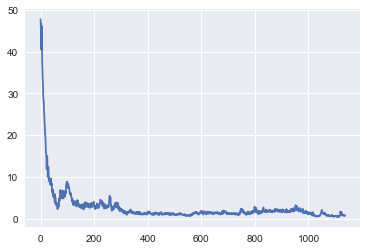

In [7]:
import matplotlib.pylab as plt
plt.plot(agent.td_losses)

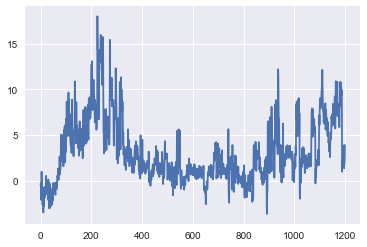

In [8]:
plt.plot(np.array(agent.qvalues).reshape(-1))

In [14]:
# for u in range(10):
    
#     fig, axes = plt.subplots(1, 4, sharey=True, figsize=(16, 4))
    
#     fig.suptitle('User %d' % u)
#     for i in range(4):
#         ax = axes[i]
        
#         best_ps = []
#         rec_ps = []
#         for interaction in env.interactions:
#             if interaction.uid == u:
#                 best_ps.append(interaction.best_ps[i])
#                 rec_ps.append(interaction.probs[i])

#         ax.plot(best_ps, label='best_ps')
#         ax.plot(rec_ps, label='ps')
#         ax.set_title('position %d' % i)
#         ax.legend()
#     fig.show()

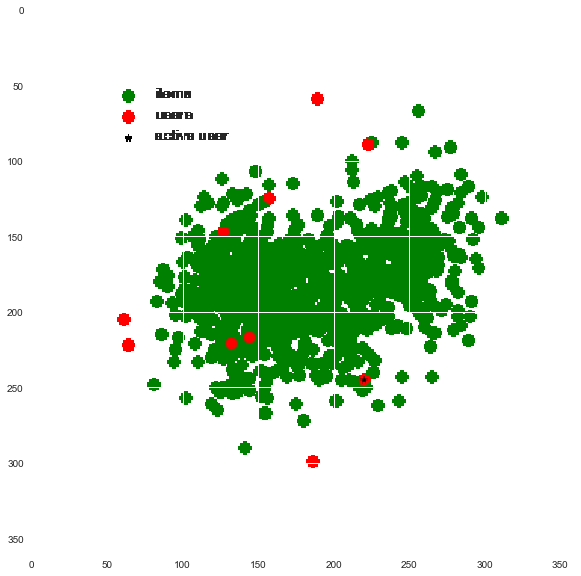

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(env.render(mode='rgb_array'))

In [10]:
from agents.utils import data_exploring_widget
data_exploring_widget(env)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time:', max=1200), Output()), _…

<Figure size 720x360 with 0 Axes>

In [12]:
from agents.baselines import RandomAgent

env = make_env()

state_dim = env.embedding_dimension
action_dim = env.embedding_dimension
action_size = env.n_rec

agent = RandomAgent(action_size = action_size)

In [13]:
sess.run(tf.global_variables_initializer())
run_experiment(env, agent, t_train=10000, t_test=2000)

100%|██████████| 2000/2000 [00:02<00:00, 741.63it/s]


In [14]:
from agents.utils import data_exploring_widget
data_exploring_widget(env)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time:', max=12000), Output()), …

In [23]:
from agents.dqn import Qagent

env = make_env()

state_dim = env.embedding_dimension
action_dim = env.embedding_dimension
action_size = env.n_rec

agent = Qagent(sess=sess,
                 state_dim=(state_dim*10,),
                 action_dim=(action_dim,),
                 epsilon=0.4,
                 action_size=action_size,
                 logdir='./logs/',
                 replay_size=1000,
                 batch_size=2)

In [26]:
sess.run(tf.global_variables_initializer())
run_experiment(env, agent, t_train=10000, t_test=2000)

100%|██████████| 2000/2000 [00:08<00:00, 231.36it/s]


In [25]:
from agents.utils import data_exploring_widget
data_exploring_widget(env)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time:', max=1200), Output()), _…